# k-Means Clustering

### Alec Weinbender

Here we will explore a class of unsupervised machine learning models: clustering algorithms.
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

We begin with some imports:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
import os
from PIL import Image
import numpy as np

## Excercise 1: 
Import the Candy data and show the first 10 rows.  Write a dataset description based on the information provided.  

In [8]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"}  # Add extensions as needed
    for label, subdir in enumerate(sorted(os.listdir(folder))):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename)
                ext = os.path.splitext(filename)[1].lower()  # Get file extension
                if ext in valid_extensions:  # Check if it's a valid image file
                    print(f"Processing image: {file_path}")
                    try:
                        img = Image.open(file_path).convert('RGB')  # Ensure all images are RGB
                        img = img.resize(target_size)  # Resize to target dimensions
                        images.append(np.array(img))  # Convert to NumPy array and add to the list
                        labels.append(label)  # Append label
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
                else:
                    print(f"Skipping non-image file: {file_path}")
    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.int32)


In [9]:
# Load training and testing data
train_images, train_labels = load_images_from_folder("../../stratified-data/train")
test_images, test_labels = load_images_from_folder("../../stratified-data/test")

Processing image: ../../stratified-data/train/Abra/00000010.png
Processing image: ../../stratified-data/train/Abra/00000001.png
Processing image: ../../stratified-data/train/Abra/00000003.png
Processing image: ../../stratified-data/train/Abra/00000004.png
Processing image: ../../stratified-data/train/Abra/00000006.png
Processing image: ../../stratified-data/train/Abra/00000007.png
Processing image: ../../stratified-data/train/Abra/00000011.jpg
Processing image: ../../stratified-data/train/Abra/00000012.png
Processing image: ../../stratified-data/train/Abra/00000015.jpg
Processing image: ../../stratified-data/train/Abra/00000023.jpg
Processing image: ../../stratified-data/train/Abra/00000059.jpg
Processing image: ../../stratified-data/train/Abra/00000060.jpg
Processing image: ../../stratified-data/train/Abra/00000077.jpg
Processing image: ../../stratified-data/train/Abra/00000091.png
Processing image: ../../stratified-data/train/Abra/00000101.png
Processing image: ../../stratified-data/

Processing image: ../../stratified-data/train/Abra/9cc6f9ebfd94969bd38b9983301e6652.jpg
Processing image: ../../stratified-data/train/Abra/9cf1b9c683c9ce4e3e8abc8d752a73dc.jpg
Processing image: ../../stratified-data/train/Abra/9e60831277548c624ad3d03d6c02c1af.jpg
Processing image: ../../stratified-data/train/Abra/a4868944d64c561711cd52b9c3b23fb3.jpg
Processing image: ../../stratified-data/train/Abra/a58e72fb83e60ed734dee716366d9936.jpg
Processing image: ../../stratified-data/train/Abra/a5fc99ca872e2e598991bfc46d5aec08.jpg
Processing image: ../../stratified-data/train/Abra/a68f3c6bc7111de3e7007edf09141f4e.jpg
Processing image: ../../stratified-data/train/Abra/a6dddee54c9d0b13defc026c5bce3f1b.png
Processing image: ../../stratified-data/train/Abra/aabb27dd7e1c4508880bd8cc1141c340.jpg
Processing image: ../../stratified-data/train/Abra/97594ac8f5f1049c891a72ded297068d.jpg
Processing image: ../../stratified-data/train/Abra/b0b6de31451f4e7aa3411fe0963a7f4f.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/train/Aerodactyl/1d80faeb9f03eef117e9132f244102b7.jpg
Processing image: ../../stratified-data/train/Aerodactyl/2831695ead87941f634804e4805472ff.jpg
Processing image: ../../stratified-data/train/Aerodactyl/32c0d41952e85e4ce2fc37eec194f1a2.jpg
Processing image: ../../stratified-data/train/Aerodactyl/1f4ffdd129510ad79a34cfb7cfb7ba1e.png
Processing image: ../../stratified-data/train/Aerodactyl/1fb4102df9385c3ef18dcded5ff200f9.jpg
Processing image: ../../stratified-data/train/Aerodactyl/2069781f88aa9d6809b1a9e40889fbfa.jpg
Processing image: ../../stratified-data/train/Aerodactyl/20c486243389e00eba0b12564571307b.png
Processing image: ../../stratified-data/train/Aerodactyl/21ac7e3218bc8cef38af521a8336c44a.png
Processing image: ../../stratified-data/train/Aerodactyl/3871bb456ee61e7583492e812e8ceea0.jpg
Processing image: ../../stratified-data/train/Aerodactyl/24ce3098166fb3ed02c28fdad2d9309d.png
Processing image: ../../stratified-data/train/Aerodactyl/254

Processing image: ../../stratified-data/train/Aerodactyl/bb6be0f790654421a4456b1b9242e0a1.jpg
Processing image: ../../stratified-data/train/Aerodactyl/99cc348ab12a1e695c2f8315a399cc30.jpg
Processing image: ../../stratified-data/train/Aerodactyl/9a1d4aefc87cb0967facd41a2e1ff659.jpg
Processing image: ../../stratified-data/train/Aerodactyl/9a44fde321b2ba5b7be57a65e8454378.jpg
Processing image: ../../stratified-data/train/Aerodactyl/9f40f1edf0b4c09bba3ea5c4a0e2b795.jpg
Processing image: ../../stratified-data/train/Aerodactyl/9f771102c5cc7fb93fddcce2890c6dc8.jpg
Processing image: ../../stratified-data/train/Aerodactyl/a077cc2f8d5d551c4804861059f8307c.jpg
Processing image: ../../stratified-data/train/Aerodactyl/a14c253957603cd18e4f1f5414abf449.jpg
Processing image: ../../stratified-data/train/Aerodactyl/bf1c769fba00a3645e395035fe7096fa.jpg
Processing image: ../../stratified-data/train/Aerodactyl/a261cf63335927dbb966050db308c11c.jpg
Processing image: ../../stratified-data/train/Aerodactyl/a35

Processing image: ../../stratified-data/train/Alakazam/00000052.jpg
Processing image: ../../stratified-data/train/Alakazam/00000054.png
Processing image: ../../stratified-data/train/Alakazam/00000059.jpg
Processing image: ../../stratified-data/train/Alakazam/00000060.jpg
Processing image: ../../stratified-data/train/Alakazam/00000061.png
Processing image: ../../stratified-data/train/Alakazam/00000064.jpg
Processing image: ../../stratified-data/train/Alakazam/00000110.png
Processing image: ../../stratified-data/train/Alakazam/00000072.png
Processing image: ../../stratified-data/train/Alakazam/00000074.png
Processing image: ../../stratified-data/train/Alakazam/00000078.jpg
Processing image: ../../stratified-data/train/Alakazam/00000079.png
Processing image: ../../stratified-data/train/Alakazam/00000152.jpg
Processing image: ../../stratified-data/train/Alakazam/00000094.png
Processing image: ../../stratified-data/train/Alakazam/00000096.png
Processing image: ../../stratified-data/train/Al

Processing image: ../../stratified-data/train/Alakazam/5c85dbc2335a40ce4f448996c164a77a.jpg
Processing image: ../../stratified-data/train/Alakazam/5d519e0c3020e6a0f4c2f348c32c358a.jpg
Processing image: ../../stratified-data/train/Alakazam/65c3c74cec1aed6b715a517acabf3051.jpg
Processing image: ../../stratified-data/train/Alakazam/69ab9daddd8548cb28083ee36d888109.png
Processing image: ../../stratified-data/train/Alakazam/62e7067e43e97265b6d0eb1183cff7ed.jpg
Processing image: ../../stratified-data/train/Alakazam/647e7c5a1f05440a1f46e3c601bed5b7.jpg
Processing image: ../../stratified-data/train/Alakazam/653626f4a0bc47fb28cb822f1934b7e9.png
Processing image: ../../stratified-data/train/Alakazam/65df81360e1ccedb14b27566f91ad73e.jpg
Processing image: ../../stratified-data/train/Alakazam/666c9e9eec6758d5311661534006822b.png
Processing image: ../../stratified-data/train/Alakazam/6b876dacbe7981b31c077f80114632a5.jpg
Processing image: ../../stratified-data/train/Alakazam/6eb62e21ddf647b7e29eec2b0

Processing image: ../../stratified-data/train/Alakazam/e7f2ae96d9851c169b7fce300544801f.png
Processing image: ../../stratified-data/train/Alakazam/e9ce8b4dcf25d6e16965dfe412dbc2db.jpg
Processing image: ../../stratified-data/train/Alakazam/eaaf9524d4f646b842cc18a01dbb0f3e.jpg
Processing image: ../../stratified-data/train/Alakazam/eaf4af4345db6c1311e55ccb4e240391.jpg
Processing image: ../../stratified-data/train/Alakazam/ebef0b067a77c64e1787de29ade0c9e2.jpg
Processing image: ../../stratified-data/train/Alakazam/ec04e441610261af3626de2f6be3318d.jpg
Processing image: ../../stratified-data/train/Alakazam/fa48f4682d9c5e1ef2ba389486223869.jpg
Processing image: ../../stratified-data/train/Alakazam/efc7c5041ab7d674c43ccb443da3d8f3.jpg
Processing image: ../../stratified-data/train/Alakazam/f072871aee9ddfee8d23f1b4d0272a23.png
Processing image: ../../stratified-data/train/Alakazam/fae7e19b15694b738383d0f57f600ed2.jpg
Processing image: ../../stratified-data/train/Alakazam/f1d6c07839a2741270095b29c

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processing image: ../../stratified-data/train/Arbok/00000179.png
Processing image: ../../stratified-data/train/Arbok/00000180.png
Processing image: ../../stratified-data/train/Arbok/00000181.png
Processing image: ../../stratified-data/train/Arbok/00000191.png
Processing image: ../../stratified-data/train/Arbok/00000099.jpg
Processing image: ../../stratified-data/train/Arbok/00000201.png
Processing image: ../../stratified-data/train/Arbok/00000212.jpg
Processing image: ../../stratified-data/train/Arbok/00000106.jpg
Processing image: ../../stratified-data/train/Arbok/00000220.png
Processing image: ../../stratified-data/train/Arbok/00000221.png
Processing image: ../../stratified-data/train/Arbok/00000226.png
Processing image: ../../stratified-data/train/Arbok/00000227.png
Processing image: ../../stratified-data/train/Arbok/00000228.png
Processing image: ../../stratified-data/train/Arbok/00000230.jpg
Processing image: ../../stratified-data/train/Arbok/00000112.jpg
Processing image: ../../s

Processing image: ../../stratified-data/train/Arbok/5683e00c702d496eb03b91c32c617ede.jpg
Processing image: ../../stratified-data/train/Arbok/5741bb830c55d4c6a909cc93e48ffe45.jpg
Processing image: ../../stratified-data/train/Arbok/574712cf996dbf9731e3fb5ce7369f35.jpg
Processing image: ../../stratified-data/train/Arbok/578efdf0dbdfb3ebf7d3bea90faed911.png
Processing image: ../../stratified-data/train/Arbok/58073212157611a515ce2c826f1e31fd.jpg
Processing image: ../../stratified-data/train/Arbok/3711ef995061625d0d73a76c01fb99df.jpg
Processing image: ../../stratified-data/train/Arbok/3e4fd8cdf8c740548826b6de29f18258.jpg
Processing image: ../../stratified-data/train/Arbok/44da4371455fb251b57421b9e3de70a9.png
Processing image: ../../stratified-data/train/Arbok/61254836f37e1c71059e060e881fa842.jpg
Processing image: ../../stratified-data/train/Arbok/6196b39e01954c5bec13ffcfc68103ae.jpg
Processing image: ../../stratified-data/train/Arbok/62ce64c980af9c195e20a1e63330131a.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Arbok/e5e6059c01db9a9bb6d773ad104d5112.png
Processing image: ../../stratified-data/train/Arbok/e622f39cb183032a17ec1ddb93f193ba.jpg
Processing image: ../../stratified-data/train/Arbok/e696d581dd95033a90431b6061db18d1.jpg
Processing image: ../../stratified-data/train/Arbok/e8f88f221850344dbd1f128704b7e795.jpg
Processing image: ../../stratified-data/train/Arbok/c75e19fc794f1ea830f885feee6bae50.jpg
Processing image: ../../stratified-data/train/Arbok/ea461b0d719d44f71bbe7502750c7875.jpg
Processing image: ../../stratified-data/train/Arbok/eb17d7247bec3d3132003fe25f42a7d2.png
Processing image: ../../stratified-data/train/Arbok/ec151eb88e769af2bfaf7870a8d43280.jpg
Processing image: ../../stratified-data/train/Arbok/eca88ca78c14977fb1f95f60b8f7a5b0.png
Processing image: ../../stratified-data/train/Arbok/ee048c10cca6e666e3da78babf594a55.png
Processing image: ../../stratified-data/train/Arbok/eed3332c9b55a52f8e1cd272a0be3c3b.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Arcanine/3251ca1fb41ee9f4f62d2368b1ec4601.jpg
Processing image: ../../stratified-data/train/Arcanine/325baaa4b635baf5e97d59488ddab7d9.jpg
Processing image: ../../stratified-data/train/Arcanine/2238128b2a72b057b208e5868e8e2faa.jpg
Processing image: ../../stratified-data/train/Arcanine/32efeffa4bcc85f5f6d4b574d1fd0bc6.jpg
Processing image: ../../stratified-data/train/Arcanine/35ed77b3c64a796fd8eeeff590b425ea.jpg
Processing image: ../../stratified-data/train/Arcanine/45c6e81875d68b855b7d09685d5774d0.png
Processing image: ../../stratified-data/train/Arcanine/4b5771457c54ab9bec6a62d98b4d6ecf.jpg
Processing image: ../../stratified-data/train/Arcanine/39828cd51d30dbdf687956a6bd2b2391.jpg
Processing image: ../../stratified-data/train/Arcanine/4d6c471400ea8c2443c077f9cb865f6c.jpg
Processing image: ../../stratified-data/train/Arcanine/3d2e524d0c09551bc8db83b09d3d752e.jpg
Processing image: ../../stratified-data/train/Arcanine/3e879356e92d704a7b80ad7c0

Processing image: ../../stratified-data/train/Arcanine/bcb6695b0be109ba5f776ff6cccdb729.jpg
Processing image: ../../stratified-data/train/Arcanine/e5a42adf96c47e3f339516a7433074f9.png
Processing image: ../../stratified-data/train/Arcanine/bf4cc59dffb8ac80a9dc7aacd6c62f3a.jpg
Processing image: ../../stratified-data/train/Arcanine/bff62c93bf890416db9277a67abe44cd.jpg
Processing image: ../../stratified-data/train/Arcanine/c2f42fbdf3b94ea38397ef51d1fa1ab7.jpg
Processing image: ../../stratified-data/train/Arcanine/c741c63f6e777eec43c942b68546dd39.jpg
Processing image: ../../stratified-data/train/Arcanine/c9e3c2811ecc9b2419e5da4752e6aea6.png
Processing image: ../../stratified-data/train/Arcanine/ca3235b504d7e2e4acbf418625fe24e4.jpg
Processing image: ../../stratified-data/train/Arcanine/eb002e644e3094ae41d131a9629245c3.jpg
Processing image: ../../stratified-data/train/Arcanine/cc6bca315825991484a77066d37a7f9e.jpg
Processing image: ../../stratified-data/train/Arcanine/cd7c601d33bdfea3e1e389440

Processing image: ../../stratified-data/train/Articuno/152cf87f71d14c8a0e0373ae2a3181be.jpg
Processing image: ../../stratified-data/train/Articuno/16ea46912b3e67b92c49bdb2be05ffac.jpg
Processing image: ../../stratified-data/train/Articuno/16eaa051c9bf44b2bf9c49341fbb4509.jpg
Processing image: ../../stratified-data/train/Articuno/172ec3332c254283a533e96209d4f768.jpg
Processing image: ../../stratified-data/train/Articuno/1749f4224a41d0b528df3910dc0c18a3.jpg
Processing image: ../../stratified-data/train/Articuno/0339350024c87bf2579f3f91535014da.jpg
Processing image: ../../stratified-data/train/Articuno/1938e77216a7279a06a901e4a480348c.jpg
Processing image: ../../stratified-data/train/Articuno/19b3fd969fc1cd34f0ba166176d1597d.jpg
Processing image: ../../stratified-data/train/Articuno/19c7ae015af278ba124b549dacee7beb.jpg
Processing image: ../../stratified-data/train/Articuno/1a751a0118d544c95cfe712b15a5317d.jpg
Processing image: ../../stratified-data/train/Articuno/1c60e6f03c4448209a8288878

Processing image: ../../stratified-data/train/Articuno/932e7d6cbb13e2286c0b75ff4d7a49ab.jpg
Processing image: ../../stratified-data/train/Articuno/5c65d5280da1c3dbf25cdbcd6eeef0af.jpg
Processing image: ../../stratified-data/train/Articuno/9504a50bf4ec3f11c74725b06c3da4ca.jpg
Processing image: ../../stratified-data/train/Articuno/97a8fae9fb804c02eafc8757419dca52.jpg
Processing image: ../../stratified-data/train/Articuno/5d9f025f88bcdccb5e6378063f634be6.jpg
Processing image: ../../stratified-data/train/Articuno/9953774b602fe4fcd1508fcb1bec4d9e.jpg
Processing image: ../../stratified-data/train/Articuno/997dd957df9ab27be0172ec5c599a0da.jpg
Processing image: ../../stratified-data/train/Articuno/99e03ffa27c7a09ea69968cbee705135.jpg
Processing image: ../../stratified-data/train/Articuno/9f55c6de4c5e0fbdc23c7a02d34e6386.jpg
Processing image: ../../stratified-data/train/Articuno/62434674c20b816d517dd358cd7a67a6.jpg
Processing image: ../../stratified-data/train/Articuno/6c4329bebd9a453790ff8560a

Processing image: ../../stratified-data/train/Beedrill/00000168.png
Processing image: ../../stratified-data/train/Beedrill/00000193.jpg
Processing image: ../../stratified-data/train/Beedrill/00000199.png
Processing image: ../../stratified-data/train/Beedrill/00000200.png
Processing image: ../../stratified-data/train/Beedrill/00000205.png
Processing image: ../../stratified-data/train/Beedrill/00000210.png
Processing image: ../../stratified-data/train/Beedrill/00000212.jpg
Processing image: ../../stratified-data/train/Beedrill/00000215.jpg
Processing image: ../../stratified-data/train/Beedrill/00000142.png
Processing image: ../../stratified-data/train/Beedrill/00000219.png
Processing image: ../../stratified-data/train/Beedrill/00000146.png
Processing image: ../../stratified-data/train/Beedrill/03714eb5c518dab9fc6357b00997a108.jpg
Processing image: ../../stratified-data/train/Beedrill/04307bbdcb4ea757395c1dbd0d936a41.png
Processing image: ../../stratified-data/train/Beedrill/08fe789d51cda

Processing image: ../../stratified-data/train/Beedrill/9ff07b33bd871dccfaea9822d4702ea6.jpg
Processing image: ../../stratified-data/train/Beedrill/cd9a295255de4b8d19ff855263a24b0e.jpg
Processing image: ../../stratified-data/train/Beedrill/dffcc56b83066ae85cb95e7834b509cd.png
Processing image: ../../stratified-data/train/Beedrill/a2dee0855ff41c0048fc86137d58cdec.jpg
Processing image: ../../stratified-data/train/Beedrill/a3011cbeab97d8b5d5dded468ae1aa34.png
Processing image: ../../stratified-data/train/Beedrill/a44bb699562c9920dfa9c9126dc2a874.jpg
Processing image: ../../stratified-data/train/Beedrill/a48795174b102d4d96222a338d773d7d.png
Processing image: ../../stratified-data/train/Beedrill/a67beecd6db4c521592dc433e274a83e.jpg
Processing image: ../../stratified-data/train/Beedrill/a6cec978d4d86c8d5edd7b42abb7831d.jpg
Processing image: ../../stratified-data/train/Beedrill/a72063f31b484111664620621495b340.png
Processing image: ../../stratified-data/train/Beedrill/a81f076f959d33dd502833f95

Processing image: ../../stratified-data/train/Bellsprout/00000200.png
Processing image: ../../stratified-data/train/Bellsprout/00000202.png
Processing image: ../../stratified-data/train/Bellsprout/00000209.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000217.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000219.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000220.png
Processing image: ../../stratified-data/train/Bellsprout/00000221.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000223.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000228.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000230.png
Processing image: ../../stratified-data/train/Bellsprout/00000235.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000236.png
Processing image: ../../stratified-data/train/Bellsprout/00000208.jpg
Processing image: ../../stratified-data/train/Bellsprout/00000226.jpg
Processing image: ..

Processing image: ../../stratified-data/train/Bellsprout/8134b417ea6c1b4ff307b929837cb7b4.png
Processing image: ../../stratified-data/train/Bellsprout/95c401ee887bb477469c1838dff64004.jpg
Processing image: ../../stratified-data/train/Bellsprout/8304fad4bc20428daf87a2079e2d3a0b.jpg
Processing image: ../../stratified-data/train/Bellsprout/87aa35664d28d1a9d2842793a1a48f89.jpg
Processing image: ../../stratified-data/train/Bellsprout/87e3b733f1a8372f6266adb42721e6e3.png
Processing image: ../../stratified-data/train/Bellsprout/887f2e02fa5fe628e21878b585b5f636.jpg
Processing image: ../../stratified-data/train/Bellsprout/8ce2e37b993b9d716c04c7a545ef4a2b.jpg
Processing image: ../../stratified-data/train/Bellsprout/8f5a3411fe8308fcd8dc7ef1554b3cc7.jpg
Processing image: ../../stratified-data/train/Bellsprout/97f6c8aaa875a0fa286220d0554a56b9.jpg
Processing image: ../../stratified-data/train/Bellsprout/911c5c0cda4c45da97437510eba6c2c5.jpg
Processing image: ../../stratified-data/train/Bellsprout/91b

Processing image: ../../stratified-data/train/Bellsprout/fdb52d3f350c42438d44debdc2cca832.jpg
Processing image: ../../stratified-data/train/Bellsprout/fdefd987450252d5a7cb16f7c2219cb3.jpg
Processing image: ../../stratified-data/train/Blastoise/00000000.jpg
Processing image: ../../stratified-data/train/Blastoise/00000004.png
Processing image: ../../stratified-data/train/Blastoise/00000005.png
Processing image: ../../stratified-data/train/Blastoise/00000006.jpg
Processing image: ../../stratified-data/train/Blastoise/00000007.png
Processing image: ../../stratified-data/train/Blastoise/00000010.png
Processing image: ../../stratified-data/train/Blastoise/00000014.png
Processing image: ../../stratified-data/train/Blastoise/00000015.png
Processing image: ../../stratified-data/train/Blastoise/00000017.png
Processing image: ../../stratified-data/train/Blastoise/00000018.png
Processing image: ../../stratified-data/train/Blastoise/00000019.jpg
Processing image: ../../stratified-data/train/Blastoi

Processing image: ../../stratified-data/train/Blastoise/1056d862d34441cfb59fab5085d3853f.jpg
Processing image: ../../stratified-data/train/Blastoise/1264c2560f4f1e8440c35efbeb4f98ef.jpg
Processing image: ../../stratified-data/train/Blastoise/2e3e59b81536aaa2c09db1863b1c15ba.jpg
Processing image: ../../stratified-data/train/Blastoise/2f1861aa1bc74f3c907615a73d26c2d1.jpg
Processing image: ../../stratified-data/train/Blastoise/2f371c2430b3f77f77523b4105766fb9.png
Processing image: ../../stratified-data/train/Blastoise/2fe4328bf5931a8f79ec3bf57e10805d.jpg
Processing image: ../../stratified-data/train/Blastoise/17ea79958bcb0efeb02f0ec3e5ea8305.png
Processing image: ../../stratified-data/train/Blastoise/23f68e7de46e787d3ffd72771f0299da.jpg
Processing image: ../../stratified-data/train/Blastoise/345f304a456ab6592045581788053a87.jpg
Processing image: ../../stratified-data/train/Blastoise/2846f297731f336cd4933da50f07c73c.jpg
Processing image: ../../stratified-data/train/Blastoise/37d87f0a1b207b

Processing image: ../../stratified-data/train/Blastoise/9cb8b09077b2afba1269bddc7f3cfc0d.jpg
Processing image: ../../stratified-data/train/Blastoise/9e9dba8389f3d00bd1bbdceea46fec7e.jpg
Processing image: ../../stratified-data/train/Blastoise/a2d692e04e599876d9f3dd8f5e0d63de.jpg
Processing image: ../../stratified-data/train/Blastoise/86704785b9294f7b8840691071ce00af.jpg
Processing image: ../../stratified-data/train/Blastoise/88968a229fbd0278dec16357db4899af.jpg
Processing image: ../../stratified-data/train/Blastoise/91e8351f47dae742d3ae2f5af395fcc8.jpg
Processing image: ../../stratified-data/train/Blastoise/a869915fdb507d7de8f23739aa989535.jpg
Processing image: ../../stratified-data/train/Blastoise/a86db36db3e8b0df47688803635588ae.png
Processing image: ../../stratified-data/train/Blastoise/a87b8235650426edc4759dfd4db9c695.png
Processing image: ../../stratified-data/train/Blastoise/a8d05f1becd1940da7752b48e69e13af.jpg
Processing image: ../../stratified-data/train/Blastoise/94a3e5e2bc9e8b

Processing image: ../../stratified-data/train/Bulbasaur/00000010.png
Processing image: ../../stratified-data/train/Bulbasaur/00000009.png
Processing image: ../../stratified-data/train/Bulbasaur/00000013.png
Processing image: ../../stratified-data/train/Bulbasaur/00000012.png
Processing image: ../../stratified-data/train/Bulbasaur/00000019.png
Processing image: ../../stratified-data/train/Bulbasaur/00000015.jpg
Processing image: ../../stratified-data/train/Bulbasaur/00000015.png
Processing image: ../../stratified-data/train/Bulbasaur/00000016.png
Processing image: ../../stratified-data/train/Bulbasaur/00000017.png
Processing image: ../../stratified-data/train/Bulbasaur/00000018.jpg
Processing image: ../../stratified-data/train/Bulbasaur/00000019.jpg
Processing image: ../../stratified-data/train/Bulbasaur/00000021.png
Processing image: ../../stratified-data/train/Bulbasaur/00000022.png
Processing image: ../../stratified-data/train/Bulbasaur/00000023.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Bulbasaur/152be27a357d6c7a288d79e132d02650.png
Processing image: ../../stratified-data/train/Bulbasaur/18562a0a8227a7475c056e72e8d89dc6.png
Processing image: ../../stratified-data/train/Bulbasaur/1856ae100372016488f7e87991c66e23.png
Processing image: ../../stratified-data/train/Bulbasaur/196b5c5ebd240127f222dbbc7129d410.jpg
Processing image: ../../stratified-data/train/Bulbasaur/1b7de6d69aaa7b75388d7268b76f92a0.png
Processing image: ../../stratified-data/train/Bulbasaur/1b829a800c046ea310b10a583e449115.png
Processing image: ../../stratified-data/train/Bulbasaur/1cda95ccc345453b90c46657028cd978.jpg
Processing image: ../../stratified-data/train/Bulbasaur/1cea9ef8281f3b3e8363da0d1fabc5d9.jpg
Processing image: ../../stratified-data/train/Bulbasaur/1d349d4e820d25e255feac76ba15edb7.jpg
Processing image: ../../stratified-data/train/Bulbasaur/20defb4ef77d156a80fe32084a8e61f8.jpg
Processing image: ../../stratified-data/train/Bulbasaur/210938c1f9c5dc

Processing image: ../../stratified-data/train/Bulbasaur/62210fe1364f0c8b7a7b5e3a6473e7c7.png
Processing image: ../../stratified-data/train/Bulbasaur/6298d759326533624a0b6307156b7059.jpg
Processing image: ../../stratified-data/train/Bulbasaur/62bab283d0d4f32a0a72f4bc0f470f11.jpg
Processing image: ../../stratified-data/train/Bulbasaur/6c47f67cb12834430956d29e68d97534.jpg
Processing image: ../../stratified-data/train/Bulbasaur/6fb1d1dc9dfe97af394fc324fc41f8e8.jpg
Processing image: ../../stratified-data/train/Bulbasaur/64d7dc5191c21d861606be058f72eb4c.jpg
Processing image: ../../stratified-data/train/Bulbasaur/65e8950c53a4e6107e01ff72e8b25f0c.jpg
Processing image: ../../stratified-data/train/Bulbasaur/70237abed2a9f712256b4001df054728.png
Processing image: ../../stratified-data/train/Bulbasaur/67220ebd6972e1e3fc409543b29c950e.jpg
Processing image: ../../stratified-data/train/Bulbasaur/683dd62d56d55d73215250ac8259e1dd.jpg
Processing image: ../../stratified-data/train/Bulbasaur/689bb2ba797e7a

Processing image: ../../stratified-data/train/Bulbasaur/aaefffde261121ce9565c932d7f8b8fe.jpg
Processing image: ../../stratified-data/train/Bulbasaur/ab8d45b76a65c1a3cebe392abe9d1d6d.jpg
Processing image: ../../stratified-data/train/Bulbasaur/adfs.jpg
Processing image: ../../stratified-data/train/Bulbasaur/b60d65aef473f3562fd0c9533b24636d.jpg
Processing image: ../../stratified-data/train/Bulbasaur/aeaa5fb0d15409d77ebc4ec82ed4578e.jpg
Processing image: ../../stratified-data/train/Bulbasaur/af1037771a5dd371319801ab7d6af7d7.jpg
Processing image: ../../stratified-data/train/Bulbasaur/af1b84574f793b3a8def4acb640157ca.jpg
Processing image: ../../stratified-data/train/Bulbasaur/afdad.png
Processing image: ../../stratified-data/train/Bulbasaur/asd.png
Processing image: ../../stratified-data/train/Bulbasaur/b064a4c59f8f77c8dee20bb8544317dd.png
Processing image: ../../stratified-data/train/Bulbasaur/b7d411ec86ad5111b0c9874bb07f35e0.jpg
Processing image: ../../stratified-data/train/Bulbasaur/b10dc

Processing image: ../../stratified-data/train/Bulbasaur/f940aaa74358df1d380be512214ce5a4.jpg
Processing image: ../../stratified-data/train/Bulbasaur/f9bbe895a57f14b64dfda2dcd54df250.jpg
Processing image: ../../stratified-data/train/Bulbasaur/f9ded7bee0f67fc2061c24faad3d03bc.png
Processing image: ../../stratified-data/train/Bulbasaur/fa0b399022f5edc8957d2c11e100c75b.jpg
Processing image: ../../stratified-data/train/Bulbasaur/fa5abaec352999ae767f71e18868a1a1.jpg
Processing image: ../../stratified-data/train/Bulbasaur/fb8865c5823d70bd9dec1d17c3c81a0d.jpg
Processing image: ../../stratified-data/train/Bulbasaur/fbca24ad954fb09a81c8062db2e3bd1e.jpg
Processing image: ../../stratified-data/train/Bulbasaur/fc8afe78256cd3facba27ba2d6c687a3.png
Processing image: ../../stratified-data/train/Bulbasaur/fca261311008352a1712a31372686220.jpg
Processing image: ../../stratified-data/train/Bulbasaur/fda75fcc5e87c54e8e41cb95f9feed59.png
Processing image: ../../stratified-data/train/Bulbasaur/fedf1b791967b9

Processing image: ../../stratified-data/train/Butterfree/1eaa694325ad372a1b55648c4ecb20d8.jpg
Processing image: ../../stratified-data/train/Butterfree/1ef699d054f43fff29dc591c81f151ad.jpg
Processing image: ../../stratified-data/train/Butterfree/22995101397b4e059a03a274132fefb8.jpg
Processing image: ../../stratified-data/train/Butterfree/229db2644ec53c3ffa6eb37600b0f391.jpg
Processing image: ../../stratified-data/train/Butterfree/02658a3165c218c18e776e4280e422b0.png
Processing image: ../../stratified-data/train/Butterfree/27ce9e8df93c967235d34c016ca6fa10.jpg
Processing image: ../../stratified-data/train/Butterfree/1656c41af1b88e279514292c95e9e629.png
Processing image: ../../stratified-data/train/Butterfree/29b4d6dd6d9c20fe94375bc7444b738b.png
Processing image: ../../stratified-data/train/Butterfree/2b4a18062a91b4f2bb46673e2865bc63.jpg
Processing image: ../../stratified-data/train/Butterfree/242b29585735c805457d9504a6b853cb.jpg
Processing image: ../../stratified-data/train/Butterfree/2cd

Processing image: ../../stratified-data/train/Butterfree/a34c12a1d163cefc9e56987bf2b5880c.jpg
Processing image: ../../stratified-data/train/Butterfree/a370fe0e48a47d7930ca09a1a1e5598a.jpg
Processing image: ../../stratified-data/train/Butterfree/a37711994655651e5785423cf63941f0.jpg
Processing image: ../../stratified-data/train/Butterfree/a385df84873ea7586767028b71e7f049.jpg
Processing image: ../../stratified-data/train/Butterfree/a3bca791599c2fc82cd687a8dd298c8f.jpg
Processing image: ../../stratified-data/train/Butterfree/a4b4e229a64fb2174d351eed42bb04e8.jpg
Processing image: ../../stratified-data/train/Butterfree/a7cb32f4926efeaa1ba1a5efc2e44af0.jpg
Processing image: ../../stratified-data/train/Butterfree/a8132e1c4b444cd7eeaf2369019ebc1a.png
Processing image: ../../stratified-data/train/Butterfree/a85634afc688a2c44eac1b640a11bd96.jpg
Processing image: ../../stratified-data/train/Butterfree/ab3d70211aec83ccc60f97ac1490c816.jpg
Processing image: ../../stratified-data/train/Butterfree/ab7

Processing image: ../../stratified-data/train/Caterpie/00000079.png
Processing image: ../../stratified-data/train/Caterpie/00000085.png
Processing image: ../../stratified-data/train/Caterpie/00000087.png
Processing image: ../../stratified-data/train/Caterpie/00000102.png
Processing image: ../../stratified-data/train/Caterpie/00000104.png
Processing image: ../../stratified-data/train/Caterpie/00000109.png
Processing image: ../../stratified-data/train/Caterpie/00000116.png
Processing image: ../../stratified-data/train/Caterpie/00000123.png
Processing image: ../../stratified-data/train/Caterpie/00000124.png
Processing image: ../../stratified-data/train/Caterpie/00000137.jpg
Processing image: ../../stratified-data/train/Caterpie/00000142.jpg
Processing image: ../../stratified-data/train/Caterpie/00000158.jpg
Processing image: ../../stratified-data/train/Caterpie/00000126.jpg
Processing image: ../../stratified-data/train/Caterpie/00000162.jpg
Processing image: ../../stratified-data/train/Ca

Processing image: ../../stratified-data/train/Caterpie/630e8a02b6a3672a7ec7c578cf155ea8.jpg
Processing image: ../../stratified-data/train/Caterpie/84177e96b4a661f97a1298c5a6d3c3a8.png
Processing image: ../../stratified-data/train/Caterpie/6872549f2165ce7db3601433c1eaead9.png
Processing image: ../../stratified-data/train/Caterpie/68f587a008b0b41841b3ba26184c5c79.png
Processing image: ../../stratified-data/train/Caterpie/6969262f5967710df73aa2c556ca1736.jpg
Processing image: ../../stratified-data/train/Caterpie/6a299aaef3ab5876dec0831b82fca286.jpg
Processing image: ../../stratified-data/train/Caterpie/86e537b5c4cbb5ad19bc0fbd7537c97e.jpg
Processing image: ../../stratified-data/train/Caterpie/6be0cdd55a56fd8dae2e112c22d7ed23.jpg
Processing image: ../../stratified-data/train/Caterpie/92dbc6cb778f6059e117d82b2cdae393.png
Processing image: ../../stratified-data/train/Caterpie/6e902bd4d3f5f65cd6f17a9e0bd066b8.jpg
Processing image: ../../stratified-data/train/Caterpie/734a2d4901a69b29fe1c743c3

Processing image: ../../stratified-data/train/Caterpie/e220076c35e197f5eba537bdea675853.png
Processing image: ../../stratified-data/train/Caterpie/e290effc284900ae2461e10902e55919.jpg
Processing image: ../../stratified-data/train/Caterpie/e4f6b8f33e0b0856c972451185ebb2e5.jpg
Processing image: ../../stratified-data/train/Caterpie/e67c10a2301d01fa7dd7a4d49dafda9c.jpg
Processing image: ../../stratified-data/train/Caterpie/e6df7b8184031a39f5164489c793c3fc.jpg
Processing image: ../../stratified-data/train/Caterpie/e7f9ea1f7cf58a97cf53316aec35727e.jpg
Processing image: ../../stratified-data/train/Caterpie/e87eb36483e41b6aabf7bf0fcba1c9e5.jpg
Processing image: ../../stratified-data/train/Caterpie/e90f022428791ba6fe8a9d76c3c54f9f.png
Processing image: ../../stratified-data/train/Caterpie/ebb6d339928d42aeafe7f27486f8cce0.jpg
Processing image: ../../stratified-data/train/Caterpie/ebc5ae74fbc3fbe43ddcc24f02eead88.jpg
Processing image: ../../stratified-data/train/Caterpie/ed096c58a0ed2fa8b9e824da9

Processing image: ../../stratified-data/train/Chansey/36351c5d6702de14adbd597bcbdb4363.jpg
Processing image: ../../stratified-data/train/Chansey/3667e67d4bb90db06231d52253306696.jpg
Processing image: ../../stratified-data/train/Chansey/3688b3e54675f5f137284cf4474d11fe.jpg
Processing image: ../../stratified-data/train/Chansey/368a3d3d7fe14d4fbc39657f51a8eb27.jpg
Processing image: ../../stratified-data/train/Chansey/369a478edcd3acf201687d004dd120ae.png
Processing image: ../../stratified-data/train/Chansey/3754e4fa01a345cda80c485c1842225a.jpg
Processing image: ../../stratified-data/train/Chansey/37e9dec5029a41b48327a614a3b6caa2.jpg
Processing image: ../../stratified-data/train/Chansey/380d2dcb5d3594a1faa12c5e61d3a0fe.jpg
Processing image: ../../stratified-data/train/Chansey/3b224a06d00b4d3087004f4f4578bd0f.jpg
Processing image: ../../stratified-data/train/Chansey/3bdb03e4d47c0176a788e4c1e1b4a533.jpg
Processing image: ../../stratified-data/train/Chansey/3bdfdcf168bc09cd0b09bdaf76b5c10d.jpg

Processing image: ../../stratified-data/train/Chansey/a7742299e0b852ea0494020229455013.jpg
Processing image: ../../stratified-data/train/Chansey/a817135e2f6b6dfd5111b82f3d9d3685.jpg
Processing image: ../../stratified-data/train/Chansey/b98fae764ab23006de63ccaeceadf730.jpg
Processing image: ../../stratified-data/train/Chansey/bdfa12ba6ec39f4bb63ba0b5fc0c467c.jpg
Processing image: ../../stratified-data/train/Chansey/aacf89976c6aae37193ae4f5e89f5dcf.jpg
Processing image: ../../stratified-data/train/Chansey/ab9c1267d449c38943404676aa261106.png
Processing image: ../../stratified-data/train/Chansey/bef16283ea5a4876a4540ee1b30d39e2.jpg
Processing image: ../../stratified-data/train/Chansey/ad56565bcce9466885877620b0eca57e.jpg
Processing image: ../../stratified-data/train/Chansey/c2657c2e85875467b3c1703884c2abba.png
Processing image: ../../stratified-data/train/Chansey/aed13be5148064d7d6f9683c30a729e8.jpg
Processing image: ../../stratified-data/train/Chansey/c678d893400779655b987d696dc41a00.jpg

Processing image: ../../stratified-data/train/Charizard/00000135.jpg
Processing image: ../../stratified-data/train/Charizard/00000144.jpg
Processing image: ../../stratified-data/train/Charizard/00000147.png
Processing image: ../../stratified-data/train/Charizard/00000031.jpg
Processing image: ../../stratified-data/train/Charizard/00000161.png
Processing image: ../../stratified-data/train/Charizard/00000073.jpg
Processing image: ../../stratified-data/train/Charizard/00000164.jpg
Processing image: ../../stratified-data/train/Charizard/00000166.png
Processing image: ../../stratified-data/train/Charizard/00000171.png
Processing image: ../../stratified-data/train/Charizard/00000176.png
Processing image: ../../stratified-data/train/Charizard/00000178.jpg
Processing image: ../../stratified-data/train/Charizard/00000158.jpg
Processing image: ../../stratified-data/train/Charizard/00000202.png
Processing image: ../../stratified-data/train/Charizard/00000207.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Charizard/5730949559b66d4f46e0c0c658ddd518.jpg
Processing image: ../../stratified-data/train/Charizard/58e91ccb91e48eceb538cbfe0314bb0b.png
Processing image: ../../stratified-data/train/Charizard/59cbdbe4a9eb0f79ffc37f532dea0b1e.jpg
Processing image: ../../stratified-data/train/Charizard/5c945a50b8a441a2a11a2e6e8b28464a.jpg
Processing image: ../../stratified-data/train/Charizard/5d59541fd6899933e39e66be1977a4ba.jpg
Processing image: ../../stratified-data/train/Charizard/60ab367eeeb802624734ea55ad5f67e4.jpg
Processing image: ../../stratified-data/train/Charizard/60f063adb797178fb9e999fd75ba64b5.jpg
Processing image: ../../stratified-data/train/Charizard/6238a5271e3035ed252bba713d52487c.jpg
Processing image: ../../stratified-data/train/Charizard/68e934ea3d3045279c981c21812f27b4.jpg
Processing image: ../../stratified-data/train/Charizard/69ebf8689365a38e8bc0dfdd19af478b.jpg
Processing image: ../../stratified-data/train/Charizard/7086a1d2cf35ce

Processing image: ../../stratified-data/train/Charizard/e2d0a0fc033597edb6e444baf6ec4451.png
Processing image: ../../stratified-data/train/Charizard/e376659baba0b20d5d43fa3c59d5b57d.jpg
Processing image: ../../stratified-data/train/Charizard/e4041f37138c28be8e3b5cc228f08760.jpg
Processing image: ../../stratified-data/train/Charizard/e47623415d6f421566510a3394550f7f.jpg
Processing image: ../../stratified-data/train/Charizard/c8ceaa6e3acc8234f30894863c780821.jpg
Processing image: ../../stratified-data/train/Charizard/e4bd40448ee5d0c5ef19a6fe0e90597c.png
Processing image: ../../stratified-data/train/Charizard/e5f1c4d14a36f633d36487b53ad57003.jpg
Processing image: ../../stratified-data/train/Charizard/e80536efeaf18be0d94ebc895b491b92.jpg
Processing image: ../../stratified-data/train/Charizard/e8c359ad6cd69dd64da2e0529206034b.jpg
Processing image: ../../stratified-data/train/Charizard/e8d9b36595e18e8da4157740e95f9a2a.jpg
Processing image: ../../stratified-data/train/Charizard/e8e13f9b1c3785

Processing image: ../../stratified-data/train/Charmander/14151e25d20f0173a27769f599a2f2c3.png
Processing image: ../../stratified-data/train/Charmander/02a5b686855e3337dee0def1ea83fff5.jpg
Processing image: ../../stratified-data/train/Charmander/031b565c8c4ce08ce90e064e1391815b.png
Processing image: ../../stratified-data/train/Charmander/036fdc8f1eb5b68e9294a5dff8484e97.png
Processing image: ../../stratified-data/train/Charmander/04c84e868f216a5daf853d7390dcc6bc.jpg
Processing image: ../../stratified-data/train/Charmander/052978279b0b62d1d13ffe0b063bb9e4.jpg
Processing image: ../../stratified-data/train/Charmander/06c6c29606e7b9afe09ad23cef08b4a5.png
Processing image: ../../stratified-data/train/Charmander/167d857da39c125c5f3fda25ebe0673b.jpg
Processing image: ../../stratified-data/train/Charmander/0864df24c3c04738bb03c6b11247896a.png
Processing image: ../../stratified-data/train/Charmander/088d2eefb68d40b47fcb720b9bcd50e7.jpg
Processing image: ../../stratified-data/train/Charmander/089

Processing image: ../../stratified-data/train/Charmander/4275cec79dd1137d6dba2f273f392098.jpg
Processing image: ../../stratified-data/train/Charmander/43410dcaeeb793ecdbc3cf3988dbb897.jpg
Processing image: ../../stratified-data/train/Charmander/438c6481ad2307d53193f2483014cf47.png
Processing image: ../../stratified-data/train/Charmander/445ba2a66cd052275af5c195970cb9f3.jpg
Processing image: ../../stratified-data/train/Charmander/57fd47cbda7e34c63f6b41275cf2007a.png
Processing image: ../../stratified-data/train/Charmander/480a68835db2803f95d653e1b36c9f87.jpg
Processing image: ../../stratified-data/train/Charmander/486179ea9d99e0406bd7839ac76d337a.png
Processing image: ../../stratified-data/train/Charmander/48e48ce6c9962b6ae5b92359214fb21d.jpg
Processing image: ../../stratified-data/train/Charmander/494cfa6d0b7b06ec0aea7a0b891220a0.png
Processing image: ../../stratified-data/train/Charmander/496f241bd5b08c9f8b4fccdec480c3ff.jpg
Processing image: ../../stratified-data/train/Charmander/4a1

Processing image: ../../stratified-data/train/Charmander/7c6b2c9f7602be55bdb7145db430a5d5.jpg
Processing image: ../../stratified-data/train/Charmander/8179b54385d430e95ec6568f832b5e1c.jpg
Processing image: ../../stratified-data/train/Charmander/82df4dba9c1c68dc06d2e9e83b4aef3b.jpg
Processing image: ../../stratified-data/train/Charmander/7e704d5044fe65aa62f0c94cf9a61fe1.png
Processing image: ../../stratified-data/train/Charmander/7ef705c8735d1922e68244f9afdd8fdf.png
Processing image: ../../stratified-data/train/Charmander/800f20f788c5692c068c86cfa9af52e7.jpg
Processing image: ../../stratified-data/train/Charmander/80afddfbc343dd3fb5c08531cc1dd437.jpg
Processing image: ../../stratified-data/train/Charmander/8362ff03187c1d0ada93d9862d50bf29.png
Processing image: ../../stratified-data/train/Charmander/81383c373b7e3f9e33a8035474b616d8.jpg
Processing image: ../../stratified-data/train/Charmander/85d2cfe3a0b239b8c143eb5c6dfa1b12.jpg
Processing image: ../../stratified-data/train/Charmander/821

Processing image: ../../stratified-data/train/Charmander/b5df115765d81b2000ed7fd967692d0d.jpg
Processing image: ../../stratified-data/train/Charmander/b66b6c730e31e082a7b7c61a8b4d99e5.png
Processing image: ../../stratified-data/train/Charmander/b7a0831993fd05a5b075ad770ffa4bbe.png
Processing image: ../../stratified-data/train/Charmander/b7b68052550a439dc8a8c6a0ac602c42.png
Processing image: ../../stratified-data/train/Charmander/bf2f42e9155704ca3788689db172398e.jpg
Processing image: ../../stratified-data/train/Charmander/ba286ebea9c9958cdd7797e14aa6ddb7.jpg
Processing image: ../../stratified-data/train/Charmander/ba39cbe7d5805163f0e5379c52bcacb9.jpg
Processing image: ../../stratified-data/train/Charmander/bb71442757d1e075ee5073ff2fb5ddf6.png
Processing image: ../../stratified-data/train/Charmander/bc12f0a139014bee27cabb85d9f581c1.jpg
Processing image: ../../stratified-data/train/Charmander/bc58f8c3d6fafd5dcf5d17cdbddab268.png
Processing image: ../../stratified-data/train/Charmander/c14

Processing image: ../../stratified-data/train/Charmander/f4add12edd189ceb1f08f8b0b886da84.jpg
Processing image: ../../stratified-data/train/Charmander/f4de72ea3c2ab9c23177de539aed5a50.jpg
Processing image: ../../stratified-data/train/Charmander/f536b8fb1a54d47e9b40a7049bd1f53b.jpg
Processing image: ../../stratified-data/train/Charmander/f64cf4ed72e1dd21d2be8c173f52a70e.png
Processing image: ../../stratified-data/train/Charmander/f674d10326ac1b7d8f5fed0bacd46356.png
Processing image: ../../stratified-data/train/Charmander/f6c9a397484f6bc1f7087552a6d849d8.jpg
Processing image: ../../stratified-data/train/Charmander/f6ed11a988ed5d66005044dca0ec2756.jpg
Processing image: ../../stratified-data/train/Charmander/f71aa4e68e1ef9db65b8b57b0b2dc142.png
Processing image: ../../stratified-data/train/Charmander/f9bbd3975eba15d2ea9b8404f758a124.png
Processing image: ../../stratified-data/train/Charmander/fa75e8511f62f86ebefebed31616ebdf.png
Processing image: ../../stratified-data/train/Charmander/fad

Processing image: ../../stratified-data/train/Charmeleon/00000187.png
Processing image: ../../stratified-data/train/Charmeleon/17ac83caf805c07b52b1f9762b81ff50.jpg
Processing image: ../../stratified-data/train/Charmeleon/1daeee230bbbd8ac39032cc33147b2fe.jpg
Processing image: ../../stratified-data/train/Charmeleon/00000195.jpg
Processing image: ../../stratified-data/train/Charmeleon/2003068d674d34b25010b526bec36500.jpg
Processing image: ../../stratified-data/train/Charmeleon/209bbf16e77943fab655411c71358a3e.jpg
Processing image: ../../stratified-data/train/Charmeleon/23eada65e5c54206a73ec8e334d3d665.jpg
Processing image: ../../stratified-data/train/Charmeleon/24b109c74ac2d460378ca998ded4c5fc.jpg
Processing image: ../../stratified-data/train/Charmeleon/00000207.png
Processing image: ../../stratified-data/train/Charmeleon/25f724acd8b4f4146adfe9464f148a6a.jpg
Processing image: ../../stratified-data/train/Charmeleon/2664613a87ef431fb7495f1c2e94ffdb.jpg
Processing image: ../../stratified-dat

Processing image: ../../stratified-data/train/Charmeleon/84a09c85a4c84d2c9fb198fdeb834f58.jpg
Processing image: ../../stratified-data/train/Charmeleon/871019441e3f47d985d4c861459a8fd4.jpg
Processing image: ../../stratified-data/train/Charmeleon/8766c97c37536d32d85d03a46c88d6c2.jpg
Processing image: ../../stratified-data/train/Charmeleon/87cc27093fd8b6ac396fa71510b4c574.jpg
Processing image: ../../stratified-data/train/Charmeleon/89fdc4c43c25d63fa6f91b8cbceb3b46.png
Processing image: ../../stratified-data/train/Charmeleon/8b706c135245d15b8222c61255e7916f.jpg
Processing image: ../../stratified-data/train/Charmeleon/8c317a1cc128435dad1a03a2dd2cfd96.jpg
Processing image: ../../stratified-data/train/Charmeleon/8d4fb239169db78efcf17c4e575d8d77.jpg
Processing image: ../../stratified-data/train/Charmeleon/8fe57adf0745e6aab4010c98573d24a2.jpg
Processing image: ../../stratified-data/train/Charmeleon/90a1137448f44acfbd1c8d17492230fb.jpg
Processing image: ../../stratified-data/train/Charmeleon/90d

Processing image: ../../stratified-data/train/Clefable/00000006.png
Processing image: ../../stratified-data/train/Clefable/00000008.jpg
Processing image: ../../stratified-data/train/Clefable/00000009.png
Processing image: ../../stratified-data/train/Clefable/00000013.png
Processing image: ../../stratified-data/train/Clefable/00000012.jpg
Processing image: ../../stratified-data/train/Clefable/00000019.png
Processing image: ../../stratified-data/train/Clefable/00000033.jpg
Processing image: ../../stratified-data/train/Clefable/00000036.jpg
Processing image: ../../stratified-data/train/Clefable/00000043.jpg
Processing image: ../../stratified-data/train/Clefable/00000048.jpg
Processing image: ../../stratified-data/train/Clefable/00000051.jpg
Processing image: ../../stratified-data/train/Clefable/00000052.jpg
Processing image: ../../stratified-data/train/Clefable/00000060.png
Processing image: ../../stratified-data/train/Clefable/00000061.jpg
Processing image: ../../stratified-data/train/Cl

Processing image: ../../stratified-data/train/Clefable/730de2f3e2eb697fbe5b8305d2b47e56.jpg
Processing image: ../../stratified-data/train/Clefable/609dbf3199ce48708e8747a5f0917139.jpg
Processing image: ../../stratified-data/train/Clefable/60dc7a48d0cb5d6e47b0dfbe34f91262.png
Processing image: ../../stratified-data/train/Clefable/77a3b558e87091ab549e521f88f035cf.jpg
Processing image: ../../stratified-data/train/Clefable/62aa47afd83c1a56876d26b57d6023ad.png
Processing image: ../../stratified-data/train/Clefable/63972d17b6bdc5c2617c4380038829f1.jpg
Processing image: ../../stratified-data/train/Clefable/63fbba4fcc366f81301edb084f96da6e.jpg
Processing image: ../../stratified-data/train/Clefable/7c1bffa9f72348cebea79e73ad04e12e.jpg
Processing image: ../../stratified-data/train/Clefable/64f009a2c6ec9dfda00b1da45cdede16.png
Processing image: ../../stratified-data/train/Clefable/652c07e48fc26b13137ff0b3d277c856.jpg
Processing image: ../../stratified-data/train/Clefable/7dd010a0099b73eb8403855cb

Processing image: ../../stratified-data/train/Clefable/eb8aa3ee9a9aaebb41ffd3b8923bf02d.jpg
Processing image: ../../stratified-data/train/Clefable/e920f457abd468b56904195fb781cc84.jpg
Processing image: ../../stratified-data/train/Clefable/ebba2e25ec31ee40a0db88dd0f31a7c6.png
Processing image: ../../stratified-data/train/Clefable/ebfa4ec902ccfacc6c1d5e05ddf26654.png
Processing image: ../../stratified-data/train/Clefable/ec54923b2e0e4d3785d9ba78cb70a284.jpg
Processing image: ../../stratified-data/train/Clefable/ecedb854b09cbcde591999fdcc6c9f37.jpg
Processing image: ../../stratified-data/train/Clefable/edb5e6ee68354f78985d4f5e8989d8ce.jpg
Processing image: ../../stratified-data/train/Clefable/ee4ed31d8d0deecb187ccefb6d7169ac.png
Processing image: ../../stratified-data/train/Clefable/ef0471c2c76368512ec250951c4b0af2.jpg
Processing image: ../../stratified-data/train/Clefable/ef67e0e99f63b9c2882eb00e8d1bee15.png
Processing image: ../../stratified-data/train/Clefable/f2a50e611d80ca12aa7e6ba61

Processing image: ../../stratified-data/train/Clefairy/6142b4081287b06d6f8b3f672ee6473a.png
Processing image: ../../stratified-data/train/Clefairy/6271cd8ae1524921c9b16f7dfd49a6ef.jpg
Processing image: ../../stratified-data/train/Clefairy/65918f76c16f1d0394ab9145d96b58ea.jpg
Processing image: ../../stratified-data/train/Clefairy/67af1fc96132c17cecfe87c759af6346.jpg
Processing image: ../../stratified-data/train/Clefairy/67cbec01662718e50afddf899dff26d3.jpg
Processing image: ../../stratified-data/train/Clefairy/68d084c891afa54c1833b5109bc04f6e.jpg
Processing image: ../../stratified-data/train/Clefairy/68d16201da478cdbc837cbeb1189bee4.jpg
Processing image: ../../stratified-data/train/Clefairy/6a9111abc6b3c6728a3ac852b9b2b8ae.png
Processing image: ../../stratified-data/train/Clefairy/6aa84b06f1f116577f96f0fc0d15f2ed.jpg
Processing image: ../../stratified-data/train/Clefairy/6ac6faf14fdd293223894953e85bcf40.jpg
Processing image: ../../stratified-data/train/Clefairy/6b4023f4b15c32fce23049682

Processing image: ../../stratified-data/train/Clefairy/db0d4583bc23f80ba843308648408bff.jpg
Processing image: ../../stratified-data/train/Clefairy/dcca995418194ac49455571eaceb2128.jpg
Processing image: ../../stratified-data/train/Clefairy/dd87b294d53ec7bda9f44f4317cdfae3.jpg
Processing image: ../../stratified-data/train/Clefairy/e07d281a640b056bf69db93a4e2a98e6.jpg
Processing image: ../../stratified-data/train/Clefairy/e2e936921e02bbc67b001d469a246d4f.jpg
Processing image: ../../stratified-data/train/Clefairy/e69ade38f4d9eaaeca5981558ee45a1e.jpg
Processing image: ../../stratified-data/train/Clefairy/ead6dde67ada5e912f9b583710a89d49.jpg
Processing image: ../../stratified-data/train/Clefairy/ed071b7f556145fe892e0d35748e3a28.jpg
Processing image: ../../stratified-data/train/Clefairy/ee383ea3cf757521d173685c01b1a7b2.png
Processing image: ../../stratified-data/train/Clefairy/ef8e45600b6540e4b8ebf1fa415f21b4.png
Processing image: ../../stratified-data/train/Clefairy/f0245c32ad03bc860935daa6c

Processing image: ../../stratified-data/train/Cloyster/372b53f7ad506944bc8ef2823e3b94e2.jpg
Processing image: ../../stratified-data/train/Cloyster/37cf45df2fc787e5d1a511e768b7b6db.jpg
Processing image: ../../stratified-data/train/Cloyster/382bdb481e82a18e3f2733bb92679556.png
Processing image: ../../stratified-data/train/Cloyster/3a5aa7f918c325ef4682a1b4ac46bddb.jpg
Processing image: ../../stratified-data/train/Cloyster/3a80b685587ec573f25b0ca94d1c2061.jpg
Processing image: ../../stratified-data/train/Cloyster/3bbd773590f548c9961cdf9810253e2c.jpg
Processing image: ../../stratified-data/train/Cloyster/3da921476c627c500735692b55f1c16e.jpg
Processing image: ../../stratified-data/train/Cloyster/3daf062369ad4aba9e41ce5ac1325bab.jpg
Processing image: ../../stratified-data/train/Cloyster/221ed0aa2ba76d8e128dc6ab51184bf8.jpg
Processing image: ../../stratified-data/train/Cloyster/3e0368f95b738570b18faf26bd0ff313.jpg
Processing image: ../../stratified-data/train/Cloyster/3fccdbd7b3dd77f0175e487df

Processing image: ../../stratified-data/train/Cloyster/d85f7a87c6ecb5e7b72ff699a1b6e07a.jpg
Processing image: ../../stratified-data/train/Cloyster/e477a59ca045f1b4ff20154298712567.jpg
Processing image: ../../stratified-data/train/Cloyster/db5cd7f01b8f4f548884a76a418acbd5.jpg
Processing image: ../../stratified-data/train/Cloyster/dbccb9cfb43311c950c5b4386f04f274.jpg
Processing image: ../../stratified-data/train/Cloyster/dc9769eec166890f3c7516918391d43b.jpg
Processing image: ../../stratified-data/train/Cloyster/ddf8b6cb2cea972c26658c2e1f0b0aad.jpg
Processing image: ../../stratified-data/train/Cloyster/e5f328cc61004de0b7b28b64ca80fe42.jpg
Processing image: ../../stratified-data/train/Cloyster/e2bd1372c9f306376e3ab84c3019ca0e.png
Processing image: ../../stratified-data/train/Cloyster/e483078e9c683d176f3097797e10ae03.jpg
Processing image: ../../stratified-data/train/Cloyster/e776c634b3104c72afe3ca3f645f79c0.jpg
Processing image: ../../stratified-data/train/Cloyster/e877a1dd7c4ddb67f11c5779a

Processing image: ../../stratified-data/train/Cubone/00000219.png
Processing image: ../../stratified-data/train/Cubone/014b7a0e5b782a39dc6fddf99372094c.png
Processing image: ../../stratified-data/train/Cubone/0583589797c200d2ba38f6ac9825c47d.png
Processing image: ../../stratified-data/train/Cubone/2e4afd0ee5cc81d3401516e54ad649a1.jpg
Processing image: ../../stratified-data/train/Cubone/2f09e21aa583656e6d60fa1de2e731c6.jpg
Processing image: ../../stratified-data/train/Cubone/2f898e755f5d700b31fb7dd18bb504c8.png
Processing image: ../../stratified-data/train/Cubone/09f3e0d695eb014015cd484c9ec525dd.jpg
Processing image: ../../stratified-data/train/Cubone/350686e5cb21f4bf4e005f9c28e22b93.jpg
Processing image: ../../stratified-data/train/Cubone/35c85d04871f4845a7330d2b7f1b6bd6.jpg
Processing image: ../../stratified-data/train/Cubone/3a2a985a3f9a19a5757824e072f73886.jpg
Processing image: ../../stratified-data/train/Cubone/3eb3a9e174604e0cba3b8409fcef0fa4.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Cubone/b2a224c5dc46cc6a98eca962091abc70.jpg
Processing image: ../../stratified-data/train/Cubone/aeb53dee581507623e4b68275a81ae8d.jpg
Processing image: ../../stratified-data/train/Cubone/afd8a7c0e9b25861bfb5da4cf095829e.jpg
Processing image: ../../stratified-data/train/Cubone/b007b83538d3e29175bce9a73d4b02dd.jpg
Processing image: ../../stratified-data/train/Cubone/b09cd34ba3ddc9b103378d9902b188a9.jpg
Processing image: ../../stratified-data/train/Cubone/b0b7e8abb0f0fbe9f518defddcf9d8db.jpg
Processing image: ../../stratified-data/train/Cubone/b58f11576b5ec9269e87366c793afa1e.jpg
Processing image: ../../stratified-data/train/Cubone/bc72ea06f5d3aff260468b62869faea3.jpg
Processing image: ../../stratified-data/train/Cubone/b3e69fc3e12137af1c0efd236f2f6f31.jpg
Processing image: ../../stratified-data/train/Cubone/b5c476ba2b8d4e25b4ddf03d82e8fb79.jpg
Processing image: ../../stratified-data/train/Cubone/b605aea2d785c7a788cd52691aed70db.jpg
Processing

Processing image: ../../stratified-data/train/Dewgong/00000065.jpg
Processing image: ../../stratified-data/train/Dewgong/00000119.jpg
Processing image: ../../stratified-data/train/Dewgong/00000080.jpg
Processing image: ../../stratified-data/train/Dewgong/00000124.png
Processing image: ../../stratified-data/train/Dewgong/00000127.png
Processing image: ../../stratified-data/train/Dewgong/00000128.png
Processing image: ../../stratified-data/train/Dewgong/00000139.png
Processing image: ../../stratified-data/train/Dewgong/00000144.png
Processing image: ../../stratified-data/train/Dewgong/00000146.png
Processing image: ../../stratified-data/train/Dewgong/00000147.jpg
Processing image: ../../stratified-data/train/Dewgong/00000148.jpg
Processing image: ../../stratified-data/train/Dewgong/00000152.jpg
Processing image: ../../stratified-data/train/Dewgong/00000109.jpg
Processing image: ../../stratified-data/train/Dewgong/00000160.jpg
Processing image: ../../stratified-data/train/Dewgong/00000145

Processing image: ../../stratified-data/train/Dewgong/7935b6b3cac4ed3f290202fd7afd011e.jpg
Processing image: ../../stratified-data/train/Dewgong/797e01579ae3f6a51cfd7c41b18b3dfe.jpg
Processing image: ../../stratified-data/train/Dewgong/7983ded35fb0fccdc76e9419057d920f.jpg
Processing image: ../../stratified-data/train/Dewgong/7b58442dd4815a042e52f75ad4a13b94.jpg
Processing image: ../../stratified-data/train/Dewgong/7cd1e3c1af8d43b88d6251a9a14a20c3.jpg
Processing image: ../../stratified-data/train/Dewgong/7dd51dd47e0f0bfea3f9cc563d0bda7c.jpg
Processing image: ../../stratified-data/train/Dewgong/87dee38778bddfc558048e8ef68bd7fc.jpg
Processing image: ../../stratified-data/train/Dewgong/81725bb8f5399458fd99e41ff03d57ac.jpg
Processing image: ../../stratified-data/train/Dewgong/84d7e0c38a01b7dcd7afed099bb78f99.jpg
Processing image: ../../stratified-data/train/Dewgong/857e8426d76cef866bff8611a5b25e62.jpg
Processing image: ../../stratified-data/train/Dewgong/887a6408211d233ea45d1943089d63f6.jpg

Processing image: ../../stratified-data/train/Dewgong/f830543f84c7df986ef32d974e5f7515.jpg
Processing image: ../../stratified-data/train/Dewgong/f860f7ee55ec6d32edaa029fa9494a82.jpg
Processing image: ../../stratified-data/train/Dewgong/f91a6c6f33fb2b1cf1c7b84708bd6647.jpg
Processing image: ../../stratified-data/train/Dewgong/f96bec5f7dcd44269b5456f39cd3eb88.jpg
Processing image: ../../stratified-data/train/Dewgong/fc7237802bd44922e397261f0d7d81d3.jpg
Processing image: ../../stratified-data/train/Dewgong/fca0e2fcd25c9c8bf09e4065be6294a9.jpg
Processing image: ../../stratified-data/train/Dewgong/fd3f8aaacd363af47bd2c6f2b238ab3f.jpg
Processing image: ../../stratified-data/train/Dewgong/fee12f5350e6e9e3b74845c3bca2162a.jpg
Processing image: ../../stratified-data/train/Dewgong/ff6729672ed00802863ebd3760195872.jpg
Processing image: ../../stratified-data/train/Diglett/00000000.png
Processing image: ../../stratified-data/train/Diglett/00000007.jpg
Processing image: ../../stratified-data/train/D

Processing image: ../../stratified-data/train/Diglett/80cfdccefc58c9bed6e2d1ea844e4eb8.jpg
Processing image: ../../stratified-data/train/Diglett/4690aa4b178622d962143c97cc84d751.jpg
Processing image: ../../stratified-data/train/Diglett/487c54cfdc49ccb7be2e9970f3101165.jpg
Processing image: ../../stratified-data/train/Diglett/4a0aae9953044dd1a604ead3af81eb82.jpg
Processing image: ../../stratified-data/train/Diglett/8b6f8ddf13c38e298c613abcd78acaf5.jpg
Processing image: ../../stratified-data/train/Diglett/4d1b162261bf22c9c4e200b524fdf18b.jpg
Processing image: ../../stratified-data/train/Diglett/8e1cb67cc36f4c4b60f0994227afa0fb.jpg
Processing image: ../../stratified-data/train/Diglett/5279f78c0e7ef5c93731fed3590d4b96.jpg
Processing image: ../../stratified-data/train/Diglett/5338919ea28db5a366b2f1972f793d11.jpg
Processing image: ../../stratified-data/train/Diglett/53530546d52d407999bd5a1008272b33.jpg
Processing image: ../../stratified-data/train/Diglett/543828539e2c4678661d30afe087a63d.png

Processing image: ../../stratified-data/train/Diglett/d642bf6f75b27946f6d647f468aac5d8.jpg
Processing image: ../../stratified-data/train/Diglett/f44383188712a51a0f6333c402a92ae9.jpg
Processing image: ../../stratified-data/train/Diglett/d86393465e6242128ee91f5cf0097cfa.jpg
Processing image: ../../stratified-data/train/Diglett/d9b15871166e2c3b64b96dcf97e40e24.jpg
Processing image: ../../stratified-data/train/Diglett/f9410373edf6fa7e091ff0a24980d8d8.jpg
Processing image: ../../stratified-data/train/Diglett/db60726c658d56ff1289977d11b4611b.jpg
Processing image: ../../stratified-data/train/Diglett/dcdce644d1adb51016cf8de929c50ad7.jpg
Processing image: ../../stratified-data/train/Diglett/df657aff3f80019bb7c601ad52a1d904.jpg
Processing image: ../../stratified-data/train/Diglett/e10c201e85580aae0543dfa6f24b41fd.png
Processing image: ../../stratified-data/train/Diglett/e366242784e9cae431d34aa4068933c5.jpg
Processing image: ../../stratified-data/train/Diglett/e4ef383f422898cfa61f8117fd845bd3.png

Processing image: ../../stratified-data/train/Ditto/5e623006ed0e4a23b72441aa8cf3e52c.jpg
Processing image: ../../stratified-data/train/Ditto/5ea0788ebd274d22bd266e2093ac1a42.jpg
Processing image: ../../stratified-data/train/Ditto/61acdbdf4d632fc39dc82b5a359a1179.jpg
Processing image: ../../stratified-data/train/Ditto/636c39db9dcc56e098926a7efbea3cb0.png
Processing image: ../../stratified-data/train/Ditto/652d7108dce9e3738a5ff400fc66ec78.jpg
Processing image: ../../stratified-data/train/Ditto/65c2dbb765effd702d48786aea96ebb0.jpg
Processing image: ../../stratified-data/train/Ditto/6c58504c4d34f699deab033ec897dc1b.png
Processing image: ../../stratified-data/train/Ditto/6e8329132c5544c4876ec079cb8e704c.jpg
Processing image: ../../stratified-data/train/Ditto/6f539cad800dae39b3b6a2e1aba524c2.jpg
Processing image: ../../stratified-data/train/Ditto/6fd98088a0adb43537a162e76e7a160f.png
Processing image: ../../stratified-data/train/Ditto/70cfdfae6fe248b68272a188ec054c0e.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Ditto/f2e8727988a84d44aca666997ab8f3ab.jpg
Processing image: ../../stratified-data/train/Ditto/f859357edb80bce73f06a562e368d281.jpg
Processing image: ../../stratified-data/train/Ditto/f6a7f498b9ca2f3ab266e68bd95798a2.jpg
Processing image: ../../stratified-data/train/Ditto/f75c3f11475ebc9ae725c638f1eeb1e2.jpg
Processing image: ../../stratified-data/train/Ditto/fb99d9c479f74b5bb21d74e6e316cea3.jpg
Processing image: ../../stratified-data/train/Ditto/fd3f82df34324acfaf66feadd831a32a.jpg
Processing image: ../../stratified-data/train/Ditto/ff8f2fe238987fe48d1678f25eb39073.jpg
Processing image: ../../stratified-data/train/Dodrio/00000000.png
Processing image: ../../stratified-data/train/Dodrio/00000094.png
Processing image: ../../stratified-data/train/Dodrio/00000109.jpg
Processing image: ../../stratified-data/train/Dodrio/00000003.png
Processing image: ../../stratified-data/train/Dodrio/00000004.png
Processing image: ../../stratified-data/train/D

Processing image: ../../stratified-data/train/Dodrio/452175366529a6fca4f94d389e220c24.jpg
Processing image: ../../stratified-data/train/Dodrio/45dbab7cd9a6881f0e0229410baa66b3.jpg
Processing image: ../../stratified-data/train/Dodrio/483ba6d637f0dfa08ffd4861c8ca92b8.jpg
Processing image: ../../stratified-data/train/Dodrio/495666cc23d6482cb13262a0cd092bb4.jpg
Processing image: ../../stratified-data/train/Dodrio/4ecd4d91d106533510cda685651fd502.jpg
Processing image: ../../stratified-data/train/Dodrio/4ed8774109f533986901e84cc48080ca.png
Processing image: ../../stratified-data/train/Dodrio/4c6bf1f14d8bc5542f3db69bfddc609d.jpg
Processing image: ../../stratified-data/train/Dodrio/4d3efc993025b53388093af9be3d671b.jpg
Processing image: ../../stratified-data/train/Dodrio/4d44d5a79dde0a2db76b236362de8eb6.jpg
Processing image: ../../stratified-data/train/Dodrio/4f135422e47fac8dfd1956a7e0474ca1.png
Processing image: ../../stratified-data/train/Dodrio/50c5ccc9c36d7723b8c4bd08d56829bd.jpg
Processing

Processing image: ../../stratified-data/train/Dodrio/dd1375adc02c0a563997cd759a57f206.jpg
Processing image: ../../stratified-data/train/Dodrio/e5bf6e57319c4cf8920e88d98b96f8ae.jpg
Processing image: ../../stratified-data/train/Dodrio/f2abeed3157f4c11a7d91e383ba3ebfa.jpg
Processing image: ../../stratified-data/train/Dodrio/e482ff048f00a3db3b06361cac3c9c11.jpg
Processing image: ../../stratified-data/train/Dodrio/e5445c5b5d20523ab874e2aabf422120.jpg
Processing image: ../../stratified-data/train/Dodrio/e678223b39ca0eed926d4ed9e5d4b94c.jpg
Processing image: ../../stratified-data/train/Dodrio/e98711e550fea4f3ce71f737cb3e49b5.jpg
Processing image: ../../stratified-data/train/Dodrio/f4af19c1149c7242be784f7f68193d87.jpg
Processing image: ../../stratified-data/train/Dodrio/ebf6bf998e4be1c2406d6de448b718bd.jpg
Processing image: ../../stratified-data/train/Dodrio/edb5a6b97cd7e66148f3eefe66204097.jpg
Processing image: ../../stratified-data/train/Dodrio/ee8588536f6e491387c6a71bf502f962.png
Processing

Processing image: ../../stratified-data/train/Doduo/5d09faff5d14b1e077f576977f427fa5.jpg
Processing image: ../../stratified-data/train/Doduo/3b98a136381aef09848a253563d33d4f.jpg
Processing image: ../../stratified-data/train/Doduo/3c40908a961043c3bad00b9a41068b0b.jpg
Processing image: ../../stratified-data/train/Doduo/3c7086428c940ab89374ccafd15871e0.jpg
Processing image: ../../stratified-data/train/Doduo/72c6fc11cbec0b6ab9bd2267a592dee2.jpg
Processing image: ../../stratified-data/train/Doduo/3df54a19d9c4798df06d64af085fb6fa.jpg
Processing image: ../../stratified-data/train/Doduo/3e7c1ba213e041659656d8d2c6b80284.jpg
Processing image: ../../stratified-data/train/Doduo/7891a341cb644f1411db9996e5422e81.jpg
Processing image: ../../stratified-data/train/Doduo/49ee4aad3d3836008b6cc313aacf8b18.jpg
Processing image: ../../stratified-data/train/Doduo/7a12876a82c2697d235f767926a543bc.jpg
Processing image: ../../stratified-data/train/Doduo/4ba7b501d47a06006486d040fc7b3ca0.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Doduo/e315a70482a1373f48bc92f9ac6522c7.jpg
Processing image: ../../stratified-data/train/Doduo/e577c33be5d74412bac8811f6637f764.jpg
Processing image: ../../stratified-data/train/Doduo/e6dfc077446a6584a93636b2f5084887.jpg
Processing image: ../../stratified-data/train/Doduo/e7c7c7dc4cc46c94cc49bb09d617d2de.png
Processing image: ../../stratified-data/train/Doduo/eac7f95be6e1f7bb319d152482aa4bff.jpg
Processing image: ../../stratified-data/train/Doduo/eb4162977bbea4f9bc5aa22f0ba20abb.jpg
Processing image: ../../stratified-data/train/Doduo/ece1fea08e172bc5a546e750d673a761.jpg
Processing image: ../../stratified-data/train/Doduo/f1291e9acc8c9a3b70e68e58c22f5432.jpg
Processing image: ../../stratified-data/train/Doduo/f4ed45395210eb0272de407e31894b9d.jpg
Processing image: ../../stratified-data/train/Doduo/fb17fdfe072747149592712e09149aac.jpg
Processing image: ../../stratified-data/train/Doduo/fc0be039d116576713e854beab28ebad.png
Processing image: ../

Processing image: ../../stratified-data/train/Dragonair/1db8f0818cce4dce62ca937e6b22b020.jpg
Processing image: ../../stratified-data/train/Dragonair/1ed3e21cc4f49306fbe068421546a928.png
Processing image: ../../stratified-data/train/Dragonair/20e39834d6a22b1840b0d7ed4ab3e5a8.png
Processing image: ../../stratified-data/train/Dragonair/214ff90bc55920f07254c158e092aeb9.png
Processing image: ../../stratified-data/train/Dragonair/3950f155a9602ff890ed0cb11422ee6e.jpg
Processing image: ../../stratified-data/train/Dragonair/2296a049839b08ad32bf6087deda516a.jpg
Processing image: ../../stratified-data/train/Dragonair/23d9b4c374914321abd2e18a18ea926a.jpg
Processing image: ../../stratified-data/train/Dragonair/271bc7e05ead530688e0548147a2b9af.jpg
Processing image: ../../stratified-data/train/Dragonair/27539982b21f4a89be8164d548f6077f.jpg
Processing image: ../../stratified-data/train/Dragonair/28ae4cb2e3f3c68e0f1dd7660de3b3ff.jpg
Processing image: ../../stratified-data/train/Dragonair/291ff83b67f980

Processing image: ../../stratified-data/train/Dragonair/8e1e6dc6075f40cb9274ce8a8b6d1624.jpg
Processing image: ../../stratified-data/train/Dragonair/8ef8f6354c1627bbf9e6b705eb597bc1.jpg
Processing image: ../../stratified-data/train/Dragonair/8f6446ff04ac9e91104eaaa3878ec0e0.jpg
Processing image: ../../stratified-data/train/Dragonair/90440d24f1554454273f2017ae8efec1.jpg
Processing image: ../../stratified-data/train/Dragonair/9062e2d61a9caf290b11753980d952e5.jpg
Processing image: ../../stratified-data/train/Dragonair/90fbc36c0ecbac8355476ab70dabdace.jpg
Processing image: ../../stratified-data/train/Dragonair/95395035e3fcfb6b1dc12072a626cb0e.png
Processing image: ../../stratified-data/train/Dragonair/812ba033dd031a1fccc733d7f5fa9f5b.png
Processing image: ../../stratified-data/train/Dragonair/9620a1142b984d420701aa313b1f3f72.jpg
Processing image: ../../stratified-data/train/Dragonair/9629da55c92aedf774e4cc107838dc29.jpg
Processing image: ../../stratified-data/train/Dragonair/8d35302d0dcd42

Processing image: ../../stratified-data/train/Dragonite/00000016.png
Processing image: ../../stratified-data/train/Dragonite/00000017.png
Processing image: ../../stratified-data/train/Dragonite/00000018.png
Processing image: ../../stratified-data/train/Dragonite/00000019.png
Processing image: ../../stratified-data/train/Dragonite/00000013.jpg
Processing image: ../../stratified-data/train/Dragonite/00000026.png
Processing image: ../../stratified-data/train/Dragonite/00000027.jpg
Processing image: ../../stratified-data/train/Dragonite/00000028.png
Processing image: ../../stratified-data/train/Dragonite/00000029.jpg
Processing image: ../../stratified-data/train/Dragonite/00000033.png
Processing image: ../../stratified-data/train/Dragonite/00000062.jpg
Processing image: ../../stratified-data/train/Dragonite/00000057.png
Processing image: ../../stratified-data/train/Dragonite/00000059.png
Processing image: ../../stratified-data/train/Dragonite/00000060.png
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Dragonite/1f0563484061bb86feecc4dbd1137c79.jpg
Processing image: ../../stratified-data/train/Dragonite/1f8c15069ca74c39bad1db96045389f0.jpg
Processing image: ../../stratified-data/train/Dragonite/3b78772741f26e889d42d760f13c0e26.jpg
Processing image: ../../stratified-data/train/Dragonite/21db3aa37da2c21f7f32411c0c0e5de2.jpg
Processing image: ../../stratified-data/train/Dragonite/229f2ebf8653dbae43ac62a99f0d5635.jpg
Processing image: ../../stratified-data/train/Dragonite/22df62348f1012dafa1a75616558068b.jpg
Processing image: ../../stratified-data/train/Dragonite/231af36f18ba1aeb01cb154cb109a40c.png
Processing image: ../../stratified-data/train/Dragonite/26271a4bdfea415390a1ffe640a38d9f.jpg
Processing image: ../../stratified-data/train/Dragonite/26ac306b10844ef59a9328e48aa621ec.jpg
Processing image: ../../stratified-data/train/Dragonite/2881576aacb35466252379701fddcb74.jpg
Processing image: ../../stratified-data/train/Dragonite/28c36e39df273b

Processing image: ../../stratified-data/train/Dragonite/b256cd44a55141fdbd91d81a3f20a554.jpg
Processing image: ../../stratified-data/train/Dragonite/c22c47b60d58bbac1691e25f0b4890dd.png
Processing image: ../../stratified-data/train/Dragonite/8bde4987ea64ea484dd1a178ff8b64af.jpg
Processing image: ../../stratified-data/train/Dragonite/8be7777aec2e91d28a177518be3206ed.png
Processing image: ../../stratified-data/train/Dragonite/cdb160ec4bff52df95edeea0b746e143.jpg
Processing image: ../../stratified-data/train/Dragonite/8df59281a2a9490295a1688414433f01.jpg
Processing image: ../../stratified-data/train/Dragonite/8e0d044add94e1d6fea4203af3cf231b.jpg
Processing image: ../../stratified-data/train/Dragonite/d013679b593649f49daf9385e1b942eb.jpg
Processing image: ../../stratified-data/train/Dragonite/8fc9e1d691c94dd6b6c3c793165fac7b.jpg
Processing image: ../../stratified-data/train/Dragonite/909637ef74084df2b7c78d7348a08edd.jpg
Processing image: ../../stratified-data/train/Dragonite/9109eea90aac01

Processing image: ../../stratified-data/train/Dragonite/fad2847468c08e964db861b9149ab4d4.jpg
Processing image: ../../stratified-data/train/Dragonite/ea47f93ebe49907a6811f7d5b912bb5c.jpg
Processing image: ../../stratified-data/train/Dragonite/ebba597c742c444b9d99bb04ff6c3adc.jpg
Processing image: ../../stratified-data/train/Dragonite/ebbbaa56e6b80e5083cd7cdbfa2ea48e.jpg
Processing image: ../../stratified-data/train/Dragonite/ecf7732602de476e119383cdbb70425d.jpg
Processing image: ../../stratified-data/train/Dragonite/edb6dce385b1e3559dc7f071995f8212.jpg
Processing image: ../../stratified-data/train/Dragonite/fbf850a09e37408a904ca5ef79c88379.jpg
Processing image: ../../stratified-data/train/Dragonite/f19d4e906b5742019d1b3c02c3617e9a.jpg
Processing image: ../../stratified-data/train/Dragonite/f290912ad868d7bca0c53ecb2b6a2d6b.jpg
Processing image: ../../stratified-data/train/Dragonite/f3dc35a22624fb4b0713b03c6326d50b.jpg
Processing image: ../../stratified-data/train/Dragonite/f6cd62f7676d51

Processing image: ../../stratified-data/train/Dratini/35d52a0d5049787c041d0e81b11aea8d.png
Processing image: ../../stratified-data/train/Dratini/36ce9d8c603fdc7e99d4e4b6de2cf19a.jpg
Processing image: ../../stratified-data/train/Dratini/362cc90ffd583bd5baf35c8c44bac478.jpg
Processing image: ../../stratified-data/train/Dratini/376b482a0a71721993daff74e55ccb48.jpg
Processing image: ../../stratified-data/train/Dratini/39951d7d7e4f3ffc8d50fbe3fa12a5ff.jpg
Processing image: ../../stratified-data/train/Dratini/3b0d3619f6d915bbbf8d618392f0d358.jpg
Processing image: ../../stratified-data/train/Dratini/3b89342e8dbea8e40191ce061396b3b0.jpg
Processing image: ../../stratified-data/train/Dratini/3cc940455bf6cc63acee6283ddd77e7e.png
Processing image: ../../stratified-data/train/Dratini/3e5dd8531f213cd6e8b603b45354dd75.png
Processing image: ../../stratified-data/train/Dratini/3e6ab355451822bee5ee2bb03e937bdc.jpg
Processing image: ../../stratified-data/train/Dratini/3e7e6c37f744bd746f716d59c7c50266.jpg

Processing image: ../../stratified-data/train/Dratini/abb73d34fd70e024cc25e092640175aa.png
Processing image: ../../stratified-data/train/Dratini/ad0493133ae588d193a5fdd09317a6ae.jpg
Processing image: ../../stratified-data/train/Dratini/b00d4dde31a042c497b49fafdee6ecec.jpg
Processing image: ../../stratified-data/train/Dratini/b036d5e51edc3ecfa4d21e1a3adf9461.png
Processing image: ../../stratified-data/train/Dratini/b09b9688f8e724a88fafd9de6f0709be.jpg
Processing image: ../../stratified-data/train/Dratini/b17e0f73f1f8d3dfce5ddef42843d286.jpg
Processing image: ../../stratified-data/train/Dratini/b241a812fcc5b9c0e6ccbe9467e0d403.jpg
Processing image: ../../stratified-data/train/Dratini/b24d40a71c204b20aa3eb0cba39cf40d.jpg
Processing image: ../../stratified-data/train/Dratini/b3008347974cf050560258fdfd0b29ae.jpg
Processing image: ../../stratified-data/train/Dratini/b2dae6afd5a6ce6d5a64b57394cf6f3a.jpg
Processing image: ../../stratified-data/train/Dratini/b5286bc326d1312d2230351897e9a92f.jpg

Processing image: ../../stratified-data/train/Drowzee/00000032.png
Processing image: ../../stratified-data/train/Drowzee/00000036.png
Processing image: ../../stratified-data/train/Drowzee/00000054.png
Processing image: ../../stratified-data/train/Drowzee/00000039.jpg
Processing image: ../../stratified-data/train/Drowzee/00000067.jpg
Processing image: ../../stratified-data/train/Drowzee/00000049.jpg
Processing image: ../../stratified-data/train/Drowzee/00000123.jpg
Processing image: ../../stratified-data/train/Drowzee/00000051.png
Processing image: ../../stratified-data/train/Drowzee/00000056.png
Processing image: ../../stratified-data/train/Drowzee/00000158.png
Processing image: ../../stratified-data/train/Drowzee/00000061.jpg
Processing image: ../../stratified-data/train/Drowzee/00000209.jpg
Processing image: ../../stratified-data/train/Drowzee/00000068.png
Processing image: ../../stratified-data/train/Drowzee/00000073.jpg
Processing image: ../../stratified-data/train/Drowzee/00000074

Processing image: ../../stratified-data/train/Drowzee/778c29d9fa6841dbb121e8dfff88999d.jpg
Processing image: ../../stratified-data/train/Drowzee/79be658e0ff49b5063de92c75388393b.png
Processing image: ../../stratified-data/train/Drowzee/7a500832cf44638eb5e916a4488f8321.jpg
Processing image: ../../stratified-data/train/Drowzee/7b7c7ebaee228243a5dc58625b44c187.png
Processing image: ../../stratified-data/train/Drowzee/7bace6932b6b4e8e2a21715a67147763.jpg
Processing image: ../../stratified-data/train/Drowzee/7bfbb71c7cf2cf3d1c824145938fcad2.jpg
Processing image: ../../stratified-data/train/Drowzee/7e6c36d18562098db090a9e617ba1c8d.jpg
Processing image: ../../stratified-data/train/Drowzee/7e677ea69a73481e91236bc2c5435c72.jpg
Processing image: ../../stratified-data/train/Drowzee/803c51fe7751507883eeb11608afac4c.png
Processing image: ../../stratified-data/train/Drowzee/8082032dc2694ab4b50c5f1939d6054a.jpg
Processing image: ../../stratified-data/train/Drowzee/80cc5343790d6af4e6dc5a3796244089.jpg

Processing image: ../../stratified-data/train/Drowzee/fee4b8859db65efc713023aedc439afa.jpg
Processing image: ../../stratified-data/train/Drowzee/ef45cd126555d937d880b6d5e309e371.jpg
Processing image: ../../stratified-data/train/Drowzee/f053e5667865d02932a1b4aa71b96691.png
Processing image: ../../stratified-data/train/Drowzee/f17ead5ed208a990ff21f9fdf0002bf3.jpg
Processing image: ../../stratified-data/train/Drowzee/f200179b1f7e3308b89c62bee7fe455f.jpg
Processing image: ../../stratified-data/train/Drowzee/f4aa999f94e942a6b7a8094283feeffa.jpg
Processing image: ../../stratified-data/train/Drowzee/f8e449c1f0902fcd444e998ecbc65f47.jpg
Processing image: ../../stratified-data/train/Drowzee/f954abe6c632e05cd80b18a6539da895.png
Processing image: ../../stratified-data/train/Drowzee/f9ceabd2f587864758894d54a8fc277e.jpg
Processing image: ../../stratified-data/train/Drowzee/fab28ff952d786d49e5e797012b600ee.jpg
Processing image: ../../stratified-data/train/Drowzee/fb82d463dd9291be9e545ccdf049643f.jpg

Processing image: ../../stratified-data/train/Dugtrio/4a82c6563bec060f999206975758e3ac.jpg
Processing image: ../../stratified-data/train/Dugtrio/4abf95690daafda2190843a53927b4de.jpg
Processing image: ../../stratified-data/train/Dugtrio/3a68a1545ac8162b10f3c71e2faf3a4a.png
Processing image: ../../stratified-data/train/Dugtrio/40c9d071bc590f58a392fdf9ed75b039.jpg
Processing image: ../../stratified-data/train/Dugtrio/4ced84816eaaa443a6960dc03366b0f8.jpg
Processing image: ../../stratified-data/train/Dugtrio/4ded7c970181fd8cf3928b24a504502a.jpg
Processing image: ../../stratified-data/train/Dugtrio/4ea637e7d0650aaed8d0254f51def341.jpg
Processing image: ../../stratified-data/train/Dugtrio/558f03ae72bce1b20d62878b6d8fc296.jpg
Processing image: ../../stratified-data/train/Dugtrio/4f05e905d2f144f3991c85db17a76c0e.jpg
Processing image: ../../stratified-data/train/Dugtrio/4fe6abb93f264ca9aa0dd9df22c118ad.jpg
Processing image: ../../stratified-data/train/Dugtrio/51208c9a70784c36a5afa7fac6c3c127.jpg

Processing image: ../../stratified-data/train/Dugtrio/cb6729ed30b437abcea574c92b1025ca.jpg
Processing image: ../../stratified-data/train/Dugtrio/cc06b6b4c4ec731ea125c7737c92566a.png
Processing image: ../../stratified-data/train/Dugtrio/cd08b76bf66f701eef7e3e763d161697.jpg
Processing image: ../../stratified-data/train/Dugtrio/d17b19aa5ee14f4fb8399f2188a42d14.jpg
Processing image: ../../stratified-data/train/Dugtrio/ce6294078170ef75b2796a50252dde3a.jpg
Processing image: ../../stratified-data/train/Dugtrio/d233bc3d9b6324fcafbf41e6e2be64a6.jpg
Processing image: ../../stratified-data/train/Dugtrio/cfc8dc84408c27dce50180fdd76576eb.jpg
Processing image: ../../stratified-data/train/Dugtrio/d1d1d943904e30d2238f0ca89b7da1c0.jpg
Processing image: ../../stratified-data/train/Dugtrio/db2f16a31acc062b92f0dd22506f04df.jpg
Processing image: ../../stratified-data/train/Dugtrio/d40cff8721ad9141b4a71fe72218d5ff.jpg
Processing image: ../../stratified-data/train/Dugtrio/df2b5c3d4e62522e2c3195031799e07e.png

Processing image: ../../stratified-data/train/Eevee/00000115.jpg
Processing image: ../../stratified-data/train/Eevee/00000117.jpg
Processing image: ../../stratified-data/train/Eevee/00000123.jpg
Processing image: ../../stratified-data/train/Eevee/00000125.png
Processing image: ../../stratified-data/train/Eevee/00000128.png
Processing image: ../../stratified-data/train/Eevee/00000130.png
Processing image: ../../stratified-data/train/Eevee/00000131.jpg
Processing image: ../../stratified-data/train/Eevee/00000136.jpg
Processing image: ../../stratified-data/train/Eevee/00000138.jpg
Processing image: ../../stratified-data/train/Eevee/00000140.jpg
Processing image: ../../stratified-data/train/Eevee/00000078.png
Processing image: ../../stratified-data/train/Eevee/00000150.png
Processing image: ../../stratified-data/train/Eevee/00000152.png
Processing image: ../../stratified-data/train/Eevee/00000160.jpg
Processing image: ../../stratified-data/train/Eevee/00000169.png
Processing image: ../../s

Processing image: ../../stratified-data/train/Eevee/62636a99cb11cdbc7661d416415d848d.jpg
Processing image: ../../stratified-data/train/Eevee/6268aeb1790538eabe3a8984b08efd10.jpg
Processing image: ../../stratified-data/train/Eevee/65ef27792ee8022eb086c3ebd40da54b.jpg
Processing image: ../../stratified-data/train/Eevee/6962a01298d07b4b81d110bb19e37390.jpg
Processing image: ../../stratified-data/train/Eevee/69e9e3a3fbfc6f6db5528866f97efad0.png
Processing image: ../../stratified-data/train/Eevee/6a0607d3e41221483e08af5533c2b88d.png
Processing image: ../../stratified-data/train/Eevee/6b520c1371714efaa3a59cea267ea02a.jpg
Processing image: ../../stratified-data/train/Eevee/492df57114a070f1206c0becfbacdcb3.jpg
Processing image: ../../stratified-data/train/Eevee/654c15af9eb18dd924e0dd30c0630886.jpg
Processing image: ../../stratified-data/train/Eevee/6ec81ce7a178d1deca778efd2d77595f.jpg
Processing image: ../../stratified-data/train/Eevee/6695def04b94e9af02872aaf16777f08.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Eevee/e7e0ea930a94adb080d8c3e672bb30db.jpg
Processing image: ../../stratified-data/train/Eevee/ce338d86957cca68893c1185ba222d2d.jpg
Processing image: ../../stratified-data/train/Eevee/cf676148d297b8a8e09d853ba9a36e63.jpg
Processing image: ../../stratified-data/train/Eevee/cfa002b8351238b9c23891b51ba51c87.jpg
Processing image: ../../stratified-data/train/Eevee/eae263b93fedb04eb336f52bee24e2c0.jpg
Processing image: ../../stratified-data/train/Eevee/eff431c38daf33c2dcf8438e2ed31002.png
Processing image: ../../stratified-data/train/Eevee/d1d775fde44a385933525575e67d449b.jpg
Processing image: ../../stratified-data/train/Eevee/d263c0a6d2077ae6dc54aa34022e91d3.jpg
Processing image: ../../stratified-data/train/Eevee/d30a4a864d467147e20cb211ff91622e.jpg
Processing image: ../../stratified-data/train/Eevee/d43720b7e850ff1bdd01eacf16c8a2e4.jpg
Processing image: ../../stratified-data/train/Eevee/f81c6150d5156bc7a4c8d18cc8e799b5.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Ekans/27344e18bbf0e77b43009da81bece6de.jpg
Processing image: ../../stratified-data/train/Ekans/2866b3871e085ed48a4ada0b82d8f792.jpg
Processing image: ../../stratified-data/train/Ekans/2a8fbf604128ff12dd2ae289d297a666.jpg
Processing image: ../../stratified-data/train/Ekans/2aa18923b2d40de9f07a5e5f5bc69549.jpg
Processing image: ../../stratified-data/train/Ekans/22d632989663e65594cfde766f6ccd2b.jpg
Processing image: ../../stratified-data/train/Ekans/2eb7d5ef741235f4071aac240bd16660.jpg
Processing image: ../../stratified-data/train/Ekans/2555b791558bb89ab066cfc245a88668.jpg
Processing image: ../../stratified-data/train/Ekans/31b3baa082ffa1e99788d53d29e3d394.jpg
Processing image: ../../stratified-data/train/Ekans/3350dd89e2727b3e67f3057def066901.png
Processing image: ../../stratified-data/train/Ekans/32739441efbbdb8f18b1a6df3bd7835b.png
Processing image: ../../stratified-data/train/Ekans/463931631585f8eef1e8b2347105a731.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Ekans/abd3da0b740508cf27931a9cf038503e.jpg
Processing image: ../../stratified-data/train/Ekans/add2608ca4344fcb8c3a5157a2f7cb3a.jpg
Processing image: ../../stratified-data/train/Ekans/afead7a0c3268d628c3a22c4a9feddbb.jpg
Processing image: ../../stratified-data/train/Ekans/c66004bdcc62249b090eabf99984ebf3.jpg
Processing image: ../../stratified-data/train/Ekans/c7907a7f0b45018ae36a30ffb1192fd0.jpg
Processing image: ../../stratified-data/train/Ekans/cc305034a9a14613bd5cf6e67c14bed8.jpg
Processing image: ../../stratified-data/train/Ekans/b2789c539a455c7667c5b71f45e88358.png
Processing image: ../../stratified-data/train/Ekans/d13a9f46d88f16337bfbf1c365541166.png
Processing image: ../../stratified-data/train/Ekans/b5564618ba9a9c66f24e7fed57c12e5d.png
Processing image: ../../stratified-data/train/Ekans/b8579802a752a313ea53d726955a28dc.jpg
Processing image: ../../stratified-data/train/Ekans/b98732e7581a44b28b9322cb6f70aeeb.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Electabuzz/00000212.jpg
Processing image: ../../stratified-data/train/Electabuzz/00000218.jpg
Processing image: ../../stratified-data/train/Electabuzz/00000219.jpg
Processing image: ../../stratified-data/train/Electabuzz/00000210.jpg
Processing image: ../../stratified-data/train/Electabuzz/002f3b9fd427871b1c32613b336e2c01.jpg
Processing image: ../../stratified-data/train/Electabuzz/008f9515a9cacf3d0d6d155fd59c44de.png
Processing image: ../../stratified-data/train/Electabuzz/0249b17aa457222277a1011faf907fa0.jpg
Processing image: ../../stratified-data/train/Electabuzz/0298d933bd1e04b8939854b88ba09a1e.jpg
Processing image: ../../stratified-data/train/Electabuzz/0473ece5f8d1af2fb0eaa48e182ddbe9.png
Processing image: ../../stratified-data/train/Electabuzz/00000211.jpg
Processing image: ../../stratified-data/train/Electabuzz/04f661c9daea40449861294b89d9579e.jpg
Processing image: ../../stratified-data/train/Electabuzz/05c79a558f0efd22abd1dd4c8e643

Processing image: ../../stratified-data/train/Electabuzz/6d200df299eee7ef411bf2d1f6ada4d8.jpg
Processing image: ../../stratified-data/train/Electabuzz/91ddf7f5e5a6ec9df09e0254ec5297a5.jpg
Processing image: ../../stratified-data/train/Electabuzz/6e3908b6b641d1c0551353dec0e1b02f.jpg
Processing image: ../../stratified-data/train/Electabuzz/6e640b37eeb2ab554c2cb761a9704aee.jpg
Processing image: ../../stratified-data/train/Electabuzz/6efcdb42a52f419e9024db77370643e5.jpg
Processing image: ../../stratified-data/train/Electabuzz/6f5b334c488b453769b0c2e95df0a648.jpg
Processing image: ../../stratified-data/train/Electabuzz/70c08a3cb185244d4a984683919f3f08.jpg
Processing image: ../../stratified-data/train/Electabuzz/9c950e3e21e1bff10d4b84762f4a4e0d.jpg
Processing image: ../../stratified-data/train/Electabuzz/710fb88c64ea71928a3d2cbdca6f2101.jpg
Processing image: ../../stratified-data/train/Electabuzz/71fa3b4f4b2c3a3bc9ac63a91fbf4a7a.jpg
Processing image: ../../stratified-data/train/Electabuzz/728

Processing image: ../../stratified-data/train/Electabuzz/dce4b63cd9c026025641959e6beee8b6.jpg
Processing image: ../../stratified-data/train/Electabuzz/dd4a2048dcd81a32a49f4e5ff70aacfa.jpg
Processing image: ../../stratified-data/train/Electabuzz/deaa37cd91834928abd186d3ed66532b.jpg
Processing image: ../../stratified-data/train/Electabuzz/fd63a9c90cdb1b8fe5165d47a8010bbd.jpg
Processing image: ../../stratified-data/train/Electabuzz/dfe9ffdb9c0c74c9d03766f11fac3167.jpg
Processing image: ../../stratified-data/train/Electabuzz/e04043d94fd409e3260c8215700466f3.jpg
Processing image: ../../stratified-data/train/Electabuzz/e261acf67810614c61fe5aa78008ff5a.jpg
Processing image: ../../stratified-data/train/Electabuzz/e2c3cff21f144b2338cd6af92026634f.jpg
Processing image: ../../stratified-data/train/Electabuzz/e2ce12e1e7db97ec2f94b8f86b9cd9c3.jpg
Processing image: ../../stratified-data/train/Electabuzz/e479fc258fb493c0bda5b08a55c0ee3a.png
Processing image: ../../stratified-data/train/Electabuzz/e8c

Processing image: ../../stratified-data/train/Electrode/3d945652dd4c44a74af3592360b941ee.jpg
Processing image: ../../stratified-data/train/Electrode/3eb6843a386249be922b60e671eed40f.jpg
Processing image: ../../stratified-data/train/Electrode/41290791e6d75c39b41deebf49ca00fd.jpg
Processing image: ../../stratified-data/train/Electrode/257d5339082b3e339f60dc2022db4455.jpg
Processing image: ../../stratified-data/train/Electrode/266cc0b52a4890f6c41a859df663b805.jpg
Processing image: ../../stratified-data/train/Electrode/4b5b70aea008ce62b80c215e0c39246e.jpg
Processing image: ../../stratified-data/train/Electrode/4b8e7ff75d807bdbec4c2d91a9c093ac.jpg
Processing image: ../../stratified-data/train/Electrode/341c301cf89f44b68ff6c0c7f037700e.jpg
Processing image: ../../stratified-data/train/Electrode/4e10aba977ad4b1197d8510344cfeec5.jpg
Processing image: ../../stratified-data/train/Electrode/3844e329e5525b2b4b4e0bf0dbd00f4e.jpg
Processing image: ../../stratified-data/train/Electrode/5036c35e373505

Processing image: ../../stratified-data/train/Electrode/f599e6bef02347dc92955860b74dec21.jpg
Processing image: ../../stratified-data/train/Electrode/f5b04900c2074b46b35a9bc5d9cd0651.jpg
Processing image: ../../stratified-data/train/Electrode/f60bdafd75919fb8a2f0823dee89c1d9.jpg
Processing image: ../../stratified-data/train/Electrode/f34f125dcc8a4cf4ad4072887684ef71.jpg
Processing image: ../../stratified-data/train/Electrode/f85d9312fdb54fa9926adfc8cb73db8d.jpg
Processing image: ../../stratified-data/train/Electrode/f39c95826f1d8b5ad22765429fc44676.jpg
Processing image: ../../stratified-data/train/Electrode/fb0f825b21ea91fec256a70418bd4359.jpg
Processing image: ../../stratified-data/train/Electrode/fceb2de14b966b63c36ab0528968e5f6.jpg
Processing image: ../../stratified-data/train/Electrode/f9e128224157183df5ff0658d2115df2.jpg
Processing image: ../../stratified-data/train/Exeggcute/00000000.png
Processing image: ../../stratified-data/train/Exeggcute/00000002.png
Processing image: ../../s

Processing image: ../../stratified-data/train/Exeggcute/459b1648b065dddb5afa5cbb0381385c.jpg
Processing image: ../../stratified-data/train/Exeggcute/46f56d11828ac0fbde5a5f75d23793ae.jpg
Processing image: ../../stratified-data/train/Exeggcute/48b5b68bcc913b701f8ac352819a7bf3.jpg
Processing image: ../../stratified-data/train/Exeggcute/4b8d5b158d6f12c299c871cd1f6d3690.jpg
Processing image: ../../stratified-data/train/Exeggcute/4bc29db1e23db5a77a18bd5091b62ae6.jpg
Processing image: ../../stratified-data/train/Exeggcute/51db71c10c611ce91fb12a3c9407f5bb.jpg
Processing image: ../../stratified-data/train/Exeggcute/526b27a12dfd401d899793e2e51533b8.jpg
Processing image: ../../stratified-data/train/Exeggcute/3b6fba98ac887907c962f082aa90edae.jpg
Processing image: ../../stratified-data/train/Exeggcute/419bf788ff28ac0a609d5579f4e2eea3.jpg
Processing image: ../../stratified-data/train/Exeggcute/586c582d74e534a4315b805766112a95.jpg
Processing image: ../../stratified-data/train/Exeggcute/431bb801d9b445

Processing image: ../../stratified-data/train/Exeggcute/b137c1942a9e6c07dd568ba0a5db76a1.jpg
Processing image: ../../stratified-data/train/Exeggcute/b2aefd00e56973f3d726a5c075cc05d9.jpg
Processing image: ../../stratified-data/train/Exeggcute/b504bcd06b71b7732f65f8895d024713.jpg
Processing image: ../../stratified-data/train/Exeggcute/b5245570c188bbe67cc438d2fb225ecd.jpg
Processing image: ../../stratified-data/train/Exeggcute/a319d681b7544d22a1b4ef809da6bda2.jpg
Processing image: ../../stratified-data/train/Exeggcute/b6ff46348e3665bf4efbf49332e7b12c.jpg
Processing image: ../../stratified-data/train/Exeggcute/b7261d85439520cf883bd258e8ad2932.png
Processing image: ../../stratified-data/train/Exeggcute/bd00e406fd17fb29b6ef8659679f01f7.jpg
Processing image: ../../stratified-data/train/Exeggcute/b92b0ccc7b35ba9bd1d0eb13d2725269.png
Processing image: ../../stratified-data/train/Exeggcute/b991a3b38dbb868deb40ec07d57f9bf1.jpg
Processing image: ../../stratified-data/train/Exeggcute/b9f9a68fa0a6d9

Processing image: ../../stratified-data/train/Exeggutor/00000121.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000122.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000123.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000125.png
Processing image: ../../stratified-data/train/Exeggutor/00000127.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000129.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000131.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000134.png
Processing image: ../../stratified-data/train/Exeggutor/00000144.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000147.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000149.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000152.png
Processing image: ../../stratified-data/train/Exeggutor/00000162.jpg
Processing image: ../../stratified-data/train/Exeggutor/00000163.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Exeggutor/52a4f99e84a8894e8f94cb7f5368e93d.jpg
Processing image: ../../stratified-data/train/Exeggutor/53b442219c256cf36f576010bc8c2967.jpg
Processing image: ../../stratified-data/train/Exeggutor/37a64f83218e2779c803b073e86efa4b.jpg
Processing image: ../../stratified-data/train/Exeggutor/56a48ac3c22ef029afa9354dd7f763c8.jpg
Processing image: ../../stratified-data/train/Exeggutor/57d040767a7042189902fd1a2352f824.jpg
Processing image: ../../stratified-data/train/Exeggutor/5a84f3874a4ab460833becc60937f93a.jpg
Processing image: ../../stratified-data/train/Exeggutor/5b7864adb8df4d2a9d8096a505f3a46d.jpg
Processing image: ../../stratified-data/train/Exeggutor/3a84142d3e710cc1e44fb27744f3c556.jpg
Processing image: ../../stratified-data/train/Exeggutor/42e699e0857247b59dd76a4e72d17149.jpg
Processing image: ../../stratified-data/train/Exeggutor/5d2dedd7cafb8836bc5f34b4add33482.jpg
Processing image: ../../stratified-data/train/Exeggutor/5d804a7a6a9da5

Processing image: ../../stratified-data/train/Exeggutor/9a9f597faa8286f2903e270826892547.png
Processing image: ../../stratified-data/train/Exeggutor/b2caded81e6924868a33e6304a5f8227.png
Processing image: ../../stratified-data/train/Exeggutor/b2de332b91d708f6f52bdf75c068f0ee.jpg
Processing image: ../../stratified-data/train/Exeggutor/b30b157f08262323e677efb749b66c15.jpg
Processing image: ../../stratified-data/train/Exeggutor/b3888485e0645ce2eb5e29c7f4ebc12a.jpg
Processing image: ../../stratified-data/train/Exeggutor/b4ad2034803bc561cc45ed17c9a6e675.jpg
Processing image: ../../stratified-data/train/Exeggutor/b66acd289e239544644e07fd805b1638.jpg
Processing image: ../../stratified-data/train/Exeggutor/b6b77f3ba8b5ba16d36075c2135cd975.jpg
Processing image: ../../stratified-data/train/Exeggutor/b007b2d43455c3923aacef271c7ed767.jpg
Processing image: ../../stratified-data/train/Exeggutor/b9a0010e056a4809bfdf9705516e930c.jpg
Processing image: ../../stratified-data/train/Exeggutor/bbfa709a8b70e3

Processing image: ../../stratified-data/train/Farfetchd/00000098.png
Processing image: ../../stratified-data/train/Farfetchd/00000100.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000104.png
Processing image: ../../stratified-data/train/Farfetchd/00000105.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000110.png
Processing image: ../../stratified-data/train/Farfetchd/00000111.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000123.png
Processing image: ../../stratified-data/train/Farfetchd/00000125.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000133.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000135.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000138.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000140.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000051.jpg
Processing image: ../../stratified-data/train/Farfetchd/00000148.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Farfetchd/4103a8ea186217461a197b50f99094c9.jpg
Processing image: ../../stratified-data/train/Farfetchd/4120fc4de55cdf4dbec4fe4585049d30.jpg
Processing image: ../../stratified-data/train/Farfetchd/412f9a504e284f098a6c6e37ead61ef4.jpg
Processing image: ../../stratified-data/train/Farfetchd/0b2fe6c9d1cf564786d0e8093baa5217.jpg
Processing image: ../../stratified-data/train/Farfetchd/435f1e38374ddf93ab9886845676036c.jpg
Processing image: ../../stratified-data/train/Farfetchd/4428f52e6603460f826f391073ca9c41.jpg
Processing image: ../../stratified-data/train/Farfetchd/4633bd15a5e81046915dc0f1e5d3c26e.jpg
Processing image: ../../stratified-data/train/Farfetchd/46603191d9fff980b9321339e863c588.jpg
Processing image: ../../stratified-data/train/Farfetchd/4740c957033fe00d3ae5e6ea1f28f118.jpg
Processing image: ../../stratified-data/train/Farfetchd/47774deb0f9dc0c3b08558e3a5a42ec5.jpg
Processing image: ../../stratified-data/train/Farfetchd/4a44f98b4c8942

Processing image: ../../stratified-data/train/Farfetchd/b946a0b11f799a5d9f3d3c5ba2192004.jpg
Processing image: ../../stratified-data/train/Farfetchd/be7e65e449ad4c4394c9062ccee7fb18.jpg
Processing image: ../../stratified-data/train/Farfetchd/bee57537faa97f14b96577798e22cb0b.jpg
Processing image: ../../stratified-data/train/Farfetchd/bb86ce34ab88041db4109cc7d3bd17cc.jpg
Processing image: ../../stratified-data/train/Farfetchd/bfd37390372499a5d1d3c2dad5088aa0.jpg
Processing image: ../../stratified-data/train/Farfetchd/c2e713a55919fe1ffb6e4cd029550d7a.jpg
Processing image: ../../stratified-data/train/Farfetchd/c43d096dc78d90865572aa905448d9ab.jpg
Processing image: ../../stratified-data/train/Farfetchd/bd2ea006a84fb94679ae7be0807be31c.jpg
Processing image: ../../stratified-data/train/Farfetchd/c6d6c7190549545c57c6f0f536757107.jpg
Processing image: ../../stratified-data/train/Farfetchd/c53cbb378714c737d7e62364d47c6976.jpg
Processing image: ../../stratified-data/train/Farfetchd/c84e8ee7c7b23c

Processing image: ../../stratified-data/train/Fearow/00000085.png
Processing image: ../../stratified-data/train/Fearow/00000121.png
Processing image: ../../stratified-data/train/Fearow/00000095.png
Processing image: ../../stratified-data/train/Fearow/00000216.png
Processing image: ../../stratified-data/train/Fearow/00000113.png
Processing image: ../../stratified-data/train/Fearow/00000229.jpg
Processing image: ../../stratified-data/train/Fearow/00000115.png
Processing image: ../../stratified-data/train/Fearow/00000122.png
Processing image: ../../stratified-data/train/Fearow/00000127.png
Processing image: ../../stratified-data/train/Fearow/00000143.png
Processing image: ../../stratified-data/train/Fearow/00000158.png
Processing image: ../../stratified-data/train/Fearow/00000162.png
Processing image: ../../stratified-data/train/Fearow/00000164.png
Processing image: ../../stratified-data/train/Fearow/00000167.png
Processing image: ../../stratified-data/train/Fearow/00000188.png
Processing

Processing image: ../../stratified-data/train/Fearow/451791ae262d04bc3be2f43f5a996982.jpg
Processing image: ../../stratified-data/train/Fearow/460c55e798d0abf4582a6a27ddaca6ad.jpg
Processing image: ../../stratified-data/train/Fearow/460d7aca3f5ba96fbf77ae274916acf9.jpg
Processing image: ../../stratified-data/train/Fearow/5b0e5433a2994e6f85d23bf9ac3f31b1.jpg
Processing image: ../../stratified-data/train/Fearow/666bb901829bfeed477547233a1d22ba.jpg
Processing image: ../../stratified-data/train/Fearow/686af5353ac94042adbb3add4fe103b5.jpg
Processing image: ../../stratified-data/train/Fearow/481f27d2f561549efe1d5360026127cb.jpg
Processing image: ../../stratified-data/train/Fearow/6ecfd4e2f8b1d2846bdebee512aab42b.jpg
Processing image: ../../stratified-data/train/Fearow/4a2cad2797754dc4968083a1f718d871.jpg
Processing image: ../../stratified-data/train/Fearow/4b0cb1aa3c419bb309058abb62fafca3.jpg
Processing image: ../../stratified-data/train/Fearow/4b37f79634248fe31b9812d692d2f2cf.jpg
Processing

Processing image: ../../stratified-data/train/Fearow/a5edcd39a56102b5a5ab90f04230c224.jpg
Processing image: ../../stratified-data/train/Fearow/a76cb43298cd4142b1543265e973ff6a.jpg
Processing image: ../../stratified-data/train/Fearow/a863d2fc640857adf28d9e8a6ccd7551.png
Processing image: ../../stratified-data/train/Fearow/aa37be2a8ad336b9922f6d5be16b6154.jpg
Processing image: ../../stratified-data/train/Fearow/aa9159fb3973fad5bfc6df01ce959fe4.jpg
Processing image: ../../stratified-data/train/Fearow/abd63a6408a35a9eb42d2e62b2e372e2.jpg
Processing image: ../../stratified-data/train/Fearow/ac664103089bbb3e96572b29682c3906.jpg
Processing image: ../../stratified-data/train/Fearow/ace7e0501c81196855dcf770d5207749.jpg
Processing image: ../../stratified-data/train/Fearow/e16391af5cf0147d3856dcd72637049f.jpg
Processing image: ../../stratified-data/train/Fearow/af30151271a73d489dfe45b42ded3f4b.png
Processing image: ../../stratified-data/train/Fearow/af9a7473cdb31b7583547319e9d27a78.jpg
Processing

Processing image: ../../stratified-data/train/Flareon/00000066.png
Processing image: ../../stratified-data/train/Flareon/00000077.png
Processing image: ../../stratified-data/train/Flareon/00000094.png
Processing image: ../../stratified-data/train/Flareon/00000026.png
Processing image: ../../stratified-data/train/Flareon/00000098.jpg
Processing image: ../../stratified-data/train/Flareon/00000099.png
Processing image: ../../stratified-data/train/Flareon/00000104.jpg
Processing image: ../../stratified-data/train/Flareon/00000106.png
Processing image: ../../stratified-data/train/Flareon/00000028.png
Processing image: ../../stratified-data/train/Flareon/00000112.png
Processing image: ../../stratified-data/train/Flareon/00000064.jpg
Processing image: ../../stratified-data/train/Flareon/00000115.jpg
Processing image: ../../stratified-data/train/Flareon/00000117.png
Processing image: ../../stratified-data/train/Flareon/00000119.jpg
Processing image: ../../stratified-data/train/Flareon/00000100

Processing image: ../../stratified-data/train/Flareon/2c12331105c7cad349a12600ad3363f4.png
Processing image: ../../stratified-data/train/Flareon/2c918cdf2a6915ee364c4c781a5ea97c.png
Processing image: ../../stratified-data/train/Flareon/2d2b1ba0cb55e500e798036f451e557a.jpg
Processing image: ../../stratified-data/train/Flareon/44caf4ee4bbd39b84e5c0075baf89bda.jpg
Processing image: ../../stratified-data/train/Flareon/2f98c24921714562b7901ea45bb76b50.png
Processing image: ../../stratified-data/train/Flareon/3022b359ba98dca1f81dcfa3084db036.jpg
Processing image: ../../stratified-data/train/Flareon/3062b41d7f80e423e0e4cc4a6e6a1b22.jpg
Processing image: ../../stratified-data/train/Flareon/308945d43bda6d083e8e7410f0ac562e.jpg
Processing image: ../../stratified-data/train/Flareon/315d5e803d1ecf1c9c1ef9dcd1fe53fb.jpg
Processing image: ../../stratified-data/train/Flareon/31614e081a4b5dac7bd66baf9913602f.jpg
Processing image: ../../stratified-data/train/Flareon/325c6f200679f804122d308a2766b030.png

Processing image: ../../stratified-data/train/Flareon/b8cb9c950d6280c8fc423be5d8834092.png
Processing image: ../../stratified-data/train/Flareon/bcc700d57df4ce23be84f3508508ec71.png
Processing image: ../../stratified-data/train/Flareon/89f4129bc69943a89b1dfeacb7c2671c.jpg
Processing image: ../../stratified-data/train/Flareon/8a20d44aeb19eb70b6c2782177e8f74f.jpg
Processing image: ../../stratified-data/train/Flareon/8b0cd6daa65dcaf38a7abcb41ea163f8.jpg
Processing image: ../../stratified-data/train/Flareon/8d39998fb82a4464b46cdab9c5e62bd0.jpg
Processing image: ../../stratified-data/train/Flareon/90c06f6d7aa641ef160e6644af92b07b.png
Processing image: ../../stratified-data/train/Flareon/913c0a37ad1731e346cc7633faa58ce5.png
Processing image: ../../stratified-data/train/Flareon/92c895d25aeb44a7ab0f00340a69f1fa.jpg
Processing image: ../../stratified-data/train/Flareon/93eb22fff433731d3c130a9263daabc6.jpg
Processing image: ../../stratified-data/train/Flareon/945a06cbd2972db30096fc4b3f411cdf.jpg

Processing image: ../../stratified-data/train/Flareon/d99eee1032e36541f4934e9efb963f4d.jpg
Processing image: ../../stratified-data/train/Flareon/d9e9e63e7f4199684ba86876aa19a16b.jpg
Processing image: ../../stratified-data/train/Flareon/f36e1b09335013295f8db92285cced66.jpg
Processing image: ../../stratified-data/train/Flareon/db69220fdd70bca97d509bd88355a3f3.png
Processing image: ../../stratified-data/train/Flareon/dc286298403825691cbc79e15975f123.jpg
Processing image: ../../stratified-data/train/Flareon/dc8483aba2b47d177702afefb6571ff9.jpg
Processing image: ../../stratified-data/train/Flareon/dd050fa69c3bbcddca20a9f47f90828b.jpg
Processing image: ../../stratified-data/train/Flareon/dd70c9594db4521f89ff83e0472e58a2.jpg
Processing image: ../../stratified-data/train/Flareon/de6d3929f5da4869a255ee50fdb95e04.jpg
Processing image: ../../stratified-data/train/Flareon/e07208db424b1069721b342f95da6c8a.jpg
Processing image: ../../stratified-data/train/Flareon/e4eb3fb1b44cda936f376d81e691df9c.jpg

Processing image: ../../stratified-data/train/Gastly/111c1442e8800a9d20f97aa8f35cec10.jpg
Processing image: ../../stratified-data/train/Gastly/1157761e2fe3ebbfba3ec7f87ebd1a8c.png
Processing image: ../../stratified-data/train/Gastly/12355686a130adfec28ac4cce507a2af.jpg
Processing image: ../../stratified-data/train/Gastly/123ccafc3c04629156ce08257b7065a1.jpg
Processing image: ../../stratified-data/train/Gastly/13004e76b312fe98090e6cbe10ed6a85.jpg
Processing image: ../../stratified-data/train/Gastly/133ca9909696e094deccc63d9f644551.jpg
Processing image: ../../stratified-data/train/Gastly/174be0a0828fa7105983b4fdb650ffcc.jpg
Processing image: ../../stratified-data/train/Gastly/18ea1b37b1aa30efc05f33a7571d940d.jpg
Processing image: ../../stratified-data/train/Gastly/1a61ebf11428e4f4164386637ab05c92.jpg
Processing image: ../../stratified-data/train/Gastly/1b14ccaad6e3a82e4c340b860c670542.jpg
Processing image: ../../stratified-data/train/Gastly/1b2b403c95e68de695c2483925bd3c3c.png
Processing

Processing image: ../../stratified-data/train/Gastly/7fd8520c3775268c10a751871b10c1cf.jpg
Processing image: ../../stratified-data/train/Gastly/80633bbcac5295e3d38a4f792354c664.jpg
Processing image: ../../stratified-data/train/Gastly/82fe6fbb4b1b4adf8da579aad33e4c6d.jpg
Processing image: ../../stratified-data/train/Gastly/830f7aac45fb00dea8944b65c8e905a2.png
Processing image: ../../stratified-data/train/Gastly/83cd9ee895cd8cc83d645b1781ebc045.jpg
Processing image: ../../stratified-data/train/Gastly/842bfd97c0e2e589ff719beca2cf4d90.jpg
Processing image: ../../stratified-data/train/Gastly/854eacf183844a538ae0023347c0e1a2.jpg
Processing image: ../../stratified-data/train/Gastly/85c24fd597008bcfe607985fa630cd40.png
Processing image: ../../stratified-data/train/Gastly/85ce5b0f3285191e9b73cab02d1754b3.jpg
Processing image: ../../stratified-data/train/Gastly/85d5bb85d4d743ca8bcd6849b53c61f9.jpg
Processing image: ../../stratified-data/train/Gastly/87301f8775bc7b248806041d82d242bf.jpg
Processing

Processing image: ../../stratified-data/train/Gastly/ef0bc9b9ebd879add4105be48a7e2ed1.jpg
Processing image: ../../stratified-data/train/Gastly/f1c512fb447778cad69893db5aaf1613.jpg
Processing image: ../../stratified-data/train/Gastly/f2ed813070a828657c9a3427a26e2e31.jpg
Processing image: ../../stratified-data/train/Gastly/f47972436bc24b30bc3205412b6df88a.jpg
Processing image: ../../stratified-data/train/Gastly/f566809a292aef1e847ea61ba47849bb.jpg
Processing image: ../../stratified-data/train/Gastly/f557f9449a6986e726ab2c07bb3ca506.jpg
Processing image: ../../stratified-data/train/Gastly/f706fe68e330a075932312d6b0272f13.jpg
Processing image: ../../stratified-data/train/Gastly/f9218439cbb150b15be24c66b497323e.png
Processing image: ../../stratified-data/train/Gastly/f9f676c439bf46658033fc48587b024e.jpg
Processing image: ../../stratified-data/train/Gastly/fa49245b05204bfa8f8ce49aee5127ad.jpg
Processing image: ../../stratified-data/train/Gastly/fd70ceb4636979ae357d2642b9eb458a.jpg
Processing

Processing image: ../../stratified-data/train/Gengar/28b8902333724f6d89abc745ae97a72a.jpg
Processing image: ../../stratified-data/train/Gengar/2919f2b4abfa38acf7dfeb442fee07ac.jpg
Processing image: ../../stratified-data/train/Gengar/29e78436601baf6ec98c172c34b0b817.jpg
Processing image: ../../stratified-data/train/Gengar/2a9a8d653bb54527aff1a1e4f251a14f.jpg
Processing image: ../../stratified-data/train/Gengar/0e27ceb9a7461e938eaa9946b1ffaac9.png
Processing image: ../../stratified-data/train/Gengar/31126764d43e82d07c60707b518f71d4.png
Processing image: ../../stratified-data/train/Gengar/34261d5868ec63c97559f02fe3ae5ea8.jpg
Processing image: ../../stratified-data/train/Gengar/370e57b63e0849a080cbb2bbd65585b1.jpg
Processing image: ../../stratified-data/train/Gengar/3740a4ae09164232813d3d575d90bd1a.jpg
Processing image: ../../stratified-data/train/Gengar/102a39e293a0c8d54c0066e68e3d0dfd.png
Processing image: ../../stratified-data/train/Gengar/3a39c8828e46ab8ae567676c75cef15a.png
Processing

Processing image: ../../stratified-data/train/Gengar/841585c2323245d89ce7901b5fbfb644.jpg
Processing image: ../../stratified-data/train/Gengar/87fc6c7ab158a38385aec78c791fbf42.jpg
Processing image: ../../stratified-data/train/Gengar/881d1f48c5ac69ec13eb7bb79dd5fe47.jpg
Processing image: ../../stratified-data/train/Gengar/88774c20193c1ec86376083a3ef804df.jpg
Processing image: ../../stratified-data/train/Gengar/88d24cc5c7a0ffe16f856751a7e25a08.jpg
Processing image: ../../stratified-data/train/Gengar/88fa6dd25de03d6251ea24167ab9e4bc.jpg
Processing image: ../../stratified-data/train/Gengar/891eecb34c7db3e5e37e9d04a60f1438.jpg
Processing image: ../../stratified-data/train/Gengar/89507bfdca2110cf74adcf0f8074c8af.png
Processing image: ../../stratified-data/train/Gengar/8981b87865f1182d5ba59c05b47c70e5.jpg
Processing image: ../../stratified-data/train/Gengar/89ddffe9cda7e93c66aeb713db7e1a10.jpg
Processing image: ../../stratified-data/train/Gengar/8b353f0c3e0b4da1159a2c8c11909af0.jpg
Processing

Processing image: ../../stratified-data/train/Gengar/e1bfe311f3de8eee0f04c2678ce82080.jpg
Processing image: ../../stratified-data/train/Gengar/e760bba0d00ec3a75e8fd6c1bffcd2cd.png
Processing image: ../../stratified-data/train/Gengar/e385340e24efcc6dd6d29814d8cc0e64.jpg
Processing image: ../../stratified-data/train/Gengar/e3f5b9ae652486596433df32eb6fd173.png
Processing image: ../../stratified-data/train/Gengar/f5db0c178f11093995e9c5f75ef2890c.jpg
Processing image: ../../stratified-data/train/Gengar/e4c0e534de1d487393ee7d6295f10ff9.jpg
Processing image: ../../stratified-data/train/Gengar/f60837617f9d430c896398af3bbe061b.jpg
Processing image: ../../stratified-data/train/Gengar/e677293cccff0b813ea5eb6aa2cc977c.jpg
Processing image: ../../stratified-data/train/Gengar/e72bc65b929b57d9059cf5a96175238d.jpg
Processing image: ../../stratified-data/train/Gengar/e74a51b902e6041da0b8d3808a909465.jpg
Processing image: ../../stratified-data/train/Gengar/e9cdf0e9304972ac0b857e0da2f08eae.jpg
Processing

Processing image: ../../stratified-data/train/Geodude/2340173e76f331adb87068bd8bd62348.jpg
Processing image: ../../stratified-data/train/Geodude/1a64e3ec237892f68d96294c059c2b61.jpg
Processing image: ../../stratified-data/train/Geodude/255165688628cabc0c520a4b06d955a6.jpg
Processing image: ../../stratified-data/train/Geodude/1abd28ed63bc41eeb1d9652080ec9b29.jpg
Processing image: ../../stratified-data/train/Geodude/25f760589e03e83faee0265dde0c0c3c.jpg
Processing image: ../../stratified-data/train/Geodude/2776f6e641da368b5bb2ed0da7c4bb00.jpg
Processing image: ../../stratified-data/train/Geodude/28d8fdf1970fff66eed5f3322a94adde.png
Processing image: ../../stratified-data/train/Geodude/29716e71365d50a58cdc73a9bfccd17a.jpg
Processing image: ../../stratified-data/train/Geodude/29d7d2bafab63330db77a71a69cadc0c.jpg
Processing image: ../../stratified-data/train/Geodude/2a522ea72c01a4017da95cb95ec9f4a5.png
Processing image: ../../stratified-data/train/Geodude/2a586bfa4de725ff2483cde90126cd3f.jpg

Processing image: ../../stratified-data/train/Geodude/9c6b6a20d73cc0339f18c2f9a9515030.jpg
Processing image: ../../stratified-data/train/Geodude/9e735c265e2d4d7e339e464ba13b0e71.png
Processing image: ../../stratified-data/train/Geodude/9f274fd5c154517a8a8bfd4a2f8b238f.jpg
Processing image: ../../stratified-data/train/Geodude/a03da07ec60d5016a2cbe64b38cd36ba.jpg
Processing image: ../../stratified-data/train/Geodude/a319900998e4bc1d567f72db6feb5ab5.jpg
Processing image: ../../stratified-data/train/Geodude/a48f49fa08d2f7d8fdcc1a1d1b817882.jpg
Processing image: ../../stratified-data/train/Geodude/a5260a83b3cc8901e848cdd66e805fb6.jpg
Processing image: ../../stratified-data/train/Geodude/a79cec17100b5189cd7fb5f32275e263.png
Processing image: ../../stratified-data/train/Geodude/a80f607fe14bdc71fb39fda398fbd013.jpg
Processing image: ../../stratified-data/train/Geodude/ac266d72555edd263c2fc4c26fd8ba9b.jpg
Processing image: ../../stratified-data/train/Geodude/a8d3f1aa22fd60bd2fb1106f363a7d52.jpg

Processing image: ../../stratified-data/train/Gloom/17b4777908674112d77121fa54bace3c.jpg
Processing image: ../../stratified-data/train/Gloom/198505466419443d920f1a2a85886297.jpg
Processing image: ../../stratified-data/train/Gloom/332b652f35b6997ce0121b57318f1570.jpg
Processing image: ../../stratified-data/train/Gloom/1b48aa6c7b6a44aa8d40d80fa282fabe.jpg
Processing image: ../../stratified-data/train/Gloom/33bddb99f8f48a963a7a6e471c016e7f.jpg
Processing image: ../../stratified-data/train/Gloom/200097c21d1a945bd0f1387e0dc94380.jpg
Processing image: ../../stratified-data/train/Gloom/205fb5965d792995a6a0c8b6b84c9ca4.jpg
Processing image: ../../stratified-data/train/Gloom/24cb4bbb2ec08b853f92c7b566db3665.jpg
Processing image: ../../stratified-data/train/Gloom/3fcf4b3f62c794da5442efc5cd7c0157.jpg
Processing image: ../../stratified-data/train/Gloom/28866ad3802e5527dd3a1ace9e5f9432.jpg
Processing image: ../../stratified-data/train/Gloom/289b445865d3b2010556396d206bd5f7.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Gloom/a4315e7e7983ea4ac61df0fef360dc28.jpg
Processing image: ../../stratified-data/train/Gloom/a9d3f8b8161cd751144e9f280ffc6f26.jpg
Processing image: ../../stratified-data/train/Gloom/ac9a2e0f90ba6d0a0e92c7b6f6b0af53.jpg
Processing image: ../../stratified-data/train/Gloom/ae615dcd9dfadb27faf9414a720a7f7a.jpg
Processing image: ../../stratified-data/train/Gloom/b175279142f3dc78e55c7eed2b1a7f5a.jpg
Processing image: ../../stratified-data/train/Gloom/b1be160e42a756d6e96e62aac45519c7.jpg
Processing image: ../../stratified-data/train/Gloom/b3e88585864a569b5194a15016b3dfd2.jpg
Processing image: ../../stratified-data/train/Gloom/b4cf0054f47bae2c2db34fbdfa20c3ac.jpg
Processing image: ../../stratified-data/train/Gloom/b4e7852504e367a0107ba4f1306fa49c.jpg
Processing image: ../../stratified-data/train/Gloom/b563ba00f6f44266bb3b87e6f504837c.jpg
Processing image: ../../stratified-data/train/Gloom/b5a31421c880130ebeeba134d3c149d8.png
Processing image: ../

Processing image: ../../stratified-data/train/Golbat/00000048.png
Processing image: ../../stratified-data/train/Golbat/00000051.jpg
Processing image: ../../stratified-data/train/Golbat/00000050.png
Processing image: ../../stratified-data/train/Golbat/00000053.png
Processing image: ../../stratified-data/train/Golbat/00000054.jpg
Processing image: ../../stratified-data/train/Golbat/00000056.png
Processing image: ../../stratified-data/train/Golbat/00000057.jpg
Processing image: ../../stratified-data/train/Golbat/00000058.jpg
Processing image: ../../stratified-data/train/Golbat/00000059.png
Processing image: ../../stratified-data/train/Golbat/00000072.jpg
Processing image: ../../stratified-data/train/Golbat/00000075.png
Processing image: ../../stratified-data/train/Golbat/00000076.jpg
Processing image: ../../stratified-data/train/Golbat/00000105.png
Processing image: ../../stratified-data/train/Golbat/00000085.jpg
Processing image: ../../stratified-data/train/Golbat/00000087.png
Processing

Processing image: ../../stratified-data/train/Golbat/588ab6618d8057a058d5bb7ff180e9c2.jpg
Processing image: ../../stratified-data/train/Golbat/58b9663822a851d37376b257167d6531.jpg
Processing image: ../../stratified-data/train/Golbat/8f2b030b4f88d5370be6ef7d4f587dd3.jpg
Processing image: ../../stratified-data/train/Golbat/594517e3262e9f1d6c98684ae623e748.jpg
Processing image: ../../stratified-data/train/Golbat/5984dec346f2a1a1c2b0c19185711338.jpg
Processing image: ../../stratified-data/train/Golbat/5b2f720fd26deda67fce3d16febb6261.jpg
Processing image: ../../stratified-data/train/Golbat/5ddf0956243aa8eb91b82155ca1e6c7e.jpg
Processing image: ../../stratified-data/train/Golbat/5de92f6a7f41b438f1b5ebb3c091b1ad.jpg
Processing image: ../../stratified-data/train/Golbat/92c0d4ce107d0892298f8deec90230b7.jpg
Processing image: ../../stratified-data/train/Golbat/5e7aba59974f4fd08c76052162c52b16.jpg
Processing image: ../../stratified-data/train/Golbat/5f1a15e86450a60596c549da22f1363d.png
Processing

Processing image: ../../stratified-data/train/Golbat/aabbc941854de2222fe9a4cbe94ad6fe.jpg
Processing image: ../../stratified-data/train/Golbat/ade4e5282fa2a5edcd21742f406e6d08.jpg
Processing image: ../../stratified-data/train/Golbat/aeb708c74438231ab6fe3773556d5d14.jpg
Processing image: ../../stratified-data/train/Golbat/aeeb02749c6e797bc881aafe20d42e51.jpg
Processing image: ../../stratified-data/train/Golbat/af30483e382240d38890dec39e083b08.jpg
Processing image: ../../stratified-data/train/Golbat/ce45fd53f0b2e580f25bee013f059d5b.jpg
Processing image: ../../stratified-data/train/Golbat/b043093186ac6c22fd3fb6d8fd739210.jpg
Processing image: ../../stratified-data/train/Golbat/b405302a499f023d28e62dee36ff9534.jpg
Processing image: ../../stratified-data/train/Golbat/b451127866894007bbd42cf9d6133b8d.jpg
Processing image: ../../stratified-data/train/Golbat/b47758da41d16f6b1e3bf48bce918659.jpg
Processing image: ../../stratified-data/train/Golbat/b6b998b7a071dde17620027b40d50f6b.jpg
Processing

Processing image: ../../stratified-data/train/Goldeen/00000120.png
Processing image: ../../stratified-data/train/Goldeen/00000121.jpeg
Processing image: ../../stratified-data/train/Goldeen/00000122.jpg
Processing image: ../../stratified-data/train/Goldeen/00000124.jpg
Processing image: ../../stratified-data/train/Goldeen/00000112.jpg
Processing image: ../../stratified-data/train/Goldeen/00000142.png
Processing image: ../../stratified-data/train/Goldeen/00000233.png
Processing image: ../../stratified-data/train/Goldeen/00000155.jpg
Processing image: ../../stratified-data/train/Goldeen/00000156.jpg
Processing image: ../../stratified-data/train/Goldeen/00000160.png
Processing image: ../../stratified-data/train/Goldeen/00000163.png
Processing image: ../../stratified-data/train/Goldeen/00000189.jpg
Processing image: ../../stratified-data/train/Goldeen/00000190.jpg
Processing image: ../../stratified-data/train/Goldeen/00000202.jpg
Processing image: ../../stratified-data/train/Goldeen/0000020

Processing image: ../../stratified-data/train/Goldeen/7766456c49a4e6bf3c03afcb63365a01.jpg
Processing image: ../../stratified-data/train/Goldeen/78546fb9b5a2d130ed4bd759470e0cc2.jpg
Processing image: ../../stratified-data/train/Goldeen/789bf61ba09581fdad3142f9625745c5.jpg
Processing image: ../../stratified-data/train/Goldeen/7aa15bfe23578411604e1694a7f3c86c.jpg
Processing image: ../../stratified-data/train/Goldeen/7b632622ae344b159d080f1f158c4a82.jpg
Processing image: ../../stratified-data/train/Goldeen/8f9548697c7481d1fb6e59be1862e2f6.jpg
Processing image: ../../stratified-data/train/Goldeen/7d8626d4acd14c88a486a28cc04b5034.jpg
Processing image: ../../stratified-data/train/Goldeen/7f7b5e1c75de4fb5af4558700e2fd6a1.jpg
Processing image: ../../stratified-data/train/Goldeen/914f541cad504a22890b744cb88e84eb.jpg
Processing image: ../../stratified-data/train/Goldeen/816bdb9c52a6d94f5ff7611706c5159e.jpg
Processing image: ../../stratified-data/train/Goldeen/99f3bd0f2bfc6d08c17284b14586d4c5.jpg

Processing image: ../../stratified-data/train/Goldeen/ff46af2bd7d4d39291c54e8830b2c47b.png
Processing image: ../../stratified-data/train/Golduck/00000000.png
Processing image: ../../stratified-data/train/Golduck/00000001.png
Processing image: ../../stratified-data/train/Golduck/00000009.png
Processing image: ../../stratified-data/train/Golduck/00000004.png
Processing image: ../../stratified-data/train/Golduck/00000005.png
Processing image: ../../stratified-data/train/Golduck/00000006.png
Processing image: ../../stratified-data/train/Golduck/00000007.jpg
Processing image: ../../stratified-data/train/Golduck/00000008.png
Processing image: ../../stratified-data/train/Golduck/00000010.png
Processing image: ../../stratified-data/train/Golduck/00000011.jpg
Processing image: ../../stratified-data/train/Golduck/00000012.jpg
Processing image: ../../stratified-data/train/Golduck/00000013.jpg
Processing image: ../../stratified-data/train/Golduck/00000022.jpg
Processing image: ../../stratified-dat

Processing image: ../../stratified-data/train/Golduck/279885bed44170ab2a88cab9d1440fb5.jpg
Processing image: ../../stratified-data/train/Golduck/27a12ab260734dc498c31d32a43d772c.jpg
Processing image: ../../stratified-data/train/Golduck/2a2f013cee9a4f10b3e8ecde5d1ea3be.jpg
Processing image: ../../stratified-data/train/Golduck/2c4fcd63466beef23b70dac71ca93841.jpg
Processing image: ../../stratified-data/train/Golduck/25642d2d7dfd2a4519c60aab1b763fe0.jpg
Processing image: ../../stratified-data/train/Golduck/2de14f336543c0a69d98c7a4142ecaab.jpg
Processing image: ../../stratified-data/train/Golduck/2e032228ca71aa269b6c13aee77d9d3d.jpg
Processing image: ../../stratified-data/train/Golduck/308ee7dc0fbc2cd734f8f0133791e49f.png
Processing image: ../../stratified-data/train/Golduck/31b22d24fa5ff381fade38301b48b169.jpg
Processing image: ../../stratified-data/train/Golduck/334d61872ce2715d8e1f85a34cb54bc5.jpg
Processing image: ../../stratified-data/train/Golduck/35797c4d04938e7f457f9e427e6deb72.png

Processing image: ../../stratified-data/train/Golduck/86aa9e1120664859bbaf76b1840ed0e7.jpg
Processing image: ../../stratified-data/train/Golduck/87cbc9ce14a9f150209c97685510f814.jpg
Processing image: ../../stratified-data/train/Golduck/a38c87fd09655a599bb392c288c42bf6.png
Processing image: ../../stratified-data/train/Golduck/89182a010b7a2e1120e83b33a7e0d47f.jpg
Processing image: ../../stratified-data/train/Golduck/89af60e2559d01b097d34cbf4cd74751.jpg
Processing image: ../../stratified-data/train/Golduck/8adfafc40faabc1964d8f4a04acb4aaf.jpg
Processing image: ../../stratified-data/train/Golduck/8b785d5523d5a8599a84bf8644d29deb.jpg
Processing image: ../../stratified-data/train/Golduck/8c985f7fb7541a69e4e6e930d3372c18.jpg
Processing image: ../../stratified-data/train/Golduck/8e0d34fdc2c4af03cbf479751e5146a8.png
Processing image: ../../stratified-data/train/Golduck/8e7fff52b6cb69a822b52c815e1902aa.jpg
Processing image: ../../stratified-data/train/Golduck/8ea9a50ae1653ccf2e03baeac5d2b915.jpg

Processing image: ../../stratified-data/train/Golduck/f82e85ff21d4fc798a3d18398ffb82f1.png
Processing image: ../../stratified-data/train/Golduck/f9da5dbfe294a168d29b074ad9b4d6dd.jpg
Processing image: ../../stratified-data/train/Golduck/fa173a209a47b4824c907075fb73f526.jpg
Processing image: ../../stratified-data/train/Golduck/fb1afecd1776c0a65f595355ff112f74.jpg
Processing image: ../../stratified-data/train/Golduck/fc7638fea5671ba98c2464967b73c4fb.png
Processing image: ../../stratified-data/train/Golem/01c911012254c4cd8a165387398fb753.jpg
Processing image: ../../stratified-data/train/Golem/02f77f183d4b03ded62ad3e404042ed1.jpg
Processing image: ../../stratified-data/train/Golem/065beebaad9c417ea0f5c2900058cad1.jpg
Processing image: ../../stratified-data/train/Golem/0621af54f8a2cafc18a1924259a71427.jpg
Processing image: ../../stratified-data/train/Golem/09efc529d4a1473d05a55870e871f8c5.jpg
Processing image: ../../stratified-data/train/Golem/0be703ceda2d0a3373c1855bcaf217db.jpg
Processing 

Processing image: ../../stratified-data/train/Golem/a4d9e7e79575ac29cf9882b30edfe341.jpg
Processing image: ../../stratified-data/train/Golem/a6683d39a799fa201e58cfa323cc033f.jpg
Processing image: ../../stratified-data/train/Golem/a70eb9fb81e63797d9c7b5c86becc196.jpg
Processing image: ../../stratified-data/train/Golem/a78e170120386c4114cbdc472b66e512.jpg
Processing image: ../../stratified-data/train/Golem/a7dd075453594a5dba2ab064c12ac7c4.jpg
Processing image: ../../stratified-data/train/Golem/a894c40afc3b08928954f848e1b45add.jpg
Processing image: ../../stratified-data/train/Golem/e5aa0d47545f4ead92b9d6230cd6e714.jpg
Processing image: ../../stratified-data/train/Golem/eb0ae014f8773de201c3e7b0bda3b786.jpg
Processing image: ../../stratified-data/train/Golem/abe09324909cff26a1b8c0a464637cce.jpg
Processing image: ../../stratified-data/train/Golem/ef6b97f893ed45168a3eb7ec6da5ea02.jpg
Processing image: ../../stratified-data/train/Golem/b002e020f30ce5ac43e4b325e4035229.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Graveler/2aa9306b29514a3b4c3870fdf925fffd.jpg
Processing image: ../../stratified-data/train/Graveler/2b56c6685f7558020904a47052f37618.jpg
Processing image: ../../stratified-data/train/Graveler/1c963e5501bff9c903551b67267ebf7d.jpg
Processing image: ../../stratified-data/train/Graveler/2fee10edc2ae92669f37ec5a533d3c6b.jpg
Processing image: ../../stratified-data/train/Graveler/3160cd4413504ddb94074f4fc5d80088.jpg
Processing image: ../../stratified-data/train/Graveler/319876149cacffec51700a04b689ecbd.jpg
Processing image: ../../stratified-data/train/Graveler/31bcd2133c3a0abadb2a9ab7a476e16f.jpg
Processing image: ../../stratified-data/train/Graveler/31e06e0d22af3baeb728f1aab9f0e727.png
Processing image: ../../stratified-data/train/Graveler/34f5fbcabb50494ab66c6bf505a4837a.jpg
Processing image: ../../stratified-data/train/Graveler/36364085651c5f365c655a0d2d01c7c0.png
Processing image: ../../stratified-data/train/Graveler/3956efebd3d6e982def1405f8

Processing image: ../../stratified-data/train/Graveler/dc33b539480b64881b020be0219d5d17.jpg
Processing image: ../../stratified-data/train/Graveler/b34e38629ecd6ce6b42aff08e8ca084d.jpg
Processing image: ../../stratified-data/train/Graveler/b3f018fc578847ec76c68dcfcb1faac0.jpg
Processing image: ../../stratified-data/train/Graveler/b404ff1cab046affeebc5eadad86b076.jpg
Processing image: ../../stratified-data/train/Graveler/b504148b9c274825bdd7199eeec16af5.jpg
Processing image: ../../stratified-data/train/Graveler/b7eb53d1f6c7a5f3e2c9ebb734b02acb.jpg
Processing image: ../../stratified-data/train/Graveler/b85e03d152f92bddc49976d93e55db2a.jpg
Processing image: ../../stratified-data/train/Graveler/ddda92a9aa9ba3287b66bf77658fd0df.png
Processing image: ../../stratified-data/train/Graveler/bd0518eb0ffb9a8f76a3ba648670dbe7.jpg
Processing image: ../../stratified-data/train/Graveler/bd94975314e25282df6496f2fb53ae63.jpg
Processing image: ../../stratified-data/train/Graveler/be90e4fd18e94a7b843b1fa83

Processing image: ../../stratified-data/train/Grimer/22036ed0004b227b466045be11c8dbae.jpg
Processing image: ../../stratified-data/train/Grimer/4400a68b74d5269640603a27f599483b.jpg
Processing image: ../../stratified-data/train/Grimer/25fac761d72912536be894a005ef580a.jpg
Processing image: ../../stratified-data/train/Grimer/26dac209a66484950d1bffec9e297bcb.png
Processing image: ../../stratified-data/train/Grimer/2a642040c1be44d5e8df8b1d5923406a.jpg
Processing image: ../../stratified-data/train/Grimer/2c4b9a52140a3a2b7cdbb78b981b0268.jpg
Processing image: ../../stratified-data/train/Grimer/4528f47659584f5298266b1cfd1d6789.jpg
Processing image: ../../stratified-data/train/Grimer/2e276e457c9700b2045c35a1a042d6fb.jpg
Processing image: ../../stratified-data/train/Grimer/2fcb541aaf5922f0eb5546a3e56f21ad.jpg
Processing image: ../../stratified-data/train/Grimer/2fdb8c8712fab97d8c57e7b58e733b49.jpg
Processing image: ../../stratified-data/train/Grimer/3027d2f591624733b542bfead59ef68e.jpg
Processing

Processing image: ../../stratified-data/train/Grimer/be26398b432b2b0a2d0a74050a99b5d5.jpg
Processing image: ../../stratified-data/train/Grimer/bee001f74265fcda6db72fc360ed05bb.jpg
Processing image: ../../stratified-data/train/Grimer/bf581a0372a342dd8a3bc92e206921fb.jpg
Processing image: ../../stratified-data/train/Grimer/bfb5c061e336733038b173ff9090c0e9.jpg
Processing image: ../../stratified-data/train/Grimer/c0ddfa5b2c033bb86a1bd44c7ae564b4.jpg
Processing image: ../../stratified-data/train/Grimer/c11f0a03f301253ba6205bbf2055c713.jpg
Processing image: ../../stratified-data/train/Grimer/c2c62457d5040c51094e8dfb974e97f0.jpg
Processing image: ../../stratified-data/train/Grimer/c39f91c4d6879523286f3a3fd22a5a33.jpg
Processing image: ../../stratified-data/train/Grimer/c44cae7679e14bc6995f34536ef437aa.jpg
Processing image: ../../stratified-data/train/Grimer/c5e8d78675544f98bf4f0cae8d49b2d9.jpg
Processing image: ../../stratified-data/train/Grimer/c6d7f49b5090f3dc97019ae6b6e07409.jpg
Processing

Processing image: ../../stratified-data/train/Growlithe/0dd3bab8b3fa0ca95469592d9efac93d.jpg
Processing image: ../../stratified-data/train/Growlithe/0ea3aab099e7037c8bc9708a59ec3007.jpg
Processing image: ../../stratified-data/train/Growlithe/0f2ed07ecd2ae51f6087f9ed85f7e989.jpg
Processing image: ../../stratified-data/train/Growlithe/103e5a2524318bda0a63cf4f3603842e.jpg
Processing image: ../../stratified-data/train/Growlithe/115b88ce51676deece8c826859609178.jpg
Processing image: ../../stratified-data/train/Growlithe/127e7112fab65c29c4fc0b612bc4da4e.jpg
Processing image: ../../stratified-data/train/Growlithe/12e3a1ca7d8eae50dab224eebc646b00.jpg
Processing image: ../../stratified-data/train/Growlithe/15555fd4182a8ac7fc03e1b67bd9be69.jpg
Processing image: ../../stratified-data/train/Growlithe/1622cb764645feaafbeed36d9f295481.png
Processing image: ../../stratified-data/train/Growlithe/16c485678a779eb4f06c0fe521a97351.jpg
Processing image: ../../stratified-data/train/Growlithe/172a01e4a51a6d

Processing image: ../../stratified-data/train/Growlithe/41f4ed47ec30514207a87ffa8e31e899.jpg
Processing image: ../../stratified-data/train/Growlithe/7231504c8652d07deb099bf1484ddf9b.jpg
Processing image: ../../stratified-data/train/Growlithe/72abbe220096c04f7d1e2a9fedf2375c.jpg
Processing image: ../../stratified-data/train/Growlithe/72e6908ee5474c729ed92caaf9a7f4b7.jpg
Processing image: ../../stratified-data/train/Growlithe/4451afcf4dc282283eb53fce83f6b5fb.jpg
Processing image: ../../stratified-data/train/Growlithe/74ef1d0ef84c57c4b16365087d5e2fb9.jpg
Processing image: ../../stratified-data/train/Growlithe/4a65bef924d4bcc0b2bee8262c292de6.jpg
Processing image: ../../stratified-data/train/Growlithe/77d4fe22c28998352882156ce3d2aafb.jpg
Processing image: ../../stratified-data/train/Growlithe/781c5a440765a16c86a1c09d2e3f8f69.png
Processing image: ../../stratified-data/train/Growlithe/782c96e20ac57efba2dfe514f15c92a0.jpg
Processing image: ../../stratified-data/train/Growlithe/7af0716d1492b8

Processing image: ../../stratified-data/train/Growlithe/c802bfacd2fceb33365eaf2174710ea1.jpg
Processing image: ../../stratified-data/train/Growlithe/ca6026192af57fcf931a9ce2895345bc.png
Processing image: ../../stratified-data/train/Growlithe/ca6e607ee8fc4ed9344e1075dcea525d.png
Processing image: ../../stratified-data/train/Growlithe/ca71ffe586a74104a59f574acf6b10c1.jpg
Processing image: ../../stratified-data/train/Growlithe/cabedaeeadb73cd10cdd6e2176527bb0.jpg
Processing image: ../../stratified-data/train/Growlithe/cb784f1e5c7c4c83159e883f193aa032.jpg
Processing image: ../../stratified-data/train/Growlithe/cdef49da486741ddd8125ec9057c121b.jpg
Processing image: ../../stratified-data/train/Growlithe/ce7477173ce45d116e40a17a798e7266.jpg
Processing image: ../../stratified-data/train/Growlithe/d0818a14b9bb4a8187f2cb59aeb4990d.jpg
Processing image: ../../stratified-data/train/Growlithe/d0dab027d5de4bdc221e826386f8ec46.jpg
Processing image: ../../stratified-data/train/Growlithe/d4bbca1244f9fd

Processing image: ../../stratified-data/train/Gyarados/00000158.jpg
Processing image: ../../stratified-data/train/Gyarados/00000159.jpg
Processing image: ../../stratified-data/train/Gyarados/00000161.png
Processing image: ../../stratified-data/train/Gyarados/00000169.jpg
Processing image: ../../stratified-data/train/Gyarados/00000175.png
Processing image: ../../stratified-data/train/Gyarados/00000177.jpg
Processing image: ../../stratified-data/train/Gyarados/00000181.png
Processing image: ../../stratified-data/train/Gyarados/00000186.jpg
Processing image: ../../stratified-data/train/Gyarados/00000187.jpg
Processing image: ../../stratified-data/train/Gyarados/00000188.jpg
Processing image: ../../stratified-data/train/Gyarados/00000193.jpg
Processing image: ../../stratified-data/train/Gyarados/00000179.jpg
Processing image: ../../stratified-data/train/Gyarados/00000200.jpg
Processing image: ../../stratified-data/train/Gyarados/00000202.png
Processing image: ../../stratified-data/train/Gy

Processing image: ../../stratified-data/train/Gyarados/3950bb9282a133164c8455f6b5f27365.jpg
Processing image: ../../stratified-data/train/Gyarados/3a7f7431224d4090945a8dd4026433c1.jpg
Processing image: ../../stratified-data/train/Gyarados/3b8c7ad32348d7d86a7bb98ea1e6853c.jpg
Processing image: ../../stratified-data/train/Gyarados/45608fe4f7e7cd1fe7aca4428c2f584e.jpg
Processing image: ../../stratified-data/train/Gyarados/3d6d63c29399466ca9ad55f921ae7d77.jpg
Processing image: ../../stratified-data/train/Gyarados/47e68cc4ad7d41969b2904b39d56e419.jpg
Processing image: ../../stratified-data/train/Gyarados/3e3de43953ee7282b73d0d3973eaa467.jpg
Processing image: ../../stratified-data/train/Gyarados/3e4c7bb611778c653c342049557b5b5b.jpg
Processing image: ../../stratified-data/train/Gyarados/3f923e5835e1663470b716fea3eb731b.jpg
Processing image: ../../stratified-data/train/Gyarados/402a82c5df99418ea454baeea6f0b896.jpg
Processing image: ../../stratified-data/train/Gyarados/40942959b4fd7193af88cbe87

Processing image: ../../stratified-data/train/Gyarados/8d208342b44eee75f1558ad5e902ded8.jpg
Processing image: ../../stratified-data/train/Gyarados/8e9925846f0543978d8d8cb494661e25.jpg
Processing image: ../../stratified-data/train/Gyarados/8f7e8ecccda08b75200178371d5fb639.jpg
Processing image: ../../stratified-data/train/Gyarados/904c0c22185a905d6acfbefba96ba8b9.jpg
Processing image: ../../stratified-data/train/Gyarados/9c65d7fa52cfe00f761f4a1eda15f071.jpg
Processing image: ../../stratified-data/train/Gyarados/9285790344483d8e0fb94318dca05cb4.jpg
Processing image: ../../stratified-data/train/Gyarados/93381ca26c8bb472ecb2b7f09a37acb1.jpg
Processing image: ../../stratified-data/train/Gyarados/95b5b9dc0f51eb63d4434d94e66f98ee.jpg
Processing image: ../../stratified-data/train/Gyarados/9618552b88631cecb71ea845460f549f.png
Processing image: ../../stratified-data/train/Gyarados/96b0c49f254849628efb744bdcfed0e0.jpg
Processing image: ../../stratified-data/train/Gyarados/9c798b57e1e597b8de4d3f70f

Processing image: ../../stratified-data/train/Gyarados/eb300bab0fb44a02a2ddb48d413d4d30.jpg
Processing image: ../../stratified-data/train/Gyarados/ed10d88266c2e755dd672b00342fcaca.jpg
Processing image: ../../stratified-data/train/Gyarados/ed4d88cd07441908288b4b9497ea4de1.jpg
Processing image: ../../stratified-data/train/Gyarados/e4c2d5b1f006db32862dfe8c55f2c4ee.jpg
Processing image: ../../stratified-data/train/Gyarados/eefd662412df24d4b83a6a0d6911756e.jpg
Processing image: ../../stratified-data/train/Gyarados/ef51a1ecfcf14d0aa5208ea00fa3d6a5.jpg
Processing image: ../../stratified-data/train/Gyarados/f0a3d4643a975f449d23c63d67273b9b.jpg
Processing image: ../../stratified-data/train/Gyarados/f1c232f4300e87d58d3faffd250ae6d0.jpg
Processing image: ../../stratified-data/train/Gyarados/f214253c28c8992ff65d54b43649a0a1.png
Processing image: ../../stratified-data/train/Gyarados/f359b87e89c6d9eeefb268783eeaca60.jpg
Processing image: ../../stratified-data/train/Gyarados/f4705e185eebcc120ba52d170

Processing image: ../../stratified-data/train/Haunter/2f0206037ab96339e76fba083e71806d.jpg
Processing image: ../../stratified-data/train/Haunter/31590a52369633bb5dbc536031f36a3d.png
Processing image: ../../stratified-data/train/Haunter/38c488f7e922413481fba5de25d501ba.jpg
Processing image: ../../stratified-data/train/Haunter/405135b219fc43f4b753b10288629e5b.jpg
Processing image: ../../stratified-data/train/Haunter/416d2b68050479aa9a970102b613ff35.png
Processing image: ../../stratified-data/train/Haunter/417888c956e69d1bd706c3f9e48518d7.png
Processing image: ../../stratified-data/train/Haunter/437fa27417cea4885eb5ced6cb55886e.png
Processing image: ../../stratified-data/train/Haunter/3f3fbce5213809720602d93f46fef431.jpg
Processing image: ../../stratified-data/train/Haunter/48a65728b8e6173e2b2dbdc522cd07c8.jpg
Processing image: ../../stratified-data/train/Haunter/49304054d6f94d0379029f5aba88e562.jpg
Processing image: ../../stratified-data/train/Haunter/4535c40586fe4e4d8c9787ed550f2d48.jpg

Processing image: ../../stratified-data/train/Haunter/c3354dcc3440df10e698c66a9e0a188e.jpg
Processing image: ../../stratified-data/train/Haunter/c59e226cf7f48288c91e82d17814d737.jpg
Processing image: ../../stratified-data/train/Haunter/b0dd539a239fdb8675cfe570ade12c46.jpg
Processing image: ../../stratified-data/train/Haunter/b35f4fa4d084995512685bdd5f280559.jpg
Processing image: ../../stratified-data/train/Haunter/c9a7668463e245757b95f393b95f5964.jpg
Processing image: ../../stratified-data/train/Haunter/cc39ce03a6994fc770f2acc725cd3f93.jpg
Processing image: ../../stratified-data/train/Haunter/cddca50e5f7579232f7ed7cecde84497.jpg
Processing image: ../../stratified-data/train/Haunter/b47ac4fdadb5be65a7a27fbc6cd27bb3.jpg
Processing image: ../../stratified-data/train/Haunter/cde190a77cfe36a05d04736107815962.png
Processing image: ../../stratified-data/train/Haunter/d46aca4b99d03c0f9a7ad61f346ca218.jpg
Processing image: ../../stratified-data/train/Haunter/d500c351d076fb9c63b80aed690d11f2.png

Processing image: ../../stratified-data/train/Hitmonchan/0cf8a40b85c984fff0c1126d09e7d43d.png
Processing image: ../../stratified-data/train/Hitmonchan/00000223.png
Processing image: ../../stratified-data/train/Hitmonchan/0dc5b9824263448ba866c4a3dae2ac33.jpg
Processing image: ../../stratified-data/train/Hitmonchan/0f20e22c4f7d1e366a7cd6382dbe1870.png
Processing image: ../../stratified-data/train/Hitmonchan/10871acd4cb15a5855be2701cdc575ac.png
Processing image: ../../stratified-data/train/Hitmonchan/03a67c95ee0f448291a71bb50dbaea7a.jpg
Processing image: ../../stratified-data/train/Hitmonchan/03dc360da4a1c5a8a5faad1584710cd8.jpg
Processing image: ../../stratified-data/train/Hitmonchan/16ddabc613214cf420d0f76f2d127572.png
Processing image: ../../stratified-data/train/Hitmonchan/0444171b1173f294c265480bab7e181f.jpg
Processing image: ../../stratified-data/train/Hitmonchan/1b204608682312d4f9bdbdcf13d62661.jpg
Processing image: ../../stratified-data/train/Hitmonchan/08a8ea77e327c675bfccdee930a

Processing image: ../../stratified-data/train/Hitmonchan/7c5896bed9e2ea26658d7d2f52bcb070.jpg
Processing image: ../../stratified-data/train/Hitmonchan/7ca714ca50e2bce064bc90c17f16fd5e.jpg
Processing image: ../../stratified-data/train/Hitmonchan/99532c51e5747446058a4ef340ee26c3.png
Processing image: ../../stratified-data/train/Hitmonchan/7e8da7f6432e164fbaba066c9bec7715.png
Processing image: ../../stratified-data/train/Hitmonchan/9c1cdd90b9a2860afb51541690a8fd29.jpg
Processing image: ../../stratified-data/train/Hitmonchan/7f33b0df7420a1677476b76d7185223f.jpg
Processing image: ../../stratified-data/train/Hitmonchan/b09005fedc26250060f3a9c518e59464.png
Processing image: ../../stratified-data/train/Hitmonchan/81d1305b186049b593702e19535328c2.jpg
Processing image: ../../stratified-data/train/Hitmonchan/83f5972f8209474aa38b68f4e00937ef.jpg
Processing image: ../../stratified-data/train/Hitmonchan/860a2b2800504ae4ad0327975e5af576.jpg
Processing image: ../../stratified-data/train/Hitmonchan/875

Processing image: ../../stratified-data/train/Hitmonchan/fceaf325e629c78eb82cc75b60bf1279.png
Processing image: ../../stratified-data/train/Hitmonchan/fdfdc00a28172fdedd9d17343f6062b7.jpg
Processing image: ../../stratified-data/train/Hitmonchan/fe1653628e2e4ea748a650beb78fe662.png
Processing image: ../../stratified-data/train/Hitmonchan/fe3d8e662170b7f7a3a0661c65dad114.jpg
Processing image: ../../stratified-data/train/Hitmonchan/ffbd0aa7cea92702a33448ef5c10936a.jpg
Processing image: ../../stratified-data/train/Hitmonlee/00000000.png
Processing image: ../../stratified-data/train/Hitmonlee/00000001.png
Processing image: ../../stratified-data/train/Hitmonlee/00000003.png
Processing image: ../../stratified-data/train/Hitmonlee/00000004.png
Processing image: ../../stratified-data/train/Hitmonlee/00000005.png
Processing image: ../../stratified-data/train/Hitmonlee/00000010.png
Processing image: ../../stratified-data/train/Hitmonlee/00000007.png
Processing image: ../../stratified-data/train/H

Processing image: ../../stratified-data/train/Hitmonlee/4885f70318e937f8731cdf9f293bca69.png
Processing image: ../../stratified-data/train/Hitmonlee/65eb0c50dd2f4506b37181cf9e0e6762.jpg
Processing image: ../../stratified-data/train/Hitmonlee/4b3139139407f4c149d543514bf4d0bb.jpg
Processing image: ../../stratified-data/train/Hitmonlee/4b63cf3cb8c49c5788defb0c820ae8e7.jpg
Processing image: ../../stratified-data/train/Hitmonlee/4c0744595629519d9996111d82ae5a8b.jpg
Processing image: ../../stratified-data/train/Hitmonlee/4c9720deb3f74824bf2cf5709b9c33a8.jpg
Processing image: ../../stratified-data/train/Hitmonlee/4d828eef7ed1bc761c0ee47c00bcad72.png
Processing image: ../../stratified-data/train/Hitmonlee/6c67c12aa569294307dedfc64b019e68.png
Processing image: ../../stratified-data/train/Hitmonlee/54c22973ac964961a39ef748bc659c0e.jpg
Processing image: ../../stratified-data/train/Hitmonlee/550756211b1bd9cd3d317153702aba80.jpg
Processing image: ../../stratified-data/train/Hitmonlee/74334c978e9e4f

Processing image: ../../stratified-data/train/Hitmonlee/d4e067f4c1e989586b62e520e45d111e.jpg
Processing image: ../../stratified-data/train/Hitmonlee/d6be7011b52a9811d54aeee3d3031322.jpg
Processing image: ../../stratified-data/train/Hitmonlee/bc74fe6e210b43258552c44d1621700a.jpg
Processing image: ../../stratified-data/train/Hitmonlee/bce9f8ea9d6cdd0e1493198bb0715a4c.jpg
Processing image: ../../stratified-data/train/Hitmonlee/bd922083a0464a74b0a85f9ab032ed1e.jpg
Processing image: ../../stratified-data/train/Hitmonlee/bda6898ef153d9394fcc228c2a7c898c.jpg
Processing image: ../../stratified-data/train/Hitmonlee/c110c0e4e6e5ddc78b021de9f607fb2d.jpg
Processing image: ../../stratified-data/train/Hitmonlee/c1dbb54745a160daddca1d579ffe61b7.png
Processing image: ../../stratified-data/train/Hitmonlee/c515b7f48e9a8364096c9c4717b5478b.jpg
Processing image: ../../stratified-data/train/Hitmonlee/c6876854e52c4628ad5677a824786822.jpg
Processing image: ../../stratified-data/train/Hitmonlee/c81872c0f3529e

Processing image: ../../stratified-data/train/Horsea/00000231.png
Processing image: ../../stratified-data/train/Horsea/011b5a95b95e4d3db3b5a5470134e87c.jpg
Processing image: ../../stratified-data/train/Horsea/02ba182db24d44b79259b20cd37e2f18.jpg
Processing image: ../../stratified-data/train/Horsea/032a12647a21e1bebb1d7afafab3ab60.jpg
Processing image: ../../stratified-data/train/Horsea/03757733102c4471b87d3193f429a187.jpg
Processing image: ../../stratified-data/train/Horsea/03a08945d0742b74a81dfd78c83ace43.png
Processing image: ../../stratified-data/train/Horsea/03c141d1cf45314caef44a7a81ec8442.png
Processing image: ../../stratified-data/train/Horsea/0bace1deed9ff45498c54cae20f51410.jpg
Processing image: ../../stratified-data/train/Horsea/0716be5954635594cc27ab6cb7f60878.png
Processing image: ../../stratified-data/train/Horsea/084cd8bd9f7b8da6bc8a14aebd19dfe7.jpg
Processing image: ../../stratified-data/train/Horsea/0906f59eeaad41eaaabdc0ea8e53dd33.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Horsea/78c6e87667c2834c2d2929849adf6d2d.jpg
Processing image: ../../stratified-data/train/Horsea/78f650f3e75190faeb96b5fb5fc61518.jpg
Processing image: ../../stratified-data/train/Horsea/7a3966dcef256aed6405ce8910148b02.png
Processing image: ../../stratified-data/train/Horsea/7aab0f8f55a3c78de1c19b298be467da.jpg
Processing image: ../../stratified-data/train/Horsea/7c1838a3a1e54d1d8e43bf6354ac9ceb.jpg
Processing image: ../../stratified-data/train/Horsea/7c6bdffeda36e603a204fdaf3fb3531c.jpg
Processing image: ../../stratified-data/train/Horsea/7ef1dfd5d4af9e868d65099dccdac609.jpg
Processing image: ../../stratified-data/train/Horsea/50a65001bc3882138ff97215326bd5a9.jpg
Processing image: ../../stratified-data/train/Horsea/8173d6a31c6e395727137e7ff16a70de.jpg
Processing image: ../../stratified-data/train/Horsea/81ce0298b78e8235bc5cc2527ecde8d6.jpg
Processing image: ../../stratified-data/train/Horsea/823c94859261fda02d32a99f21acd074.jpg
Processing

Processing image: ../../stratified-data/train/Horsea/e312af6ac125f6d6723a48eb6293da16.png
Processing image: ../../stratified-data/train/Horsea/fab7d940dbb8285e65b8b82994044811.jpg
Processing image: ../../stratified-data/train/Horsea/fb9c242e50162732430542a9308c04ff.jpg
Processing image: ../../stratified-data/train/Horsea/eba8fd9589ac62b12612762819e95714.jpg
Processing image: ../../stratified-data/train/Horsea/fe84e726ba48c1a8a19f595111f6c3c4.png
Processing image: ../../stratified-data/train/Horsea/ff60bfc9a56e4fd60cb76ee122090aa3.jpg
Processing image: ../../stratified-data/train/Horsea/f11b1ba09af60ca75556a37a58d36ceb.jpg
Processing image: ../../stratified-data/train/Horsea/f37200040c544cdda30acedf8a7454d5.jpg
Processing image: ../../stratified-data/train/Horsea/fad38add5633df5f791eae6e896cae0c.jpg
Processing image: ../../stratified-data/train/Horsea/fb532b324db848d9b3e86cae20ee63e6.jpg
Processing image: ../../stratified-data/train/Hypno/00000001.png
Processing image: ../../stratified-

Processing image: ../../stratified-data/train/Hypno/5a9c8c0bbfeffb9f2fef48450faaf656.jpg
Processing image: ../../stratified-data/train/Hypno/742b028d636dd90683cca5a20b95df3d.jpg
Processing image: ../../stratified-data/train/Hypno/5c14b0a3de4e7c9a91a295d8d8663c49.jpg
Processing image: ../../stratified-data/train/Hypno/5f232ffd20f70d8863f30a8e1fa90a4f.jpg
Processing image: ../../stratified-data/train/Hypno/6309121bea85968cd26757ed31a6f2b2.jpg
Processing image: ../../stratified-data/train/Hypno/646dfd2643c4528cde9ed5da5c5269ee.jpg
Processing image: ../../stratified-data/train/Hypno/6513da3ca47424c8914afa2c8cc96118.jpg
Processing image: ../../stratified-data/train/Hypno/78849315ef633694fcbfad9c14679b73.jpg
Processing image: ../../stratified-data/train/Hypno/6913ccaf8a8740b0acd33909319564bf.jpg
Processing image: ../../stratified-data/train/Hypno/69c79820595ec2e13281ccfae94062cf.jpg
Processing image: ../../stratified-data/train/Hypno/69edd4ba770233c231fc00a953a589c0.png
Processing image: ../

Processing image: ../../stratified-data/train/Ivysaur/00000016.png
Processing image: ../../stratified-data/train/Ivysaur/00000005.png
Processing image: ../../stratified-data/train/Ivysaur/00000021.png
Processing image: ../../stratified-data/train/Ivysaur/00000009.jpg
Processing image: ../../stratified-data/train/Ivysaur/00000011.png
Processing image: ../../stratified-data/train/Ivysaur/00000036.jpg
Processing image: ../../stratified-data/train/Ivysaur/00000043.jpg
Processing image: ../../stratified-data/train/Ivysaur/00000014.png
Processing image: ../../stratified-data/train/Ivysaur/00000015.jpg
Processing image: ../../stratified-data/train/Ivysaur/00000017.png
Processing image: ../../stratified-data/train/Ivysaur/00000018.png
Processing image: ../../stratified-data/train/Ivysaur/00000019.png
Processing image: ../../stratified-data/train/Ivysaur/00000046.png
Processing image: ../../stratified-data/train/Ivysaur/00000022.png
Processing image: ../../stratified-data/train/Ivysaur/00000048

Processing image: ../../stratified-data/train/Ivysaur/2aaf3e4aec9cb772ef33b85292321e5d.png
Processing image: ../../stratified-data/train/Ivysaur/28bc5788daea4f709fa72863bb583c3e.jpg
Processing image: ../../stratified-data/train/Ivysaur/297cf21c2d8168e42a0e4f031a345f3d.jpg
Processing image: ../../stratified-data/train/Ivysaur/2a058ddba361025db316589e687cf32e.png
Processing image: ../../stratified-data/train/Ivysaur/3166c0b9da4340658c45d45ccba3a6d2.jpg
Processing image: ../../stratified-data/train/Ivysaur/337d0cc23a4a4f4d9239732e8abfaaf7.jpg
Processing image: ../../stratified-data/train/Ivysaur/2fcb8d7873d15c008e02274b043ddea3.jpg
Processing image: ../../stratified-data/train/Ivysaur/301a1b2045d23e1a9bfbd7dd64b8d957.jpg
Processing image: ../../stratified-data/train/Ivysaur/374aec951d10fb9dc91bd3410e7bcf7a.png
Processing image: ../../stratified-data/train/Ivysaur/3daa3f584090f47a066ca4b0823d6654.png
Processing image: ../../stratified-data/train/Ivysaur/323e63d8dfd19107db945b1254833f87.png

Processing image: ../../stratified-data/train/Ivysaur/a220a4d83192f7e939c6d98606d619a9.jpg
Processing image: ../../stratified-data/train/Ivysaur/a2b4d116dc3e76a7e9099c9dad615375.jpg
Processing image: ../../stratified-data/train/Ivysaur/8f13d352c2074a6033f35fbf8f735bc0.jpg
Processing image: ../../stratified-data/train/Ivysaur/a439e3ff8a5364520c0300d1f7911111.png
Processing image: ../../stratified-data/train/Ivysaur/a77f24b6b79d4993e36a1537ddc6af23.png
Processing image: ../../stratified-data/train/Ivysaur/a7a0a894b332ffe1d491571eaed4d353.png
Processing image: ../../stratified-data/train/Ivysaur/a7df3ea605d9492f9ee7a530a62961fd.jpg
Processing image: ../../stratified-data/train/Ivysaur/a884b9d0c83033e7a292fd25d640e193.jpg
Processing image: ../../stratified-data/train/Ivysaur/aa23d56a7caae1b663e13cab9c0251b0.png
Processing image: ../../stratified-data/train/Ivysaur/ac8857fa19814afc91f14ff4116840af.jpg
Processing image: ../../stratified-data/train/Ivysaur/acee71fd92aadce0ee4318cbe14967d0.jpg

Processing image: ../../stratified-data/train/Ivysaur/de426f06d847e6fc3ef0caab5f14197a.jpg
Processing image: ../../stratified-data/train/Ivysaur/e61caa55ff5a6531ae669fddd20c08ff.jpg
Processing image: ../../stratified-data/train/Ivysaur/fce0f3beb174bb10ee2cdb88fa021d49.png
Processing image: ../../stratified-data/train/Ivysaur/fe093952d29d83b3f966d85caa3960aa.png
Processing image: ../../stratified-data/train/Ivysaur/fe27b7af7d3dbe0b45a96b9ab5dace00.jpg
Processing image: ../../stratified-data/train/Ivysaur/fec56ff6a6c17a08858dfe8bff0c8288.png
Processing image: ../../stratified-data/train/Ivysaur/feee00b6ef9b72653fb45a0df32eb2e8.png
Processing image: ../../stratified-data/train/Ivysaur/e6991e8bfedfe7116e784175c89df360.jpg
Processing image: ../../stratified-data/train/Ivysaur/eab8e864dd4b4c6691381f8b7301d493.jpg
Processing image: ../../stratified-data/train/Ivysaur/eebce577330944191072fc052307a883.jpg
Processing image: ../../stratified-data/train/Ivysaur/f0f6e7f982c84363a2180ddcde0693e6.jpg

Processing image: ../../stratified-data/train/Jigglypuff/00000233.jpg
Processing image: ../../stratified-data/train/Jigglypuff/00000235.jpg
Processing image: ../../stratified-data/train/Jigglypuff/0001c49a1dfe8b1730efa041f9dcecd5.jpg
Processing image: ../../stratified-data/train/Jigglypuff/004d1474857da8324a18f6665ad85660.jpg
Processing image: ../../stratified-data/train/Jigglypuff/0161dbd5164c4d5eb504441d9c0afc26.jpg
Processing image: ../../stratified-data/train/Jigglypuff/01c36759078056b94b45e65544ba2f24.jpg
Processing image: ../../stratified-data/train/Jigglypuff/00000164.jpg
Processing image: ../../stratified-data/train/Jigglypuff/00000173.jpg
Processing image: ../../stratified-data/train/Jigglypuff/045a23d165fdba67b102fb662d16bcf2.jpg
Processing image: ../../stratified-data/train/Jigglypuff/00000216.png
Processing image: ../../stratified-data/train/Jigglypuff/05ab30a92bb97470b6d28f32c4acb5cb.png
Processing image: ../../stratified-data/train/Jigglypuff/065b206bc9c25d9e6304ce5650f04

Processing image: ../../stratified-data/train/Jigglypuff/6fbf064dca50e9b6727f9816e14b206a.jpg
Processing image: ../../stratified-data/train/Jigglypuff/5d908bdd50944c6498c5222368d5a9a3.jpg
Processing image: ../../stratified-data/train/Jigglypuff/5d9dc22e62320c6b2771c6be4281f3f1.jpg
Processing image: ../../stratified-data/train/Jigglypuff/5dd073e5cc8aeb517b7de5a0306159e9.jpg
Processing image: ../../stratified-data/train/Jigglypuff/5f0e560f04df5c8abca9031958c38bef.png
Processing image: ../../stratified-data/train/Jigglypuff/603bf5a2c2aa371aadc2b1b6881faa06.png
Processing image: ../../stratified-data/train/Jigglypuff/60981e7fa8934b779bfd75d1fc02109a.jpg
Processing image: ../../stratified-data/train/Jigglypuff/60b16422f739fe3395224e582b3be6d6.jpg
Processing image: ../../stratified-data/train/Jigglypuff/6329e0c8d24a96642a98299bf0ca7b29.jpg
Processing image: ../../stratified-data/train/Jigglypuff/6339cfbfc2234e44201d45e9115abc12.png
Processing image: ../../stratified-data/train/Jigglypuff/64d

Processing image: ../../stratified-data/train/Jigglypuff/c9008c683c15ea7e68e57cb371f58221.jpg
Processing image: ../../stratified-data/train/Jigglypuff/cd3ce5b99acbd1e5179a00aa2f273ff4.jpg
Processing image: ../../stratified-data/train/Jigglypuff/c70fbd97777f968a0d26bb89f3d1b0cd.jpg
Processing image: ../../stratified-data/train/Jigglypuff/c771348703c675c2cadb4f849d8cd165.png
Processing image: ../../stratified-data/train/Jigglypuff/c7bf1535f45e49eb958c9f351438bd27.jpg
Processing image: ../../stratified-data/train/Jigglypuff/cbb54e024159d18140958f7ecbf797bf.png
Processing image: ../../stratified-data/train/Jigglypuff/ce952b65f3bc598e04b8e9d9acbb042e.png
Processing image: ../../stratified-data/train/Jigglypuff/ce9f7f25eda6ae25666eda3429eb5f64.jpg
Processing image: ../../stratified-data/train/Jigglypuff/cf41eed8d2d02ad559eb9eb87b535128.jpg
Processing image: ../../stratified-data/train/Jigglypuff/cedeeedd2bd8e94e713b53500570efa5.jpg
Processing image: ../../stratified-data/train/Jigglypuff/cef

Processing image: ../../stratified-data/train/Jolteon/00000151.jpg
Processing image: ../../stratified-data/train/Jolteon/00000157.jpg
Processing image: ../../stratified-data/train/Jolteon/00000190.png
Processing image: ../../stratified-data/train/Jolteon/00000192.jpg
Processing image: ../../stratified-data/train/Jolteon/00000188.jpg
Processing image: ../../stratified-data/train/Jolteon/00000193.jpg
Processing image: ../../stratified-data/train/Jolteon/0192598687394522318f9e2d5cc357ba.jpg
Processing image: ../../stratified-data/train/Jolteon/0239e8eba527435f96a0a7f709b7cd5f.jpg
Processing image: ../../stratified-data/train/Jolteon/035dbe2df212bde2b3fdad321509d21f.jpg
Processing image: ../../stratified-data/train/Jolteon/0540c84bf8ba8e9c59a20c3e8e66de1b.jpg
Processing image: ../../stratified-data/train/Jolteon/05eec118982aef5003e599d99f546f74.png
Processing image: ../../stratified-data/train/Jolteon/021ce15341da49118d09b2e62373321b.jpg
Processing image: ../../stratified-data/train/Jolteo

Processing image: ../../stratified-data/train/Jolteon/6ca7473de1b064dcadefea0d02ef344d.jpg
Processing image: ../../stratified-data/train/Jolteon/7b13d24141b934569616769915952913.jpg
Processing image: ../../stratified-data/train/Jolteon/69d4b4711ef74ff7a90535367aa6508a.jpg
Processing image: ../../stratified-data/train/Jolteon/6a4da4d491e6bb29d7e85c5eaa927f79.jpg
Processing image: ../../stratified-data/train/Jolteon/6acf956e971846209b3eb02407d2a3d4.jpg
Processing image: ../../stratified-data/train/Jolteon/6ae4da93431c5fcfe0a6e5ed5e514c85.jpg
Processing image: ../../stratified-data/train/Jolteon/6be1a9196de9718b24651237e0669f34.jpg
Processing image: ../../stratified-data/train/Jolteon/6c23cda0ba844a3f921f891e874893b1.jpg
Processing image: ../../stratified-data/train/Jolteon/6e82df59b14e4a7caea9ac2d0c194699.jpg
Processing image: ../../stratified-data/train/Jolteon/6f178bdc8021d632c1aba4a0939df6a2.jpg
Processing image: ../../stratified-data/train/Jolteon/709344ca1241af6fb847b9a6c4378af8.jpg

Processing image: ../../stratified-data/train/Jolteon/ddae9ee0023e98f3eed959e994f93d28.jpg
Processing image: ../../stratified-data/train/Jolteon/de14a9346287ff52bf0cc68ab6d8d0d8.jpg
Processing image: ../../stratified-data/train/Jolteon/df07dc3c854040d48bb31b46786fee3d.jpg
Processing image: ../../stratified-data/train/Jolteon/e05ee430c354c9e238ff718f09ae1328.jpg
Processing image: ../../stratified-data/train/Jolteon/e0a91e7677df4ff83246df1b283e8dad.jpg
Processing image: ../../stratified-data/train/Jolteon/e1a38b15788ad7ad5bd9dfefe2ff4fe5.png
Processing image: ../../stratified-data/train/Jolteon/e1eb1a35a96e66caf7d5c8c5eddea911.png
Processing image: ../../stratified-data/train/Jolteon/e44ce0c8eab7f2a43f9f0d57b95fafd9.png
Processing image: ../../stratified-data/train/Jolteon/e4f5106646f5f4e4dfdb8dac01044038.jpg
Processing image: ../../stratified-data/train/Jolteon/e5d833cf2766e1ec74aa724135050281.jpg
Processing image: ../../stratified-data/train/Jolteon/e686be68126c27bacb78cb5eaca459fb.jpg

Processing image: ../../stratified-data/train/Jynx/6545fed3a86ea455a90aa6147e0cafba.jpg
Processing image: ../../stratified-data/train/Jynx/6a1478fffffde962dec5cb13e1dba84b.jpg
Processing image: ../../stratified-data/train/Jynx/5af5d81d755464efef4973c6d8115644.jpg
Processing image: ../../stratified-data/train/Jynx/5c2309f75c6c7129b558d26b3d067532.jpg
Processing image: ../../stratified-data/train/Jynx/6ab8f96d62eb4949130913c52a89bd14.jpg
Processing image: ../../stratified-data/train/Jynx/76dbca0b492941bbbfefb180b0bab1f9.jpg
Processing image: ../../stratified-data/train/Jynx/5ee3f17f61580ba5564e908521714876.jpg
Processing image: ../../stratified-data/train/Jynx/5f3d5bf2fb98bf0697a308d5c368ba73.jpg
Processing image: ../../stratified-data/train/Jynx/81c6c2d4f869b31422b9c4e020f0d421.jpg
Processing image: ../../stratified-data/train/Jynx/627fbf9b90a9f4e8937a31d118a5f6c7.jpg
Processing image: ../../stratified-data/train/Jynx/87567d744ad84518bfecb8b3c888993f.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/train/Jynx/f80a6625d5f7f34e036e4fe8320700f5.jpg
Processing image: ../../stratified-data/train/Jynx/f33171fb7691553a4c163548db3d6434.jpg
Processing image: ../../stratified-data/train/Jynx/fd1b36ea6cc044feb09ca1a4e677073e.jpg
Processing image: ../../stratified-data/train/Jynx/fd7fae9fc15c12e67684522221b9b61c.jpg
Processing image: ../../stratified-data/train/Jynx/fe4343061d21c9e9dd80a5339e51403e.jpg
Processing image: ../../stratified-data/train/Jynx/fecd885ab6bd77db56da5561bf122515.jpg
Processing image: ../../stratified-data/train/Jynx/f8873d29d70146d48dee15434fe70dde.jpg
Processing image: ../../stratified-data/train/Jynx/fffcea1c4b7e40b6a52d5644bf3ee7cc.jpg
Processing image: ../../stratified-data/train/Kabuto/06b36d1a99d4eac2236e4058699ae7d0.jpg
Processing image: ../../stratified-data/train/Kabuto/06b98466279347d53f5f33f79dc4e7e5.jpg
Processing image: ../../stratified-data/train/Kabuto/04dab845ae614d7dac6de42584555918.jpg
Processing image: ../../st

Processing image: ../../stratified-data/train/Kabuto/92f17e4537634e48a7f9f09fadb0b379.jpg
Processing image: ../../stratified-data/train/Kabuto/9c6bae07ecdd0a8a749662f63ae39d34.jpg
Processing image: ../../stratified-data/train/Kabuto/9d0abbba2bf435c6935f86e3eecc6d3b.jpg
Processing image: ../../stratified-data/train/Kabuto/9d52d7ea9c7077a2025a17e0ca0acf14.jpg
Processing image: ../../stratified-data/train/Kabuto/a163458d0b331d5d0c7ef98851b04b49.jpg
Processing image: ../../stratified-data/train/Kabuto/a5edfad60df5e09931738bbf93adaeff.jpg
Processing image: ../../stratified-data/train/Kabuto/a8ea791588dc4a2fb025cf584150f8f5.jpg
Processing image: ../../stratified-data/train/Kabuto/a977aab924654cdd8e66decb58821ac8.jpg
Processing image: ../../stratified-data/train/Kabuto/e073f42f841b438892998a62146728f2.jpg
Processing image: ../../stratified-data/train/Kabuto/aae5a3826c23ede1dd67456d67069f1d.jpg
Processing image: ../../stratified-data/train/Kabuto/acf44bdf011b5d2df535d14dca0b4954.jpg
Processing

Processing image: ../../stratified-data/train/Kabutops/13962d4275ff0ed67b6b8a7fe376813e.jpg
Processing image: ../../stratified-data/train/Kabutops/166e6bbcec679348d9ebefda4c356028.jpg
Processing image: ../../stratified-data/train/Kabutops/3c8c014896b1f720ff3cff13458951bf.png
Processing image: ../../stratified-data/train/Kabutops/18b4a3a9c7be609609efa772a787b038.png
Processing image: ../../stratified-data/train/Kabutops/1951c41f744279aaa005ce7584e306e3.jpg
Processing image: ../../stratified-data/train/Kabutops/19a87e354be22c8151bc9c2767a1eea0.jpg
Processing image: ../../stratified-data/train/Kabutops/19afb427645f75bb20d1780e2f15d741.png
Processing image: ../../stratified-data/train/Kabutops/1a9dd1c48e2eb1abd8472061731b6764.jpg
Processing image: ../../stratified-data/train/Kabutops/3fff4c837608d6717229de3b759ff376.jpg
Processing image: ../../stratified-data/train/Kabutops/1e95aa9d5d60ee0e8e8659ff03a3cc0b.jpg
Processing image: ../../stratified-data/train/Kabutops/1ea3639b06dd8b5e35fdb7873

Processing image: ../../stratified-data/train/Kabutops/962602f37065146b72e36ce48105a6f8.jpg
Processing image: ../../stratified-data/train/Kabutops/c57890628cdae352d55b390cf22a80e4.jpg
Processing image: ../../stratified-data/train/Kabutops/9a0761e8939e474893e0d81b9cea01d0.jpg
Processing image: ../../stratified-data/train/Kabutops/9a100a149ee243839c8b18a73a71f258.jpg
Processing image: ../../stratified-data/train/Kabutops/9c28654e93fb7182590a52767dcd6e7c.jpg
Processing image: ../../stratified-data/train/Kabutops/9ca1b387255a4a52aeb3c035f5df0df1.jpg
Processing image: ../../stratified-data/train/Kabutops/9d770b85b42a4ada95517cf90bcdf7d6.jpg
Processing image: ../../stratified-data/train/Kabutops/9e3e8b8aa83a5380671a99166091665f.jpg
Processing image: ../../stratified-data/train/Kabutops/a19ef68148c50c7a5a01f02e9340ce81.png
Processing image: ../../stratified-data/train/Kabutops/a4364da622674bd3b7f8bff7724568bd.jpg
Processing image: ../../stratified-data/train/Kabutops/c936940db99ad6bf6b361849d

Processing image: ../../stratified-data/train/Kadabra/1fe52d4e2b20442d8c7cacfe36279813.jpg
Processing image: ../../stratified-data/train/Kadabra/1866dfe4a0efec6c33a9514b6d8fbb2e.jpg
Processing image: ../../stratified-data/train/Kadabra/1a55843ef5c7d0d976202ca6f26fa818.jpg
Processing image: ../../stratified-data/train/Kadabra/1aa7cb04871460c26329075c99ffe94f.jpg
Processing image: ../../stratified-data/train/Kadabra/2ac2c77e7d90f893d498b55639585f11.jpg
Processing image: ../../stratified-data/train/Kadabra/2db432fb63566769128c1eaeddf959ca.jpg
Processing image: ../../stratified-data/train/Kadabra/2e8584e88f9484178934ce35c6092410.jpg
Processing image: ../../stratified-data/train/Kadabra/2f66d458df4df3b6d29817b8e8d7441a.jpg
Processing image: ../../stratified-data/train/Kadabra/1f2a711633484fd878cd66dc87df83c1.png
Processing image: ../../stratified-data/train/Kadabra/22c1f44a06f19e71c547097dd9e0ca86.jpg
Processing image: ../../stratified-data/train/Kadabra/2315b706a25c495dc65401e728c9f2ca.jpg

Processing image: ../../stratified-data/train/Kadabra/95c72874f892bb17c7fe6920e18a16dc.jpg
Processing image: ../../stratified-data/train/Kadabra/95d34a218061a4942bf88cb5756984b4.jpg
Processing image: ../../stratified-data/train/Kadabra/95f2395037eed50dbc43f3f8cdf77b9f.jpg
Processing image: ../../stratified-data/train/Kadabra/baffada4ecaa6f80b74f6636d7f4a575.jpg
Processing image: ../../stratified-data/train/Kadabra/9757fd0dfd62de03a3767cf9fc7cef7c.jpg
Processing image: ../../stratified-data/train/Kadabra/98b80d0f31828f371b229fe4d1e2d4a5.jpg
Processing image: ../../stratified-data/train/Kadabra/9930410f8302f7fba4ab7ac6d0273fba.jpg
Processing image: ../../stratified-data/train/Kadabra/99b473f9b5efe9306436c9e38a6fb410.png
Processing image: ../../stratified-data/train/Kadabra/bf52d39773469c7350e471b1ead3b913.jpg
Processing image: ../../stratified-data/train/Kadabra/c6a178bd44c71ab7122ce40e63dd6f2a.jpg
Processing image: ../../stratified-data/train/Kadabra/9f6e1887dd56ca36ba67ab1a0f49afc2.jpg

Processing image: ../../stratified-data/train/Kakuna/00000005.png
Processing image: ../../stratified-data/train/Kakuna/00000009.jpg
Processing image: ../../stratified-data/train/Kakuna/00000008.png
Processing image: ../../stratified-data/train/Kakuna/00000013.png
Processing image: ../../stratified-data/train/Kakuna/00000014.png
Processing image: ../../stratified-data/train/Kakuna/00000015.png
Processing image: ../../stratified-data/train/Kakuna/00000012.jpg
Processing image: ../../stratified-data/train/Kakuna/00000016.png
Processing image: ../../stratified-data/train/Kakuna/00000049.jpg
Processing image: ../../stratified-data/train/Kakuna/00000026.jpg
Processing image: ../../stratified-data/train/Kakuna/00000032.png
Processing image: ../../stratified-data/train/Kakuna/00000033.jpg
Processing image: ../../stratified-data/train/Kakuna/00000073.png
Processing image: ../../stratified-data/train/Kakuna/00000039.jpg
Processing image: ../../stratified-data/train/Kakuna/00000085.png
Processing

Processing image: ../../stratified-data/train/Kakuna/67617ff47c27fdb67f8b8fdd5f0dc825.jpg
Processing image: ../../stratified-data/train/Kakuna/684106cc5bcaba4a3538cd4069f84d91.png
Processing image: ../../stratified-data/train/Kakuna/6851127d76a25e29d56911f076c54295.jpg
Processing image: ../../stratified-data/train/Kakuna/74d3affba2f2a720d705fea72b58e384.jpg
Processing image: ../../stratified-data/train/Kakuna/6e426e2958850b6aa71b675b90569418.jpg
Processing image: ../../stratified-data/train/Kakuna/6f763fef4de6410d9d5fe6c93d22b492.jpg
Processing image: ../../stratified-data/train/Kakuna/763313a73be70a6cfed5bb5492e81557.jpg
Processing image: ../../stratified-data/train/Kakuna/730fc9b905270c58a12bb23c0ec70d55.png
Processing image: ../../stratified-data/train/Kakuna/75113f93db4d4089bf22671205bc32d8.jpg
Processing image: ../../stratified-data/train/Kakuna/77ea06550a42a5cd2802488277175967.jpg
Processing image: ../../stratified-data/train/Kakuna/77edcb2551279cf7e0eab441487432ad.jpg
Processing

Processing image: ../../stratified-data/train/Kakuna/f29b7779f58f0fb3f554559096b587c2.jpg
Processing image: ../../stratified-data/train/Kakuna/f37edeadc373b1cc83d39c96065918d2.jpg
Processing image: ../../stratified-data/train/Kakuna/f3aed73b899fd8936e9dea241cc75bbb.png
Processing image: ../../stratified-data/train/Kakuna/f7b259e2f94d4205ae75035dfbe7d152.jpg
Processing image: ../../stratified-data/train/Kakuna/f9d40feeb295948b4fefbbd621490997.jpg
Processing image: ../../stratified-data/train/Kakuna/fbdce6228d9730e7fc00b34a809a00ab.jpg
Processing image: ../../stratified-data/train/Kakuna/fc0cbce7451ba7714939b8a12ff09b0a.jpg
Processing image: ../../stratified-data/train/Kakuna/fc77aea564e7f3f2c0abc7ca8ba38d84.jpg
Processing image: ../../stratified-data/train/Kakuna/fe4fe518872b4c70cb303239ba82d8b0.jpg
Processing image: ../../stratified-data/train/Kakuna/fee0caf112fd3bfa8a5b019a662cb0b8.jpg
Processing image: ../../stratified-data/train/Kakuna/ff6a510396b943dbafb70bc2207391b3.jpg
Processing

Processing image: ../../stratified-data/train/Kangaskhan/4202e341c22aac63c7b0cfd5e8221025.jpg
Processing image: ../../stratified-data/train/Kangaskhan/425ec4597f2c852d183f17ba82206332.jpg
Processing image: ../../stratified-data/train/Kangaskhan/42bac0a5582bb4794147e3abd84f5000.png
Processing image: ../../stratified-data/train/Kangaskhan/450ac08c579e3b7a523cbb8aa8d33335.jpg
Processing image: ../../stratified-data/train/Kangaskhan/45405f8d9c3f93143f7d82da14535930.jpg
Processing image: ../../stratified-data/train/Kangaskhan/4554ba2ce9d63586873e84a84562ea03.jpg
Processing image: ../../stratified-data/train/Kangaskhan/4579bca6248e2de7f844ec9263f88f11.jpg
Processing image: ../../stratified-data/train/Kangaskhan/46e2e701dc9de62632e8911a48655f80.jpg
Processing image: ../../stratified-data/train/Kangaskhan/46ec34512abefc5725417100864367c0.jpg
Processing image: ../../stratified-data/train/Kangaskhan/48eba4b70f2ac814634cafbfa1a94f5e.jpg
Processing image: ../../stratified-data/train/Kangaskhan/495

Processing image: ../../stratified-data/train/Kangaskhan/cb13cf3bbdaa4140c1c0d9f8b396ad55.jpg
Processing image: ../../stratified-data/train/Kangaskhan/cbecccc133c1bb20572c34fa2438dd98.jpg
Processing image: ../../stratified-data/train/Kangaskhan/cc45a94b673b41aebeee0ead396bbcc9.jpg
Processing image: ../../stratified-data/train/Kangaskhan/ccff2ba04cbbfb15afe515393b3618d2.jpg
Processing image: ../../stratified-data/train/Kangaskhan/cf1afed1b384439bb27bfe48918589bc.jpg
Processing image: ../../stratified-data/train/Kangaskhan/d171e4cedc4c4ee08e58b4eb5a31e70f.jpg
Processing image: ../../stratified-data/train/Kangaskhan/d343080c8b89b0f04be68e61a888ded4.jpg
Processing image: ../../stratified-data/train/Kangaskhan/eb3c7bfbbec2c1a81b275575ee3365f3.jpg
Processing image: ../../stratified-data/train/Kangaskhan/d7abed5c0f8943c8d5dea41077ce9564.jpg
Processing image: ../../stratified-data/train/Kangaskhan/ef5216cdefe07cdbff928a02218d0382.jpg
Processing image: ../../stratified-data/train/Kangaskhan/f3f

Processing image: ../../stratified-data/train/Kingler/34f1622538d1865d1bd82c911b50635a.jpg
Processing image: ../../stratified-data/train/Kingler/35beca6feff1b2c5bbfbc649b6a29f69.jpg
Processing image: ../../stratified-data/train/Kingler/3660e5f401da477a8fd2fdb2b550237a.jpg
Processing image: ../../stratified-data/train/Kingler/3772e735b7aada27f94a204545fa0137.png
Processing image: ../../stratified-data/train/Kingler/383643025575bb83750c06ceac57a9c6.jpg
Processing image: ../../stratified-data/train/Kingler/39730132e4894b98bf8647cf229fc71a.jpg
Processing image: ../../stratified-data/train/Kingler/3d5324a015d64b002da40d2b00a2c64a.jpg
Processing image: ../../stratified-data/train/Kingler/3f9498fa388f03b8f7c507bc26526ecf.jpg
Processing image: ../../stratified-data/train/Kingler/42d75bbba3564058bee56e84a96de702.jpg
Processing image: ../../stratified-data/train/Kingler/4375afe6b86a2535fe8538c9c54139f0.jpg
Processing image: ../../stratified-data/train/Kingler/445734cc94b73a852400c53bc18fe112.jpg

Processing image: ../../stratified-data/train/Kingler/b4520aa6b9ab62ef3020b5aa7434c0f7.jpg
Processing image: ../../stratified-data/train/Kingler/b8741caba432447fa1b03369b3b0ea22.jpg
Processing image: ../../stratified-data/train/Kingler/b97ee78bff65f87805b8ac531df633d8.jpg
Processing image: ../../stratified-data/train/Kingler/bb683c71b468fad41dc9ac1f54f76907.jpg
Processing image: ../../stratified-data/train/Kingler/bc7a4255e1cb43e18569430f89f9391a.jpg
Processing image: ../../stratified-data/train/Kingler/bcbbb3552807a277d5efc31aafe31d50.png
Processing image: ../../stratified-data/train/Kingler/df765fc5f90bbd06758dc81f0cbcc506.jpg
Processing image: ../../stratified-data/train/Kingler/bec1fbb5e28d40588bfe91cbde5f2168.jpg
Processing image: ../../stratified-data/train/Kingler/c265401c0fb8ce8aea3f776b7922c27a.png
Processing image: ../../stratified-data/train/Kingler/c30c38fbe0c69df0324db10aef6eed57.jpg
Processing image: ../../stratified-data/train/Kingler/c4e296940db617adea7f6db807f988e7.png

Processing image: ../../stratified-data/train/Koffing/56c7484a32e97d188fe25f9b818c308f.png
Processing image: ../../stratified-data/train/Koffing/21e3b2d0e612b0b65b6f907ec540cd04.jpg
Processing image: ../../stratified-data/train/Koffing/2667f4c47c8095b4ff7a525978ad9f56.jpg
Processing image: ../../stratified-data/train/Koffing/267c79ac2fcb75a3487ef3aa673a06a3.png
Processing image: ../../stratified-data/train/Koffing/2695e7c098eb24201531d0824e5fba02.png
Processing image: ../../stratified-data/train/Koffing/26d0575956beb22e030f85a42a9dc5ee.jpg
Processing image: ../../stratified-data/train/Koffing/5d7119a4cee5cf1b87b047af9973b7e6.png
Processing image: ../../stratified-data/train/Koffing/60666fe0c54ae0f3f1e026450f04bb75.jpg
Processing image: ../../stratified-data/train/Koffing/290a6980b44a56b8dca6029d4927b5a3.jpg
Processing image: ../../stratified-data/train/Koffing/2b0a8801749eed84460bfe397ae6b33c.jpg
Processing image: ../../stratified-data/train/Koffing/65e849b5d6394c3a8f048d358b12db39.jpg

Processing image: ../../stratified-data/train/Koffing/98d7396bf39d7cb0fbcbe303431114f5.jpg
Processing image: ../../stratified-data/train/Koffing/9902ef0585135ce6c68f31c5bbb39b11.jpg
Processing image: ../../stratified-data/train/Koffing/99a29d92a92952c31d336a0bfd3ee924.png
Processing image: ../../stratified-data/train/Koffing/99c016a8240bbf43ab09764fe18c6439.png
Processing image: ../../stratified-data/train/Koffing/9cc0039c3a53434eb245231c0728701e.jpg
Processing image: ../../stratified-data/train/Koffing/9ddd4dfc02065568f8a1232fb15c0fcc.jpg
Processing image: ../../stratified-data/train/Koffing/9eacc44fa0a4580d36fd4c350fdf7eb7.jpg
Processing image: ../../stratified-data/train/Koffing/a248dd55bd3f11c076fbe00021596d72.jpg
Processing image: ../../stratified-data/train/Koffing/a2c7d892d5d94bb4ae8d0b647fc3cb04.jpg
Processing image: ../../stratified-data/train/Koffing/a2d5ae2d5565dd1cea41078e5e38daf1.jpg
Processing image: ../../stratified-data/train/Koffing/a356bf706ca547caa081ee3ab2beb898.jpg

Processing image: ../../stratified-data/train/Krabby/25b9228f9af97ba86a97de01fca96fc2.jpg
Processing image: ../../stratified-data/train/Krabby/452bfd3e2650e70d5910b9032391ba53.jpg
Processing image: ../../stratified-data/train/Krabby/47634b830585eb738f2617d5c4f5cae6.jpg
Processing image: ../../stratified-data/train/Krabby/4a8e404aa34343dd946589ff88dd96aa.jpg
Processing image: ../../stratified-data/train/Krabby/4ab04b3bb6aa7d3e887b856d15f94581.jpg
Processing image: ../../stratified-data/train/Krabby/4b492914471f79801528293b466cf075.jpg
Processing image: ../../stratified-data/train/Krabby/4bd66b352fe9d4f7e882b2f75ed15250.jpg
Processing image: ../../stratified-data/train/Krabby/2972f4e506933724a57d09e3057ee91a.jpg
Processing image: ../../stratified-data/train/Krabby/2a5ecf5a81583d28e819c00146cbaa9b.jpg
Processing image: ../../stratified-data/train/Krabby/3fedeb873d101ac75a40b692400aeef5.jpg
Processing image: ../../stratified-data/train/Krabby/570e0b10c25d4d38b546b6b26c272da6.jpg
Processing

Processing image: ../../stratified-data/train/Lapras/00000007.png
Processing image: ../../stratified-data/train/Lapras/00000008.png
Processing image: ../../stratified-data/train/Lapras/00000009.png
Processing image: ../../stratified-data/train/Lapras/00000010.jpg
Processing image: ../../stratified-data/train/Lapras/00000011.png
Processing image: ../../stratified-data/train/Lapras/00000012.png
Processing image: ../../stratified-data/train/Lapras/00000013.jpg
Processing image: ../../stratified-data/train/Lapras/00000016.png
Processing image: ../../stratified-data/train/Lapras/00000017.png
Processing image: ../../stratified-data/train/Lapras/00000019.png
Processing image: ../../stratified-data/train/Lapras/00000021.png
Processing image: ../../stratified-data/train/Lapras/00000024.jpg
Processing image: ../../stratified-data/train/Lapras/00000027.png
Processing image: ../../stratified-data/train/Lapras/00000028.png
Processing image: ../../stratified-data/train/Lapras/00000004.png
Processing

Processing image: ../../stratified-data/train/Lapras/374f005fa3994958a1691cd34fadd469.jpg
Processing image: ../../stratified-data/train/Lapras/3762d86813d55d369a991adae6a574ee.jpg
Processing image: ../../stratified-data/train/Lapras/38f716063347937923fec77b5fc56a9b.jpg
Processing image: ../../stratified-data/train/Lapras/3c7962a88c00b58d889a49b38213ae4a.jpg
Processing image: ../../stratified-data/train/Lapras/3c87d4a79a3141f5b3d349d9fb1f68a5.jpg
Processing image: ../../stratified-data/train/Lapras/3dab3dc3c7284eccb0380e7f7846e297.jpg
Processing image: ../../stratified-data/train/Lapras/3efc56826a7d393a5415f0c0ca4cd364.jpg
Processing image: ../../stratified-data/train/Lapras/3f63fb990651429dad0b2ee21a542d4c.jpg
Processing image: ../../stratified-data/train/Lapras/4111fd80a902a2fd1ffdb74778548a4a.jpg
Processing image: ../../stratified-data/train/Lapras/41c75e001529f6565036f9df63a32895.jpg
Processing image: ../../stratified-data/train/Lapras/43fb5c812e9b416a9533f3f3545f652f.jpg
Processing

Processing image: ../../stratified-data/train/Lapras/ae10cefe7eb884ffcb1ec798004a74ba.jpg
Processing image: ../../stratified-data/train/Lapras/ae9634de1a4505a9ceec01ffb82937e0.jpg
Processing image: ../../stratified-data/train/Lapras/af86365bd67a4ad68fe47045a77f72b1.jpg
Processing image: ../../stratified-data/train/Lapras/afe64c4a327c55ac5a99d6e5e3744859.jpg
Processing image: ../../stratified-data/train/Lapras/b0e9e0722fbf45aea40e6147b29b0717.jpg
Processing image: ../../stratified-data/train/Lapras/c63b6f4fa360e05e445aa22c0fe9a7d1.jpg
Processing image: ../../stratified-data/train/Lapras/b1eaa9575999f1663cdf8c2c243e25f4.png
Processing image: ../../stratified-data/train/Lapras/b228d0f7ee6162be2972b0f9f9972478.jpg
Processing image: ../../stratified-data/train/Lapras/b2cfe9f9c85b4bc2a29223a96ac8813a.jpg
Processing image: ../../stratified-data/train/Lapras/b30b66f704a20d76c1d51f9ba9762b45.png
Processing image: ../../stratified-data/train/Lapras/c6b5b11390458b67a608e0016b61f7b4.jpg
Processing

Processing image: ../../stratified-data/train/Lickitung/1db7557d56cbce286a147efb42c6d91b.jpg
Processing image: ../../stratified-data/train/Lickitung/1ee110e529031fa34d6d5272ce1ee6f4.jpg
Processing image: ../../stratified-data/train/Lickitung/00000119.png
Processing image: ../../stratified-data/train/Lickitung/201639f26f6240d394088760d8616482.jpg
Processing image: ../../stratified-data/train/Lickitung/20172f82339146b494d10638a16d607a.jpg
Processing image: ../../stratified-data/train/Lickitung/21ebce8f99b620423ecd7cd18ba950b6.jpg
Processing image: ../../stratified-data/train/Lickitung/22cb75477c854ea69085571a0b0e22c1.jpg
Processing image: ../../stratified-data/train/Lickitung/23781886a50c48bebd7558c2c5cbba17.jpg
Processing image: ../../stratified-data/train/Lickitung/240195cde1726c6e80612e470fb21135.jpg
Processing image: ../../stratified-data/train/Lickitung/26ed33507f448894b66bf2801540fdd8.jpg
Processing image: ../../stratified-data/train/Lickitung/2ac3aaf52ba5e3e13d369f9a5345b454.jpg
P

Processing image: ../../stratified-data/train/Lickitung/a97ac9f36a4b4cbd9c42460c97620015.jpg
Processing image: ../../stratified-data/train/Lickitung/ac06a66d11b6bd910047842a048fe01e.jpg
Processing image: ../../stratified-data/train/Lickitung/acfbede29d93a0f01422cd0c625b2942.jpg
Processing image: ../../stratified-data/train/Lickitung/ad88447b6b024f6499cc4ee5482573e1.jpg
Processing image: ../../stratified-data/train/Lickitung/adaea82b7dad41535a8502be189a155c.jpg
Processing image: ../../stratified-data/train/Lickitung/ae423c6f9c9e59d8320100636c34919c.jpg
Processing image: ../../stratified-data/train/Lickitung/aaa626dc6417bf711eed034a648f41fa.jpg
Processing image: ../../stratified-data/train/Lickitung/b130a2895b5f450ed6fb0d62f78edc44.jpg
Processing image: ../../stratified-data/train/Lickitung/b1c78fe5b9460e7f61b875c797492037.jpg
Processing image: ../../stratified-data/train/Lickitung/b24159ee7813473f2ea5bebad61dbb4a.jpg
Processing image: ../../stratified-data/train/Lickitung/b4b6f033ca7c92

Processing image: ../../stratified-data/train/Machamp/00000105.jpg
Processing image: ../../stratified-data/train/Machamp/00000106.jpg
Processing image: ../../stratified-data/train/Machamp/06d45adf65b74144ba35ed1466450c56.jpg
Processing image: ../../stratified-data/train/Machamp/0765e580237b34c41ad59be67ceefa3f.jpg
Processing image: ../../stratified-data/train/Machamp/078e58aafb667f6343edd18cf0955bd0.jpg
Processing image: ../../stratified-data/train/Machamp/081573cbf320cc60656a8df4f1c0c858.png
Processing image: ../../stratified-data/train/Machamp/10b4869b7de77d5e88ce7075e20fdd78.jpg
Processing image: ../../stratified-data/train/Machamp/0b39da7c86ad3d39f35464c07628deaf.jpg
Processing image: ../../stratified-data/train/Machamp/0e5fd42a1cb21ffc455e9c43269eb784.jpg
Processing image: ../../stratified-data/train/Machamp/0e867b92d1e424e8cc70606c4c020b30.jpg
Processing image: ../../stratified-data/train/Machamp/0eda5afdf017043fde1397cf8f8d7d40.jpg
Processing image: ../../stratified-data/train/M

Processing image: ../../stratified-data/train/Machamp/782a03ebb03b8ea9f99eb64e887d658f.jpg
Processing image: ../../stratified-data/train/Machamp/79be12c663ba23eda670e89dbb55be67.jpg
Processing image: ../../stratified-data/train/Machamp/7a6b2059eab84bb887a5acd1cce09748.jpg
Processing image: ../../stratified-data/train/Machamp/7cb8ea84e72dfbea313ff1bc4716b080.jpg
Processing image: ../../stratified-data/train/Machamp/8e6c70217ad6713091afd861caa86dc7.jpg
Processing image: ../../stratified-data/train/Machamp/7d5f6383cefddfa663483cd570a956b8.jpg
Processing image: ../../stratified-data/train/Machamp/7e668bf92c14eb8e1ba21a990a85431a.jpg
Processing image: ../../stratified-data/train/Machamp/7eb9dccc65f242878619762204180dfc.jpg
Processing image: ../../stratified-data/train/Machamp/9c262da45ffa2e84142fe1098cd56454.jpg
Processing image: ../../stratified-data/train/Machamp/8059c0cedda67277cc9323888eb5d0a2.jpg
Processing image: ../../stratified-data/train/Machamp/80ae07b057b99469d5abfdc3f9e248a9.jpg

Processing image: ../../stratified-data/train/Machoke/00000015.png
Processing image: ../../stratified-data/train/Machoke/00000016.jpg
Processing image: ../../stratified-data/train/Machoke/00000019.png
Processing image: ../../stratified-data/train/Machoke/00000021.png
Processing image: ../../stratified-data/train/Machoke/00000023.png
Processing image: ../../stratified-data/train/Machoke/00000025.png
Processing image: ../../stratified-data/train/Machoke/00000027.jpg
Processing image: ../../stratified-data/train/Machoke/00000029.jpg
Processing image: ../../stratified-data/train/Machoke/00000030.png
Processing image: ../../stratified-data/train/Machoke/00000034.png
Processing image: ../../stratified-data/train/Machoke/00000073.jpg
Processing image: ../../stratified-data/train/Machoke/00000038.png
Processing image: ../../stratified-data/train/Machoke/00000039.png
Processing image: ../../stratified-data/train/Machoke/00000042.png
Processing image: ../../stratified-data/train/Machoke/00000091

Processing image: ../../stratified-data/train/Machoke/6ed1ff2781ba99acd0c5a39155f0421c.jpg
Processing image: ../../stratified-data/train/Machoke/7069157eaca9cfd5faa623153a12f2b4.jpg
Processing image: ../../stratified-data/train/Machoke/71c98639f80da89871ac153ad69c7436.png
Processing image: ../../stratified-data/train/Machoke/734026438fcf17b9f8c13d04529afff9.png
Processing image: ../../stratified-data/train/Machoke/73fab448cd464fa997cddc5a892c9b7d.jpg
Processing image: ../../stratified-data/train/Machoke/75f78dbdb4ce7432a5f8f721cbe1b9af.png
Processing image: ../../stratified-data/train/Machoke/7678fb6fa08db204ea380fbc79664b60.png
Processing image: ../../stratified-data/train/Machoke/783cf2ddd482104c01842cbfb599fbcc.jpg
Processing image: ../../stratified-data/train/Machoke/7c80bd7ce4e7d54d31c30a5976430699.jpg
Processing image: ../../stratified-data/train/Machoke/7d5b50beb146c2bb425404af6454fc97.jpg
Processing image: ../../stratified-data/train/Machoke/81c0efa774406a599e73bbdfbc0ec5dd.jpg

Processing image: ../../stratified-data/train/Machop/00000014.jpg
Processing image: ../../stratified-data/train/Machop/00000037.jpg
Processing image: ../../stratified-data/train/Machop/00000018.jpg
Processing image: ../../stratified-data/train/Machop/00000022.png
Processing image: ../../stratified-data/train/Machop/00000032.png
Processing image: ../../stratified-data/train/Machop/00000064.jpg
Processing image: ../../stratified-data/train/Machop/00000034.png
Processing image: ../../stratified-data/train/Machop/00000039.png
Processing image: ../../stratified-data/train/Machop/00000041.png
Processing image: ../../stratified-data/train/Machop/00000045.jpg
Processing image: ../../stratified-data/train/Machop/00000051.png
Processing image: ../../stratified-data/train/Machop/00000067.jpg
Processing image: ../../stratified-data/train/Machop/00000071.jpg
Processing image: ../../stratified-data/train/Machop/00000092.jpg
Processing image: ../../stratified-data/train/Machop/00000094.png
Processing

Processing image: ../../stratified-data/train/Machop/7b8ef9a38d2d4193994617d5d18e872a.jpg
Processing image: ../../stratified-data/train/Machop/7c5eee14f93b4174b12afe97db9b1b0b.jpg
Processing image: ../../stratified-data/train/Machop/7d444fd0479e8630c62ba5aff0a447f4.jpg
Processing image: ../../stratified-data/train/Machop/827bdb67fb7132ef4e039119d94cd449.jpg
Processing image: ../../stratified-data/train/Machop/82986a02cf2e2678ca7ed8b59dbef360.png
Processing image: ../../stratified-data/train/Machop/86a558186958175ea73673ba134aea1b.jpg
Processing image: ../../stratified-data/train/Machop/874fec877f85b9309e9b4648ab237093.jpg
Processing image: ../../stratified-data/train/Machop/8768762ef60b96b66adf1c16819a0919.jpg
Processing image: ../../stratified-data/train/Machop/87d2c207bb7377d4c0de753575e7f174.jpg
Processing image: ../../stratified-data/train/Machop/8873093eb73466f4f362767bd7975692.jpg
Processing image: ../../stratified-data/train/Machop/85495f7c07870eaaf212bd2407d17854.jpg
Processing

Processing image: ../../stratified-data/train/Magikarp/00000009.jpg
Processing image: ../../stratified-data/train/Magikarp/00000018.png
Processing image: ../../stratified-data/train/Magikarp/00000011.jpg
Processing image: ../../stratified-data/train/Magikarp/00000021.png
Processing image: ../../stratified-data/train/Magikarp/00000013.jpg
Processing image: ../../stratified-data/train/Magikarp/00000014.jpg
Processing image: ../../stratified-data/train/Magikarp/00000015.jpg
Processing image: ../../stratified-data/train/Magikarp/00000024.jpg
Processing image: ../../stratified-data/train/Magikarp/00000067.png
Processing image: ../../stratified-data/train/Magikarp/00000019.png
Processing image: ../../stratified-data/train/Magikarp/00000020.jpg
Processing image: ../../stratified-data/train/Magikarp/00000022.png
Processing image: ../../stratified-data/train/Magikarp/00000030.png
Processing image: ../../stratified-data/train/Magikarp/00000073.jpg
Processing image: ../../stratified-data/train/Ma

Processing image: ../../stratified-data/train/Magikarp/66731ce3a7674035a3d6602201107464.jpg
Processing image: ../../stratified-data/train/Magikarp/679e71ebbcb5419aae6319c11925ec42.jpg
Processing image: ../../stratified-data/train/Magikarp/67b833be789a9bd648927184e3d44879.jpg
Processing image: ../../stratified-data/train/Magikarp/688e7a7e4c0e7470dd114b2b1ffabb8a.jpg
Processing image: ../../stratified-data/train/Magikarp/6a14a50186d9718699737f4c9c2bdd34.jpg
Processing image: ../../stratified-data/train/Magikarp/6b41bb53da4c5873e7890fc0f315b80a.jpg
Processing image: ../../stratified-data/train/Magikarp/6c59941fd430d5b8c64cc804e56a4dab.jpg
Processing image: ../../stratified-data/train/Magikarp/3eae33f6707d6fbafaa7701c2072f3ae.jpg
Processing image: ../../stratified-data/train/Magikarp/6f42782a0b9a88a274c4cb9d305ab436.png
Processing image: ../../stratified-data/train/Magikarp/7095397e3f24eed5ef5398424927f81a.jpg
Processing image: ../../stratified-data/train/Magikarp/710ee115bdf5017d3c7de4eee

Processing image: ../../stratified-data/train/Magikarp/a5906a70c33cb026902fc7d8c032cc85.png
Processing image: ../../stratified-data/train/Magikarp/d706bed13d5caafc71dd7c20a9ebbe1d.jpg
Processing image: ../../stratified-data/train/Magikarp/d7dd4551704945feb0b642ae63f44aa8.jpg
Processing image: ../../stratified-data/train/Magikarp/a6474c7aa8fea1b80d6a4e0e507b14f6.jpg
Processing image: ../../stratified-data/train/Magikarp/d85f4a1bcd53745bfe746d571189c4da.jpg
Processing image: ../../stratified-data/train/Magikarp/d89ca3397f83ce4e4cb32022662d5f51.jpg
Processing image: ../../stratified-data/train/Magikarp/b183335f22fc4e169af2c9af88ec9d8a.jpg
Processing image: ../../stratified-data/train/Magikarp/c30bc7fa217c49e88b76d876d00e98bd.png
Processing image: ../../stratified-data/train/Magikarp/ddbebbd7945635049d00ccf3ed074b76.jpg
Processing image: ../../stratified-data/train/Magikarp/de0fe8dccef985ab15bb339d4ada42f9.jpg
Processing image: ../../stratified-data/train/Magikarp/de4be60da714ccd0817e5d2e9

Processing image: ../../stratified-data/train/Magmar/3a2a0e2a465e0d8c01af7f81ca875073.jpg
Processing image: ../../stratified-data/train/Magmar/3ada274edf6d97a80f21c296f24a18ed.jpg
Processing image: ../../stratified-data/train/Magmar/3c0b72a9a1b78517f2233e82a96353d6.jpg
Processing image: ../../stratified-data/train/Magmar/490c40182e14710dfa6a35d79d31fcca.jpg
Processing image: ../../stratified-data/train/Magmar/3d80ef7e586d6a970df3080d2eb33168.jpg
Processing image: ../../stratified-data/train/Magmar/3d88ccb31398b0793cb574427adae0cc.jpg
Processing image: ../../stratified-data/train/Magmar/3ee833f0093083ce3511c2358228087f.jpg
Processing image: ../../stratified-data/train/Magmar/405696cc1038474bbaa12b7e5b9352c9.jpg
Processing image: ../../stratified-data/train/Magmar/420af6f8335ac25307baa7434896525e.jpg
Processing image: ../../stratified-data/train/Magmar/42f1c41c9fa29231989068bfd1ad558d.jpg
Processing image: ../../stratified-data/train/Magmar/44ba00f4c4ba40bf8cc1c7ace120ab10.jpg
Processing

Processing image: ../../stratified-data/train/Magmar/ab58c28f3f374eaba313b8059b29d7ea.jpg
Processing image: ../../stratified-data/train/Magmar/b1bcc22e8d19f62a9329af8cb43045d0.jpg
Processing image: ../../stratified-data/train/Magmar/af9afc2be56391478fa4b5f210c596dc.png
Processing image: ../../stratified-data/train/Magmar/afd387e05aa915080064ae734709dfb3.jpg
Processing image: ../../stratified-data/train/Magmar/b0f7282b5e88d9703eaedb552357cde3.png
Processing image: ../../stratified-data/train/Magmar/b15564f49a5f0208b4186a520a23697b.png
Processing image: ../../stratified-data/train/Magmar/b26791409b5148318267c7b4901f62de.jpg
Processing image: ../../stratified-data/train/Magmar/b4acab09651ec746b64626b7a28a4af6.jpg
Processing image: ../../stratified-data/train/Magmar/b4fa3037e3204adc69966db44b0bad1b.jpg
Processing image: ../../stratified-data/train/Magmar/b5e972a3622623b1f362e45eb1095214.jpg
Processing image: ../../stratified-data/train/Magmar/b6da8257abce6ae53bc3ce31f2036d96.jpg
Processing

Processing image: ../../stratified-data/train/Magnemite/0f2e280a582f6b332de4cd8d4d5c7bae.jpg
Processing image: ../../stratified-data/train/Magnemite/0f72ec7701f50db8e998706b7d6b9e38.jpg
Processing image: ../../stratified-data/train/Magnemite/0feab679a82a4ab8ba69cd7e51b5be7c.jpg
Processing image: ../../stratified-data/train/Magnemite/102380bac4b771c36371307f2de9a761.jpg
Processing image: ../../stratified-data/train/Magnemite/00000062.jpg
Processing image: ../../stratified-data/train/Magnemite/00000063.jpg
Processing image: ../../stratified-data/train/Magnemite/1544f18b978619e50eff403b5b10372c.jpg
Processing image: ../../stratified-data/train/Magnemite/00000088.jpg
Processing image: ../../stratified-data/train/Magnemite/1638c6d2ef41a1c040f43586480043f2.jpg
Processing image: ../../stratified-data/train/Magnemite/164248922c51f697994ea7ff55b0804d.jpg
Processing image: ../../stratified-data/train/Magnemite/00000089.jpg
Processing image: ../../stratified-data/train/Magnemite/00000094.jpg
Proc

Processing image: ../../stratified-data/train/Magnemite/8ba7340c750034aa4dd66ad6061ad3a2.png
Processing image: ../../stratified-data/train/Magnemite/8cdad8ae98e4400eb5252407c3df9937.jpg
Processing image: ../../stratified-data/train/Magnemite/8e5f7f976092b60928aba0dfb9af5339.jpg
Processing image: ../../stratified-data/train/Magnemite/909178b9fbcdf3be9dc0720394933dc8.jpg
Processing image: ../../stratified-data/train/Magnemite/9137b3e2609343e9b5f480190fc9e362.jpg
Processing image: ../../stratified-data/train/Magnemite/924805bd02ca409da9b4c4a8a2c1f3eb.jpg
Processing image: ../../stratified-data/train/Magnemite/945649e5a5d11246618b629bec5b8446.jpg
Processing image: ../../stratified-data/train/Magnemite/946a84ceb3aea15e93c960c8a9c59a16.jpg
Processing image: ../../stratified-data/train/Magnemite/96ea7d2654c57d17350631b200e9a29b.jpg
Processing image: ../../stratified-data/train/Magnemite/97143a94bc50c0723529b46b0f8d1269.jpg
Processing image: ../../stratified-data/train/Magnemite/988ba4dcc4717e

Processing image: ../../stratified-data/train/Magneton/00000005.png
Processing image: ../../stratified-data/train/Magneton/00000007.png
Processing image: ../../stratified-data/train/Magneton/00000001.png
Processing image: ../../stratified-data/train/Magneton/00000012.jpg
Processing image: ../../stratified-data/train/Magneton/00000027.jpg
Processing image: ../../stratified-data/train/Magneton/00000015.png
Processing image: ../../stratified-data/train/Magneton/00000017.png
Processing image: ../../stratified-data/train/Magneton/00000019.jpg
Processing image: ../../stratified-data/train/Magneton/00000020.jpg
Processing image: ../../stratified-data/train/Magneton/00000021.jpg
Processing image: ../../stratified-data/train/Magneton/00000022.png
Processing image: ../../stratified-data/train/Magneton/00000024.jpg
Processing image: ../../stratified-data/train/Magneton/00000025.jpg
Processing image: ../../stratified-data/train/Magneton/00000029.jpg
Processing image: ../../stratified-data/train/Ma

Processing image: ../../stratified-data/train/Magneton/902fc3ce6bad570728ff893d06025a5a.jpg
Processing image: ../../stratified-data/train/Magneton/5c00cca0b30668d33001c437aaf2eb12.png
Processing image: ../../stratified-data/train/Magneton/9c58a335849c71efb3056405cdc89288.jpg
Processing image: ../../stratified-data/train/Magneton/5ddba9ce746a438aabc5a4c2ab3a0f36.jpg
Processing image: ../../stratified-data/train/Magneton/5f7abffdcd16beb8c3cf868397e26dfd.jpg
Processing image: ../../stratified-data/train/Magneton/6055a0f8559a16987739f45973c0439c.png
Processing image: ../../stratified-data/train/Magneton/608d3ac4f0428fed4702cd38697268ad.jpg
Processing image: ../../stratified-data/train/Magneton/60e1bc64ead04f18aba351a6e2db5f75.jpg
Processing image: ../../stratified-data/train/Magneton/9f425fbb90db331d78d23fc85ee38098.png
Processing image: ../../stratified-data/train/Magneton/64dc507f668a00285f8af836f05c7424.jpg
Processing image: ../../stratified-data/train/Magneton/66d6f023658973a99db8e1877

Processing image: ../../stratified-data/train/Magneton/e91130d163b34d00861978d45b3fb469.jpg
Processing image: ../../stratified-data/train/Magneton/ea88ab6a24104cfba8e3c74f2088ea68.jpg
Processing image: ../../stratified-data/train/Magneton/eb2655bd1fc2f6f388e79b1568a352b4.jpg
Processing image: ../../stratified-data/train/Magneton/ed4fe64f84b948a0877e4c63c3503675.jpg
Processing image: ../../stratified-data/train/Magneton/efcf1be499ee96d9177d5eed5faad653.jpg
Processing image: ../../stratified-data/train/Magneton/f1a424678ff5b8ada3dc6ffd31fd06a8.jpg
Processing image: ../../stratified-data/train/Magneton/f3ff96559f09f6b9832dc9cdcf9ee885.jpg
Processing image: ../../stratified-data/train/Magneton/f4c77bdbf55d43be741941ab66e32d5e.png
Processing image: ../../stratified-data/train/Magneton/f5e3fa71bcec48e98c29f758c1664ded.jpg
Processing image: ../../stratified-data/train/Magneton/f78160e67759ef883fcea36919a3bc2f.jpg
Processing image: ../../stratified-data/train/Magneton/f78a90c05ced4d8cb05dea151

Processing image: ../../stratified-data/train/Mankey/3cf81f9abfafb48c3c7d2669ed6b1851.jpg
Processing image: ../../stratified-data/train/Mankey/3d7eb75dd5e1fbd8e04eb900b98d0dd3.jpg
Processing image: ../../stratified-data/train/Mankey/3e6451510a45bb837c948b0839ef89ec.jpg
Processing image: ../../stratified-data/train/Mankey/3f3f2b40205b8801890853e947f80852.jpg
Processing image: ../../stratified-data/train/Mankey/3f44ecd44108f048cbea0950c841a545.jpg
Processing image: ../../stratified-data/train/Mankey/409d703aebbd74df59aa8b5079d1e18e.jpg
Processing image: ../../stratified-data/train/Mankey/4161d495aaf159237e2be1beae5748f4.jpg
Processing image: ../../stratified-data/train/Mankey/4383984496ae4d0d89d6a71a7981acf0.jpg
Processing image: ../../stratified-data/train/Mankey/4406b3d5b84188feadf528c4c93968ee.jpg
Processing image: ../../stratified-data/train/Mankey/44848fac742d57383b6cb1d34f5eab88.jpg
Processing image: ../../stratified-data/train/Mankey/450e17faac1ea7fc69e0c9ba116c3d72.jpg
Processing

Processing image: ../../stratified-data/train/Mankey/bb6875d95561e38566d869bff91b53cc.jpg
Processing image: ../../stratified-data/train/Mankey/dba799887662a4090acdaaeb77dad9eb.jpg
Processing image: ../../stratified-data/train/Mankey/ddfde9c0ad6b2352d5f3892ac9c8e97a.jpg
Processing image: ../../stratified-data/train/Mankey/bc9cea9aa8ac44d580b09a55310ec777.jpg
Processing image: ../../stratified-data/train/Mankey/be723d3f36b47d043321c360697be507.jpg
Processing image: ../../stratified-data/train/Mankey/bec1a8bd08081f7298629c8400aa97d3.jpg
Processing image: ../../stratified-data/train/Mankey/bf13071823692123719c4afba7dfa101.jpg
Processing image: ../../stratified-data/train/Mankey/bf2019167fae4817972bd21cee5b4138.jpg
Processing image: ../../stratified-data/train/Mankey/bfcfe4b3763a4b88a50be7f9ba304d7d.jpg
Processing image: ../../stratified-data/train/Mankey/c1824363cd814e26a0eadb8db38078ee.jpg
Processing image: ../../stratified-data/train/Mankey/c2569fb0438885d3a49f234697a70808.jpg
Processing

Processing image: ../../stratified-data/train/Marowak/00000076.png
Processing image: ../../stratified-data/train/Marowak/00000077.png
Processing image: ../../stratified-data/train/Marowak/00000084.png
Processing image: ../../stratified-data/train/Marowak/00000228.png
Processing image: ../../stratified-data/train/Marowak/00000099.png
Processing image: ../../stratified-data/train/Marowak/00000107.png
Processing image: ../../stratified-data/train/Marowak/00000119.png
Processing image: ../../stratified-data/train/Marowak/00000120.jpg
Processing image: ../../stratified-data/train/Marowak/07095e95dfcac649c430b420d040ab1b.jpg
Processing image: ../../stratified-data/train/Marowak/00773cf44a5054e5650cac2fd85bcf85.jpg
Processing image: ../../stratified-data/train/Marowak/01ac0cbd60ab9857b9d9964c53d43880.jpg
Processing image: ../../stratified-data/train/Marowak/059fedca6a07616717514dfb31751cbd.jpg
Processing image: ../../stratified-data/train/Marowak/085e1c626f90eda2008aaac566d7ab6c.png
Processin

Processing image: ../../stratified-data/train/Marowak/881c205f4c53d469bb2b1540a7ee154d.jpg
Processing image: ../../stratified-data/train/Marowak/885a2eb2eb79be0f1a8b8bd7ed69ab6a.jpg
Processing image: ../../stratified-data/train/Marowak/88c6881878878b92ef97f1094ae87d37.jpg
Processing image: ../../stratified-data/train/Marowak/8930e774f5a8ea754d8378d45bfd3489.jpg
Processing image: ../../stratified-data/train/Marowak/8658481a78e344fd3f560327b7d8a392.jpg
Processing image: ../../stratified-data/train/Marowak/9122bb7a077c0e837241b4b9ce40c04c.jpg
Processing image: ../../stratified-data/train/Marowak/88d0fb415bdbde6040535ba3b5548dc1.jpg
Processing image: ../../stratified-data/train/Marowak/94cf3f5cbd89be32d29f0824be62fdc9.png
Processing image: ../../stratified-data/train/Marowak/992c31ac46c144498eda38e9451ffdbb.jpg
Processing image: ../../stratified-data/train/Marowak/9b276bd2a1cfa5c1647dec76a1033fad.jpg
Processing image: ../../stratified-data/train/Marowak/9c4f2e993916030f08bc56647a22d7ea.png

Processing image: ../../stratified-data/train/Meowth/00000011.png
Processing image: ../../stratified-data/train/Meowth/00000012.jpg
Processing image: ../../stratified-data/train/Meowth/00000015.png
Processing image: ../../stratified-data/train/Meowth/00000017.png
Processing image: ../../stratified-data/train/Meowth/00000020.png
Processing image: ../../stratified-data/train/Meowth/00000006.png
Processing image: ../../stratified-data/train/Meowth/00000008.png
Processing image: ../../stratified-data/train/Meowth/00000013.png
Processing image: ../../stratified-data/train/Meowth/00000028.jpg
Processing image: ../../stratified-data/train/Meowth/00000032.jpg
Processing image: ../../stratified-data/train/Meowth/00000035.png
Processing image: ../../stratified-data/train/Meowth/00000036.png
Processing image: ../../stratified-data/train/Meowth/00000038.png
Processing image: ../../stratified-data/train/Meowth/00000039.png
Processing image: ../../stratified-data/train/Meowth/00000014.png
Processing

Processing image: ../../stratified-data/train/Meowth/6818b996f2db4c90621d029090b22d34.jpg
Processing image: ../../stratified-data/train/Meowth/684ee283f78925955f191d820297e311.jpg
Processing image: ../../stratified-data/train/Meowth/6918a21f1c5fac6f76bfb4ca519e48ce.jpg
Processing image: ../../stratified-data/train/Meowth/69cc46e94343d6368a21c13eaee9b474.jpg
Processing image: ../../stratified-data/train/Meowth/6b0fabcfecd29ecf9c7a79e0f71be22d.png
Processing image: ../../stratified-data/train/Meowth/6c603f3c41e0c351952558532e57378e.jpg
Processing image: ../../stratified-data/train/Meowth/6e91495123fc394e13d1304968df0adb.jpg
Processing image: ../../stratified-data/train/Meowth/717b4086aa85436187887c56bcc450e7.jpg
Processing image: ../../stratified-data/train/Meowth/9033e2d5cf025941b6d2ed30f22b052a.jpg
Processing image: ../../stratified-data/train/Meowth/72f72950b99d43a2a1085cd152655de9.jpg
Processing image: ../../stratified-data/train/Meowth/74d9da0d59b94741b5aa279f3a013bfb.jpg
Processing

Processing image: ../../stratified-data/train/Metapod/00000007.png
Processing image: ../../stratified-data/train/Metapod/00000001.png
Processing image: ../../stratified-data/train/Metapod/00000009.png
Processing image: ../../stratified-data/train/Metapod/00000012.png
Processing image: ../../stratified-data/train/Metapod/00000014.png
Processing image: ../../stratified-data/train/Metapod/00000015.jpg
Processing image: ../../stratified-data/train/Metapod/00000016.jpg
Processing image: ../../stratified-data/train/Metapod/00000017.jpg
Processing image: ../../stratified-data/train/Metapod/00000010.jpg
Processing image: ../../stratified-data/train/Metapod/00000020.png
Processing image: ../../stratified-data/train/Metapod/00000024.png
Processing image: ../../stratified-data/train/Metapod/00000011.jpg
Processing image: ../../stratified-data/train/Metapod/00000026.png
Processing image: ../../stratified-data/train/Metapod/00000019.png
Processing image: ../../stratified-data/train/Metapod/00000029

Processing image: ../../stratified-data/train/Metapod/4ebe1e4a0e4011a80f37ee20609e19fd.jpg
Processing image: ../../stratified-data/train/Metapod/110dfbc5f0b3867369ba1dcbf5f3cbff.png
Processing image: ../../stratified-data/train/Metapod/51d8126c06006e01a56fa2c5c2081181.jpg
Processing image: ../../stratified-data/train/Metapod/5284c5d0c94a45e796bcae2fbcbcb94c.jpg
Processing image: ../../stratified-data/train/Metapod/534451c678b64e6e823426952c6b6656.jpg
Processing image: ../../stratified-data/train/Metapod/55096b0777e94fa7bf593af2aed37ca1.jpg
Processing image: ../../stratified-data/train/Metapod/55a65f8774c644678e135a7e852677ce.jpg
Processing image: ../../stratified-data/train/Metapod/55f67ac83f89ed0b80d3ab9b1d1187f3.png
Processing image: ../../stratified-data/train/Metapod/2b2f246a7900812801d614a1f137eb4d.jpg
Processing image: ../../stratified-data/train/Metapod/31f6d3f358f96d7050896c4d383ccfae.jpg
Processing image: ../../stratified-data/train/Metapod/5b32ec1f2897938a989c567778173db5.png

Processing image: ../../stratified-data/train/Metapod/ad653d0d46ee15a0ce6d9f5a00cadb84.png
Processing image: ../../stratified-data/train/Metapod/afbd9d47293b2e1d5c778558cb21b913.jpg
Processing image: ../../stratified-data/train/Metapod/b08aaaa667eee355b4e9b97383a9744e.png
Processing image: ../../stratified-data/train/Metapod/b1159f61da2eac5c339649c62d51adae.jpg
Processing image: ../../stratified-data/train/Metapod/b1bb59b507e9bc093a60a0f3b0e6c8d5.jpg
Processing image: ../../stratified-data/train/Metapod/8f0ed329883160690821473098467c67.png
Processing image: ../../stratified-data/train/Metapod/b38ea8f1455d14b9769ad0ba5a775c68.jpg
Processing image: ../../stratified-data/train/Metapod/b7d08a9f55db69cc5a8bf07ef3174a88.jpg
Processing image: ../../stratified-data/train/Metapod/b7d364ac9ce830ef12db7de286e8b5ed.jpg
Processing image: ../../stratified-data/train/Metapod/bae2725e007c99c7642ecf7540766d23.jpg
Processing image: ../../stratified-data/train/Metapod/93fa811386728eff05103c6d4bbea56f.jpg

Processing image: ../../stratified-data/train/Mew/05511006a68ef1f0932fb528472301d8.png
Processing image: ../../stratified-data/train/Mew/074a08af9afa459196eaaed2947b054c.jpg
Processing image: ../../stratified-data/train/Mew/018250a92385d5bac628b37116e49497.jpg
Processing image: ../../stratified-data/train/Mew/0ac5b15f3cd4d6f2e246cf244e808a94.jpg
Processing image: ../../stratified-data/train/Mew/0b1d6f23c8d26e6dbe5dcaba050046c2.png
Processing image: ../../stratified-data/train/Mew/0b7b90cb3c8f4976abe53258e91fbccb.jpg
Processing image: ../../stratified-data/train/Mew/113684ddc28fbe2346408465d14103a4.jpg
Processing image: ../../stratified-data/train/Mew/11aaaee4cabadaf41fb6d686569e6fc6.jpg
Processing image: ../../stratified-data/train/Mew/041b748c7a15ba9dfb7e3db83f22a2d5.jpg
Processing image: ../../stratified-data/train/Mew/175296e2e76a825a625869100d71cb50.jpg
Processing image: ../../stratified-data/train/Mew/199e33f83084c961984cb11b8fb42efa.jpg
Processing image: ../../stratified-data/tra

Processing image: ../../stratified-data/train/Mew/935e341a44a30f67479b31d5f3316b85.jpg
Processing image: ../../stratified-data/train/Mew/affe105c2d4398f0b62559a94c831cfd.jpg
Processing image: ../../stratified-data/train/Mew/956c3aebc0034c05a75515b5e09f9810.jpg
Processing image: ../../stratified-data/train/Mew/b0f9654a9ce5fcc79d45bedf69ac2800.jpg
Processing image: ../../stratified-data/train/Mew/981440d91959e0713d1c79495af083d6.jpg
Processing image: ../../stratified-data/train/Mew/993bbf0ff04ca0801f05979ed83728bf.jpg
Processing image: ../../stratified-data/train/Mew/9a44ed6c64a24154b8988a0e2083fc3c.jpg
Processing image: ../../stratified-data/train/Mew/b2198055de084c8885a6b635e300bbfe.jpg
Processing image: ../../stratified-data/train/Mew/9ab6f59a178ebce7c0108d9b7e1a1a98.jpg
Processing image: ../../stratified-data/train/Mew/9b298549c9094ccbafc20809b73fd983.jpg
Processing image: ../../stratified-data/train/Mew/9c28772844b64d4ebc5f1989e9a47cfb.jpg
Processing image: ../../stratified-data/tra

Processing image: ../../stratified-data/train/Mewtwo/00000011.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000012.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000013.jpeg
Processing image: ../../stratified-data/train/Mewtwo/00000014.png
Processing image: ../../stratified-data/train/Mewtwo/00000015.png
Processing image: ../../stratified-data/train/Mewtwo/00000016.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000017.jpeg
Processing image: ../../stratified-data/train/Mewtwo/00000017.png
Processing image: ../../stratified-data/train/Mewtwo/00000020.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000020.png
Processing image: ../../stratified-data/train/Mewtwo/00000022.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000023.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000024.jpg
Processing image: ../../stratified-data/train/Mewtwo/00000024.png
Processing image: ../../stratified-data/train/Mewtwo/00000028.jpg
Processi

Processing image: ../../stratified-data/train/Mewtwo/26.png
Processing image: ../../stratified-data/train/Mewtwo/26c78bcf4937d9f8688a0527d577b25e.png
Processing image: ../../stratified-data/train/Mewtwo/289c5dc8c0fd1b8817dc1f56017280c2.jpg
Processing image: ../../stratified-data/train/Mewtwo/295938491d7bb1d55fadf8c06f48d66d.jpg
Processing image: ../../stratified-data/train/Mewtwo/2adb06618e45266f1eb6fbf04ae9f0f0.jpg
Processing image: ../../stratified-data/train/Mewtwo/2b369331f1e935c9c97d887c7d210bad.png
Processing image: ../../stratified-data/train/Mewtwo/2c13438f31d60666f027ebb5a14fc5a8.jpg
Processing image: ../../stratified-data/train/Mewtwo/2ebd428be99633d5f6cbd449f84dc71a.jpg
Processing image: ../../stratified-data/train/Mewtwo/2ec048538415408b9bc0cef9282cb78f.png
Processing image: ../../stratified-data/train/Mewtwo/2eeca4cf5ad6bae83b53f381446ce3ea.jpg
Processing image: ../../stratified-data/train/Mewtwo/2fa4dddd0473f3525cc82f579257e038.jpg
Processing image: ../../stratified-data/

Processing image: ../../stratified-data/train/Mewtwo/63aad732064bfdb9c45f4178bb91d099.jpg
Processing image: ../../stratified-data/train/Mewtwo/660cb56983c45528d54287352f3a39ef.jpg
Processing image: ../../stratified-data/train/Mewtwo/684b89fb5ce46be5e357eb556df84219.jpg
Processing image: ../../stratified-data/train/Mewtwo/8141dc638896ea31bab504e567df6ac6.png
Processing image: ../../stratified-data/train/Mewtwo/6b37b09ce3fdfdf74555f9f5ae28b517.png
Processing image: ../../stratified-data/train/Mewtwo/8eda0bcb7cecf7e9118567304483fb51.png
Processing image: ../../stratified-data/train/Mewtwo/6d8a2ebbcc80f4a13539b651efd7e9f2.jpg
Processing image: ../../stratified-data/train/Mewtwo/6f8e67034949825fe3b7352e421f5467.jpg
Processing image: ../../stratified-data/train/Mewtwo/6ff7923bc2c5dcbb0013707183e53005.jpg
Processing image: ../../stratified-data/train/Mewtwo/7.jpg
Processing image: ../../stratified-data/train/Mewtwo/70744eebb239c86a35f0d549f7eb8dcd.png
Processing image: ../../stratified-data/t

Processing image: ../../stratified-data/train/Mewtwo/c1d47dd079afff12ded3f434a17d62e6.png
Processing image: ../../stratified-data/train/Mewtwo/a670356c9eb0af4bc9bf56923664db02.png
Processing image: ../../stratified-data/train/Mewtwo/a685bb5d303183eeeded0459d4d2296e.jpg
Processing image: ../../stratified-data/train/Mewtwo/a6cb7f5f56a852ad760fb188c20b3c07.jpg
Processing image: ../../stratified-data/train/Mewtwo/a6cccc828a13ae20bde81375a950407e.png
Processing image: ../../stratified-data/train/Mewtwo/a6d2e591609f7c7aa1c1a67f320bfb9d.png
Processing image: ../../stratified-data/train/Mewtwo/a8b7b9d6d416f74e6b0ccbf2b6210c1e.jpg
Processing image: ../../stratified-data/train/Mewtwo/a91c61b07118619949e7f470457db840.jpg
Processing image: ../../stratified-data/train/Mewtwo/a91db865fe823871279a3e008da4fc4e.png
Processing image: ../../stratified-data/train/Mewtwo/a925afff1105586176ca77a57c9aad03.png
Processing image: ../../stratified-data/train/Mewtwo/a9813dd4270d3a73abd49b1d8f8e69cb.jpg
Processing

Processing image: ../../stratified-data/train/Mewtwo/e29e606104c40aaec9831d068d84c012.jpg
Processing image: ../../stratified-data/train/Mewtwo/e406246dd707561e17c8c7058230f8b7.jpg
Processing image: ../../stratified-data/train/Mewtwo/e42338312af551fd8549d5d6a1e7fb3f.jpg
Processing image: ../../stratified-data/train/Mewtwo/e4d22987af20725cd1c44e17a2ed7cd1.jpg
Processing image: ../../stratified-data/train/Mewtwo/e589c4d8e28a702890be8be4a7775a7a.jpg
Processing image: ../../stratified-data/train/Mewtwo/e6a66d1e2d2e96ed5dbaf8c9a84cd71a.png
Processing image: ../../stratified-data/train/Mewtwo/ed3ac6a2246897e465402de9c369c822.jpg
Processing image: ../../stratified-data/train/Mewtwo/e98c9686ad344e4d8199dc8caf13f521.png
Processing image: ../../stratified-data/train/Mewtwo/e9ca5a6ec0eeaf9343c990c516063fbd.jpg
Processing image: ../../stratified-data/train/Mewtwo/eb4e43cb96c9bcd3daccd95849e7fc26.png
Processing image: ../../stratified-data/train/Mewtwo/ebd7f43fc812d4ada91de484d9221ac3.jpg
Processing

Processing image: ../../stratified-data/train/Moltres/26027bf07c6080637f7443465eb8d8b8.jpg
Processing image: ../../stratified-data/train/Moltres/27631e51972c43fb9876cd53c6f3428d.jpg
Processing image: ../../stratified-data/train/Moltres/27fcfee62b1f40b3852d31047c8b0ac7.jpg
Processing image: ../../stratified-data/train/Moltres/286ba8902e5ae3d64821bd62641af4b9.jpg
Processing image: ../../stratified-data/train/Moltres/1453f824eddf8104651f134b1dc7fb34.png
Processing image: ../../stratified-data/train/Moltres/28c93634c26e40a58d453e6e7d52e189.jpg
Processing image: ../../stratified-data/train/Moltres/2a2e4a45b2431c3b9b7999f29658629a.jpg
Processing image: ../../stratified-data/train/Moltres/1839b2dc6d22e5b5f29f6f5c3200b68e.jpg
Processing image: ../../stratified-data/train/Moltres/25f55237a423c0c03cd95ba3d453472f.png
Processing image: ../../stratified-data/train/Moltres/2d1fc10b1247afe0b637cf3e2ff1756f.jpg
Processing image: ../../stratified-data/train/Moltres/2bc0fe57adbea7234f8ac6357c3edfa8.jpg

Processing image: ../../stratified-data/train/Moltres/896a052d0ff1bb1f7eeb76988501a341.jpg
Processing image: ../../stratified-data/train/Moltres/8bae6b5b98ea49d794a4092f1147381b.jpg
Processing image: ../../stratified-data/train/Moltres/8bb7c3c21e0e79ea10451b20c27456ef.jpg
Processing image: ../../stratified-data/train/Moltres/8dbe87483019407bf903c7d6e393f3e2.jpg
Processing image: ../../stratified-data/train/Moltres/b4054c60d99d0eb716e8995f0e57ba59.jpg
Processing image: ../../stratified-data/train/Moltres/904a238dc7eb3adcfad35cea82cd9b83.jpg
Processing image: ../../stratified-data/train/Moltres/b4911d4a913a1b6a4778cbd258a26711.jpg
Processing image: ../../stratified-data/train/Moltres/bb81939f92ee0d7e16a1f9ff979ff7e4.jpg
Processing image: ../../stratified-data/train/Moltres/92cfa03a156d828f1fd781b3a095159e.jpg
Processing image: ../../stratified-data/train/Moltres/92d63ccfce327ccfc7dc3e91609365c2.jpg
Processing image: ../../stratified-data/train/Moltres/94a53364b5929d50efa110751a2bafbe.jpg

Processing image: ../../stratified-data/train/Mr. Mime/00000006.jpg
Processing image: ../../stratified-data/train/Mr. Mime/00000007.png
Processing image: ../../stratified-data/train/Mr. Mime/00000009.jpg
Processing image: ../../stratified-data/train/Mr. Mime/00000011.png
Processing image: ../../stratified-data/train/Mr. Mime/00000002.png
Processing image: ../../stratified-data/train/Mr. Mime/00000003.png
Processing image: ../../stratified-data/train/Mr. Mime/00000015.png
Processing image: ../../stratified-data/train/Mr. Mime/00000017.jpg
Processing image: ../../stratified-data/train/Mr. Mime/00000008.png
Processing image: ../../stratified-data/train/Mr. Mime/00000026.jpg
Processing image: ../../stratified-data/train/Mr. Mime/00000028.jpg
Processing image: ../../stratified-data/train/Mr. Mime/00000029.png
Processing image: ../../stratified-data/train/Mr. Mime/00000032.png
Processing image: ../../stratified-data/train/Mr. Mime/00000034.png
Processing image: ../../stratified-data/train/Mr

Processing image: ../../stratified-data/train/Mr. Mime/7c84ed1d8031922d7d2b1352e42cbf21.jpg
Processing image: ../../stratified-data/train/Mr. Mime/7e7b100bd3aec6b8d3854787e7898f64.jpg
Processing image: ../../stratified-data/train/Mr. Mime/7ece7c71a302bf7d852d5681f3b70c09.jpg
Processing image: ../../stratified-data/train/Mr. Mime/804b0ef6c972492eba27264ef229f47f.jpg
Processing image: ../../stratified-data/train/Mr. Mime/81f09842d2fa46f1a91d7763cf983ce2.jpg
Processing image: ../../stratified-data/train/Mr. Mime/840535496f2a4bd0f1b7c0b5081c3520.jpg
Processing image: ../../stratified-data/train/Mr. Mime/852b8f374ccd34906a976915433c4bf2.png
Processing image: ../../stratified-data/train/Mr. Mime/85c85d77f723454e838c772ac752c4db.jpg
Processing image: ../../stratified-data/train/Mr. Mime/86d17a43263b0966afc45c6a83249795.jpg
Processing image: ../../stratified-data/train/Mr. Mime/86ebb75224a094aa7751829a78c5766e.jpg
Processing image: ../../stratified-data/train/Mr. Mime/878f910cee1783224b31b8da9

Processing image: ../../stratified-data/train/Mr. Mime/f60a37651f7d27bd28423d8c59a5d093.jpg
Processing image: ../../stratified-data/train/Mr. Mime/f63caf6141144780ad8f2581174620bf.jpg
Processing image: ../../stratified-data/train/Mr. Mime/f70c9c8e1b068decf4bf1269628ab351.jpg
Processing image: ../../stratified-data/train/Mr. Mime/f8a7b8749b3092beeb04ec4483b4aaa5.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fab383ae839340dbaac67bb0e38f049c.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fbcb1ed50b1042590d67f6a03bc964c3.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fcb89a1ccb5d91b2cc8b2c99bc998f4c.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fd841ea8b79e4b0faa47d8ad5444ffa4.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fdba26277a145b7757be3423b3724017.png
Processing image: ../../stratified-data/train/Mr. Mime/fe6064b6cb6fde5e3b863366943e80bf.jpg
Processing image: ../../stratified-data/train/Mr. Mime/fe8c9d1caa28b858c15e1fadf

Processing image: ../../stratified-data/train/Muk/9a58a75e54ab2c17c9a9985ff6b92a2f.jpg
Processing image: ../../stratified-data/train/Muk/9ad0884fa50f4abba397497c5ec4495f.jpg
Processing image: ../../stratified-data/train/Muk/968f29bfd2ad38929dd6c6a0eeb3b6c2.jpg
Processing image: ../../stratified-data/train/Muk/a04012ac07c4f48220d0ecf0f3652163.jpg
Processing image: ../../stratified-data/train/Muk/a1abac63dfd04713b90bf92b72e72cae.jpg
Processing image: ../../stratified-data/train/Muk/a2784f12676eee2f778a11477491d0cf.jpg
Processing image: ../../stratified-data/train/Muk/a645521cd8951b57f5c687abeda4e14d.jpg
Processing image: ../../stratified-data/train/Muk/acb1dad5e7d4da12a67e6180092050b1.jpg
Processing image: ../../stratified-data/train/Muk/a961ce9c32eb75673d996796319dc24b.jpg
Processing image: ../../stratified-data/train/Muk/bd6f59e1a4041e654db8146271d9b7db.jpg
Processing image: ../../stratified-data/train/Muk/aa60976b0573cad4e01355196e306108.jpg
Processing image: ../../stratified-data/tra

Processing image: ../../stratified-data/train/Nidoking/0aaac0cee62c7cd2b9063e86111b5011.png
Processing image: ../../stratified-data/train/Nidoking/0b3a1c62acb2e6befe4710bcbfc7848f.jpg
Processing image: ../../stratified-data/train/Nidoking/0b5f5271595c68c76b6ace593365c60c.jpg
Processing image: ../../stratified-data/train/Nidoking/0c6d8eb73c784ba3b6d8a5b41142d7a0.jpg
Processing image: ../../stratified-data/train/Nidoking/00000114.jpg
Processing image: ../../stratified-data/train/Nidoking/0cafaecd8262d401d75595bcb2064231.jpg
Processing image: ../../stratified-data/train/Nidoking/0f11107609a4419d95c98869c4196628.jpg
Processing image: ../../stratified-data/train/Nidoking/106254c1dc4c1651bc3cea3a40baf1da.jpg
Processing image: ../../stratified-data/train/Nidoking/130770deb11d83e067f07766bb24644f.jpg
Processing image: ../../stratified-data/train/Nidoking/14abeac07c7509f0af1da49459ccae28.jpg
Processing image: ../../stratified-data/train/Nidoking/00000118.jpg
Processing image: ../../stratified-d

Processing image: ../../stratified-data/train/Nidoking/85e885fc7d9dae828786c402e08bced3.jpg
Processing image: ../../stratified-data/train/Nidoking/6453dcdbb4d74a8581d4500df376efcf.jpg
Processing image: ../../stratified-data/train/Nidoking/87ee9db42052d3c15f0f7b9e152257ac.jpg
Processing image: ../../stratified-data/train/Nidoking/8ae233937ee01f4399b2172d15d27346.jpg
Processing image: ../../stratified-data/train/Nidoking/8de32d8c48825d5d956807d8b783ebf6.png
Processing image: ../../stratified-data/train/Nidoking/8e611ab86ffa00ed271ce6a7e0819456.jpg
Processing image: ../../stratified-data/train/Nidoking/681c8bf42ff5471ab79d42d2cf6c1907.jpg
Processing image: ../../stratified-data/train/Nidoking/923399b86c4b0bd8178d8c8e0e622525.png
Processing image: ../../stratified-data/train/Nidoking/930c46b002642cc99c0a4b1a213d5a5f.jpg
Processing image: ../../stratified-data/train/Nidoking/954dba2a38d28d88e6151dfc2aa59b37.jpg
Processing image: ../../stratified-data/train/Nidoking/6974a8325ef24231ab641e65d

Processing image: ../../stratified-data/train/Nidoking/f2aa2e755d9bafcd7cc36b9aeefdb9f9.jpg
Processing image: ../../stratified-data/train/Nidoking/f2c04cac89b923658daa354b48262ac5.png
Processing image: ../../stratified-data/train/Nidoking/f2f811d8504e480ba851e0529a1801d8.jpg
Processing image: ../../stratified-data/train/Nidoking/f555417b0ddf4533802bda49bdd89c10.jpg
Processing image: ../../stratified-data/train/Nidoking/f5e83fb1ccbf449397250ca0e00e43d1.jpg
Processing image: ../../stratified-data/train/Nidoking/f65fcc0e4eeb8d72bfce1e2232ae0288.jpg
Processing image: ../../stratified-data/train/Nidoking/f6f6c94c66a35673baa25d5061a78362.jpg
Processing image: ../../stratified-data/train/Nidoking/f990bbaa37328895010bdd03dfe8e171.jpg
Processing image: ../../stratified-data/train/Nidoking/f9910308db8788d0122c69e2249376fe.png
Processing image: ../../stratified-data/train/Nidoking/fa0c39abc9481736ecb7ab6cfec5401a.jpg
Processing image: ../../stratified-data/train/Nidoking/fa77e577bfc9f7a32797e0633

Processing image: ../../stratified-data/train/Nidoqueen/3990e0eb447b3176d464adadf630a3df.png
Processing image: ../../stratified-data/train/Nidoqueen/3da70d2acd86be9afd1d3ad6f73c1e13.jpg
Processing image: ../../stratified-data/train/Nidoqueen/3dcfee2b7e35b464f4309ef297a8eb37.jpg
Processing image: ../../stratified-data/train/Nidoqueen/27fa21ab948afefc5fc2de70cb6e9cc3.jpg
Processing image: ../../stratified-data/train/Nidoqueen/287bbb546ca6ed14227530c0cdd9e8b4.jpg
Processing image: ../../stratified-data/train/Nidoqueen/418b8930182b945893fefcdfb82e631f.jpg
Processing image: ../../stratified-data/train/Nidoqueen/4528465a8b9700a333afe0091c3cec46.png
Processing image: ../../stratified-data/train/Nidoqueen/4573fe8b71d09d9ce5090f2fc07db290.jpg
Processing image: ../../stratified-data/train/Nidoqueen/2a0e42095f1d87602e13c117292c48e3.jpg
Processing image: ../../stratified-data/train/Nidoqueen/4759db650e4c8b39a49204e9679a9976.png
Processing image: ../../stratified-data/train/Nidoqueen/3c23bc5a1c72b5

Processing image: ../../stratified-data/train/Nidoqueen/ba4d29644811fb5dc4acf11921f41a3f.jpg
Processing image: ../../stratified-data/train/Nidoqueen/ba54e2f19e50ed5086795e57935ce029.jpg
Processing image: ../../stratified-data/train/Nidoqueen/bc0b4730a529731c1a868f46db3cfebb.png
Processing image: ../../stratified-data/train/Nidoqueen/9ce487221a791db4dc55f28ba5133284.jpg
Processing image: ../../stratified-data/train/Nidoqueen/9dd6649ef7e210a1f6b31933f6fe7b90.jpg
Processing image: ../../stratified-data/train/Nidoqueen/9e0851d74caf329c93a5f6fc192d18cc.png
Processing image: ../../stratified-data/train/Nidoqueen/be0b79217b044c2db4cc640047aa7a62.jpg
Processing image: ../../stratified-data/train/Nidoqueen/9e65c319e252f0e4e7d4a3d575dea17f.jpg
Processing image: ../../stratified-data/train/Nidoqueen/9fc18c1e2732a8b25910a9ef798adafd.jpg
Processing image: ../../stratified-data/train/Nidoqueen/a1bf61ea7a3501371f71f8a4f1c067d4.jpg
Processing image: ../../stratified-data/train/Nidoqueen/a1ef001204dfa2

Processing image: ../../stratified-data/train/Nidorina/00000077.jpg
Processing image: ../../stratified-data/train/Nidorina/00000080.jpg
Processing image: ../../stratified-data/train/Nidorina/00000096.png
Processing image: ../../stratified-data/train/Nidorina/00000104.png
Processing image: ../../stratified-data/train/Nidorina/00000106.png
Processing image: ../../stratified-data/train/Nidorina/00000107.jpg
Processing image: ../../stratified-data/train/Nidorina/00000115.jpg
Processing image: ../../stratified-data/train/Nidorina/00000122.jpg
Processing image: ../../stratified-data/train/Nidorina/00000124.png
Processing image: ../../stratified-data/train/Nidorina/00000125.jpg
Processing image: ../../stratified-data/train/Nidorina/00000050.jpg
Processing image: ../../stratified-data/train/Nidorina/00000132.jpg
Processing image: ../../stratified-data/train/Nidorina/00b29b4bdd911d373fcd28858ca9f96b.jpg
Processing image: ../../stratified-data/train/Nidorina/00000067.png
Processing image: ../../

Processing image: ../../stratified-data/train/Nidorina/621151a27f394a24ab2e791be529217c.jpg
Processing image: ../../stratified-data/train/Nidorina/6222e9f20c2306b9bc9cebdc9be07721.jpg
Processing image: ../../stratified-data/train/Nidorina/6244474c185440b992be3ac81e63f8fe.jpg
Processing image: ../../stratified-data/train/Nidorina/639fc6150c193eb6f1b9c37cca10c100.jpg
Processing image: ../../stratified-data/train/Nidorina/658790b89f66395e85f67a1327839107.jpg
Processing image: ../../stratified-data/train/Nidorina/663b65f7e4363e1bea1c26a522f52c91.jpg
Processing image: ../../stratified-data/train/Nidorina/6774792cce05ea37f6f3fdd02589d854.jpg
Processing image: ../../stratified-data/train/Nidorina/67df69bc089756d6d3746ec956c5ab53.jpg
Processing image: ../../stratified-data/train/Nidorina/680815dadd0a4f0ea7153bad02cf30b2.jpg
Processing image: ../../stratified-data/train/Nidorina/684b9524ce28eabebdf7b64e0ed28c8c.jpg
Processing image: ../../stratified-data/train/Nidorina/6894412fa8e993dcc39238202

Processing image: ../../stratified-data/train/Nidorina/f064b035575757f31ff447545858d7fd.jpg
Processing image: ../../stratified-data/train/Nidorina/de405abafa6730b73b8d74605d2864b0.jpg
Processing image: ../../stratified-data/train/Nidorina/deb1a5cd11e52197064b5706bc683e5d.jpg
Processing image: ../../stratified-data/train/Nidorina/dfac7f98864bda6c324d85694ef2dace.jpg
Processing image: ../../stratified-data/train/Nidorina/e04ec5c20ff6ed907effcf2107deb775.jpg
Processing image: ../../stratified-data/train/Nidorina/e3cb4c1da4f6b2adcacb43a2c50d8601.jpg
Processing image: ../../stratified-data/train/Nidorina/e48b50d40bdd273406a983a214b66953.jpg
Processing image: ../../stratified-data/train/Nidorina/e51c9088bd5e0a603fa5f001322e2418.jpg
Processing image: ../../stratified-data/train/Nidorina/e69ebe3664374861a54e9350f0a63c32.jpg
Processing image: ../../stratified-data/train/Nidorina/f168306706879244c6a9116d3fd2cbf4.jpg
Processing image: ../../stratified-data/train/Nidorina/fc9bb5af6f302b7be924aadfd

Processing image: ../../stratified-data/train/Nidorino/328280c32fa80e60c7f08333cf828438.jpg
Processing image: ../../stratified-data/train/Nidorino/3356c3fd742f85ed9f9a69501eac6be7.jpg
Processing image: ../../stratified-data/train/Nidorino/42a822fd517b4053aa87c7d46ec98b82.jpg
Processing image: ../../stratified-data/train/Nidorino/350d53444bccf649edac77b0b6417d88.jpg
Processing image: ../../stratified-data/train/Nidorino/4ae410e6973c49fdb271ee33f30bca7f.jpg
Processing image: ../../stratified-data/train/Nidorino/4bd0b008f1dd9654fa7a9555c22154a2.jpg
Processing image: ../../stratified-data/train/Nidorino/3a838b9e1216935c41ac10a219e8ea0e.jpg
Processing image: ../../stratified-data/train/Nidorino/3b4890a28c1852b9f7a0e0a5b73ef4df.jpg
Processing image: ../../stratified-data/train/Nidorino/4eb36987a956d0638a5e949aeceacd06.jpg
Processing image: ../../stratified-data/train/Nidorino/3dbe0815a35522ae99b79aee028bcd7e.jpg
Processing image: ../../stratified-data/train/Nidorino/401fcd7ee446e657d59806c17

Processing image: ../../stratified-data/train/Nidorino/9021d50f7f5e3320c165f143eab394e3.jpg
Processing image: ../../stratified-data/train/Nidorino/902d355df34d4a9697405955c9faea1f.jpg
Processing image: ../../stratified-data/train/Nidorino/90afb28fd011247bcbd7d4946ccd37d7.jpg
Processing image: ../../stratified-data/train/Nidorino/88f6abb43267f0fc602fd5c936f9e048.jpg
Processing image: ../../stratified-data/train/Nidorino/93096073bd8f8554ac445d5dce520b15.jpg
Processing image: ../../stratified-data/train/Nidorino/8ed9ee720a67b8e8254662b0d6f2638a.png
Processing image: ../../stratified-data/train/Nidorino/938eb75d38f1559e70032073aa2b98ee.jpg
Processing image: ../../stratified-data/train/Nidorino/9d807282610bc8cb086a01460e76c174.jpg
Processing image: ../../stratified-data/train/Nidorino/9eaf81fc71aeca4e7f79c16245075086.jpg
Processing image: ../../stratified-data/train/Nidorino/94600e285a3f459299cf61c5ccd99cbf.jpg
Processing image: ../../stratified-data/train/Nidorino/950f804c8219c706b695e08f3

Processing image: ../../stratified-data/train/Nidorino/df96cd1a14304931af5e95b52fada182.jpg
Processing image: ../../stratified-data/train/Nidorino/e00e3489a877fb3d049eda1e04eb6f6e.jpg
Processing image: ../../stratified-data/train/Nidorino/e01d46cb89695703b1d6b2ed3362dbb7.jpg
Processing image: ../../stratified-data/train/Nidorino/e176115e518e49fddc102f70bd8a8a4e.png
Processing image: ../../stratified-data/train/Nidorino/e185bf4efce90095db885f99839e97cb.jpg
Processing image: ../../stratified-data/train/Nidorino/e25c99e9a3ce2a752d993b7bb5d17690.jpg
Processing image: ../../stratified-data/train/Nidorino/e45a1fcd906958fc1f06f0e3d18288f0.png
Processing image: ../../stratified-data/train/Nidorino/e6a12dd8a8864dd9f2f72e6bf3aecdfe.jpg
Processing image: ../../stratified-data/train/Nidorino/e6cea736dfe9d351e26aee1edac21c86.jpg
Processing image: ../../stratified-data/train/Nidorino/e83d3be1aa42f924c831f79c9db23925.jpg
Processing image: ../../stratified-data/train/Nidorino/e8b9cbf6a239f3b510dc28759

Processing image: ../../stratified-data/train/Ninetales/0db186de580ac26d5307b777b92be58d.jpg
Processing image: ../../stratified-data/train/Ninetales/0e22faaa8ffb42b6a7e13ae53d54e95f.jpg
Processing image: ../../stratified-data/train/Ninetales/0e9b838b5b7d921d42763dec280d7491.jpg
Processing image: ../../stratified-data/train/Ninetales/0f229b8599744c68b7022851d34ecc36.jpg
Processing image: ../../stratified-data/train/Ninetales/0fb9d9d1e8cd458ba5a0c7a2ae8b624d.jpg
Processing image: ../../stratified-data/train/Ninetales/106e71229f38c911687f0ad4d49305c0.png
Processing image: ../../stratified-data/train/Ninetales/10b34ef3df2eabe1416cc9dc9837b390.png
Processing image: ../../stratified-data/train/Ninetales/12369744448408e7be362a658dfe19cd.jpg
Processing image: ../../stratified-data/train/Ninetales/12e56e6fe2c6b7ca3daabc6ab490b5d3.jpg
Processing image: ../../stratified-data/train/Ninetales/15446267e0760ac133157faf253628a5.jpg
Processing image: ../../stratified-data/train/Ninetales/154ff700ad93f8

Processing image: ../../stratified-data/train/Ninetales/7c3024210745584086df96a3385d2919.jpg
Processing image: ../../stratified-data/train/Ninetales/84c31d523bfad5ca164c6274d1578bbb.png
Processing image: ../../stratified-data/train/Ninetales/85a9ec5721ef2eb18908465289e2d2dc.jpg
Processing image: ../../stratified-data/train/Ninetales/7e805e6b18464dae93d7d2d2a1b0977f.jpg
Processing image: ../../stratified-data/train/Ninetales/7e821b5bf51679bd0876224d8ab8980c.jpg
Processing image: ../../stratified-data/train/Ninetales/7fd0cfc400634f5000679acbcb42b184.jpg
Processing image: ../../stratified-data/train/Ninetales/803cda0425015e6cf3d3bf0adfb84c62.jpg
Processing image: ../../stratified-data/train/Ninetales/809e911cb4f3b2535d0ec4521a26032c.png
Processing image: ../../stratified-data/train/Ninetales/82bd78200fde2090bd982a7ce5adcea0.png
Processing image: ../../stratified-data/train/Ninetales/8733d6dbbc6ccbcb23a0eed739ab2d0e.jpg
Processing image: ../../stratified-data/train/Ninetales/87ce21626daff3

Processing image: ../../stratified-data/train/Ninetales/e8ea5b7db7b92a1f4ef2103180e27487.jpg
Processing image: ../../stratified-data/train/Ninetales/f2f6eed5983f990907fd901cfa4d0bd9.jpg
Processing image: ../../stratified-data/train/Ninetales/f45c883a68381357c51191eac1674636.jpg
Processing image: ../../stratified-data/train/Ninetales/f4a04b42e95e0fe5c4493e94330a3263.jpg
Processing image: ../../stratified-data/train/Ninetales/ea7e7f4102138cab47d76786cffb2a89.png
Processing image: ../../stratified-data/train/Ninetales/f663e14a380b0fe5b3adc1ecd3d84187.jpg
Processing image: ../../stratified-data/train/Ninetales/f69d835793877090c51afd7942e1d755.jpg
Processing image: ../../stratified-data/train/Ninetales/facd7a8525106cfd13d980c8fb02329a.png
Processing image: ../../stratified-data/train/Ninetales/fc073502b33ccf61504a406f33811ce5.png
Processing image: ../../stratified-data/train/Ninetales/fc0ac1b9f80a57da258b5e7fb1888dfd.jpg
Processing image: ../../stratified-data/train/Ninetales/fc2afdbe9feac4

Processing image: ../../stratified-data/train/Oddish/0c80a05b85bcb192ea8c357d5c1b4998.jpg
Processing image: ../../stratified-data/train/Oddish/3a309cd6aab946ca87b66babd804fef9.jpg
Processing image: ../../stratified-data/train/Oddish/3b1c5a0225d052556fb37b78692c0b75.png
Processing image: ../../stratified-data/train/Oddish/3c5c5aeabec82f78e5bc501fd732c1a5.png
Processing image: ../../stratified-data/train/Oddish/0db326362178c1f6bf5ae90fd540e344.jpg
Processing image: ../../stratified-data/train/Oddish/16721f44b64dd98c52a1a299213eada0.jpg
Processing image: ../../stratified-data/train/Oddish/41bc154a2c804b122edc0a086c07fae6.jpg
Processing image: ../../stratified-data/train/Oddish/41cfaf3a89740d803a73966eda58487b.jpg
Processing image: ../../stratified-data/train/Oddish/422af47fc48b28c14b380390241b7578.jpg
Processing image: ../../stratified-data/train/Oddish/426f90f27b260463af4bf03056ed6de0.jpg
Processing image: ../../stratified-data/train/Oddish/43195502bd4c4cc686975c07d1b1a0ed.jpg
Processing

Processing image: ../../stratified-data/train/Oddish/bd82b7db3dcbbb9832e08d2389370556.jpg
Processing image: ../../stratified-data/train/Oddish/bd9de2046fa5db7f130f7c392b83e302.png
Processing image: ../../stratified-data/train/Oddish/be248fe860a9be552abf1f51af48f03e.jpg
Processing image: ../../stratified-data/train/Oddish/beee5f52f494672585f39e8cf14712e7.jpg
Processing image: ../../stratified-data/train/Oddish/bf49874abc3c0e56a6a9d86a3c721894.jpg
Processing image: ../../stratified-data/train/Oddish/c272f82a04f57f0ebba6eefa44e836c1.jpg
Processing image: ../../stratified-data/train/Oddish/c36fccbcf210c5fbd8fab1549c3a49c5.png
Processing image: ../../stratified-data/train/Oddish/c50ff3fbe4539280cfa8d663503e0df1.jpg
Processing image: ../../stratified-data/train/Oddish/c5f5df2c2382a62511f2783217a7575f.jpg
Processing image: ../../stratified-data/train/Oddish/b6660216ccd494b757271f4854ed10ee.jpg
Processing image: ../../stratified-data/train/Oddish/c743f43cca7119af9e26ebf9718a566a.jpg
Processing

Processing image: ../../stratified-data/train/Omanyte/1a223c41493e18e5f5a73054f0df24a0.jpg
Processing image: ../../stratified-data/train/Omanyte/1c75b5800a198ac341d889862fa19959.jpg
Processing image: ../../stratified-data/train/Omanyte/1df8e142bbde59671aff01d518d12b35.jpg
Processing image: ../../stratified-data/train/Omanyte/23516087941f4aefec3bc520e8ccaf2c.jpg
Processing image: ../../stratified-data/train/Omanyte/2366521b8305d142af91d1b259722234.jpg
Processing image: ../../stratified-data/train/Omanyte/24dd4e8cd4add69ce1795e34e343370d.jpg
Processing image: ../../stratified-data/train/Omanyte/26a90c3bfc763fcc2355eecdf30a9cc8.jpg
Processing image: ../../stratified-data/train/Omanyte/2707fa11870e385e214907fa22fc575a.png
Processing image: ../../stratified-data/train/Omanyte/31047eefc9ca8b47a4a056189329a7eb.jpg
Processing image: ../../stratified-data/train/Omanyte/288c642e92d073a048ba8dafc3a2de63.jpg
Processing image: ../../stratified-data/train/Omanyte/2985db076c184657bbdd5ddfc38cf26c.jpg

Processing image: ../../stratified-data/train/Omanyte/b74b1f955e3d421a82310933f39b4df8.jpg
Processing image: ../../stratified-data/train/Omanyte/b8375738c3c44935ef75c2b4e8c7ff8c.jpg
Processing image: ../../stratified-data/train/Omanyte/bc737e60d274a363813ec1111a83f8a4.jpg
Processing image: ../../stratified-data/train/Omanyte/be81bdde81ac21d7e9401154aa8f3d05.png
Processing image: ../../stratified-data/train/Omanyte/c052f760535cc698656522a32c06ffdd.jpg
Processing image: ../../stratified-data/train/Omanyte/c2e6c345c16e75dc9d074187cefd04c2.jpg
Processing image: ../../stratified-data/train/Omanyte/c36405a4ca4540cfbe10609a9cf582b3.jpg
Processing image: ../../stratified-data/train/Omanyte/c42a8a98a727de9bfb31c31febc9de04.jpg
Processing image: ../../stratified-data/train/Omanyte/b89e61e6138b7bcd8dd4a1570c32d272.jpg
Processing image: ../../stratified-data/train/Omanyte/c519a46ca75f41d89f69afadb6ceffe0.jpg
Processing image: ../../stratified-data/train/Omanyte/c6669ccf9a56452890d5371e5e1c84cb.jpg

Processing image: ../../stratified-data/train/Omastar/12a31ed7b91747d88e129795e07df3f4.jpg
Processing image: ../../stratified-data/train/Omastar/14d35f9684d33d7387c57afdec9c12e8.jpg
Processing image: ../../stratified-data/train/Omastar/16205bee1339f9b4967b467241712633.jpg
Processing image: ../../stratified-data/train/Omastar/17c73ac6d8bc3936b5b1650adbea1910.jpg
Processing image: ../../stratified-data/train/Omastar/19b5ad0676a6cddc269307f1390e7500.jpg
Processing image: ../../stratified-data/train/Omastar/1ef6f78a378e3c501185f20f4157e2ff.jpg
Processing image: ../../stratified-data/train/Omastar/298f7ad3667446df9981833459bd5979.jpg
Processing image: ../../stratified-data/train/Omastar/1b7294aabde879d9127d937002edc6ad.jpg
Processing image: ../../stratified-data/train/Omastar/1bbd830c7aa534c50724e6b5d29ba799.jpg
Processing image: ../../stratified-data/train/Omastar/378f88e33ad640dab1c1a4aa096408e8.jpg
Processing image: ../../stratified-data/train/Omastar/1c77239928be85fd5c83fc6594481ac3.jpg

Processing image: ../../stratified-data/train/Omastar/bc26c8a98041826c479d8271377dc93a.jpg
Processing image: ../../stratified-data/train/Omastar/c78774ecbc43b3a44b5e9026af3c9db1.jpg
Processing image: ../../stratified-data/train/Omastar/b055dc2c117aaa7640a4ddf7491de42d.jpg
Processing image: ../../stratified-data/train/Omastar/b2cfd9f2934790647fa0caadfec118e5.png
Processing image: ../../stratified-data/train/Omastar/b37a06e2b10ea0b79ded98152eaaa806.jpg
Processing image: ../../stratified-data/train/Omastar/b405d59f7f94656372ed9ae0bf05ecb2.jpg
Processing image: ../../stratified-data/train/Omastar/b437f393d0aee23d3a900fa1abc6d7f3.jpg
Processing image: ../../stratified-data/train/Omastar/b5f5779535b8b4a97d2dbc71d97cf065.png
Processing image: ../../stratified-data/train/Omastar/b630cccf3571b4a7c836009222cf83d1.jpg
Processing image: ../../stratified-data/train/Omastar/b7165ea2b91761b82205f5f0116b8414.jpg
Processing image: ../../stratified-data/train/Omastar/b905784b81d3403b5486e7468a024bc9.jpg

Processing image: ../../stratified-data/train/Onix/5235f2ee86ead550ac8d86a1e3aadca8.jpg
Processing image: ../../stratified-data/train/Onix/55c85676f9fa4e889d9e166904e97870.jpg
Processing image: ../../stratified-data/train/Onix/53a9edf96b9141cbbb8877cbd64133df.jpg
Processing image: ../../stratified-data/train/Onix/6091ffaa175f0f8674dc6d2c4ff38719.jpg
Processing image: ../../stratified-data/train/Onix/5abaaa9fe273a1df63ac931bec7643fc.jpg
Processing image: ../../stratified-data/train/Onix/5b119a21b9e1f96a691e5672117989d6.jpg
Processing image: ../../stratified-data/train/Onix/847b33717a85489db64c1a8b692839dc.jpg
Processing image: ../../stratified-data/train/Onix/61fded29401c1df9b458c0b9e85bf411.jpg
Processing image: ../../stratified-data/train/Onix/62878188cf5f797dcd20cdcd04404107.jpg
Processing image: ../../stratified-data/train/Onix/96f7692c7ea94a1493b961437b0e26b7.jpg
Processing image: ../../stratified-data/train/Onix/692f19f1d8b94a43be6fcee62757a0ca.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/train/Paras/aac1fc5349f75655550a557f264f2a7c.jpg
Processing image: ../../stratified-data/train/Paras/aaf500b7dc94b7c6783a1e25cba5ae89.jpg
Processing image: ../../stratified-data/train/Paras/81a36372aba3452690d47a9a3371ccea.jpg
Processing image: ../../stratified-data/train/Paras/81d2361b83672b750cb1eb24b3c504a6.jpg
Processing image: ../../stratified-data/train/Paras/ae2dc569f20efdce8cdfe771c16cb86d.jpg
Processing image: ../../stratified-data/train/Paras/8933c4737b74bf613331038aea3e6d89.jpg
Processing image: ../../stratified-data/train/Paras/895c15de4e1ae2a4d09e1fef23c27090.jpg
Processing image: ../../stratified-data/train/Paras/b6a57a7d414740c9b0669925295242de.jpg
Processing image: ../../stratified-data/train/Paras/8b7dc17087f4c03be1b5c3c414aabf5b.jpg
Processing image: ../../stratified-data/train/Paras/bd345fdab0cc49fda8517a421eaae802.jpg
Processing image: ../../stratified-data/train/Paras/8f2506c6251dd9cb39574ca7173b83b7.jpg
Processing image: ../

Processing image: ../../stratified-data/train/Parasect/00000060.jpg
Processing image: ../../stratified-data/train/Parasect/00000062.jpg
Processing image: ../../stratified-data/train/Parasect/00000040.jpg
Processing image: ../../stratified-data/train/Parasect/00000064.png
Processing image: ../../stratified-data/train/Parasect/00000067.png
Processing image: ../../stratified-data/train/Parasect/00000074.png
Processing image: ../../stratified-data/train/Parasect/00000081.jpg
Processing image: ../../stratified-data/train/Parasect/00000088.png
Processing image: ../../stratified-data/train/Parasect/00000089.png
Processing image: ../../stratified-data/train/Parasect/00000091.jpg
Processing image: ../../stratified-data/train/Parasect/00000082.png
Processing image: ../../stratified-data/train/Parasect/00000099.jpg
Processing image: ../../stratified-data/train/Parasect/00000103.png
Processing image: ../../stratified-data/train/Parasect/00000105.jpg
Processing image: ../../stratified-data/train/Pa

Processing image: ../../stratified-data/train/Parasect/7086af323f31d219e4354f4b2f1da9ab.jpg
Processing image: ../../stratified-data/train/Parasect/a9a0ad7b2a71499899627ff7f67d1887.jpg
Processing image: ../../stratified-data/train/Parasect/78b589ded5723c34761c852cb7bd0157.jpg
Processing image: ../../stratified-data/train/Parasect/794bc8baffac498b97c11e12be198dd2.jpg
Processing image: ../../stratified-data/train/Parasect/b0bc89a9b17a1b0650bd9c391b5cd8d5.jpg
Processing image: ../../stratified-data/train/Parasect/79beffc1a8440e68c8b7ecf08cf2bcd4.png
Processing image: ../../stratified-data/train/Parasect/7a22f821844d8048ffe9f80471290e6a.jpg
Processing image: ../../stratified-data/train/Parasect/7a3b0756f496a61b9a52fc18b42584c8.jpg
Processing image: ../../stratified-data/train/Parasect/832a06052ae142cf99d0ab8fb6af7c51.jpg
Processing image: ../../stratified-data/train/Parasect/853ff0e951bf4602913fae753db96997.jpg
Processing image: ../../stratified-data/train/Parasect/86b84dc7641940e5895682652

Processing image: ../../stratified-data/train/Persian/245314647e0fb20045f49deae84f88f5.jpg
Processing image: ../../stratified-data/train/Persian/25645843daf27174798b34fd4c2dd6f7.jpg
Processing image: ../../stratified-data/train/Persian/1d845f379c42b3dd8a2d718d7f0bd1c0.jpg
Processing image: ../../stratified-data/train/Persian/27883b3135caffc1dd9a0ecf4ea0c516.jpg
Processing image: ../../stratified-data/train/Persian/2810bc9e355cefa70f212a72d14e5fd2.jpg
Processing image: ../../stratified-data/train/Persian/284ee5ec765c403f8f0d3f69af7d9dd3.jpg
Processing image: ../../stratified-data/train/Persian/297b88086fef420e8c922b2c591e0f89.jpg
Processing image: ../../stratified-data/train/Persian/2a3159d746eccfdad4ff82c1ac36d158.jpg
Processing image: ../../stratified-data/train/Persian/33311f6fdb7afbd7e5aff1f5a4975a4c.jpg
Processing image: ../../stratified-data/train/Persian/34beebcef89f2d1f562dc68441276b0f.jpg
Processing image: ../../stratified-data/train/Persian/354a872ab59d73e72cdc0790f9f7b47a.jpg

Processing image: ../../stratified-data/train/Persian/ef6caf876ccec0eb2023f3aa22443387.jpg
Processing image: ../../stratified-data/train/Persian/f07bab27a751e9e7c3619600d7f0fa2c.jpg
Processing image: ../../stratified-data/train/Persian/f1efca2e77c36410576414a5ad31589f.jpg
Processing image: ../../stratified-data/train/Persian/f24d358112d442559a8d878759e3aa89.jpg
Processing image: ../../stratified-data/train/Persian/f4b0be837df5a3d359bbe80dcf661a58.jpg
Processing image: ../../stratified-data/train/Persian/f7092b32ea6177d7437551ebe9bbf6e1.jpg
Processing image: ../../stratified-data/train/Persian/f83f5c4a43e566deee7f77c227d02817.jpg
Processing image: ../../stratified-data/train/Persian/f8bf6d50ec4d1535c5171e94b84d55fb.jpg
Processing image: ../../stratified-data/train/Persian/fa5c7e0936b2479d8cdaac4764981db1.jpg
Processing image: ../../stratified-data/train/Persian/fda0a9e9e5324a41a5317e1977fb3771.jpg
Processing image: ../../stratified-data/train/Persian/fe5f2d3e2747a1d638f26facfc5b291b.jpg

Processing image: ../../stratified-data/train/Pidgeot/3080abb19d9b510707c23395647d36a9.jpg
Processing image: ../../stratified-data/train/Pidgeot/32da8ae85ae71e5392bffd16cc2dc9ba.jpg
Processing image: ../../stratified-data/train/Pidgeot/32dd015e3381d1ed0935314d40e1d670.jpg
Processing image: ../../stratified-data/train/Pidgeot/3304c907bc317a5eb992d6bbffff3cee.jpg
Processing image: ../../stratified-data/train/Pidgeot/33080e533ef5f472a3bc537e091a18f4.jpg
Processing image: ../../stratified-data/train/Pidgeot/339fb829f2b67027cf3a137f8e38ff3f.jpg
Processing image: ../../stratified-data/train/Pidgeot/3663fa59415b4c1bdea00ffbf5da2bc8.jpg
Processing image: ../../stratified-data/train/Pidgeot/37d0130b4b9c407e86ee319e1607a4dd.jpg
Processing image: ../../stratified-data/train/Pidgeot/4eb0fddd92b442b79764da0fc00cce3f.jpg
Processing image: ../../stratified-data/train/Pidgeot/38a4d5787daf366d50b6761b90da1ef1.jpg
Processing image: ../../stratified-data/train/Pidgeot/39bd65164bc6ce4a5c61526da4186d7a.jpg

Processing image: ../../stratified-data/train/Pidgeot/ce737f9fea90f65b736172447dba176f.jpg
Processing image: ../../stratified-data/train/Pidgeot/aa1ee91747eaac269e6c182380ea2c3b.jpg
Processing image: ../../stratified-data/train/Pidgeot/aa65f25ab42d45b9b0f3a826cac6970c.jpg
Processing image: ../../stratified-data/train/Pidgeot/aa693220afa44239652fb4864a15e7f6.jpg
Processing image: ../../stratified-data/train/Pidgeot/ac24a2bc1485ae5ef18eb8f40318ad6b.png
Processing image: ../../stratified-data/train/Pidgeot/ac9a2473b58745a2b9038bb5248fc199.jpg
Processing image: ../../stratified-data/train/Pidgeot/af7f6f37c5fc14618a931844e1f01a52.jpg
Processing image: ../../stratified-data/train/Pidgeot/d04ca0c93f15ace2e5800213ca87f38e.jpg
Processing image: ../../stratified-data/train/Pidgeot/b15586171f22b5a89a6373e67a2355c5.jpg
Processing image: ../../stratified-data/train/Pidgeot/d0a9bbafefc2375a50fbf5f84e7fb789.jpg
Processing image: ../../stratified-data/train/Pidgeot/b20c7c46fef22e9cc74fc3511206d1da.png

Processing image: ../../stratified-data/train/Pidgeotto/00000091.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000035.png
Processing image: ../../stratified-data/train/Pidgeotto/00000036.png
Processing image: ../../stratified-data/train/Pidgeotto/00000037.png
Processing image: ../../stratified-data/train/Pidgeotto/00000038.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000099.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000040.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000042.png
Processing image: ../../stratified-data/train/Pidgeotto/00000043.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000106.jpg
Processing image: ../../stratified-data/train/Pidgeotto/00000066.png
Processing image: ../../stratified-data/train/Pidgeotto/00000067.png
Processing image: ../../stratified-data/train/Pidgeotto/00000070.png
Processing image: ../../stratified-data/train/Pidgeotto/00000073.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Pidgeotto/4969d358f37c9fe70243c2b66f045a35.jpg
Processing image: ../../stratified-data/train/Pidgeotto/4b8bddfc0420ad4c21e9fe7fd69ab649.png
Processing image: ../../stratified-data/train/Pidgeotto/731db044bbe347ff8cbcb5edd0453763.jpg
Processing image: ../../stratified-data/train/Pidgeotto/4dc9b271b6dfa5b3aad242b435624f6c.jpg
Processing image: ../../stratified-data/train/Pidgeotto/4f00e8196db143d6b6dd29257ae6f3f4.jpg
Processing image: ../../stratified-data/train/Pidgeotto/51519a1d0d4a3404afed6bbc95c84bf8.jpg
Processing image: ../../stratified-data/train/Pidgeotto/73af6016fa136ee2e0b4f0a8b60f6c32.png
Processing image: ../../stratified-data/train/Pidgeotto/79e6a5aac88c00459aaa7bb2c9dfcbeb.jpg
Processing image: ../../stratified-data/train/Pidgeotto/5369437e1055a43e2e7f0c8eb8c9ea74.jpg
Processing image: ../../stratified-data/train/Pidgeotto/53c452f879c6f2fea1ea02941c83996f.jpg
Processing image: ../../stratified-data/train/Pidgeotto/53ecf30f25814d

Processing image: ../../stratified-data/train/Pidgeotto/bc2b0e3080b521a153beda9f33ee2e54.jpg
Processing image: ../../stratified-data/train/Pidgeotto/bd3ea536ece55acf695d5a16d86c51a9.png
Processing image: ../../stratified-data/train/Pidgeotto/be4277bdae39350e9830c9811f2a8382.png
Processing image: ../../stratified-data/train/Pidgeotto/bfa71209c6af4df78e521098d8171514.jpg
Processing image: ../../stratified-data/train/Pidgeotto/c0f189ef93c34ebb914146f0d2e0e729.jpg
Processing image: ../../stratified-data/train/Pidgeotto/c21b32863c61bd70955d06ace6fd94cb.jpg
Processing image: ../../stratified-data/train/Pidgeotto/e3bd9c2edc464a2384b146ba129b97db.jpg
Processing image: ../../stratified-data/train/Pidgeotto/eae1b6e2139748c496f66bd0d8591911.jpg
Processing image: ../../stratified-data/train/Pidgeotto/c64e10030c88c8522c0e0a5c1bb86c87.jpg
Processing image: ../../stratified-data/train/Pidgeotto/c94c565eff57c4499c64f8cf7e7e92c8.jpg
Processing image: ../../stratified-data/train/Pidgeotto/c9524d5503cf44

Processing image: ../../stratified-data/train/Pidgey/00000073.png
Processing image: ../../stratified-data/train/Pidgey/00000095.png
Processing image: ../../stratified-data/train/Pidgey/00000077.jpg
Processing image: ../../stratified-data/train/Pidgey/00000078.png
Processing image: ../../stratified-data/train/Pidgey/00000111.png
Processing image: ../../stratified-data/train/Pidgey/00000080.jpg
Processing image: ../../stratified-data/train/Pidgey/00000126.jpg
Processing image: ../../stratified-data/train/Pidgey/00000083.jpg
Processing image: ../../stratified-data/train/Pidgey/00000084.jpg
Processing image: ../../stratified-data/train/Pidgey/00000127.jpg
Processing image: ../../stratified-data/train/Pidgey/00000086.jpg
Processing image: ../../stratified-data/train/Pidgey/00000088.jpg
Processing image: ../../stratified-data/train/Pidgey/00000128.png
Processing image: ../../stratified-data/train/Pidgey/00000090.png
Processing image: ../../stratified-data/train/Pidgey/00000091.jpg
Processing

Processing image: ../../stratified-data/train/Pidgey/34631f04d28c3374c1ae90c71fe450b2.jpg
Processing image: ../../stratified-data/train/Pidgey/3485e65022024bbc9346a82292694c81.jpg
Processing image: ../../stratified-data/train/Pidgey/357fc675707eab51154014d78c096533.jpg
Processing image: ../../stratified-data/train/Pidgey/36353700dc171b4bfe3a83e6dedb19a4.jpg
Processing image: ../../stratified-data/train/Pidgey/36efb474d9e048b29684d6218c8fa33c.jpg
Processing image: ../../stratified-data/train/Pidgey/36f5e8a1bffbcb421d926aac659abb90.png
Processing image: ../../stratified-data/train/Pidgey/37511982c7d19ced632004db0220d3d4.png
Processing image: ../../stratified-data/train/Pidgey/37a992f2d65c0150a89c2eab5b58c4b4.jpg
Processing image: ../../stratified-data/train/Pidgey/39a0428be93ac2d19e9141158dea8512.jpg
Processing image: ../../stratified-data/train/Pidgey/3a1024346cbed26a747721312ace5530.jpg
Processing image: ../../stratified-data/train/Pidgey/3a909cda8ffc2744e669c106991cb108.jpg
Processing

Processing image: ../../stratified-data/train/Pidgey/891589685bda44ffbe7415c811ca6cb8.png
Processing image: ../../stratified-data/train/Pidgey/897b73c87afa98c0dd039ee115b8cb25.jpg
Processing image: ../../stratified-data/train/Pidgey/8b2292bbd8f668bae57cd1a5e400609d.png
Processing image: ../../stratified-data/train/Pidgey/8b80bd5f1027f5f24261de4248683761.png
Processing image: ../../stratified-data/train/Pidgey/8bd689c31107a9948aa881c19247e9ce.jpg
Processing image: ../../stratified-data/train/Pidgey/8d1064c90cab474196892cc36ae920f2.jpg
Processing image: ../../stratified-data/train/Pidgey/bd3ea536ece55acf695d5a16d86c51a9.png
Processing image: ../../stratified-data/train/Pidgey/8e1d5f8555d3a44594a9cacdcf3ab9c8.jpg
Processing image: ../../stratified-data/train/Pidgey/bff4e66d37971d7f2a7c894df636e535.jpg
Processing image: ../../stratified-data/train/Pidgey/9180e11d525b7eb28937ae5e2e78f442.jpg
Processing image: ../../stratified-data/train/Pidgey/91f0a9f8c992a0f05053c050ebd3effb.jpg
Processing

Processing image: ../../stratified-data/train/Pidgey/fbf3c223f4b4e8d25908f1a39b0a19ca.jpg
Processing image: ../../stratified-data/train/Pidgey/fc6b39ffe781873674b94df8482fb021.png
Processing image: ../../stratified-data/train/Pidgey/fc95cf23286d5c7a4008442fa2107552.png
Processing image: ../../stratified-data/train/Pidgey/ffc377b5d543122b489f8a3a64c665f3.jpg
Processing image: ../../stratified-data/train/Pikachu/00000003.jpg
Processing image: ../../stratified-data/train/Pikachu/00000000.png
Processing image: ../../stratified-data/train/Pikachu/00000001.png
Processing image: ../../stratified-data/train/Pikachu/00000010.png
Processing image: ../../stratified-data/train/Pikachu/00000018.jpg
Processing image: ../../stratified-data/train/Pikachu/00000005.jpg
Processing image: ../../stratified-data/train/Pikachu/00000006.png
Processing image: ../../stratified-data/train/Pikachu/00000008.jpg
Processing image: ../../stratified-data/train/Pikachu/00000009.png
Processing image: ../../stratified-da

Processing image: ../../stratified-data/train/Pikachu/00000181.jpg
Processing image: ../../stratified-data/train/Pikachu/00000185.jpg
Processing image: ../../stratified-data/train/Pikachu/00000187.jpg
Processing image: ../../stratified-data/train/Pikachu/00000205.jpeg
Processing image: ../../stratified-data/train/Pikachu/00000208.jpg
Processing image: ../../stratified-data/train/Pikachu/00000210.png
Processing image: ../../stratified-data/train/Pikachu/00000212.png
Processing image: ../../stratified-data/train/Pikachu/00000213.jpg
Processing image: ../../stratified-data/train/Pikachu/00000214.jpg
Processing image: ../../stratified-data/train/Pikachu/00000216.png
Processing image: ../../stratified-data/train/Pikachu/00000218.jpg
Processing image: ../../stratified-data/train/Pikachu/00000219.jpg
Processing image: ../../stratified-data/train/Pikachu/00000235.png
Processing image: ../../stratified-data/train/Pikachu/00000223.jpg
Processing image: ../../stratified-data/train/Pikachu/0000022

Processing image: ../../stratified-data/train/Pikachu/286f357f5a43888e1c49081e20e57cef.jpg
Processing image: ../../stratified-data/train/Pikachu/28883fa97f1a9be0f2bc4118b89db828.jpg
Processing image: ../../stratified-data/train/Pikachu/291d0bf78e0c8a87b1504d2f7288b0b2.png
Processing image: ../../stratified-data/train/Pikachu/2948f436e3910663cf3fc762eabf6fdb.jpg
Processing image: ../../stratified-data/train/Pikachu/3db0bc095a016d1ad84b1f0c2e386c39.png
Processing image: ../../stratified-data/train/Pikachu/2bf5470527ea4319b748f53ebc6c16c4.jpg
Processing image: ../../stratified-data/train/Pikachu/2c18d5b9e36a3dae2bb07e938570c4be.jpg
Processing image: ../../stratified-data/train/Pikachu/3fb3bc06416f7bcafd54f7aaeeef65b3.jpg
Processing image: ../../stratified-data/train/Pikachu/2c9bfb10eac85bf6bcf79a78debc55e9.png
Processing image: ../../stratified-data/train/Pikachu/2d1c2d8df383d916f1ad0188b4018434.jpg
Processing image: ../../stratified-data/train/Pikachu/2dcd68b321b93dc131f93a61101bc759.jpg

Processing image: ../../stratified-data/train/Pikachu/6415a32044368aede27c026e41a80291.png
Processing image: ../../stratified-data/train/Pikachu/64442103983d761e76ff4dd7a8f55a36.jpg
Processing image: ../../stratified-data/train/Pikachu/64e13e79c44fc58b9a33c035e890cd9f.jpg
Processing image: ../../stratified-data/train/Pikachu/64f43305b48773f9f47de165139bc8d8.jpg
Processing image: ../../stratified-data/train/Pikachu/6562365521c339fcbfb1a726ff7cdce2.jpg
Processing image: ../../stratified-data/train/Pikachu/662d0cef2e980c319aef8ddd4cfbde9d.jpg
Processing image: ../../stratified-data/train/Pikachu/66b70983807248a8f68d2eb432f77750.jpg
Processing image: ../../stratified-data/train/Pikachu/6729fcb39817873ab8c0fe4fc108487a.jpg
Processing image: ../../stratified-data/train/Pikachu/68c17cc16a2a82f4a631cf44144733be.jpg
Processing image: ../../stratified-data/train/Pikachu/692c23956a89bbde89aca1b82530f351.png
Processing image: ../../stratified-data/train/Pikachu/69561f9cb369c90543c310814c282ee0.jpg

Processing image: ../../stratified-data/train/Pikachu/9cf323423e1a4862a5474ec358daada1.jpg
Processing image: ../../stratified-data/train/Pikachu/9d96f9a639fd1a50552b595798883b66.jpg
Processing image: ../../stratified-data/train/Pikachu/9e315cea4c944136a9b1f30b2018e6dd.jpg
Processing image: ../../stratified-data/train/Pikachu/9e61cf856ad60e0127f6a19553f4095c.png
Processing image: ../../stratified-data/train/Pikachu/9e91841ec4b43860772fd45ac5670def.jpg
Processing image: ../../stratified-data/train/Pikachu/9eb02dabcbedc68b15376e0756b540e7.jpg
Processing image: ../../stratified-data/train/Pikachu/9eca7b75902d31804b525746e8a1f23d.jpg
Processing image: ../../stratified-data/train/Pikachu/9eca7b75902d31804b525746e8a1f23d.png
Processing image: ../../stratified-data/train/Pikachu/9f69f67aca71d9445b3e50d219f07d6e.png
Processing image: ../../stratified-data/train/Pikachu/cc4de9e830d8c2f97496b9432dfa2445.png
Processing image: ../../stratified-data/train/Pikachu/a0ef63b584b80f5b18cf5378636ac491.png

Processing image: ../../stratified-data/train/Pikachu/d8ef2c574bfb591148368c9496b52d4f.jpg
Processing image: ../../stratified-data/train/Pikachu/d9cc5cdf76c7871eb35e69ce4c352781.jpg
Processing image: ../../stratified-data/train/Pikachu/db9380b46a7e88afada43c99f250dd85.png
Processing image: ../../stratified-data/train/Pikachu/dbf0e2ac2c3eb78a794ac79c101a17a6.jpg
Processing image: ../../stratified-data/train/Pikachu/dc6dc8448c2362f27bbde0dab8cf27fb.png
Processing image: ../../stratified-data/train/Pikachu/dc946d712d17e0a879656351ff11ad97.jpg
Processing image: ../../stratified-data/train/Pikachu/ddb48cd157b9dea5976e4bdcae5d6f20.jpg
Processing image: ../../stratified-data/train/Pikachu/ddde7243d09c307530b8b34767b533f9.png
Processing image: ../../stratified-data/train/Pikachu/de604afe84edd79f74df9f446dc22930.jpg
Processing image: ../../stratified-data/train/Pikachu/df81c6469ae85e11fa366c7734275580.jpg
Processing image: ../../stratified-data/train/Pikachu/dfa6b0f608b4ce7c9a393653591c136e.png

Processing image: ../../stratified-data/train/Pinsir/00000235.png
Processing image: ../../stratified-data/train/Pinsir/00754cae3eb10ab1b125f6a3020cfdd5.jpg
Processing image: ../../stratified-data/train/Pinsir/0876259a2ace16711351f95ea8061acb.jpg
Processing image: ../../stratified-data/train/Pinsir/05b7e8d9eb1b276b3beaddfffd59bc0c.png
Processing image: ../../stratified-data/train/Pinsir/065ff760b858e64b7215477a746eabf3.png
Processing image: ../../stratified-data/train/Pinsir/090bb002e33f16a64058dc5d40a5d1ad.jpg
Processing image: ../../stratified-data/train/Pinsir/0775099da4d2e35b83f74cb91e68c469.jpg
Processing image: ../../stratified-data/train/Pinsir/08b6fe40092a3e7d79b8158b43293ddf.jpg
Processing image: ../../stratified-data/train/Pinsir/097c5bfe23fb4b3784d80a1847318c06.jpg
Processing image: ../../stratified-data/train/Pinsir/0a3e50cc0c454d1ba47191acd74dd7a4.jpg
Processing image: ../../stratified-data/train/Pinsir/0b0124f962faf019b211f82efd0ce407.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Pinsir/53f11f39fec98bd7a2aa8348a5194b2f.png
Processing image: ../../stratified-data/train/Pinsir/79a72edbc958dd12722634f910525c1e.jpg
Processing image: ../../stratified-data/train/Pinsir/7a25b6a304f4da9ebf997c813f493bb6.jpg
Processing image: ../../stratified-data/train/Pinsir/7bb5e71582dd4fb3852b6b9677ea945f.jpg
Processing image: ../../stratified-data/train/Pinsir/81192b87f9c773d57659971f1502aa36.jpg
Processing image: ../../stratified-data/train/Pinsir/82774c63764d4ca8964b8324a095dc97.jpg
Processing image: ../../stratified-data/train/Pinsir/82971d927cccfeb904c3e42d89570ead.png
Processing image: ../../stratified-data/train/Pinsir/82cd0873d6074160ae4d36fbcd93e61e.jpg
Processing image: ../../stratified-data/train/Pinsir/6b89914c506762f7ad78bb78bb4aa691.jpg
Processing image: ../../stratified-data/train/Pinsir/6ee15009e381425b149e7152b1efbcd5.png
Processing image: ../../stratified-data/train/Pinsir/84cb16a2c001149a347e9bf2cd2d9e70.png
Processing

Processing image: ../../stratified-data/train/Pinsir/fd6c161cbaba3383c13ba6d2c144e40d.jpg
Processing image: ../../stratified-data/train/Pinsir/e9b5c4f9976c4cba94492380f3076992.jpg
Processing image: ../../stratified-data/train/Pinsir/eb943139b89c69e279db9d4910a8b7b7.jpg
Processing image: ../../stratified-data/train/Pinsir/eea376e898b49d45bed0785c7f73b8ee.png
Processing image: ../../stratified-data/train/Pinsir/f38e770324a8617f206fc8de3240c3e7.jpg
Processing image: ../../stratified-data/train/Pinsir/f55ef0261cfa6ba17da848790f9ab9e5.jpg
Processing image: ../../stratified-data/train/Pinsir/f7ed29287df49e8aec30c04ee145d2b6.jpg
Processing image: ../../stratified-data/train/Pinsir/f8811570a4249d6f8eed1d43af7c28ac.jpg
Processing image: ../../stratified-data/train/Pinsir/f9e8be5821ead87b3862e28bc69e8ac5.jpg
Processing image: ../../stratified-data/train/Pinsir/faae0cd43458aaae6ad9b5a7129bd110.jpg
Processing image: ../../stratified-data/train/Pinsir/fae02ab939cb79518bc966efb6d393ba.png
Processing

Processing image: ../../stratified-data/train/Poliwag/2a4e911c0ddaab7fce7c01934add5a96.jpg
Processing image: ../../stratified-data/train/Poliwag/1cc180584adaefd25b4a8a1c0ae1e041.jpg
Processing image: ../../stratified-data/train/Poliwag/1d8cf865ee2ebdfef46a26edde78c8bf.jpg
Processing image: ../../stratified-data/train/Poliwag/1db6b772f87c07337f067fa715ca2e3d.png
Processing image: ../../stratified-data/train/Poliwag/1f9cbc56f592a6d60e97fd0302d9a7e3.jpg
Processing image: ../../stratified-data/train/Poliwag/204228a30ad71cacd0a01a7f061574ab.jpg
Processing image: ../../stratified-data/train/Poliwag/20f4f253190ad55d7889b7b4a0bd0a19.jpg
Processing image: ../../stratified-data/train/Poliwag/223a786a97b059cf30dab9b50c0d3673.jpg
Processing image: ../../stratified-data/train/Poliwag/224bbf3946ad358bd91665d2fabb9522.jpg
Processing image: ../../stratified-data/train/Poliwag/23f591eb19f03fb2789cc864e98814d0.jpg
Processing image: ../../stratified-data/train/Poliwag/250b5bdf97709ea0e39366b5cd29cb60.jpg

Processing image: ../../stratified-data/train/Poliwag/847e77bf12e84a0fad43f4fd70005888.jpg
Processing image: ../../stratified-data/train/Poliwag/8624240fceed8e46312cfd785de93219.jpg
Processing image: ../../stratified-data/train/Poliwag/86bb90ab1ddd41b38ded160000b9c66a.jpg
Processing image: ../../stratified-data/train/Poliwag/8a2b8cdc1f4760df174fcf49c9dde168.jpg
Processing image: ../../stratified-data/train/Poliwag/8a6086d5b28d442d83fac5bc995598ce.jpg
Processing image: ../../stratified-data/train/Poliwag/8a774cbdb0194dcc8449f53bd8539304.jpg
Processing image: ../../stratified-data/train/Poliwag/8ab1f03240078aa055a1d2f0fff9e3f0.jpg
Processing image: ../../stratified-data/train/Poliwag/8b0a22ed6f639f1bf10653329510bbdb.jpg
Processing image: ../../stratified-data/train/Poliwag/85c9f0534d2da270272b5f930d9987c8.png
Processing image: ../../stratified-data/train/Poliwag/863a1e457d92eeae2ee0d2c190daa243.jpg
Processing image: ../../stratified-data/train/Poliwag/8bebe2e695208dc609de79669241e731.jpg

Processing image: ../../stratified-data/train/Poliwag/e292be526d47d09041c791a319896958.jpg
Processing image: ../../stratified-data/train/Poliwag/e34007b0644ec068deaf389d922a57fd.png
Processing image: ../../stratified-data/train/Poliwag/e40de41396a58e4af5b494b01ff441e5.jpg
Processing image: ../../stratified-data/train/Poliwag/e46fc187b41b855b2275525f585dd4d2.png
Processing image: ../../stratified-data/train/Poliwag/e5032ccc826aab3ad0f6635390660147.jpg
Processing image: ../../stratified-data/train/Poliwag/e64d9a1fd043731a137e9ee37c16d25f.jpg
Processing image: ../../stratified-data/train/Poliwag/e764bf2881fb6dc0fd2d38f9a8d37fe1.jpg
Processing image: ../../stratified-data/train/Poliwag/e8ab58aa61771a17f49b5d8f4d4de48b.jpg
Processing image: ../../stratified-data/train/Poliwag/ebb2523fbec848418be8f310bcfc0d8d.jpg
Processing image: ../../stratified-data/train/Poliwag/ecf055967fa466e0b5f780e0b39e6e47.jpg
Processing image: ../../stratified-data/train/Poliwag/e1c7a87ce805face61c29663d75328ad.png

Processing image: ../../stratified-data/train/Poliwhirl/0ac62fd029eb7f48c8241ce586f2aa18.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0d78032649894d6c855cdf75fce406ad.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0870bece5b934d1e9bb9feb7a94d3d7f.jpg
Processing image: ../../stratified-data/train/Poliwhirl/113a5b26219edcafedf118d2c955038d.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0a72efdb2d7a4ebc9b85cf37e8c6ff17.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0b10de1accf65b74a4328f85a5af9923.jpg
Processing image: ../../stratified-data/train/Poliwhirl/1e007424a2d8d91e96e4b613ead20cf2.jpg
Processing image: ../../stratified-data/train/Poliwhirl/1ec78d3f42d49ff54565394dd8613592.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0deab507ef04af7495ed59f142a5b491.jpg
Processing image: ../../stratified-data/train/Poliwhirl/0df1d69c25e0bca59e766de2510e131d.png
Processing image: ../../stratified-data/train/Poliwhirl/0f7f2a1e7ebd46

Processing image: ../../stratified-data/train/Poliwhirl/6e4b6ecd5d1f42b88cd37825c075e38d.jpg
Processing image: ../../stratified-data/train/Poliwhirl/6ee975d071b85ac9f8368c37170190c3.jpg
Processing image: ../../stratified-data/train/Poliwhirl/6fab029fcc2e5c6657f8061e685babe7.jpg
Processing image: ../../stratified-data/train/Poliwhirl/726936d5d0a478e1d3f490727cceb0bf.png
Processing image: ../../stratified-data/train/Poliwhirl/99a0dd67d9b67dff062ce7cae4aff5d8.jpg
Processing image: ../../stratified-data/train/Poliwhirl/74bf83b16f323dfcca9109f40c481e09.jpg
Processing image: ../../stratified-data/train/Poliwhirl/75611e5c02dad0d6e7934c5e3c143cc0.jpg
Processing image: ../../stratified-data/train/Poliwhirl/75bc336a74928582265e40185c26b75d.jpg
Processing image: ../../stratified-data/train/Poliwhirl/75c197ab7f7a655f713399e011cfc925.jpg
Processing image: ../../stratified-data/train/Poliwhirl/771babda8ca23881db58be31393845ba.jpg
Processing image: ../../stratified-data/train/Poliwhirl/7732019c933584

Processing image: ../../stratified-data/train/Poliwhirl/daff5ea90900dd928c94b3fb0327099d.jpg
Processing image: ../../stratified-data/train/Poliwhirl/dba0d8924cddc5f9cc67235c59fc2de8.jpg
Processing image: ../../stratified-data/train/Poliwhirl/dce5c051d672e7fd41459da990a0ef45.jpg
Processing image: ../../stratified-data/train/Poliwhirl/dddde594008142b5a3f9ad67bc3b7fa6.png
Processing image: ../../stratified-data/train/Poliwhirl/e28aa9bee6de4137a84bea7e45f2dfe0.jpg
Processing image: ../../stratified-data/train/Poliwhirl/e3993ec53b9d979ff471d35654337693.png
Processing image: ../../stratified-data/train/Poliwhirl/e3de4234050f76d4a51437ff71ddb5ad.png
Processing image: ../../stratified-data/train/Poliwhirl/e90e7dddf7e7ffaab85eb02b4b7ab4b2.jpg
Processing image: ../../stratified-data/train/Poliwhirl/e5eb6e553f32f7f3889db4a20c2c40d5.jpg
Processing image: ../../stratified-data/train/Poliwhirl/ea4e162f107f907dede723971914a8da.jpg
Processing image: ../../stratified-data/train/Poliwhirl/e772b9565bb73d

Processing image: ../../stratified-data/train/Poliwrath/0d8d3552af912472eb3b2b7a15ecbf6b.jpg
Processing image: ../../stratified-data/train/Poliwrath/0ed0f2b806711d1b7b364c8225ad769f.jpg
Processing image: ../../stratified-data/train/Poliwrath/0f1366a60f4d8b7e989ac9105b7a9cb1.png
Processing image: ../../stratified-data/train/Poliwrath/0fcfdd3654772faf5a8912062f89f451.jpg
Processing image: ../../stratified-data/train/Poliwrath/1038ad10125992522f99aec7d2c8b7fc.jpg
Processing image: ../../stratified-data/train/Poliwrath/0f94add57c7ce03b7ad847decd523b91.jpg
Processing image: ../../stratified-data/train/Poliwrath/15ae1592aa3647c085a1ad794d4e5e82.jpg
Processing image: ../../stratified-data/train/Poliwrath/11f9523f5fb21b6a593ee025d9990f05.jpg
Processing image: ../../stratified-data/train/Poliwrath/19352f26b6ac626937ff284f4852b837.jpg
Processing image: ../../stratified-data/train/Poliwrath/146854c8f3d89e7a8781c4a7f4076446.jpg
Processing image: ../../stratified-data/train/Poliwrath/14e84ee82d6404

Processing image: ../../stratified-data/train/Poliwrath/8af737cfc3a2762438d83d5542713f2b.jpg
Processing image: ../../stratified-data/train/Poliwrath/8b18edaea5e725700b3cea38a66b61aa.jpg
Processing image: ../../stratified-data/train/Poliwrath/8b6bb0618e6ae8ecafcf51e9c156faac.jpg
Processing image: ../../stratified-data/train/Poliwrath/8bdfc5e9f6cfd6b291e63c91e458d74f.jpg
Processing image: ../../stratified-data/train/Poliwrath/8ca9dee4982ce70866bcb6883772c236.jpg
Processing image: ../../stratified-data/train/Poliwrath/8ce3c80b645584bb3425f8af9cdaad6f.png
Processing image: ../../stratified-data/train/Poliwrath/8e841b912253a855d86174524dd5a0ba.png
Processing image: ../../stratified-data/train/Poliwrath/9f981576cba23809589cc529c7e74d82.jpg
Processing image: ../../stratified-data/train/Poliwrath/92d36e77da2a088986f5db0cb05d487f.jpg
Processing image: ../../stratified-data/train/Poliwrath/933321c9e877afeac6b48a33130feabb.jpg
Processing image: ../../stratified-data/train/Poliwrath/94c4f23553ccc7

Processing image: ../../stratified-data/train/Ponyta/00000016.png
Processing image: ../../stratified-data/train/Ponyta/00000018.png
Processing image: ../../stratified-data/train/Ponyta/00000019.jpg
Processing image: ../../stratified-data/train/Ponyta/00000021.png
Processing image: ../../stratified-data/train/Ponyta/00000031.png
Processing image: ../../stratified-data/train/Ponyta/00000023.png
Processing image: ../../stratified-data/train/Ponyta/00000028.png
Processing image: ../../stratified-data/train/Ponyta/00000029.jpg
Processing image: ../../stratified-data/train/Ponyta/00000078.png
Processing image: ../../stratified-data/train/Ponyta/00000036.jpg
Processing image: ../../stratified-data/train/Ponyta/00000037.png
Processing image: ../../stratified-data/train/Ponyta/00000038.jpg
Processing image: ../../stratified-data/train/Ponyta/00000040.png
Processing image: ../../stratified-data/train/Ponyta/00000041.png
Processing image: ../../stratified-data/train/Ponyta/00000042.jpg
Processing

Processing image: ../../stratified-data/train/Ponyta/4f8e31f04a7d5d03454f1947e9fc95ff.jpg
Processing image: ../../stratified-data/train/Ponyta/584433ba3d8d6d08cf5fd3d2d6b04e80.jpg
Processing image: ../../stratified-data/train/Ponyta/5c5c884f8c8fa31a1300ac41ff6f2804.jpg
Processing image: ../../stratified-data/train/Ponyta/553c60bcbdb7587cdb1528efa8ad9f0f.jpg
Processing image: ../../stratified-data/train/Ponyta/5d97a6fe1c044f1e90d308e14562a09a.jpg
Processing image: ../../stratified-data/train/Ponyta/5a4c18b9e1795fd2f168e8a516905b02.jpg
Processing image: ../../stratified-data/train/Ponyta/6f26e8d84da230e45f3408458def350e.jpg
Processing image: ../../stratified-data/train/Ponyta/70b480ef3e708d6782aeacd0953341ea.jpg
Processing image: ../../stratified-data/train/Ponyta/606b0cd3e656369916d5fe76940ae5ae.jpg
Processing image: ../../stratified-data/train/Ponyta/613fe242b265846146c711767d1ff261.png
Processing image: ../../stratified-data/train/Ponyta/6190ab0f2db14b4351310c98b3edfd3d.jpg
Processing

Processing image: ../../stratified-data/train/Ponyta/b54a2ed56a666ae5f27f1dd279abd6ae.jpg
Processing image: ../../stratified-data/train/Ponyta/b57b9389bfe4181e9df09a50da5ad0af.jpg
Processing image: ../../stratified-data/train/Ponyta/d2566a6d53c05bb76a9932c99770e22e.jpg
Processing image: ../../stratified-data/train/Ponyta/b77ed1239b0ac159fe25f7a24f61f3ac.png
Processing image: ../../stratified-data/train/Ponyta/bb5cb309dc0e430bb008a76e2b9540fe.jpg
Processing image: ../../stratified-data/train/Ponyta/bbfb64dfe18e59ec9b9c6f10f662385b.jpg
Processing image: ../../stratified-data/train/Ponyta/bcdc50c504784b479b29957949853158.jpg
Processing image: ../../stratified-data/train/Ponyta/d46e6a70299244bab253cd636f8b4440.jpg
Processing image: ../../stratified-data/train/Ponyta/bda5b5ce0ba56b8db50aa5734da6d526.jpg
Processing image: ../../stratified-data/train/Ponyta/be4c748335a248c3810f9d0d5fcf6a21.jpg
Processing image: ../../stratified-data/train/Ponyta/d5f00bfafdb63756b2338029aa45ab8b.jpg
Processing

Processing image: ../../stratified-data/train/Porygon/24cf34ceaf4b47b8aea6cfaefb7f9f97.jpg
Processing image: ../../stratified-data/train/Porygon/2661e368db85c699e2beff82170316ae.jpg
Processing image: ../../stratified-data/train/Porygon/292164f7f7224e9c8f68769c053b5c96.jpg
Processing image: ../../stratified-data/train/Porygon/296a0031e23645af808be2a75cac9000.jpg
Processing image: ../../stratified-data/train/Porygon/2b8fb2f3ecbef8c115d6ecbb21794be1.jpg
Processing image: ../../stratified-data/train/Porygon/2c5b11c8e46e4f379ed1341c737589c2.jpg
Processing image: ../../stratified-data/train/Porygon/2ca04d26a3a88df415f9f213ea5ce587.jpg
Processing image: ../../stratified-data/train/Porygon/2cd4c086fc3834e41dbea4b7782b5c46.jpg
Processing image: ../../stratified-data/train/Porygon/2cefed4d017017a6bc4c8a097ad93120.jpg
Processing image: ../../stratified-data/train/Porygon/2cf2be757c89442c9ff670f9ffec4198.jpg
Processing image: ../../stratified-data/train/Porygon/2e3b56a84357460da999be7610c5b384.jpg

Processing image: ../../stratified-data/train/Porygon/c53b8eea290840dc8be7570dfecace30.jpg
Processing image: ../../stratified-data/train/Porygon/c54cea2a361fcede940fce8a392fee17.jpg
Processing image: ../../stratified-data/train/Porygon/d2d1a2fdab1eabefa087a1217a43761f.jpg
Processing image: ../../stratified-data/train/Porygon/c61250905184390a29e7472299c0be53.png
Processing image: ../../stratified-data/train/Porygon/c7b6427ff535fa2bc8b6c374268d8fbc.jpg
Processing image: ../../stratified-data/train/Porygon/c845930adc1fae6de7d31b328696482b.jpg
Processing image: ../../stratified-data/train/Porygon/c91acee824ecbfb0c4a8b862f11a2659.jpg
Processing image: ../../stratified-data/train/Porygon/c97238c4294e5ae64ae8fa7d4ccb14e7.jpg
Processing image: ../../stratified-data/train/Porygon/c9adc5fa62fd4113b373a8e24a90cfea.jpg
Processing image: ../../stratified-data/train/Porygon/d4a24c7a96992183966c659e0dc71a1f.jpg
Processing image: ../../stratified-data/train/Porygon/dd23e80d76a90154e364a679d188d52b.jpg

Processing image: ../../stratified-data/train/Primeape/0c804ff91025214ca1dd647b0c541ee2.jpg
Processing image: ../../stratified-data/train/Primeape/0c82b708581534f9bf68302f50df4740.jpg
Processing image: ../../stratified-data/train/Primeape/0e4f6d2a33c6085d1165cc1c2005039e.jpg
Processing image: ../../stratified-data/train/Primeape/0e9da68d890abc561d513a53f50a3f9e.jpg
Processing image: ../../stratified-data/train/Primeape/0f1bf00a21535253b6b149d2d68a9525.jpg
Processing image: ../../stratified-data/train/Primeape/0fc92f15809c8a5c80ac24910f8b77bd.jpg
Processing image: ../../stratified-data/train/Primeape/18b34ef874d538f68be80871f0866db9.jpg
Processing image: ../../stratified-data/train/Primeape/1940e0b2c955a389cc25ad6a79446eb8.jpg
Processing image: ../../stratified-data/train/Primeape/10f223d5c12d735d131a7df2c00e8dad.jpg
Processing image: ../../stratified-data/train/Primeape/1220e6bac04a43b3bb2241805989528f.jpg
Processing image: ../../stratified-data/train/Primeape/19b7d666e44ba51acedc0e287

Processing image: ../../stratified-data/train/Primeape/7d81d35af5321a811a88f4b00cfb078a.png
Processing image: ../../stratified-data/train/Primeape/917f7c5a29ae59b18854f2e840963ef3.png
Processing image: ../../stratified-data/train/Primeape/7f7c5db4de9846587173b6a5ab6f7932.jpg
Processing image: ../../stratified-data/train/Primeape/7ffe5dc71a6266656cf0b76b46331e4e.png
Processing image: ../../stratified-data/train/Primeape/80b01b12a2ff9ed15d37d1907e089865.png
Processing image: ../../stratified-data/train/Primeape/939f5e12814ad7216f407781bef9688a.jpg
Processing image: ../../stratified-data/train/Primeape/85803da5fb1740863e99bc503fbbcc8c.png
Processing image: ../../stratified-data/train/Primeape/86bdd44e05ecdb0719004d4ff36cecfb.jpg
Processing image: ../../stratified-data/train/Primeape/8710905984a76b7a577f8afd69567243.jpg
Processing image: ../../stratified-data/train/Primeape/93f4b16d114ced6facc6a8bee119ac52.jpg
Processing image: ../../stratified-data/train/Primeape/87d5e6a79f0f8bb7fc3eb9fdd

Processing image: ../../stratified-data/train/Primeape/f2e1f359082562d66df144f998abb5a6.jpg
Processing image: ../../stratified-data/train/Primeape/d77dce7c510a794697f45d92bd1e0564.jpg
Processing image: ../../stratified-data/train/Primeape/d872f0d60d785ad7aa5bc3b4da0b62e9.jpg
Processing image: ../../stratified-data/train/Primeape/d90ad1451472ba870e2f95e36fb239cd.jpg
Processing image: ../../stratified-data/train/Primeape/f51e27c8b35f06061cd0d644254d1067.jpg
Processing image: ../../stratified-data/train/Primeape/f55b48e47b589d44721d0334f7e4943d.jpg
Processing image: ../../stratified-data/train/Primeape/db6ad69dce3634d144556bee78be9037.jpg
Processing image: ../../stratified-data/train/Primeape/dba4eaef6653c87acb50e77caf5ffcbd.jpg
Processing image: ../../stratified-data/train/Primeape/dcf3fb99f8b54ee191be9aee938df6ba.jpg
Processing image: ../../stratified-data/train/Primeape/dd12614aeb5d6b50fea7e3bbc0a36bd9.jpg
Processing image: ../../stratified-data/train/Primeape/dd23ccc8f70c4a225417e0894

Processing image: ../../stratified-data/train/Psyduck/00000180.jpg
Processing image: ../../stratified-data/train/Psyduck/00000181.jpg
Processing image: ../../stratified-data/train/Psyduck/00000182.png
Processing image: ../../stratified-data/train/Psyduck/00000184.jpg
Processing image: ../../stratified-data/train/Psyduck/00000185.jpg
Processing image: ../../stratified-data/train/Psyduck/00000186.jpg
Processing image: ../../stratified-data/train/Psyduck/00000112.jpg
Processing image: ../../stratified-data/train/Psyduck/00000191.jpg
Processing image: ../../stratified-data/train/Psyduck/00000192.jpg
Processing image: ../../stratified-data/train/Psyduck/00000197.jpg
Processing image: ../../stratified-data/train/Psyduck/00000157.jpg
Processing image: ../../stratified-data/train/Psyduck/00000160.jpg
Processing image: ../../stratified-data/train/Psyduck/00000206.jpg
Processing image: ../../stratified-data/train/Psyduck/00000172.jpg
Processing image: ../../stratified-data/train/Psyduck/00000211

Processing image: ../../stratified-data/train/Psyduck/30da4e01a53d474489503def2b32c238.jpg
Processing image: ../../stratified-data/train/Psyduck/30f51d8ffe76ac83725f80e3cbf181c8.jpg
Processing image: ../../stratified-data/train/Psyduck/319bd4bb5c8b0486735530d03c445c75.jpg
Processing image: ../../stratified-data/train/Psyduck/321a26f9c2d885ae50fb4f6892a98ccd.png
Processing image: ../../stratified-data/train/Psyduck/324e8617c5a591fd8f4ebf553899c105.jpg
Processing image: ../../stratified-data/train/Psyduck/3275d2bfc3394332c47ea25ba55e9093.jpg
Processing image: ../../stratified-data/train/Psyduck/3324ab97181f877dde4e26e03a65e0ca.jpg
Processing image: ../../stratified-data/train/Psyduck/349be2727991f252f1188e83b14fe5a2.jpg
Processing image: ../../stratified-data/train/Psyduck/36702344eb349c72f4567eefb7809247.jpg
Processing image: ../../stratified-data/train/Psyduck/387d1e0799591fea93b532d29eefcc78.jpg
Processing image: ../../stratified-data/train/Psyduck/3960bff93b7c97d37d8d9f3ccd91abda.jpg

Processing image: ../../stratified-data/train/Psyduck/7cfb728d49b29e91d175742a79559d48.jpg
Processing image: ../../stratified-data/train/Psyduck/7d149c4c5c8a047dd72a4066b6363791.jpg
Processing image: ../../stratified-data/train/Psyduck/7e24fc525dbe0a5190a8126696c5169a.jpg
Processing image: ../../stratified-data/train/Psyduck/7e5fe450098c41990e21509518ecdf9d.jpg
Processing image: ../../stratified-data/train/Psyduck/7e676b10399ce08b462244673b2f6b5e.jpg
Processing image: ../../stratified-data/train/Psyduck/9456672a7db4b84f27c4a88910519e9d.jpg
Processing image: ../../stratified-data/train/Psyduck/8137c4c54f9250869f3876f861124c58.jpg
Processing image: ../../stratified-data/train/Psyduck/94a9e4ae20744434a9e77a739e4d803d.jpg
Processing image: ../../stratified-data/train/Psyduck/81ea503da032dcd847bd4df1392e214d.jpg
Processing image: ../../stratified-data/train/Psyduck/955059ba055c2442a1c9113e0af4984a.png
Processing image: ../../stratified-data/train/Psyduck/84050c97bc2c601f450505d8d518bf58.jpg

Processing image: ../../stratified-data/train/Psyduck/db0cfe80cfac4452da4f5e1b1d6f615c.jpg
Processing image: ../../stratified-data/train/Psyduck/c3cd77f6533e38bf44d3781142022b1a.jpg
Processing image: ../../stratified-data/train/Psyduck/e342ba0e382b264834ad8ae247faf385.jpg
Processing image: ../../stratified-data/train/Psyduck/c470392d6db242ffa63c30dbffb5c100.jpg
Processing image: ../../stratified-data/train/Psyduck/c51f6eb0ff0a7eb34af6b51cc932bc2b.png
Processing image: ../../stratified-data/train/Psyduck/c5c4d4606d5f40b56b93d57324c779d4.png
Processing image: ../../stratified-data/train/Psyduck/c69bdb77706a9388c6b1e974c0bd6896.jpg
Processing image: ../../stratified-data/train/Psyduck/c721b91038684e7a99942d22c5365b39.jpg
Processing image: ../../stratified-data/train/Psyduck/c7568a7ba8172ee3e23b0fd268aaf15c.png
Processing image: ../../stratified-data/train/Psyduck/c80b4dd2bad020192bb6ae5444c98f29.jpg
Processing image: ../../stratified-data/train/Psyduck/c86143efb75cfc6bffe1b27b81d625b3.jpg

Processing image: ../../stratified-data/train/Raichu/00000070.jpg
Processing image: ../../stratified-data/train/Raichu/00000028.jpg
Processing image: ../../stratified-data/train/Raichu/00000075.png
Processing image: ../../stratified-data/train/Raichu/00000030.png
Processing image: ../../stratified-data/train/Raichu/00000031.png
Processing image: ../../stratified-data/train/Raichu/00000033.png
Processing image: ../../stratified-data/train/Raichu/00000034.png
Processing image: ../../stratified-data/train/Raichu/00000036.png
Processing image: ../../stratified-data/train/Raichu/00000038.png
Processing image: ../../stratified-data/train/Raichu/00000039.png
Processing image: ../../stratified-data/train/Raichu/00000076.png
Processing image: ../../stratified-data/train/Raichu/00000081.png
Processing image: ../../stratified-data/train/Raichu/00000046.png
Processing image: ../../stratified-data/train/Raichu/00000047.png
Processing image: ../../stratified-data/train/Raichu/00000093.jpg
Processing

Processing image: ../../stratified-data/train/Raichu/2caf5a830386d5720b4609fddc6a641d.png
Processing image: ../../stratified-data/train/Raichu/2dd36d5bdf1a23de79ae1e1ae0814d03.jpg
Processing image: ../../stratified-data/train/Raichu/2eab952095cc3ca218a53971caaa50a7.jpg
Processing image: ../../stratified-data/train/Raichu/2eb43096d7bbebea07529fa6e4dc334e.jpg
Processing image: ../../stratified-data/train/Raichu/2ff56b9f257c568af1405c05f0599d8a.jpg
Processing image: ../../stratified-data/train/Raichu/2ff8155eb795daa04294b385c764310a.jpg
Processing image: ../../stratified-data/train/Raichu/301158f06cf2c6e480181d8d11110d2f.jpg
Processing image: ../../stratified-data/train/Raichu/3016d9a295374e60a41cda51e8238a7f.jpg
Processing image: ../../stratified-data/train/Raichu/301ad38f7d25c7bab79bfac8bc661d68.png
Processing image: ../../stratified-data/train/Raichu/30328258b4a2d5fdd2bd0c2bbe2bf497.jpg
Processing image: ../../stratified-data/train/Raichu/303e7de9190108109063c6c70d387a62.jpg
Processing

Processing image: ../../stratified-data/train/Raichu/68e2f5e0da6c0f2982002b1808cac605.jpg
Processing image: ../../stratified-data/train/Raichu/7d06dc5240c3846caebe22d9d812eaad.jpg
Processing image: ../../stratified-data/train/Raichu/7d3fba2c7c0bf4517b9d2409682288d2.jpg
Processing image: ../../stratified-data/train/Raichu/7d484570e8172f8b7532d91535875ff0.jpg
Processing image: ../../stratified-data/train/Raichu/6a0d85efc8f5fab10e9f1a9f696eda4c.png
Processing image: ../../stratified-data/train/Raichu/7f5c84847f9dbd2d1918eaf025041f40.jpg
Processing image: ../../stratified-data/train/Raichu/7f6189651e55ed2fc94c49c919336176.jpg
Processing image: ../../stratified-data/train/Raichu/82b15f9ce80fb84df30440859da36c2d.png
Processing image: ../../stratified-data/train/Raichu/83a6fb4462f992269b1dd4d35bb3a2a3.jpg
Processing image: ../../stratified-data/train/Raichu/83e0234cfb543ffe5abe348f2c4b2020.jpg
Processing image: ../../stratified-data/train/Raichu/848b444d6d53ceb477d97c5b55b7d15f.jpg
Processing

Processing image: ../../stratified-data/train/Raichu/d97af9e5e3de06f4a58af099f838293b.jpg
Processing image: ../../stratified-data/train/Raichu/f16d68f857550f207f417e2e427ede8a.jpg
Processing image: ../../stratified-data/train/Raichu/f237df9e54a484a0131bf23fdce62974.jpg
Processing image: ../../stratified-data/train/Raichu/f2442ca7cd547fb09badbc176dd847d8.png
Processing image: ../../stratified-data/train/Raichu/f47dd0c371b1466987242346d10efe97.jpg
Processing image: ../../stratified-data/train/Raichu/f78a61467dc04d06b28ee20f450ad50b.jpg
Processing image: ../../stratified-data/train/Raichu/f82415efc66075708d208d629aae2b5f.jpg
Processing image: ../../stratified-data/train/Raichu/f874750244b09fc24a923c4f164c453b.jpg
Processing image: ../../stratified-data/train/Raichu/f8ecf12aa6bcc8a4593b06e615efac1d.jpg
Processing image: ../../stratified-data/train/Raichu/db852846a488645210ed1c1b2ba9008f.jpg
Processing image: ../../stratified-data/train/Raichu/e2c9854fc0450adac6e8bdc6053634e2.png
Processing

Processing image: ../../stratified-data/train/Rapidash/23b602718affe661fa7b7a6923af210d.jpg
Processing image: ../../stratified-data/train/Rapidash/23df9fed26b8d175f3fc8ba79eafe7be.png
Processing image: ../../stratified-data/train/Rapidash/26c9c9090a81ed8911e3ef1e8ca60b60.jpg
Processing image: ../../stratified-data/train/Rapidash/26da8a4d8a50acf538ad6e80aa9177e9.jpg
Processing image: ../../stratified-data/train/Rapidash/26faa5c910bf35ada3e9c150dd7d2112.jpg
Processing image: ../../stratified-data/train/Rapidash/28f2e1447e7df21849fd1b0c7cf51aa1.jpg
Processing image: ../../stratified-data/train/Rapidash/293691284ac80c6b31645cbb0e3c4861.jpg
Processing image: ../../stratified-data/train/Rapidash/297f47f9f961fc1eeae8a311386e84c0.jpg
Processing image: ../../stratified-data/train/Rapidash/2a373754500d4b9c8917a82db50cf1c4.jpg
Processing image: ../../stratified-data/train/Rapidash/2a937e9bde9b5acf4c28e020fe7d380f.jpg
Processing image: ../../stratified-data/train/Rapidash/2d8a922b076c59d9243bccecf

Processing image: ../../stratified-data/train/Rapidash/61450a7e14391b6c77a0fe079387b131.jpg
Processing image: ../../stratified-data/train/Rapidash/691539ece5884d57bf1e3f17ec847faf.jpg
Processing image: ../../stratified-data/train/Rapidash/7fbeade68a43639c20945d04dff4a40a.jpg
Processing image: ../../stratified-data/train/Rapidash/80dc1cb94b0a4414ac2618fbbc40d5c5.jpg
Processing image: ../../stratified-data/train/Rapidash/6c87dd3f88334810979168eb094aaa18.jpg
Processing image: ../../stratified-data/train/Rapidash/822f11743cfa7b99fde2808586b0f0e3.jpg
Processing image: ../../stratified-data/train/Rapidash/8386deebe52aff2be5f7d7e1beff840c.jpg
Processing image: ../../stratified-data/train/Rapidash/84291be6f034eb68c294fb93e6b47fc7.jpg
Processing image: ../../stratified-data/train/Rapidash/849f6ac49ce04e10a7fe114722f051cf.jpg
Processing image: ../../stratified-data/train/Rapidash/85a6b52af40f43f0b30521e78824cf09.jpg
Processing image: ../../stratified-data/train/Rapidash/85b4c33e8a9d730ffb76f6c4a

Processing image: ../../stratified-data/train/Rapidash/da8138eef1255aa7bb804bb6e44d1a2e.jpg
Processing image: ../../stratified-data/train/Rapidash/dc30cf658b204f719e0882c5f07a7813.jpg
Processing image: ../../stratified-data/train/Rapidash/de6d79417111f1dd0e0b2c3257a1875d.jpg
Processing image: ../../stratified-data/train/Rapidash/df2a51cf27276127dafb8ec7ee6ab9dc.jpg
Processing image: ../../stratified-data/train/Rapidash/dfddb861e9b7946e843e11fff647550d.jpg
Processing image: ../../stratified-data/train/Rapidash/dffce4824d134b8854d1d70521f5beec.jpg
Processing image: ../../stratified-data/train/Rapidash/e00990bcc9e4448ebd57979e26b6575f.jpg
Processing image: ../../stratified-data/train/Rapidash/e0da8cc2ca532c0845726433a702c3ad.jpg
Processing image: ../../stratified-data/train/Rapidash/e02625914766bbcc2e5efff895374d1c.jpg
Processing image: ../../stratified-data/train/Rapidash/e3163c5bc4bc8938291ddc5c0b1244f8.jpg
Processing image: ../../stratified-data/train/Rapidash/e3ba55c32997f637f13e2b903

Processing image: ../../stratified-data/train/Raticate/155bb8bcf36c171321323c4fc6f997d3.jpg
Processing image: ../../stratified-data/train/Raticate/15f6c0f5bdf7eb5aacdce8cc674c1323.jpg
Processing image: ../../stratified-data/train/Raticate/184dc0e9bcba5c656b5107f8f55a7c2e.jpg
Processing image: ../../stratified-data/train/Raticate/18694125ca36b195c3a36c2975ed76e2.jpg
Processing image: ../../stratified-data/train/Raticate/19a0d6405a3cbd64e4292f4de76168bc.jpg
Processing image: ../../stratified-data/train/Raticate/19a89784799acfbbeab6cb650ad9f39d.png
Processing image: ../../stratified-data/train/Raticate/1af1596a7cc244df8cc37faac20f7286.jpg
Processing image: ../../stratified-data/train/Raticate/1c66f2d9bc8969808e7d84b34ac43792.jpg
Processing image: ../../stratified-data/train/Raticate/1ce006e7a701394cb2fdf35729629ff3.jpg
Processing image: ../../stratified-data/train/Raticate/2707fa7608e0c837e609a052d51c7bc2.jpg
Processing image: ../../stratified-data/train/Raticate/2725eb083862acc8411441835

Processing image: ../../stratified-data/train/Raticate/a99e9e355bee439416e9c852d67a2c8a.jpg
Processing image: ../../stratified-data/train/Raticate/aa0c07816061c3f4012f8939948da7e5.jpg
Processing image: ../../stratified-data/train/Raticate/aa9f37c8a1834dd7b67375fa3dc22ba2.jpg
Processing image: ../../stratified-data/train/Raticate/ac10bcb7f8c88853746234ee534ca567.jpg
Processing image: ../../stratified-data/train/Raticate/ac7565a426fb6bd6bb69bf3f82c878ec.jpg
Processing image: ../../stratified-data/train/Raticate/acf095c6a83fd67196cec17c4a69c93e.jpg
Processing image: ../../stratified-data/train/Raticate/acfff63778c40de3af3b969cbb19d986.jpg
Processing image: ../../stratified-data/train/Raticate/afee9938db8f34d1acad024fd1281a05.jpg
Processing image: ../../stratified-data/train/Raticate/b17fa91f61bfe7841c712f3e5e199785.jpg
Processing image: ../../stratified-data/train/Raticate/b2d75a254f90652b9b3469337a469cf3.jpg
Processing image: ../../stratified-data/train/Raticate/bf9be92c54b44a0ba5a2f2214

Processing image: ../../stratified-data/train/Rattata/00000011.jpg
Processing image: ../../stratified-data/train/Rattata/00000005.png
Processing image: ../../stratified-data/train/Rattata/00000013.png
Processing image: ../../stratified-data/train/Rattata/00000033.jpg
Processing image: ../../stratified-data/train/Rattata/00000052.jpg
Processing image: ../../stratified-data/train/Rattata/00000023.png
Processing image: ../../stratified-data/train/Rattata/00000025.png
Processing image: ../../stratified-data/train/Rattata/00000027.png
Processing image: ../../stratified-data/train/Rattata/00000123.png
Processing image: ../../stratified-data/train/Rattata/00000032.png
Processing image: ../../stratified-data/train/Rattata/00000034.png
Processing image: ../../stratified-data/train/Rattata/00000035.png
Processing image: ../../stratified-data/train/Rattata/00000040.png
Processing image: ../../stratified-data/train/Rattata/00000041.png
Processing image: ../../stratified-data/train/Rattata/00000044

Processing image: ../../stratified-data/train/Rattata/733d772cfe82394cba614d861badb2b1.png
Processing image: ../../stratified-data/train/Rattata/7422a3e3d4baf308ffe11bbf52da21a1.png
Processing image: ../../stratified-data/train/Rattata/7523f3d43c3948068206df819f447c85.jpg
Processing image: ../../stratified-data/train/Rattata/76ccd8b0eb936a58f1ccbbd603cd048e.png
Processing image: ../../stratified-data/train/Rattata/7796fc38c3e4a31078df84dfcc68121e.jpg
Processing image: ../../stratified-data/train/Rattata/77cba942d171e3680f21738bc4c670b8.jpg
Processing image: ../../stratified-data/train/Rattata/7cc792eac4c77a37cc1798f9623f4afa.jpg
Processing image: ../../stratified-data/train/Rattata/7e4f476e4de9ae464779f1db67a8e071.jpg
Processing image: ../../stratified-data/train/Rattata/7f1cf3af4cb24690a2bc998ddb5c6f15.jpg
Processing image: ../../stratified-data/train/Rattata/b5179d91cad69718a9a9ebcf1cb2fa0f.jpg
Processing image: ../../stratified-data/train/Rattata/7f8505dd8f315743adb15f57aef02307.png

Processing image: ../../stratified-data/train/Rhydon/00000025.jpg
Processing image: ../../stratified-data/train/Rhydon/00000033.png
Processing image: ../../stratified-data/train/Rhydon/00000041.jpg
Processing image: ../../stratified-data/train/Rhydon/00000048.png
Processing image: ../../stratified-data/train/Rhydon/00000051.jpg
Processing image: ../../stratified-data/train/Rhydon/00000055.png
Processing image: ../../stratified-data/train/Rhydon/00000057.jpg
Processing image: ../../stratified-data/train/Rhydon/00000058.png
Processing image: ../../stratified-data/train/Rhydon/00000029.jpg
Processing image: ../../stratified-data/train/Rhydon/00000069.png
Processing image: ../../stratified-data/train/Rhydon/00000072.png
Processing image: ../../stratified-data/train/Rhydon/00000031.png
Processing image: ../../stratified-data/train/Rhydon/00000106.jpg
Processing image: ../../stratified-data/train/Rhydon/00000112.png
Processing image: ../../stratified-data/train/Rhydon/00000037.png
Processing

Processing image: ../../stratified-data/train/Rhydon/672df32de6156c56b8241adc18d45f17.jpg
Processing image: ../../stratified-data/train/Rhydon/695842c1d6f8d6fd59d0277667c15fd2.jpg
Processing image: ../../stratified-data/train/Rhydon/40eb668c27df777a8f2d8a25b3a57e8a.png
Processing image: ../../stratified-data/train/Rhydon/424cd926d5fe4f49ba6b93e341bea1d2.jpg
Processing image: ../../stratified-data/train/Rhydon/459a0af30fe1577e9eef29f0df71cc82.jpg
Processing image: ../../stratified-data/train/Rhydon/4860218cd1a840d9b73cec48c5bab1a1.jpg
Processing image: ../../stratified-data/train/Rhydon/703695e3f7cd1e70d6f6cece41bd0cf9.jpg
Processing image: ../../stratified-data/train/Rhydon/7844c54f77c7e3d551cda86dbcb3c69e.jpg
Processing image: ../../stratified-data/train/Rhydon/4c3814b50bcc46a458c75a8d4c71bb33.jpg
Processing image: ../../stratified-data/train/Rhydon/4c5bcea269556c3369dea219d348ae40.jpg
Processing image: ../../stratified-data/train/Rhydon/4fc1ef465dcf19a60712a10da5c578e1.jpg
Processing

Processing image: ../../stratified-data/train/Rhydon/c9aec5315b9cee345b8c0a68f9b4046e.jpg
Processing image: ../../stratified-data/train/Rhydon/ca12b7b30f1387e36bd289f070998a7e.png
Processing image: ../../stratified-data/train/Rhydon/cad9e76c559e1c2f5a0ed4127cb7032c.jpg
Processing image: ../../stratified-data/train/Rhydon/cdbce148bac8acd3f820436f13e68d45.jpg
Processing image: ../../stratified-data/train/Rhydon/ce38f19519b14f20b9527988b5a97273.jpg
Processing image: ../../stratified-data/train/Rhydon/cfb32d1f0a2a48d75a1526575412010f.jpg
Processing image: ../../stratified-data/train/Rhydon/ea5d85c30c43f332393061b19ac4b47b.jpg
Processing image: ../../stratified-data/train/Rhydon/d1d3efcecd6a3deea537c68bb0590b78.jpg
Processing image: ../../stratified-data/train/Rhydon/d3886313b00a74dc5ad7173bd7d45d09.png
Processing image: ../../stratified-data/train/Rhydon/d59f5fcddab42b29de33b6f8e2bba384.png
Processing image: ../../stratified-data/train/Rhydon/eba683963af84dcf9ce71cf9aebe9726.jpg
Processing

Processing image: ../../stratified-data/train/Rhyhorn/10c2149f4a14a672f84918387ae0fbe5.png
Processing image: ../../stratified-data/train/Rhyhorn/15119ead977970e47bc02a29022e83e1.jpg
Processing image: ../../stratified-data/train/Rhyhorn/1a9153807cedd7255ff02dd2a3adde5b.jpg
Processing image: ../../stratified-data/train/Rhyhorn/11c800e4a60f242a92c151babd5ae9b2.jpg
Processing image: ../../stratified-data/train/Rhyhorn/1b60cb8dc85fe56588f962a2a018c3de.jpg
Processing image: ../../stratified-data/train/Rhyhorn/1c396655fd88d6e6bf20c254677f5d19.png
Processing image: ../../stratified-data/train/Rhyhorn/1cbe77838269aa8c6f36f9777712e2b5.png
Processing image: ../../stratified-data/train/Rhyhorn/1d65029629464b3c898a5dc58c228051.jpg
Processing image: ../../stratified-data/train/Rhyhorn/1df484484c98239228f3f90d09db13bc.jpg
Processing image: ../../stratified-data/train/Rhyhorn/20ab9a9554664817c4c501010ee6e279.jpg
Processing image: ../../stratified-data/train/Rhyhorn/1fd3a61d4f54a246be62ed509707d0d5.jpg

Processing image: ../../stratified-data/train/Rhyhorn/9453ee7873b8479d9b0dff19ea247c19.jpg
Processing image: ../../stratified-data/train/Rhyhorn/9471124495334cfd895cea8975144e04.jpg
Processing image: ../../stratified-data/train/Rhyhorn/961ef411e30c572146c697133602cc0a.jpg
Processing image: ../../stratified-data/train/Rhyhorn/9636d4d3ea611baeec25f4bed87d3458.jpg
Processing image: ../../stratified-data/train/Rhyhorn/963c2c64d507dd5d6b9a8a62081dbfac.jpg
Processing image: ../../stratified-data/train/Rhyhorn/975102cd51f943928a3f2f5d812bc161.jpg
Processing image: ../../stratified-data/train/Rhyhorn/99c1f04898a6d3caf4f7ce33a76c0ca9.jpg
Processing image: ../../stratified-data/train/Rhyhorn/8fd7d18b130f9556f097cb683681b5e1.jpg
Processing image: ../../stratified-data/train/Rhyhorn/9abcd6a3c8de23c65ae0242abe3046b0.jpg
Processing image: ../../stratified-data/train/Rhyhorn/9b0edffe805d2ea6e9dc2527926b9a4a.jpg
Processing image: ../../stratified-data/train/Rhyhorn/9b21a003539e82d442296fdfec162e50.jpg

Processing image: ../../stratified-data/train/Sandshrew/00000022.png
Processing image: ../../stratified-data/train/Sandshrew/00000024.jpg
Processing image: ../../stratified-data/train/Sandshrew/00000026.png
Processing image: ../../stratified-data/train/Sandshrew/00000012.png
Processing image: ../../stratified-data/train/Sandshrew/00000038.png
Processing image: ../../stratified-data/train/Sandshrew/00000044.jpg
Processing image: ../../stratified-data/train/Sandshrew/00000056.png
Processing image: ../../stratified-data/train/Sandshrew/00000057.jpg
Processing image: ../../stratified-data/train/Sandshrew/00000015.png
Processing image: ../../stratified-data/train/Sandshrew/00000017.png
Processing image: ../../stratified-data/train/Sandshrew/00000066.png
Processing image: ../../stratified-data/train/Sandshrew/00000069.png
Processing image: ../../stratified-data/train/Sandshrew/00000073.png
Processing image: ../../stratified-data/train/Sandshrew/00000074.png
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Sandshrew/640d557672fbb7227632426084cf9a70.jpg
Processing image: ../../stratified-data/train/Sandshrew/64379e20e9d08b2f27017ae6a92db2e7.jpg
Processing image: ../../stratified-data/train/Sandshrew/64b1838ce9b6b079c7e2c0a0d48da5b4.jpg
Processing image: ../../stratified-data/train/Sandshrew/66a32aa05ad8e35646763b7d1a37213a.jpg
Processing image: ../../stratified-data/train/Sandshrew/676beaad14e913210041efb2364a2031.jpg
Processing image: ../../stratified-data/train/Sandshrew/684b88a8dbf43635cb0ff8e6b4ae6e43.jpg
Processing image: ../../stratified-data/train/Sandshrew/6b3985ad0bdfc306acb9381f7428f9ec.jpg
Processing image: ../../stratified-data/train/Sandshrew/6d782107369b641806386965dbdb1c58.jpg
Processing image: ../../stratified-data/train/Sandshrew/6e6bd4867e4c522c59ce68f432f139c7.jpg
Processing image: ../../stratified-data/train/Sandshrew/6e6eeb5f18c5d3b18908271e33e97d64.png
Processing image: ../../stratified-data/train/Sandshrew/6ea88e09647fcf

Processing image: ../../stratified-data/train/Sandshrew/d77abee26693cfad4d37056f79ac0a26.jpg
Processing image: ../../stratified-data/train/Sandshrew/d9074f59994c4077b05d536680c2af13.jpg
Processing image: ../../stratified-data/train/Sandshrew/dd7a69b447154b664cccc9436198391a.jpg
Processing image: ../../stratified-data/train/Sandshrew/df938958ed8c44d4891675f172848241.jpg
Processing image: ../../stratified-data/train/Sandshrew/dff8b3e6d8241a49d2219685706cac7f.jpg
Processing image: ../../stratified-data/train/Sandshrew/e0e1717937fed319a80d4e016b47206c.png
Processing image: ../../stratified-data/train/Sandshrew/e1c51da9b988dfbc35d9f3968999f0ec.jpg
Processing image: ../../stratified-data/train/Sandshrew/e2c267767968f0812d9752cd9496249b.jpg
Processing image: ../../stratified-data/train/Sandshrew/e4722cdfcb0411a4f4ef613bae948ecc.jpg
Processing image: ../../stratified-data/train/Sandshrew/e49006912350ddd9feab01040c193d89.jpg
Processing image: ../../stratified-data/train/Sandshrew/e75d9ca87981b1

Processing image: ../../stratified-data/train/Sandslash/0812ef7898c80caad39644349e718b5a.jpg
Processing image: ../../stratified-data/train/Sandslash/2ae44c292bc1336daca0eae433b2d7b9.jpg
Processing image: ../../stratified-data/train/Sandslash/2e53f153b8d9b8f37d312c1eb6696def.jpg
Processing image: ../../stratified-data/train/Sandslash/3368251cdf724afab985efdc328d2000.jpg
Processing image: ../../stratified-data/train/Sandslash/0f90a1991017c404f09561f9bc0e3aeb.jpg
Processing image: ../../stratified-data/train/Sandslash/10f7690c526045880c7083fa88e4b8fe.jpg
Processing image: ../../stratified-data/train/Sandslash/118a8d21cde6257f10a4b5afe759fe72.jpg
Processing image: ../../stratified-data/train/Sandslash/3c55d7d779b59e373201a3a631e6a588.jpg
Processing image: ../../stratified-data/train/Sandslash/133196e0a87ba0dc9dcabbb4b09f467a.jpg
Processing image: ../../stratified-data/train/Sandslash/3fc5fe979a5efdb8e863b541e07b95ac.jpg
Processing image: ../../stratified-data/train/Sandslash/4004289517714c

Processing image: ../../stratified-data/train/Sandslash/9f6c99062a3e4858fa1bee5b988f03f8.jpg
Processing image: ../../stratified-data/train/Sandslash/Alolan Sandslash.png
Processing image: ../../stratified-data/train/Sandslash/AlolanSandslashDuel475.png
Processing image: ../../stratified-data/train/Sandslash/a21bd0fc241652b44e55b04d17c75ed5.png
Processing image: ../../stratified-data/train/Sandslash/a2824cb0bc662c32abd6e6acf814b120.jpg
Processing image: ../../stratified-data/train/Sandslash/9211f153ec5496d6cdfcd5a103bc7107.jpg
Processing image: ../../stratified-data/train/Sandslash/a4c9024e179dec3be397d1aa4adc9d5b.jpg
Processing image: ../../stratified-data/train/Sandslash/a5d65e598f284029edc26104bfb06509.jpg
Processing image: ../../stratified-data/train/Sandslash/92e863d175dbb58be10c7e83ea63c8dd.jpg
Processing image: ../../stratified-data/train/Sandslash/9396bf5f44322f9ba998354015132bbc.jpg
Processing image: ../../stratified-data/train/Sandslash/a69b8d0b55dc9f889c723c3930b93c06.png
Pro

Processing image: ../../stratified-data/train/Sandslash/e93f56605e0ce092b0f585e9572725f7.jpg
Processing image: ../../stratified-data/train/Sandslash/e9b320319dbb8955e18e2d79a325b585.jpg
Processing image: ../../stratified-data/train/Sandslash/ebf3f5f0a1818141423be933702fdfcf.png
Processing image: ../../stratified-data/train/Sandslash/ecf4d363207338686ae337dff39970fe.jpg
Processing image: ../../stratified-data/train/Sandslash/ee00b961c869c32dba722fc69d6091c4.png
Processing image: ../../stratified-data/train/Sandslash/f056571b60184bfe9b85d7aa90bf9045.jpg
Processing image: ../../stratified-data/train/Sandslash/f0bc9bea3dfd2afcd6a61ebe4923c939.jpg
Processing image: ../../stratified-data/train/Sandslash/f0d445d4edef499eb9e9ae2ff67b518c.jpg
Processing image: ../../stratified-data/train/Sandslash/f1d111c9639820f9f79016269c970fda.jpg
Processing image: ../../stratified-data/train/Sandslash/f59b678ede182c751590c32c346571fb.jpg
Processing image: ../../stratified-data/train/Sandslash/f5d8df5c3e0341

Processing image: ../../stratified-data/train/Scyther/1628943950c5b907f58b8d321f8b47a9.jpg
Processing image: ../../stratified-data/train/Scyther/16b73136999c0b2f58ed89869b1e648e.jpg
Processing image: ../../stratified-data/train/Scyther/195b57789f346473a4c488069aa0bebe.jpg
Processing image: ../../stratified-data/train/Scyther/1ac21aa80aa34d5896676d1c82e63b51.jpg
Processing image: ../../stratified-data/train/Scyther/1bdd16bbf05952b7d9fa1c5b229c73c8.jpg
Processing image: ../../stratified-data/train/Scyther/1c0458b50d81d04bdedf258fcf5e70b9.png
Processing image: ../../stratified-data/train/Scyther/1ce8d1f22a2eb4f50e967cf013d76ef6.jpg
Processing image: ../../stratified-data/train/Scyther/1d8cad0287f47458b5a8a86e5616b4e6.jpg
Processing image: ../../stratified-data/train/Scyther/0b3457a00a1698b29055ff40caf0e844.png
Processing image: ../../stratified-data/train/Scyther/21ca8e9dd7e54567ba7ca462ee45b2e9.jpg
Processing image: ../../stratified-data/train/Scyther/22b01f66552c6fbfacb1ec3daa30260d.jpg

Processing image: ../../stratified-data/train/Scyther/7bc9885d42df7ce1cf2163624e887c7f.jpg
Processing image: ../../stratified-data/train/Scyther/7c08cc4f43ccc5580cca53e1e4ba8865.png
Processing image: ../../stratified-data/train/Scyther/7c66b3edc9fb9faf8728b73c1aa5c68e.jpg
Processing image: ../../stratified-data/train/Scyther/7cbaf759f0ea2402f9fdd0a6418343a9.jpg
Processing image: ../../stratified-data/train/Scyther/75026f69161471805664f264d7d83967.png
Processing image: ../../stratified-data/train/Scyther/7d20f4f6e60f2d2464686f4043200bc9.png
Processing image: ../../stratified-data/train/Scyther/7db73e1ea51c0c0a2f7827fd87ab6750.png
Processing image: ../../stratified-data/train/Scyther/79c068595858986c3d64708effedca1f.jpg
Processing image: ../../stratified-data/train/Scyther/7b1a0712c571479fab9d3bcd14d18bbf.jpg
Processing image: ../../stratified-data/train/Scyther/80917e17d6564ffcb4efee9cc476bb76.jpg
Processing image: ../../stratified-data/train/Scyther/8689bb1f0ed29b2d1fe0d3542c29e9ee.jpg

Processing image: ../../stratified-data/train/Scyther/cbe5aa0500168d5a583edbfc5f24fa46.jpg
Processing image: ../../stratified-data/train/Scyther/cc57ab8b927098e03abbd29ac687ad06.jpg
Processing image: ../../stratified-data/train/Scyther/ccf890e2f2472a5afeb91e9665556d6d.png
Processing image: ../../stratified-data/train/Scyther/cdb4c05699b94040bf55e6cec90bb258.jpg
Processing image: ../../stratified-data/train/Scyther/ce09a4666269c00098a99a18cb1d3626.jpg
Processing image: ../../stratified-data/train/Scyther/cecb544f24ef4428a65dc71dfa79f24e.jpg
Processing image: ../../stratified-data/train/Scyther/d007af10a24246118d3caf2f65e0d065.jpg
Processing image: ../../stratified-data/train/Scyther/d0b41e54e85aff2fc018b322d7a826dd.jpg
Processing image: ../../stratified-data/train/Scyther/d32913b2b93c68995bbaf80ccc92e75b.jpg
Processing image: ../../stratified-data/train/Scyther/d480d868563b21ce9c213980f4c56509.jpg
Processing image: ../../stratified-data/train/Scyther/d53d28e6b5d3f18e72759aa0e2342fa9.jpg

Processing image: ../../stratified-data/train/Seadra/126e5f27bf6829490f5d957580371495.jpg
Processing image: ../../stratified-data/train/Seadra/1273df2d3b8b355cc6e01e95c39804ab.png
Processing image: ../../stratified-data/train/Seadra/189b9a6a6c325d9a669697c5dbca179a.jpg
Processing image: ../../stratified-data/train/Seadra/1b377e9c28cc2626b5996d57921ccd40.jpg
Processing image: ../../stratified-data/train/Seadra/1b139b8ee1f04cdf83d6bc9eb5317129.jpg
Processing image: ../../stratified-data/train/Seadra/1be20b2918d14cbcb7a24faa3fb447b7.jpg
Processing image: ../../stratified-data/train/Seadra/1f67013109c040348b53af94fad7c581.jpg
Processing image: ../../stratified-data/train/Seadra/235bd127db4e378fe78fe17671b037bc.jpg
Processing image: ../../stratified-data/train/Seadra/255da8c1357d4f3a8d36ed59723c3678.jpg
Processing image: ../../stratified-data/train/Seadra/1c3e857ecef644abb48ef91fe715fccd.jpg
Processing image: ../../stratified-data/train/Seadra/26d85dbe81b4f68a0ff33e938b9908ab.jpg
Processing

Processing image: ../../stratified-data/train/Seadra/ae6d05e618bf214a2d58e3d95689f50d.jpg
Processing image: ../../stratified-data/train/Seadra/91890526de2763537f09edca73500ebe.jpg
Processing image: ../../stratified-data/train/Seadra/b28c32e2339164aa7f123a65c77938f3.jpg
Processing image: ../../stratified-data/train/Seadra/926d43e62fbbc2a95a9b7b2361018f19.jpg
Processing image: ../../stratified-data/train/Seadra/b6c6b8cc4c0ded55cb0a97136a0d7e3c.jpg
Processing image: ../../stratified-data/train/Seadra/b70b380a70eb64dac01147c668aaa68a.jpg
Processing image: ../../stratified-data/train/Seadra/93c8252f4b8872b63d6a67edab9fd454.jpg
Processing image: ../../stratified-data/train/Seadra/b7f88a44c2a34b268f2c4b2df94cbf42.jpg
Processing image: ../../stratified-data/train/Seadra/b844bfc2aa9304dc090c6f9f9c055005.png
Processing image: ../../stratified-data/train/Seadra/b85d6d22165c49ddb632d3af2f163f37.jpg
Processing image: ../../stratified-data/train/Seadra/a0b9c23f63bec10bf6104548fe3f81c8.jpg
Processing

Processing image: ../../stratified-data/train/Seaking/276730331616e5cc0cb5d38428809a71.jpg
Processing image: ../../stratified-data/train/Seaking/293ccbe984d37a6444ac1bdaf405f30c.jpg
Processing image: ../../stratified-data/train/Seaking/2a86a2667d6f485676b58a6921203694.jpg
Processing image: ../../stratified-data/train/Seaking/2bd8f6094d4abcf938ff6606a58a5b83.jpg
Processing image: ../../stratified-data/train/Seaking/2ca057924899b156e7c1a89d747e5663.jpg
Processing image: ../../stratified-data/train/Seaking/2d09740858a84c4db35a3bc64bf6ac3d.jpg
Processing image: ../../stratified-data/train/Seaking/2d363ef869b836137a2a43520c0a2903.jpg
Processing image: ../../stratified-data/train/Seaking/32fcf11ee203a0cd6ea20adfd6d216a3.jpg
Processing image: ../../stratified-data/train/Seaking/38f36589fdd08ca04199c2885026e638.jpg
Processing image: ../../stratified-data/train/Seaking/334ed868fe5702a350806bb0bba9a426.jpg
Processing image: ../../stratified-data/train/Seaking/33bbf04943b0e7808bf23145e3cc1da0.jpg

Processing image: ../../stratified-data/train/Seaking/ac0ac145ec2df913c84714e355b7e190.jpg
Processing image: ../../stratified-data/train/Seaking/ae80b44cec4fe2226a1b2f6767ebafe0.jpg
Processing image: ../../stratified-data/train/Seaking/aeedbeddca9f42e7afd9540c0d638ace.jpg
Processing image: ../../stratified-data/train/Seaking/cd4852782d25d32b697124bd4372168d.jpg
Processing image: ../../stratified-data/train/Seaking/afd834cbdb7d60adf7081f3a0cfab9e2.jpg
Processing image: ../../stratified-data/train/Seaking/b17d473556069f7f3c36ee0c94bed2e9.jpg
Processing image: ../../stratified-data/train/Seaking/b5b455511bbc01182afffeb64e9fe3d4.jpg
Processing image: ../../stratified-data/train/Seaking/b6280dfa0a005d5c62628a9a06dbc526.jpg
Processing image: ../../stratified-data/train/Seaking/cf9505a56d08ef050d4e591dfebe83f4.jpg
Processing image: ../../stratified-data/train/Seaking/b9f1ce10ddf4b8d70c28a2f09ae4816c.jpg
Processing image: ../../stratified-data/train/Seaking/e94127c9e16a1fc614754c9f798fe722.jpg

Processing image: ../../stratified-data/train/Seel/311253ddaa834e2e9a3aac458ea31f44.jpg
Processing image: ../../stratified-data/train/Seel/320fa1ce05197c62ba711e961719a1ad.jpg
Processing image: ../../stratified-data/train/Seel/33eadc0426bc8b07d93f3b2d4dee59e5.jpg
Processing image: ../../stratified-data/train/Seel/370c6fa194a0a97ac531162b59c664c1.jpg
Processing image: ../../stratified-data/train/Seel/3dd0e2f4763c961ac73ecd2dd2e739dc.jpg
Processing image: ../../stratified-data/train/Seel/436c89eb8bfd4facbf4925cab4190056.jpg
Processing image: ../../stratified-data/train/Seel/4521347edad74f3ea28a4eacce7cb0bd.jpg
Processing image: ../../stratified-data/train/Seel/45a0c9eecfbbd69bd2efa0647d1c382e.jpg
Processing image: ../../stratified-data/train/Seel/4691c6898c1a0af2f7a0ab70c1432c40.jpg
Processing image: ../../stratified-data/train/Seel/40f3f9c20eb54f2cf7ba77b51a70ae37.jpg
Processing image: ../../stratified-data/train/Seel/49034eb3c63d8210a89e826428c63bdd.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/train/Seel/bc4023e1de383ffd6bd11599c1fc82a1.jpg
Processing image: ../../stratified-data/train/Seel/bd718b669dd11dd3ab89bf57381440e2.jpg
Processing image: ../../stratified-data/train/Seel/be69c12bd883490fb6d88cbec617e5f8.jpg
Processing image: ../../stratified-data/train/Seel/c151350a823dc2b866908ef1adea0187.jpg
Processing image: ../../stratified-data/train/Seel/c163555221ba22658c119090a7029f07.jpg
Processing image: ../../stratified-data/train/Seel/c1c3e05efc698eb528476462de8db4e6.jpg
Processing image: ../../stratified-data/train/Seel/c22326f44c03b00c95a9f60b9378f84e.jpg
Processing image: ../../stratified-data/train/Seel/c244a68b0ae145fda9e8f030e61be8fc.jpg
Processing image: ../../stratified-data/train/Seel/c340e3f4212f75a55cc6a7790f46eb80.jpg
Processing image: ../../stratified-data/train/Seel/c40b1c8815247c0ef95ec2f64f8cf7c8.jpg
Processing image: ../../stratified-data/train/Seel/c638dabd3d214ecab331dadbe11a50f8.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/train/Shellder/16bff32d9fe904c03998d4f5236fc30c.png
Processing image: ../../stratified-data/train/Shellder/2e89432058d448ababc6a191a0a0c5af.jpg
Processing image: ../../stratified-data/train/Shellder/31aca6269aa35a667b1dd21eb543e54f.jpg
Processing image: ../../stratified-data/train/Shellder/198f9ff4665d516191f33c182d2fbcdd.jpg
Processing image: ../../stratified-data/train/Shellder/19ca1fe846761eb9639ee344e18068a6.jpg
Processing image: ../../stratified-data/train/Shellder/1a03c49dd58b40c79a308f82d4134af3.jpg
Processing image: ../../stratified-data/train/Shellder/1b3ea90cfcd242deb3b12604be1e2383.jpg
Processing image: ../../stratified-data/train/Shellder/1ba3747099eb4a42bba5119fd929d019.jpg
Processing image: ../../stratified-data/train/Shellder/1d44779a71a6b83ec776837b7a5f0c09.jpg
Processing image: ../../stratified-data/train/Shellder/1e1e60df33307045c20cff8069910121.jpg
Processing image: ../../stratified-data/train/Shellder/23a5cc2c60fb18d56967abd46

Processing image: ../../stratified-data/train/Shellder/a2c7d3eb80de6c1ef8ca49b6ac3e542f.jpg
Processing image: ../../stratified-data/train/Shellder/a2d3d8b08cfd4cfd81e7ec0f6633b116.jpg
Processing image: ../../stratified-data/train/Shellder/a3379a3115a41c02f0315867ae7d53e3.jpg
Processing image: ../../stratified-data/train/Shellder/fbfa9cdcc6431c1977627aaa96586adc.jpg
Processing image: ../../stratified-data/train/Shellder/a5db7e749b57f699bf697f1b576fe7b4.png
Processing image: ../../stratified-data/train/Shellder/a662940e1ef0f92c182fa7b295c76e5a.jpg
Processing image: ../../stratified-data/train/Shellder/a6db454613f8090480562d4a3c016385.jpg
Processing image: ../../stratified-data/train/Shellder/a7518e8b0deb41d0a0e983e9f04942a4.jpg
Processing image: ../../stratified-data/train/Shellder/a857e861306f663c030dd1c5cd3ff024.jpg
Processing image: ../../stratified-data/train/Shellder/a8fbd514d3d4035d98447a64f98709be.jpg
Processing image: ../../stratified-data/train/Shellder/a97c679722b67210cd9773772

Processing image: ../../stratified-data/train/Slowbro/00000049.jpg
Processing image: ../../stratified-data/train/Slowbro/00000051.png
Processing image: ../../stratified-data/train/Slowbro/00000063.png
Processing image: ../../stratified-data/train/Slowbro/00000067.png
Processing image: ../../stratified-data/train/Slowbro/00000003.jpg
Processing image: ../../stratified-data/train/Slowbro/00000099.png
Processing image: ../../stratified-data/train/Slowbro/05461426db0148709230c84605293350.jpg
Processing image: ../../stratified-data/train/Slowbro/00000008.png
Processing image: ../../stratified-data/train/Slowbro/00000013.png
Processing image: ../../stratified-data/train/Slowbro/08648e94e429e357ff48d5ff8035e725.jpg
Processing image: ../../stratified-data/train/Slowbro/0b5f674ae223a26b86b838e2a6df2cd9.png
Processing image: ../../stratified-data/train/Slowbro/0b6e0b2495faaaa5cfdafe118f5244b4.jpg
Processing image: ../../stratified-data/train/Slowbro/0b7a8424d14edb5bde659e708bc995c9.jpg
Processin

Processing image: ../../stratified-data/train/Slowbro/960c52e947f574cfe57d6dadbca18f3a.jpg
Processing image: ../../stratified-data/train/Slowbro/990796ae9062af3038410543ee2126df.jpg
Processing image: ../../stratified-data/train/Slowbro/9ac6bc9e81748c51f4c136936b543081.jpg
Processing image: ../../stratified-data/train/Slowbro/83135fee2cb2c1ec81002a4845477eb3.jpg
Processing image: ../../stratified-data/train/Slowbro/8322759cde924f7ca8c3fb641948e395.jpg
Processing image: ../../stratified-data/train/Slowbro/9d9af08bace9432091a9b80f3250b471.jpg
Processing image: ../../stratified-data/train/Slowbro/9f4490f48541c9a6ae50e551f2bb727d.jpg
Processing image: ../../stratified-data/train/Slowbro/Screen Shot 2019-08-12 at 8.34.47 PM.png
Processing image: ../../stratified-data/train/Slowbro/8a85a698d4f214168d275bf94fcee221.png
Processing image: ../../stratified-data/train/Slowbro/Screen Shot 2019-08-12 at 8.35.09 PM.png
Processing image: ../../stratified-data/train/Slowbro/900dee7887877facf6e2db944d26

Processing image: ../../stratified-data/train/Slowpoke/00000010.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000011.png
Processing image: ../../stratified-data/train/Slowpoke/00000012.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000013.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000014.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000017.png
Processing image: ../../stratified-data/train/Slowpoke/00000021.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000022.png
Processing image: ../../stratified-data/train/Slowpoke/00000023.png
Processing image: ../../stratified-data/train/Slowpoke/00000024.png
Processing image: ../../stratified-data/train/Slowpoke/00000026.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000027.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000030.jpg
Processing image: ../../stratified-data/train/Slowpoke/00000000.png
Processing image: ../../stratified-data/train/Sl

Processing image: ../../stratified-data/train/Slowpoke/4928188ba40177d61eda91f29d7efc66.jpg
Processing image: ../../stratified-data/train/Slowpoke/4a52db20bfd775e74f1dc4d8f23c04b3.png
Processing image: ../../stratified-data/train/Slowpoke/4eddd34dd282b498bcc571c2d19897c0.jpg
Processing image: ../../stratified-data/train/Slowpoke/4f948e8e1ec095c9473a62efa91b5346.jpg
Processing image: ../../stratified-data/train/Slowpoke/5048596ef6fdabe5cf6cfafd68104393.jpg
Processing image: ../../stratified-data/train/Slowpoke/2a9830db09833282eafc79788d1213cb.png
Processing image: ../../stratified-data/train/Slowpoke/317ee3be3f07d2c51032446b8bd3ab73.jpg
Processing image: ../../stratified-data/train/Slowpoke/52830660ca076094d6d75c60bc3e5b16.jpg
Processing image: ../../stratified-data/train/Slowpoke/531d1ad2fb62fc31e5305ec9b6c47456.jpg
Processing image: ../../stratified-data/train/Slowpoke/53a5bfa1861c95e53167871a05f3970e.jpg
Processing image: ../../stratified-data/train/Slowpoke/540ce337d95a930c2ca99e9bc

Processing image: ../../stratified-data/train/Slowpoke/cb0aa01296deddb7015e699a82ee6bf3.png
Processing image: ../../stratified-data/train/Slowpoke/cb2738e2dcd77fb61f2d0c08e494b855.jpg
Processing image: ../../stratified-data/train/Slowpoke/82e517124898977d038537768a4f93f4.jpg
Processing image: ../../stratified-data/train/Slowpoke/cd52f879a1ff592903d1f82496abb37c.png
Processing image: ../../stratified-data/train/Slowpoke/cf4eaa581e81d849c800e9f63a95f065.jpg
Processing image: ../../stratified-data/train/Slowpoke/d032f13fdce9c1b0c55037294c37d304.jpg
Processing image: ../../stratified-data/train/Slowpoke/d436aba256a27347d9650059828c7b37.png
Processing image: ../../stratified-data/train/Slowpoke/d4fd7806d055495fb8a6802fdfe32e6a.jpg
Processing image: ../../stratified-data/train/Slowpoke/d64193069147d12f28db990e4d824f82.jpg
Processing image: ../../stratified-data/train/Slowpoke/8ff0841946d03e0df5da83c5cc68c195.jpg
Processing image: ../../stratified-data/train/Slowpoke/d7ba3ef723057ffcdaeaa6358

Processing image: ../../stratified-data/train/Snorlax/00000116.jpg
Processing image: ../../stratified-data/train/Snorlax/00000117.jpg
Processing image: ../../stratified-data/train/Snorlax/00000118.png
Processing image: ../../stratified-data/train/Snorlax/00000158.jpg
Processing image: ../../stratified-data/train/Snorlax/00000122.png
Processing image: ../../stratified-data/train/Snorlax/00000123.jpg
Processing image: ../../stratified-data/train/Snorlax/00000126.png
Processing image: ../../stratified-data/train/Snorlax/00000132.jpg
Processing image: ../../stratified-data/train/Snorlax/00000166.jpg
Processing image: ../../stratified-data/train/Snorlax/00000170.jpg
Processing image: ../../stratified-data/train/Snorlax/00000138.jpg
Processing image: ../../stratified-data/train/Snorlax/00000140.jpg
Processing image: ../../stratified-data/train/Snorlax/00000146.jpg
Processing image: ../../stratified-data/train/Snorlax/00000209.jpg
Processing image: ../../stratified-data/train/Snorlax/00000160

Processing image: ../../stratified-data/train/Snorlax/50d792039f63e142fc8abf5cbdedb11b.jpg
Processing image: ../../stratified-data/train/Snorlax/622bdfbde8f5ceb6cf56b116aa833fb4.jpg
Processing image: ../../stratified-data/train/Snorlax/63fba5768f3f907eeaf28fa7a4cbc024.jpg
Processing image: ../../stratified-data/train/Snorlax/5237f1ed45f03607e862817e32d8ec5d.jpg
Processing image: ../../stratified-data/train/Snorlax/52e5cb80e7554239d1401ec5d8b3537d.jpg
Processing image: ../../stratified-data/train/Snorlax/6476f8f9e31448f388714fff54a4e317.jpg
Processing image: ../../stratified-data/train/Snorlax/65c637c9b739ce78e6291e3d0c835665.jpg
Processing image: ../../stratified-data/train/Snorlax/56ab88da94f78acfe11d75691b894be2.jpg
Processing image: ../../stratified-data/train/Snorlax/574c1ccc6106499a9551f9fdecda4935.jpg
Processing image: ../../stratified-data/train/Snorlax/577df2b3257dca1d1ec5ddfe69431080.jpg
Processing image: ../../stratified-data/train/Snorlax/5850983da6b5b09fa9d1b206ab897281.jpg

Processing image: ../../stratified-data/train/Snorlax/a9ea10321bc5fcb3bbbc8842659cedce.jpg
Processing image: ../../stratified-data/train/Snorlax/d2d051b635125e01a5bbbb91f6657205.jpg
Processing image: ../../stratified-data/train/Snorlax/b0d385dbc06b81193eb6cf5caf5cc95a.jpg
Processing image: ../../stratified-data/train/Snorlax/b51cf1cbdbb15c2d836dfa12a142852c.png
Processing image: ../../stratified-data/train/Snorlax/db21ab6a56b578ce3c83b3acf0be18b2.jpg
Processing image: ../../stratified-data/train/Snorlax/dca50b68a5204f3985eb26a4922757ec.jpg
Processing image: ../../stratified-data/train/Snorlax/de3540af0f026268eb01ee021cf4abba.jpg
Processing image: ../../stratified-data/train/Snorlax/bb10816b9bf7deb7ad37ab6230c2c3f7.jpg
Processing image: ../../stratified-data/train/Snorlax/bb41a8077157a443d5c531b677409487.png
Processing image: ../../stratified-data/train/Snorlax/df937b877f2f6f81b3ac942e4df14ff8.jpg
Processing image: ../../stratified-data/train/Snorlax/e075fc07c5496f38320f474ab0a70951.jpg

Processing image: ../../stratified-data/train/Spearow/00000110.jpg
Processing image: ../../stratified-data/train/Spearow/00000111.jpg
Processing image: ../../stratified-data/train/Spearow/00000133.png
Processing image: ../../stratified-data/train/Spearow/00000146.jpg
Processing image: ../../stratified-data/train/Spearow/00000157.jpg
Processing image: ../../stratified-data/train/Spearow/00000187.png
Processing image: ../../stratified-data/train/Spearow/02360f314d4bf511991c458bd4ee68dd.jpg
Processing image: ../../stratified-data/train/Spearow/03d929ca21a2424ca8cee8883c91bebd.jpg
Processing image: ../../stratified-data/train/Spearow/04f83c3da8b3e05949a8de98c5c556dc.jpg
Processing image: ../../stratified-data/train/Spearow/069164044c414aa48c0842dd6be92688.jpg
Processing image: ../../stratified-data/train/Spearow/09892da1f28bf50aba544157ffe43dd4.jpg
Processing image: ../../stratified-data/train/Spearow/08b255dc22634b1c8dc67a0c9dc0e969.jpg
Processing image: ../../stratified-data/train/Spearo

Processing image: ../../stratified-data/train/Spearow/8e4c8ce39678d249e1c30306ff9e5147.jpg
Processing image: ../../stratified-data/train/Spearow/8f41596c0c4c7702138952e57c0d4fbf.jpg
Processing image: ../../stratified-data/train/Spearow/9a3d23ff3d6a45d89987b1b227986b8e.jpg
Processing image: ../../stratified-data/train/Spearow/8fcf1278604cb4722af1d0854a09da85.jpg
Processing image: ../../stratified-data/train/Spearow/91a4ae1dbb8842b45d81b42798aa17f1.jpg
Processing image: ../../stratified-data/train/Spearow/9326fe998cd636f13e1359acebe4aebf.jpg
Processing image: ../../stratified-data/train/Spearow/93de183e0f293fc0ae209d33e915af7c.jpg
Processing image: ../../stratified-data/train/Spearow/94ce018aec8c4dd495cf1b1b9bb0186e.png
Processing image: ../../stratified-data/train/Spearow/9627cb0d4c4a35d3145c3f57704ed649.jpg
Processing image: ../../stratified-data/train/Spearow/96f039b7f49d318aa6c39bc5645c7347.jpg
Processing image: ../../stratified-data/train/Spearow/96fe180ab1ecdbc2d39325fd453512b4.png

Processing image: ../../stratified-data/train/Spearow/f8fd989e4fd1edf09b938b1ad8aad548.png
Processing image: ../../stratified-data/train/Spearow/fa2fe2c344a8854496140b1c77a54532.png
Processing image: ../../stratified-data/train/Spearow/fbb4de79577a4ffda783fc7371d95925.jpg
Processing image: ../../stratified-data/train/Spearow/fbbc1e2af55d700806c26b60d64e5ace.jpg
Processing image: ../../stratified-data/train/Spearow/fdbfafa27b3b3ab60d943136e85dea81.jpg
Processing image: ../../stratified-data/train/Spearow/ffa586f9c9bf8a23d471f5f959cf795e.jpg
Processing image: ../../stratified-data/train/Squirtle/0.png
Processing image: ../../stratified-data/train/Squirtle/00000000.png
Processing image: ../../stratified-data/train/Squirtle/00000001.jpg
Processing image: ../../stratified-data/train/Squirtle/00000001.png
Processing image: ../../stratified-data/train/Squirtle/00000014.png
Processing image: ../../stratified-data/train/Squirtle/00000002.png
Processing image: ../../stratified-data/train/Squirtl

Processing image: ../../stratified-data/train/Squirtle/00000172.png
Processing image: ../../stratified-data/train/Squirtle/00000175.jpg
Processing image: ../../stratified-data/train/Squirtle/00000184.jpg
Processing image: ../../stratified-data/train/Squirtle/00000208.jpg
Processing image: ../../stratified-data/train/Squirtle/22.png
Processing image: ../../stratified-data/train/Squirtle/00000193.png
Processing image: ../../stratified-data/train/Squirtle/51.png
Processing image: ../../stratified-data/train/Squirtle/00000204.jpg
Processing image: ../../stratified-data/train/Squirtle/00000209.png
Processing image: ../../stratified-data/train/Squirtle/00000210.jpg
Processing image: ../../stratified-data/train/Squirtle/00000211.jpg
Processing image: ../../stratified-data/train/Squirtle/00000212.png
Processing image: ../../stratified-data/train/Squirtle/00000215.png
Processing image: ../../stratified-data/train/Squirtle/00000219.png
Processing image: ../../stratified-data/train/Squirtle/58.jp

Processing image: ../../stratified-data/train/Squirtle/39a7cd01651595fbf1f2f8d14b7a9fcb.jpg
Processing image: ../../stratified-data/train/Squirtle/39d43db9f1f34df54edd25ff472cf9bd.jpg
Processing image: ../../stratified-data/train/Squirtle/3aca07d8dd9e25bfd323571385f0449c.jpg
Processing image: ../../stratified-data/train/Squirtle/3acb4f11b6424702bf3d7e4105603d60.jpg
Processing image: ../../stratified-data/train/Squirtle/3ad721739e5a27097c0f690da5ea3771.png
Processing image: ../../stratified-data/train/Squirtle/3bd81858938387cc01f19ed3683e64a3.jpg
Processing image: ../../stratified-data/train/Squirtle/3c57b9ec18724dcda5ef0a545b5b50ab.jpg
Processing image: ../../stratified-data/train/Squirtle/3c7e0f9d4f92a66250257a12c7188454.jpg
Processing image: ../../stratified-data/train/Squirtle/488b7c589bf7263ad723f42d367ad885.jpg
Processing image: ../../stratified-data/train/Squirtle/3d4b8c6b0195409be15cd33b7ca0f420.jpg
Processing image: ../../stratified-data/train/Squirtle/3d5690139525af1aefa10e6ff

Processing image: ../../stratified-data/train/Squirtle/766a80b25f1e6cb55e0012939167eaf5.jpg
Processing image: ../../stratified-data/train/Squirtle/797f434e47a8356696eef0989ef67b1d.jpg
Processing image: ../../stratified-data/train/Squirtle/739178910dbbf82744cb2f0ad2679c6b.jpg
Processing image: ../../stratified-data/train/Squirtle/7b47ae8137f93bcb5166a77c44f9d444.png
Processing image: ../../stratified-data/train/Squirtle/8015d592506ddce438e7c663a5333674.png
Processing image: ../../stratified-data/train/Squirtle/7451a4121ec54b6a15dd687f64e529d4.jpg
Processing image: ../../stratified-data/train/Squirtle/816d12ff521127511cc1491060571471.jpg
Processing image: ../../stratified-data/train/Squirtle/81a3cc0b9a098d615a7f8a637260c46b.png
Processing image: ../../stratified-data/train/Squirtle/82dab9b6571e2b183471cfbbc440aa44.jpg
Processing image: ../../stratified-data/train/Squirtle/83033c96acdaa92b953679e9f599beac.jpg
Processing image: ../../stratified-data/train/Squirtle/836cce5e874989cccc9a5297b

Processing image: ../../stratified-data/train/Squirtle/d5a27c8214743a90de8a0d49693ab68b.png
Processing image: ../../stratified-data/train/Squirtle/bbf64951156cd0aacd5440496527f969.png
Processing image: ../../stratified-data/train/Squirtle/bc0c0460be9430384148cbd71ae8fbb6.png
Processing image: ../../stratified-data/train/Squirtle/bcdbddcf7c70695efd84078824f8fc03.jpg
Processing image: ../../stratified-data/train/Squirtle/bd1296324b174eb1e18fbf6e44201238.png
Processing image: ../../stratified-data/train/Squirtle/bf39030768e52624a210459a7ee8fed2.jpg
Processing image: ../../stratified-data/train/Squirtle/c1718fbe53e31ec1875d328f8651620a.jpg
Processing image: ../../stratified-data/train/Squirtle/d70c81faf03d1779532ab875511b7631.png
Processing image: ../../stratified-data/train/Squirtle/c2a14d4aaf33ec2bdcc0752b248ae2a4.png
Processing image: ../../stratified-data/train/Squirtle/c2f3b7353b092da7aed39e68bc15ed28.jpg
Processing image: ../../stratified-data/train/Squirtle/d8bfd5a52b84acfa5f185b149

Processing image: ../../stratified-data/train/Starmie/00000151.png
Processing image: ../../stratified-data/train/Starmie/00000158.jpg
Processing image: ../../stratified-data/train/Starmie/00000104.jpg
Processing image: ../../stratified-data/train/Starmie/00000163.jpg
Processing image: ../../stratified-data/train/Starmie/00000120.png
Processing image: ../../stratified-data/train/Starmie/00000166.jpg
Processing image: ../../stratified-data/train/Starmie/00000132.png
Processing image: ../../stratified-data/train/Starmie/00000169.jpg
Processing image: ../../stratified-data/train/Starmie/00000134.jpg
Processing image: ../../stratified-data/train/Starmie/00000137.png
Processing image: ../../stratified-data/train/Starmie/00000144.png
Processing image: ../../stratified-data/train/Starmie/00000146.jpg
Processing image: ../../stratified-data/train/Starmie/00000150.jpg
Processing image: ../../stratified-data/train/Starmie/00000154.jpg
Processing image: ../../stratified-data/train/Starmie/00000155

Processing image: ../../stratified-data/train/Starmie/7ef96b18a0fb75b3d831198401f357e6.jpg
Processing image: ../../stratified-data/train/Starmie/7584a6570eb965f5a701d6f337020add.png
Processing image: ../../stratified-data/train/Starmie/75e38b96bcf9e81db474c597b5e00ebf.jpg
Processing image: ../../stratified-data/train/Starmie/7627a032d9844c72b4bf381ece5c87c4.jpg
Processing image: ../../stratified-data/train/Starmie/762b1212091c094cd2acb051f17069fc.jpg
Processing image: ../../stratified-data/train/Starmie/76ed3d721d2544169d903827598b861a.jpg
Processing image: ../../stratified-data/train/Starmie/7799176e8921bb34576712b69bccf30d.png
Processing image: ../../stratified-data/train/Starmie/790924f60f81a09c7f071f07634726eb.jpg
Processing image: ../../stratified-data/train/Starmie/80c991a64b539471608820dc1d14e3d1.jpg
Processing image: ../../stratified-data/train/Starmie/877b7c98f2674e61a97be8dc089ba650.jpg
Processing image: ../../stratified-data/train/Starmie/7c1967e01f86c2878cefc35868613a2d.jpg

Processing image: ../../stratified-data/train/Starmie/e310ebfe2e014465652d302f82c4e81e.png
Processing image: ../../stratified-data/train/Starmie/dbddfc4b773f930797cd695456163093.jpg
Processing image: ../../stratified-data/train/Starmie/dd13b38b07103be23a224f9551ae2dfc.jpg
Processing image: ../../stratified-data/train/Starmie/e898de5537c75e2e3ac8e6d7d4849a1e.jpg
Processing image: ../../stratified-data/train/Starmie/dedb6eb5698a413d40d9adf848f3eb21.jpg
Processing image: ../../stratified-data/train/Starmie/df8bc1664a150f3d31683620b8f9b925.jpg
Processing image: ../../stratified-data/train/Starmie/e151b9b6b7b3e607018413afd3c64511.jpg
Processing image: ../../stratified-data/train/Starmie/e276290b03f2c83a5ed608addd2b0854.jpg
Processing image: ../../stratified-data/train/Starmie/e29485467dd23f6a19ec1945c85988de.jpg
Processing image: ../../stratified-data/train/Starmie/e2e6b2d5ce3914a67df8a96f1d6cd76b.jpg
Processing image: ../../stratified-data/train/Starmie/e4ab6a59ceaf383ab09d15d2eba094fe.jpg

Processing image: ../../stratified-data/train/Staryu/30e023582a064d7dba95dd9fa5f10e0f.jpg
Processing image: ../../stratified-data/train/Staryu/19358b90ac13cd464a405693026379c3.jpg
Processing image: ../../stratified-data/train/Staryu/1c4825b244b5476cb130811bb88cca3e.jpg
Processing image: ../../stratified-data/train/Staryu/316e9e97eaa04ddbab643d677a93fff7.jpg
Processing image: ../../stratified-data/train/Staryu/1e69550a70924cb29110dc22be48987b.jpg
Processing image: ../../stratified-data/train/Staryu/209e0a48dd073971359a83f768205bac.png
Processing image: ../../stratified-data/train/Staryu/2251af877bfde98e9dc9a81d4e18317e.jpg
Processing image: ../../stratified-data/train/Staryu/2331bf00a72572a25f10457dd588c3e7.jpg
Processing image: ../../stratified-data/train/Staryu/23cbbc0d470fb74bf89e58878d9e53e6.jpg
Processing image: ../../stratified-data/train/Staryu/24a9a8e806743f4bfecf3ba011c563de.jpg
Processing image: ../../stratified-data/train/Staryu/2552a9950218cc9342edea86f177284b.jpg
Processing

Processing image: ../../stratified-data/train/Staryu/91f88d8e96904ea82ea3d70557f9c017.jpg
Processing image: ../../stratified-data/train/Staryu/943abfc8834d751bfaca9a3904903f7d.jpg
Processing image: ../../stratified-data/train/Staryu/94596f5f02cca2f71b24484d1acd942b.jpg
Processing image: ../../stratified-data/train/Staryu/949d4d993abd40deaecd20d8e47873c4.jpg
Processing image: ../../stratified-data/train/Staryu/ab2bce31759edd75d5975f7383bf93ec.jpg
Processing image: ../../stratified-data/train/Staryu/96a7493cd6ff0d39284fe6f1eb7c8cb0.jpg
Processing image: ../../stratified-data/train/Staryu/ab97f27648f4e5dc6d60f44f8caff67c.jpg
Processing image: ../../stratified-data/train/Staryu/98098f169ad44f770c254457581e8b26.jpg
Processing image: ../../stratified-data/train/Staryu/b42dede77cce05073c92f3bb3ae8b0ad.jpg
Processing image: ../../stratified-data/train/Staryu/b7539fb58618c5086332e33c376f19c9.jpg
Processing image: ../../stratified-data/train/Staryu/9a44b9539b19ba3ca9c3740685746481.jpg
Processing

Processing image: ../../stratified-data/train/Staryu/fd19722a0dcd5152bc8b3d6398005036.jpg
Processing image: ../../stratified-data/train/Tangela/00000058.jpg
Processing image: ../../stratified-data/train/Tangela/00000001.png
Processing image: ../../stratified-data/train/Tangela/00000002.jpg
Processing image: ../../stratified-data/train/Tangela/00000003.png
Processing image: ../../stratified-data/train/Tangela/00000065.jpg
Processing image: ../../stratified-data/train/Tangela/00000006.png
Processing image: ../../stratified-data/train/Tangela/00000009.png
Processing image: ../../stratified-data/train/Tangela/00000011.jpg
Processing image: ../../stratified-data/train/Tangela/00000012.png
Processing image: ../../stratified-data/train/Tangela/00000126.png
Processing image: ../../stratified-data/train/Tangela/00000015.jpg
Processing image: ../../stratified-data/train/Tangela/00000017.png
Processing image: ../../stratified-data/train/Tangela/00000019.png
Processing image: ../../stratified-data

Processing image: ../../stratified-data/train/Tangela/3ba7e7db7dda4b5994d3f7ae6c6b354b.jpg
Processing image: ../../stratified-data/train/Tangela/3d2464b4bc28473668ff897f966ae688.jpg
Processing image: ../../stratified-data/train/Tangela/3f5df525d5a0487abf1ae0e22ddccc89.jpg
Processing image: ../../stratified-data/train/Tangela/3d1ab6f896b21dc37cb101dadfecf1ad.jpg
Processing image: ../../stratified-data/train/Tangela/3d7dd52a45de83a4fcdfc56cd83db6c7.jpg
Processing image: ../../stratified-data/train/Tangela/40d6ab44cfd545f9b5adc411953d35e5.jpg
Processing image: ../../stratified-data/train/Tangela/422fb6512d56c37d7b2dba961f47966c.jpg
Processing image: ../../stratified-data/train/Tangela/44723b9fdc5b4624854886e8d36139aa.jpg
Processing image: ../../stratified-data/train/Tangela/597cc54ae00ee1add2cca1f338d2c601.jpg
Processing image: ../../stratified-data/train/Tangela/45328020851f9bb2f75ac0d7155d03dd.jpg
Processing image: ../../stratified-data/train/Tangela/4545db899a2c01416d4e4d6408fbbd7a.png

Processing image: ../../stratified-data/train/Tangela/c802bdb33fc24b32d3441e8cbcbf734d.jpg
Processing image: ../../stratified-data/train/Tangela/a96f309ea5d6858c629669b0914b3758.png
Processing image: ../../stratified-data/train/Tangela/ab6f9bd633c97e35965eacb6ebab0787.jpg
Processing image: ../../stratified-data/train/Tangela/c813a27814aecef0de46c9f053f40f1d.jpg
Processing image: ../../stratified-data/train/Tangela/c92a807f917abe2ef23d65890bd5bac1.jpg
Processing image: ../../stratified-data/train/Tangela/ae891cad37b878bf4420bc5f94a9bc6a.png
Processing image: ../../stratified-data/train/Tangela/aefe0f047c4f72661f968f5b25c5ca04.png
Processing image: ../../stratified-data/train/Tangela/b145ff36cc8c4d20a2fd6fa64aa874ed.jpg
Processing image: ../../stratified-data/train/Tangela/b20b263f8905a273b7fffc3cca412586.jpg
Processing image: ../../stratified-data/train/Tangela/b2e47524aa66d3e9553e4a3d284717ed.jpg
Processing image: ../../stratified-data/train/Tangela/b49f6dbca1d35b02f662d0656fdf4f59.jpg

Processing image: ../../stratified-data/train/Tauros/00000037.png
Processing image: ../../stratified-data/train/Tauros/00000038.png
Processing image: ../../stratified-data/train/Tauros/00000040.jpg
Processing image: ../../stratified-data/train/Tauros/00000045.png
Processing image: ../../stratified-data/train/Tauros/00000047.png
Processing image: ../../stratified-data/train/Tauros/00000048.png
Processing image: ../../stratified-data/train/Tauros/00000049.jpg
Processing image: ../../stratified-data/train/Tauros/00000011.jpg
Processing image: ../../stratified-data/train/Tauros/00000052.png
Processing image: ../../stratified-data/train/Tauros/00000053.png
Processing image: ../../stratified-data/train/Tauros/00000020.png
Processing image: ../../stratified-data/train/Tauros/00000032.png
Processing image: ../../stratified-data/train/Tauros/00000057.png
Processing image: ../../stratified-data/train/Tauros/00000033.png
Processing image: ../../stratified-data/train/Tauros/00000072.png
Processing

Processing image: ../../stratified-data/train/Tauros/4f265ba43ea2c100b44463fab6361274.jpg
Processing image: ../../stratified-data/train/Tauros/4f2b1288b4cfb7866253430d3d0d83f3.jpg
Processing image: ../../stratified-data/train/Tauros/5231ebbf858fa093e9d98dfa096eed20.jpg
Processing image: ../../stratified-data/train/Tauros/529badc5f959ee887e75e8d3b8657b43.jpg
Processing image: ../../stratified-data/train/Tauros/52d1618f2d304c494394511a8ac7f301.jpg
Processing image: ../../stratified-data/train/Tauros/54c1719c773495d8f758562e8aa260f7.png
Processing image: ../../stratified-data/train/Tauros/54dc86b6687841c695b4aba6b580e239.jpg
Processing image: ../../stratified-data/train/Tauros/552269b17e9a888d9ccd13dbaa392978.png
Processing image: ../../stratified-data/train/Tauros/5529211aa8b4bb49821cc20d5e0879bf.jpg
Processing image: ../../stratified-data/train/Tauros/795ddd17a433c0bd70380262763ff9b4.jpg
Processing image: ../../stratified-data/train/Tauros/578e70696ad8f7a2db2d480248443727.jpg
Processing

Processing image: ../../stratified-data/train/Tauros/b44f6beac2c38f2fa61d19ed96bfe400.png
Processing image: ../../stratified-data/train/Tauros/b67ae74c48dc1463acf4543609a1c5b6.png
Processing image: ../../stratified-data/train/Tauros/b696a4ed08c832582d6303153030ca55.jpg
Processing image: ../../stratified-data/train/Tauros/bc982ddd8e5dfe6e7381156c7c68e227.png
Processing image: ../../stratified-data/train/Tauros/bdc6169a94382915876bad32b7a661c8.jpg
Processing image: ../../stratified-data/train/Tauros/c05650e13dd0680207339f44e900e7d2.jpg
Processing image: ../../stratified-data/train/Tauros/c18af5c4d19317e1f28e9534c70f8168.jpg
Processing image: ../../stratified-data/train/Tauros/eb786a53b97a9b2e32e495fad8042569.jpg
Processing image: ../../stratified-data/train/Tauros/c2fa846e7780f013787219c180eb1a9e.jpg
Processing image: ../../stratified-data/train/Tauros/c3425146e5932a298698f6bfe38fcba6.jpg
Processing image: ../../stratified-data/train/Tauros/c3c23bb932d324fb6df4fa49d6feaa68.jpg
Processing

Processing image: ../../stratified-data/train/Tentacool/186a82b92ea1b753e6d7bc1cf4129327.jpg
Processing image: ../../stratified-data/train/Tentacool/1ab40275700a466388e7340635ca39b4.jpg
Processing image: ../../stratified-data/train/Tentacool/1dc5695e52354dc093aa60c00c6b5518.jpg
Processing image: ../../stratified-data/train/Tentacool/20740a469ac1e1011c87498ff8ec3c4d.jpg
Processing image: ../../stratified-data/train/Tentacool/206114126d3f438c8b2950b5df6a2f97.jpg
Processing image: ../../stratified-data/train/Tentacool/31cd16afca82287732d414ee71b8d004.jpg
Processing image: ../../stratified-data/train/Tentacool/222fe60240166aafb317090799588756.jpg
Processing image: ../../stratified-data/train/Tentacool/33d8a7c7009c46efa13c70e145f302ca.jpg
Processing image: ../../stratified-data/train/Tentacool/2498adc292fd660180a3df143e5464cd.jpg
Processing image: ../../stratified-data/train/Tentacool/2649e20076179afc5dc46f048a1b7edc.jpg
Processing image: ../../stratified-data/train/Tentacool/2883551406ebf1

Processing image: ../../stratified-data/train/Tentacool/9aa333ecfdbafd2bf35f15ce5b730349.png
Processing image: ../../stratified-data/train/Tentacool/938b80c08d69fa56a9ff5b8347588b80.jpg
Processing image: ../../stratified-data/train/Tentacool/9f55f28b7c3f546c9fd6fa9d46b72f00.jpg
Processing image: ../../stratified-data/train/Tentacool/9612f75d53375e3844a5c1c462af525b.jpg
Processing image: ../../stratified-data/train/Tentacool/975dc778059ca9a4da287916254481ea.jpg
Processing image: ../../stratified-data/train/Tentacool/a1da58a5fd59ebbc0f1a86d93bbeaf16.jpg
Processing image: ../../stratified-data/train/Tentacool/9a97c4fc5f9b031ec4cc73ace11366b5.jpg
Processing image: ../../stratified-data/train/Tentacool/9b510897b60c99cfd10d7b6ab0a764dc.jpg
Processing image: ../../stratified-data/train/Tentacool/9b57f6d22e37f95cec72667d4d1f7812.jpg
Processing image: ../../stratified-data/train/Tentacool/9b84d0b43fa0d72535ed9a9c2831dbf6.jpg
Processing image: ../../stratified-data/train/Tentacool/a1e69d9feebe51

Processing image: ../../stratified-data/train/Tentacruel/00000007.png
Processing image: ../../stratified-data/train/Tentacruel/00000013.png
Processing image: ../../stratified-data/train/Tentacruel/00000020.png
Processing image: ../../stratified-data/train/Tentacruel/00000010.jpg
Processing image: ../../stratified-data/train/Tentacruel/00000011.jpg
Processing image: ../../stratified-data/train/Tentacruel/00000012.jpg
Processing image: ../../stratified-data/train/Tentacruel/00000014.jpg
Processing image: ../../stratified-data/train/Tentacruel/00000016.png
Processing image: ../../stratified-data/train/Tentacruel/00000017.jpg
Processing image: ../../stratified-data/train/Tentacruel/00000018.png
Processing image: ../../stratified-data/train/Tentacruel/00000040.png
Processing image: ../../stratified-data/train/Tentacruel/00000021.png
Processing image: ../../stratified-data/train/Tentacruel/00000022.png
Processing image: ../../stratified-data/train/Tentacruel/00000023.png
Processing image: ..

Processing image: ../../stratified-data/train/Tentacruel/4ca0b7d65fbb491990f056f0efaafcf3.jpg
Processing image: ../../stratified-data/train/Tentacruel/4e4cd5fb1ec3d47bc27bb2cdf3e84965.jpg
Processing image: ../../stratified-data/train/Tentacruel/4f128fcffe6d4f438d33e0bca34d1ece.jpg
Processing image: ../../stratified-data/train/Tentacruel/5086b50c4f094eadbf576289c67236c9.jpg
Processing image: ../../stratified-data/train/Tentacruel/50ca21e52f3f030e80d07d4aa7143e21.jpg
Processing image: ../../stratified-data/train/Tentacruel/8c43a796f4473ec6d52cfb1308ff7fc6.jpg
Processing image: ../../stratified-data/train/Tentacruel/8caa0a42384d27ccfe03757af825259a.jpg
Processing image: ../../stratified-data/train/Tentacruel/53518ace5e7ddbad5dd3dec84fe4d7e5.jpg
Processing image: ../../stratified-data/train/Tentacruel/551f7dd162d551fed7d30c4f99a1edd6.jpg
Processing image: ../../stratified-data/train/Tentacruel/8cb867cee088601ec97ddf2ff0e1cc9f.jpg
Processing image: ../../stratified-data/train/Tentacruel/571

Processing image: ../../stratified-data/train/Tentacruel/df541842c56f4da6d78d4740936a5e36.jpg
Processing image: ../../stratified-data/train/Tentacruel/dfc91344097d9b821077da070ee3eda8.jpg
Processing image: ../../stratified-data/train/Tentacruel/e55438f4e1db380d2b4712420d305dcd.jpg
Processing image: ../../stratified-data/train/Tentacruel/f733c822b5a6c565da076a498d1a7417.jpg
Processing image: ../../stratified-data/train/Tentacruel/e6841732ee67b7fed07ae00d5d8be38f.jpg
Processing image: ../../stratified-data/train/Tentacruel/e9f8ff8b2bafd5cb2e6468c8175ff3e0.jpg
Processing image: ../../stratified-data/train/Tentacruel/ea2ac7e858643d3b52a4f67d14de4e72.jpg
Processing image: ../../stratified-data/train/Tentacruel/ebe1909df371320dd6a9df867e3512b0.png
Processing image: ../../stratified-data/train/Tentacruel/ecfcd3d7c30368b4541fb3cee7fce9d6.jpg
Processing image: ../../stratified-data/train/Tentacruel/edc2c77c7932ecaf225eb1e5c60b9088.jpg
Processing image: ../../stratified-data/train/Tentacruel/f09

Processing image: ../../stratified-data/train/Vaporeon/0b6c226f5f9b8a5f51e5347d9aa5ecb6.jpg
Processing image: ../../stratified-data/train/Vaporeon/0cd0f36093ffd1939722dcdf04691129.jpg
Processing image: ../../stratified-data/train/Vaporeon/0ef2e8958d1d9fada1ce92a467f04c9e.jpg
Processing image: ../../stratified-data/train/Vaporeon/104e1e90a3b61c135ab7778d699fd821.jpg
Processing image: ../../stratified-data/train/Vaporeon/120720a50c814176b7b1352f81ed6cf7.jpg
Processing image: ../../stratified-data/train/Vaporeon/1304bb6c3243445b8c6d3d845e31df76.jpg
Processing image: ../../stratified-data/train/Vaporeon/13ea47f26f992739ef574e694de817f6.jpg
Processing image: ../../stratified-data/train/Vaporeon/15c4be9f044752e5ff691b67cdef50cf.jpg
Processing image: ../../stratified-data/train/Vaporeon/17494c936e28d72f236524e1eb589d5d.jpg
Processing image: ../../stratified-data/train/Vaporeon/18d0ded1667442123b4348979dac7211.jpg
Processing image: ../../stratified-data/train/Vaporeon/19be231bb67aaaa6a6d2f6790

Processing image: ../../stratified-data/train/Vaporeon/5ab34ac79c39f6b88b5d97e5f4e4aa64.jpg
Processing image: ../../stratified-data/train/Vaporeon/73ae623e2aa605f33336b412d052232e.jpg
Processing image: ../../stratified-data/train/Vaporeon/76c76a2b06ebc5aea03b15519060d018.png
Processing image: ../../stratified-data/train/Vaporeon/772873e5bce4212152e60712854bd73a.jpg
Processing image: ../../stratified-data/train/Vaporeon/77738f189fff5911a2dbdac07ee95502.png
Processing image: ../../stratified-data/train/Vaporeon/78285779584a44f4a09fd935e09f4697.jpg
Processing image: ../../stratified-data/train/Vaporeon/7967f6ce76504764a992c55148fa3774.jpg
Processing image: ../../stratified-data/train/Vaporeon/7b0177bbf55e2d0f4bb9b4c83fb2f2ef.png
Processing image: ../../stratified-data/train/Vaporeon/7d96f11fe3d54ebe9f9c8065eb1da7aa.jpg
Processing image: ../../stratified-data/train/Vaporeon/7f084420ed13b6795496c7f237cd6cda.jpg
Processing image: ../../stratified-data/train/Vaporeon/7ff623c2d5ae329f330d1b456

Processing image: ../../stratified-data/train/Vaporeon/bcd8a59963a217ee7ddff219d530e446.jpg
Processing image: ../../stratified-data/train/Vaporeon/bd20d11266360dac6fac30e3f95fe23d.jpg
Processing image: ../../stratified-data/train/Vaporeon/bda5dd904b84ce2e03a201877392d66d.jpg
Processing image: ../../stratified-data/train/Vaporeon/bdf6a47f9b4af9155d822274f85c7c51.jpg
Processing image: ../../stratified-data/train/Vaporeon/be661a04c0af0cc0a501b4277b20896d.jpg
Processing image: ../../stratified-data/train/Vaporeon/d03a798a76374cfa8cf25aa93112e1b7.jpg
Processing image: ../../stratified-data/train/Vaporeon/c138bc8456c74de18e272304d01afdff.jpg
Processing image: ../../stratified-data/train/Vaporeon/c157fedd1021c4ed55ea715c4f1533fa.png
Processing image: ../../stratified-data/train/Vaporeon/c3b141f6fa213cc245ae3814b2698d93.jpg
Processing image: ../../stratified-data/train/Vaporeon/d167baa6b32d9e4131e347c23a37c2ef.jpg
Processing image: ../../stratified-data/train/Vaporeon/c3f9c0c71d2e0d0c57d854cde

Processing image: ../../stratified-data/train/Venomoth/00000040.png
Processing image: ../../stratified-data/train/Venomoth/00000029.png
Processing image: ../../stratified-data/train/Venomoth/00000049.png
Processing image: ../../stratified-data/train/Venomoth/00000068.png
Processing image: ../../stratified-data/train/Venomoth/00000056.png
Processing image: ../../stratified-data/train/Venomoth/00000057.jpg
Processing image: ../../stratified-data/train/Venomoth/00000058.png
Processing image: ../../stratified-data/train/Venomoth/00000060.png
Processing image: ../../stratified-data/train/Venomoth/00000062.png
Processing image: ../../stratified-data/train/Venomoth/00000070.png
Processing image: ../../stratified-data/train/Venomoth/00000065.jpg
Processing image: ../../stratified-data/train/Venomoth/00000069.png
Processing image: ../../stratified-data/train/Venomoth/00000071.png
Processing image: ../../stratified-data/train/Venomoth/00000072.png
Processing image: ../../stratified-data/train/Ve

Processing image: ../../stratified-data/train/Venomoth/61045d0b1000ab96cdccfa44e0c15e81.jpg
Processing image: ../../stratified-data/train/Venomoth/61d598bb8f88581a40aab04403c7dfd0.jpg
Processing image: ../../stratified-data/train/Venomoth/628c13e99fa9a0e697f28c8eef14b0aa.png
Processing image: ../../stratified-data/train/Venomoth/633f706299f25efc6f3082d1e8b3883a.png
Processing image: ../../stratified-data/train/Venomoth/63a7b9b0b576d03498e13b84ae07a447.jpg
Processing image: ../../stratified-data/train/Venomoth/40056f66d9f191473010863b291027ef.jpg
Processing image: ../../stratified-data/train/Venomoth/64378a3323dbced7530a7fa51e0128a5.jpg
Processing image: ../../stratified-data/train/Venomoth/4fe9c1a1b7cb4b5e4af3bfdb51108019.jpg
Processing image: ../../stratified-data/train/Venomoth/662b321168aec24f5fef7951d9339741.jpg
Processing image: ../../stratified-data/train/Venomoth/67293708856c552373a2e9cce4dd6d81.jpg
Processing image: ../../stratified-data/train/Venomoth/6740bf368be3a9f10cd30cc7b

Processing image: ../../stratified-data/train/Venomoth/d0e2bb0d08234afb8385b440b745484e.jpg
Processing image: ../../stratified-data/train/Venomoth/d169e8ca9af4424f8d827b3eff6c0d93.jpg
Processing image: ../../stratified-data/train/Venomoth/d57576c875481bc46838ec4d31902740.png
Processing image: ../../stratified-data/train/Venomoth/d75a5f9dae83914d289d138903c6909a.png
Processing image: ../../stratified-data/train/Venomoth/d82cb9186f2b5cb77a7cef59950b50fa.jpg
Processing image: ../../stratified-data/train/Venomoth/dc1a7899a0a18c82a7b563ac09c97d9b.jpg
Processing image: ../../stratified-data/train/Venomoth/dd004bdc9f9b056cee5da9358ac308c7.jpg
Processing image: ../../stratified-data/train/Venomoth/e063abc20cbd008a46368aac3b1d2652.jpg
Processing image: ../../stratified-data/train/Venomoth/e328446b646425253c7ac3b821517ed2.jpg
Processing image: ../../stratified-data/train/Venomoth/e37c498ff608a38edb818a64d8a061a5.jpg
Processing image: ../../stratified-data/train/Venomoth/e5349718cacf3a45e99acefdc

Processing image: ../../stratified-data/train/Venonat/0336767fa3e639766a0b87ba779e2d0f.jpg
Processing image: ../../stratified-data/train/Venonat/1c05369242875e0f85e55dcd2392268d.jpg
Processing image: ../../stratified-data/train/Venonat/20594c8b8b8caaf2c83146c038fbda6b.jpg
Processing image: ../../stratified-data/train/Venonat/20ef4b5ea2f64289954a4ece4a3ac00f.jpg
Processing image: ../../stratified-data/train/Venonat/21158a81acd8cd210d0631b60e3ae690.png
Processing image: ../../stratified-data/train/Venonat/22f0c2e7c43ee60f211bf549004a59c8.jpg
Processing image: ../../stratified-data/train/Venonat/26bcf98cb9a52b076a900e091e469c33.jpg
Processing image: ../../stratified-data/train/Venonat/27ee5a95d0cb8a34a52c068a5e3fc3d2.jpg
Processing image: ../../stratified-data/train/Venonat/289e738df809feb1bf286c13e5deeb0a.png
Processing image: ../../stratified-data/train/Venonat/2975b80137fca890fcf5a18131a2fe0a.jpg
Processing image: ../../stratified-data/train/Venonat/10e66b9b1a441de7a12fda91da38aea4.jpg

Processing image: ../../stratified-data/train/Venonat/96efc421a039973fbd71a566fa7b5d76.jpg
Processing image: ../../stratified-data/train/Venonat/97644d9c67014943ad197e343ee2ccd3.jpg
Processing image: ../../stratified-data/train/Venonat/97f8b33dfea2a348fb22da002aac9db0.png
Processing image: ../../stratified-data/train/Venonat/98299e29ced3df6db990167f59c4d884.jpg
Processing image: ../../stratified-data/train/Venonat/9947485f64010b0b0c2066c6f1efc48e.png
Processing image: ../../stratified-data/train/Venonat/99afc1bd1c01f50a534aad232a8ea465.jpg
Processing image: ../../stratified-data/train/Venonat/9ab1b1839e5694294dea898d1859b87a.png
Processing image: ../../stratified-data/train/Venonat/9ae1593ce1f7f3963a5f4f344530aead.png
Processing image: ../../stratified-data/train/Venonat/9b2013c6c6949d4b9dbefdd0985820cf.png
Processing image: ../../stratified-data/train/Venonat/9b25deb20afb47eb8d66319eda915cc8.jpg
Processing image: ../../stratified-data/train/Venonat/9b5caf50578b3f0795495b265e7f21b5.jpg

Processing image: ../../stratified-data/train/Venusaur/00000011.png
Processing image: ../../stratified-data/train/Venusaur/00000021.png
Processing image: ../../stratified-data/train/Venusaur/00000013.png
Processing image: ../../stratified-data/train/Venusaur/00000014.png
Processing image: ../../stratified-data/train/Venusaur/00000015.png
Processing image: ../../stratified-data/train/Venusaur/00000016.png
Processing image: ../../stratified-data/train/Venusaur/00000018.png
Processing image: ../../stratified-data/train/Venusaur/00000019.png
Processing image: ../../stratified-data/train/Venusaur/00000027.png
Processing image: ../../stratified-data/train/Venusaur/00000023.png
Processing image: ../../stratified-data/train/Venusaur/00000031.png
Processing image: ../../stratified-data/train/Venusaur/00000025.png
Processing image: ../../stratified-data/train/Venusaur/00000046.jpg
Processing image: ../../stratified-data/train/Venusaur/00000028.png
Processing image: ../../stratified-data/train/Ve

Processing image: ../../stratified-data/train/Venusaur/6a61ba50013810babba4a979e8799f48.jpg
Processing image: ../../stratified-data/train/Venusaur/6b4694ca55a587eec6728f6f6133c143.jpg
Processing image: ../../stratified-data/train/Venusaur/35884aab12366d2848e4f853bebf5052.jpg
Processing image: ../../stratified-data/train/Venusaur/6c4ee71d14c46d7f96ad804dc256ccb4.jpg
Processing image: ../../stratified-data/train/Venusaur/6cfb9b5ef522831ac9eab04c889d828a.jpg
Processing image: ../../stratified-data/train/Venusaur/71dfe4e7c964027e3370dca2954ae4fa.jpg
Processing image: ../../stratified-data/train/Venusaur/37591749610528a3a7e4ac34e437d51e.jpg
Processing image: ../../stratified-data/train/Venusaur/731d81ba51b34e8a99cfeb7e6e3312d0.jpg
Processing image: ../../stratified-data/train/Venusaur/7341332c56da632ccd6b470f88db7bde.png
Processing image: ../../stratified-data/train/Venusaur/74286d4e06b24689a75f2044e0f49098.jpg
Processing image: ../../stratified-data/train/Venusaur/74b27870fd5e58e1889dbf7f1

Processing image: ../../stratified-data/train/Venusaur/e4eb047c14354c24b86c98fedfb7094f.jpg
Processing image: ../../stratified-data/train/Venusaur/d5e06eef19e7d968609e7d27e73c904a.png
Processing image: ../../stratified-data/train/Venusaur/d62ec04ea1853703930d86b461a0069b.jpg
Processing image: ../../stratified-data/train/Venusaur/d6ffc4ada67168ebb0485ae07011ec53.jpg
Processing image: ../../stratified-data/train/Venusaur/d7fdf264a8475b70f944503c235bb3af.jpg
Processing image: ../../stratified-data/train/Venusaur/d8c781fa35eb4b5232d664691e8914bd.jpg
Processing image: ../../stratified-data/train/Venusaur/ebc50d863530754da4eadbc298e980b6.png
Processing image: ../../stratified-data/train/Venusaur/ec76eb6434929475e7b22e5a533b30fc.png
Processing image: ../../stratified-data/train/Venusaur/f3dd3786264d635f2011efdf2c993401.png
Processing image: ../../stratified-data/train/Venusaur/dcf06886ee87ef91545adea5a258650d.png
Processing image: ../../stratified-data/train/Venusaur/e0f62367da6a4ff79d2cb77c6

Processing image: ../../stratified-data/train/Victreebel/1f2a28a23dd7434a83315235456325f1.jpg
Processing image: ../../stratified-data/train/Victreebel/1f4629d83699fa7d00a74d07a83be5da.jpg
Processing image: ../../stratified-data/train/Victreebel/1f817c4777f74a60e58e0e8515b3db5f.jpg
Processing image: ../../stratified-data/train/Victreebel/1fc64077c2f54802b3587c24e9df7483.jpg
Processing image: ../../stratified-data/train/Victreebel/090d1519ae7e10fb1a6d7ed119fbdd3a.jpg
Processing image: ../../stratified-data/train/Victreebel/1674c8647977bcbc719c80c2cde7be06.png
Processing image: ../../stratified-data/train/Victreebel/20bd88321dbb392c5f3a615e4eda1af9.png
Processing image: ../../stratified-data/train/Victreebel/20d4eae774cbb527ca7f20b71aec4637.jpg
Processing image: ../../stratified-data/train/Victreebel/210d7d4b53190c221a590b61ff4be4e9.jpg
Processing image: ../../stratified-data/train/Victreebel/2192de44e16a40ffbdcf8e2686a9e232.jpg
Processing image: ../../stratified-data/train/Victreebel/21e

Processing image: ../../stratified-data/train/Victreebel/86342b0c62583fbe1bfde72eaa41661e.jpg
Processing image: ../../stratified-data/train/Victreebel/888d097baf6026d7ff107f4a02d91a75.jpg
Processing image: ../../stratified-data/train/Victreebel/87cc62a21a64bd3b9bc9ff5bbb80a588.jpg
Processing image: ../../stratified-data/train/Victreebel/91ab240e2fe21c919977647c45c26e46.jpg
Processing image: ../../stratified-data/train/Victreebel/89623cdcdfa0af5ee375262f5fe75dc7.png
Processing image: ../../stratified-data/train/Victreebel/896d8afe365576b567998b25ce9e5f1a.jpg
Processing image: ../../stratified-data/train/Victreebel/89cf779dc403f628d9978713b0f0079d.jpg
Processing image: ../../stratified-data/train/Victreebel/a5c5e740d4d3098b6c0efe91a8997e53.jpg
Processing image: ../../stratified-data/train/Victreebel/8bcd46fa9bfd4e2588740cc56ad20265.jpg
Processing image: ../../stratified-data/train/Victreebel/8f204a547827380524ad0f037414d131.jpg
Processing image: ../../stratified-data/train/Victreebel/8fc

Processing image: ../../stratified-data/train/Victreebel/e38d7f4a48f11929a9d6b84b862cb50c.jpg
Processing image: ../../stratified-data/train/Victreebel/fe4412c59c7e8d622c0c359e555c7471.jpg
Processing image: ../../stratified-data/train/Victreebel/e5748f01911d558e4847ca218184cf8b.jpg
Processing image: ../../stratified-data/train/Victreebel/e5987c299236eeca69f74e553c16a7a4.png
Processing image: ../../stratified-data/train/Victreebel/e81cdfb82c5b43f5bf6d4476b62e2ba5.jpg
Processing image: ../../stratified-data/train/Victreebel/e94c064dfbf5a2c8611b305041e72197.jpg
Processing image: ../../stratified-data/train/Victreebel/ecae9a34ffe5dfaca4761b552f1e4cdb.png
Processing image: ../../stratified-data/train/Victreebel/ee40284afd23a09ef56334c3262c2a32.jpg
Processing image: ../../stratified-data/train/Victreebel/f0a62493f41b4762a031670947fc141f.jpg
Processing image: ../../stratified-data/train/Victreebel/f0c41b86e73434db075872503c22d9a2.png
Processing image: ../../stratified-data/train/Victreebel/f0e

Processing image: ../../stratified-data/train/Vileplume/1efa5814f4340f0aab89a5b9351789e2.jpg
Processing image: ../../stratified-data/train/Vileplume/1f8c36726a64c2ae427b07929347454e.png
Processing image: ../../stratified-data/train/Vileplume/09fec514d2e76f2d72388c3654ebda8a.jpg
Processing image: ../../stratified-data/train/Vileplume/2164744e66dafe4e7c07806971eda06a.jpg
Processing image: ../../stratified-data/train/Vileplume/2167e77bf08832b740bd0cc30d7bda28.png
Processing image: ../../stratified-data/train/Vileplume/2275637ee6942399cd41b497495b7bb2.jpg
Processing image: ../../stratified-data/train/Vileplume/244ec6de558596f63ac6e3859037f1f2.jpg
Processing image: ../../stratified-data/train/Vileplume/24fb71884a9cba29d5b4188c44547464.jpg
Processing image: ../../stratified-data/train/Vileplume/2600a7eea766fb9824eac00dfb0bdaf8.jpg
Processing image: ../../stratified-data/train/Vileplume/1ea3504aa2f39344b19d979ee6a43ebb.jpg
Processing image: ../../stratified-data/train/Vileplume/28662bb9f336f5

Processing image: ../../stratified-data/train/Vileplume/97995a6879f84b039202a3ee38ae2a7e.jpg
Processing image: ../../stratified-data/train/Vileplume/98691f3fb6e46b682c937591c3dd0e58.jpg
Processing image: ../../stratified-data/train/Vileplume/993f6b351798c514d7da2b574d6d9bd8.jpg
Processing image: ../../stratified-data/train/Vileplume/999a8d18fbbb82e8f00d0b79cb83f51a.jpg
Processing image: ../../stratified-data/train/Vileplume/99c11e67e87847a4bcfea52adc9f1013.jpg
Processing image: ../../stratified-data/train/Vileplume/99d144caf96fbfc8d6a1b3526931d1ff.jpg
Processing image: ../../stratified-data/train/Vileplume/9a2b03c6e068bfcca03307e5034b5ffe.jpg
Processing image: ../../stratified-data/train/Vileplume/9a37832bbc41f04587960445fb04f922.jpg
Processing image: ../../stratified-data/train/Vileplume/ba7b9e01aa961cd16657745c8aa7b0c7.jpg
Processing image: ../../stratified-data/train/Vileplume/9def833ba4cddca3e53495901dcff623.jpg
Processing image: ../../stratified-data/train/Vileplume/9f12df11c637bf

Processing image: ../../stratified-data/train/Voltorb/00000010.png
Processing image: ../../stratified-data/train/Voltorb/00000014.png
Processing image: ../../stratified-data/train/Voltorb/00000020.jpg
Processing image: ../../stratified-data/train/Voltorb/00000024.png
Processing image: ../../stratified-data/train/Voltorb/00000025.jpg
Processing image: ../../stratified-data/train/Voltorb/00000026.jpg
Processing image: ../../stratified-data/train/Voltorb/00000027.png
Processing image: ../../stratified-data/train/Voltorb/00000028.png
Processing image: ../../stratified-data/train/Voltorb/00000039.jpeg
Processing image: ../../stratified-data/train/Voltorb/00000012.jpg
Processing image: ../../stratified-data/train/Voltorb/00000051.jpg
Processing image: ../../stratified-data/train/Voltorb/00000015.jpg
Processing image: ../../stratified-data/train/Voltorb/00000019.jpg
Processing image: ../../stratified-data/train/Voltorb/00000057.jpg
Processing image: ../../stratified-data/train/Voltorb/0000005

Processing image: ../../stratified-data/train/Voltorb/33fb493a35ec4d92ae5eb74115122654.jpg
Processing image: ../../stratified-data/train/Voltorb/36c6d378c4b5c363cecce6017c3c2b7a.jpg
Processing image: ../../stratified-data/train/Voltorb/37005035d33c4ce84895593776eebf56.jpg
Processing image: ../../stratified-data/train/Voltorb/37c8de095171e6ab83a681e030865056.jpg
Processing image: ../../stratified-data/train/Voltorb/3803774bf132436ceaf9f7636beb7f9e.jpg
Processing image: ../../stratified-data/train/Voltorb/38ce9edf576b1a07dcba4ded5db199b4.png
Processing image: ../../stratified-data/train/Voltorb/3a23f1e5761f56d3022aae58be13dbe5.jpg
Processing image: ../../stratified-data/train/Voltorb/3a6c17cd2fac313c5c797d8cc1aa38a8.jpg
Processing image: ../../stratified-data/train/Voltorb/3aa71d045af14640aa319297d5ca4046.jpg
Processing image: ../../stratified-data/train/Voltorb/3bbdcd0b9a7687b7e86b837b26fd96e5.jpg
Processing image: ../../stratified-data/train/Voltorb/3c29f24d5164001815274ec7c4181faa.jpg

Processing image: ../../stratified-data/train/Voltorb/9d94b30e88b4cb3520a003626b708216.jpg
Processing image: ../../stratified-data/train/Voltorb/9dd01f46d17e45abb86a5dd47eb916eb.jpg
Processing image: ../../stratified-data/train/Voltorb/a72d4d0e6e81e5d1e08ca4c7fae0dfc4.jpg
Processing image: ../../stratified-data/train/Voltorb/9e5d3f8a797a407a9593c19a23914035.jpg
Processing image: ../../stratified-data/train/Voltorb/9f04a91f8c3c054f1e53ed8efe0e16d7.jpg
Processing image: ../../stratified-data/train/Voltorb/a0826ee6bdc329ba0ccc37dc817f0d5d.png
Processing image: ../../stratified-data/train/Voltorb/a165bd43ff11a342406c2b8de90085c5.png
Processing image: ../../stratified-data/train/Voltorb/a1876ea4c22c8e74144c2cff4507a2d4.jpg
Processing image: ../../stratified-data/train/Voltorb/a27e0beb9c810fe7933f47ef63849aa3.jpg
Processing image: ../../stratified-data/train/Voltorb/a2a3351b1f034f36aed0c1f81ae8ef46.jpg
Processing image: ../../stratified-data/train/Voltorb/a8f98bed2def0ee26349fe727befa489.jpg

Processing image: ../../stratified-data/train/Voltorb/f106961cbe8b26b87e5d60f2faeb4678.jpg
Processing image: ../../stratified-data/train/Voltorb/f433c6f4bb9340f68c865b01e12dd00a.jpg
Processing image: ../../stratified-data/train/Voltorb/f47edef2b8174c17addaad5bbb97b35e.jpg
Processing image: ../../stratified-data/train/Voltorb/f4dbc05d9358c81031b8122d083a6939.png
Processing image: ../../stratified-data/train/Voltorb/f515ec2d5cee332cf223767510c985fd.jpg
Processing image: ../../stratified-data/train/Voltorb/f5729d3a0e938e43f2927a54ca44c0d8.jpg
Processing image: ../../stratified-data/train/Voltorb/f64e60ef11bf847aa819002a2e7bd565.jpg
Processing image: ../../stratified-data/train/Voltorb/f6f924e7793b5075402d2606099b28f1.png
Processing image: ../../stratified-data/train/Voltorb/f76720b0ef99e731062d661964e61def.jpg
Processing image: ../../stratified-data/train/Voltorb/f8680d6513693a068fe647af4d21cdee.png
Processing image: ../../stratified-data/train/Voltorb/f9ff7dac43848c806928743ddc780ea8.jpg

Processing image: ../../stratified-data/train/Vulpix/254d660b3eefe10fc0f437851f88270c.png
Processing image: ../../stratified-data/train/Vulpix/2396c673ee46d6df87023d679f96a440.jpg
Processing image: ../../stratified-data/train/Vulpix/33be9966c101e3ad4c59f66471aed4af.jpg
Processing image: ../../stratified-data/train/Vulpix/256acaeea8dff4c0eb0e263d413ca6cf.png
Processing image: ../../stratified-data/train/Vulpix/27395f9e22fe09aef43a8e4daff40d8a.jpg
Processing image: ../../stratified-data/train/Vulpix/27ffc2bb14178111f9afd126e192cca0.jpg
Processing image: ../../stratified-data/train/Vulpix/368a66aeb0c140aebdeb8719af3408e5.jpg
Processing image: ../../stratified-data/train/Vulpix/4143fe8494a8d8676edeb9a19df60c4c.jpg
Processing image: ../../stratified-data/train/Vulpix/2b26811cac5cc7477c5f18babc789627.jpg
Processing image: ../../stratified-data/train/Vulpix/2f43ba53c99075e2d42d3994e67a0595.jpg
Processing image: ../../stratified-data/train/Vulpix/2fe8400bb4140dc1c3b77da146eab8d8.png
Processing

Processing image: ../../stratified-data/train/Vulpix/928b87a2cf5f96b6498ab68089852e15.jpg
Processing image: ../../stratified-data/train/Vulpix/92e50d711f7d08fde837f22dcb504760.jpg
Processing image: ../../stratified-data/train/Vulpix/93815b157dc9ceb1954458dc71e38aea.jpg
Processing image: ../../stratified-data/train/Vulpix/99f2e2663b7147cb8aff063ee835d3a4.jpg
Processing image: ../../stratified-data/train/Vulpix/954632b91fc8489f85b308efab2ed173.jpg
Processing image: ../../stratified-data/train/Vulpix/964be4ed9400e76648dd411a10989e05.png
Processing image: ../../stratified-data/train/Vulpix/96f2fc2cf2aa1b1f355986fb42e21078.jpg
Processing image: ../../stratified-data/train/Vulpix/972e5f252c14c6a49c5af922d1544f21.png
Processing image: ../../stratified-data/train/Vulpix/9c0f9c39c4584b98946bcf3b35ced99d.jpg
Processing image: ../../stratified-data/train/Vulpix/99d3bef6f2dc4efea25754e1debe2fbb.jpg
Processing image: ../../stratified-data/train/Vulpix/99fad661bd6ab70e11434c929b8b8fd9.jpg
Processing

Processing image: ../../stratified-data/train/Wartortle/00000006.jpg
Processing image: ../../stratified-data/train/Wartortle/00000025.png
Processing image: ../../stratified-data/train/Wartortle/00000010.png
Processing image: ../../stratified-data/train/Wartortle/00000028.jpg
Processing image: ../../stratified-data/train/Wartortle/00000012.png
Processing image: ../../stratified-data/train/Wartortle/00000042.jpg
Processing image: ../../stratified-data/train/Wartortle/00000015.jpg
Processing image: ../../stratified-data/train/Wartortle/00000016.png
Processing image: ../../stratified-data/train/Wartortle/00000017.jpg
Processing image: ../../stratified-data/train/Wartortle/00000018.png
Processing image: ../../stratified-data/train/Wartortle/00000019.png
Processing image: ../../stratified-data/train/Wartortle/00000020.jpg
Processing image: ../../stratified-data/train/Wartortle/00000044.jpg
Processing image: ../../stratified-data/train/Wartortle/00000022.png
Processing image: ../../stratified

Processing image: ../../stratified-data/train/Wartortle/36247b434452ca0261c491c03edd60d0.jpg
Processing image: ../../stratified-data/train/Wartortle/3caf97f483610c9881545d2d5d8bc665.jpg
Processing image: ../../stratified-data/train/Wartortle/3f849aa8a45c418b80c4805861449610.jpg
Processing image: ../../stratified-data/train/Wartortle/3f8cdef5768558d9edab25bcf7f89933.jpg
Processing image: ../../stratified-data/train/Wartortle/4014c5a64421a01d8c78da9c4511345e.jpg
Processing image: ../../stratified-data/train/Wartortle/408cd6a710913691dace7d569373a71a.jpg
Processing image: ../../stratified-data/train/Wartortle/40caab3cb991a513c686426445a3dfbd.jpg
Processing image: ../../stratified-data/train/Wartortle/45af5b91fdbb81b8e2c3ff9c14217cbf.jpg
Processing image: ../../stratified-data/train/Wartortle/4b63a850b495c247eb76e3dd22a9af4c.jpg
Processing image: ../../stratified-data/train/Wartortle/429755088487025888da260694f31144.jpg
Processing image: ../../stratified-data/train/Wartortle/4f03a98c941cf2

Processing image: ../../stratified-data/train/Wartortle/a7bd9dace2987fbc386280618e030303.png
Processing image: ../../stratified-data/train/Wartortle/a8ee72acff79dec4b131d0a7cb82e7ef.jpg
Processing image: ../../stratified-data/train/Wartortle/aa5c56a9871420b9a022f76ba13d0a98.jpg
Processing image: ../../stratified-data/train/Wartortle/ab016911e6e595cdc1202136ca7a2d62.jpg
Processing image: ../../stratified-data/train/Wartortle/ac58d3076e0e5bdddff7843186ae0bd5.jpg
Processing image: ../../stratified-data/train/Wartortle/acaff85f043af2947d9c852383741bbf.png
Processing image: ../../stratified-data/train/Wartortle/ad4ce04f5f8457585cedb25d7c960a63.jpg
Processing image: ../../stratified-data/train/Wartortle/b3d8dbec1f084647b14a70d091cb2743.jpg
Processing image: ../../stratified-data/train/Wartortle/b5f5669135a0785f9c2aac9612d6078d.jpg
Processing image: ../../stratified-data/train/Wartortle/af11d311e84c9a701ce3d9e263711b69.jpg
Processing image: ../../stratified-data/train/Wartortle/c155137133ce41

Processing image: ../../stratified-data/train/Weedle/00000000.png
Processing image: ../../stratified-data/train/Weedle/00000008.png
Processing image: ../../stratified-data/train/Weedle/00000009.png
Processing image: ../../stratified-data/train/Weedle/00000003.png
Processing image: ../../stratified-data/train/Weedle/00000013.jpg
Processing image: ../../stratified-data/train/Weedle/00000014.png
Processing image: ../../stratified-data/train/Weedle/00000015.png
Processing image: ../../stratified-data/train/Weedle/00000016.jpg
Processing image: ../../stratified-data/train/Weedle/00000007.png
Processing image: ../../stratified-data/train/Weedle/00000018.jpg
Processing image: ../../stratified-data/train/Weedle/00000019.png
Processing image: ../../stratified-data/train/Weedle/00000022.png
Processing image: ../../stratified-data/train/Weedle/00000023.png
Processing image: ../../stratified-data/train/Weedle/00000024.jpg
Processing image: ../../stratified-data/train/Weedle/00000028.png
Processing

Processing image: ../../stratified-data/train/Weedle/42849af9261b05375d0f06a9d6501a42.png
Processing image: ../../stratified-data/train/Weedle/4381070b4e27b6b56f45d9c8b02a2b92.jpg
Processing image: ../../stratified-data/train/Weedle/43e7b45bc0820a2eee8c8558bde9cf47.jpg
Processing image: ../../stratified-data/train/Weedle/44ed9103e64d9cdd661a7d8bc396a80e.jpg
Processing image: ../../stratified-data/train/Weedle/44f9aa666201f2075af5a39b8ec44549.jpg
Processing image: ../../stratified-data/train/Weedle/452a29c30902451fde85b4189f6a66d0.jpg
Processing image: ../../stratified-data/train/Weedle/32aca375cdc52c0ef150b68d02a91d96.jpg
Processing image: ../../stratified-data/train/Weedle/478698b233a9178f83963fbcf2520e20.jpg
Processing image: ../../stratified-data/train/Weedle/48ddadcf7d6287e2ec5e7eaf5b3ee3a0.jpg
Processing image: ../../stratified-data/train/Weedle/3506dc7f056f47e5b4b47b31e1fc6972.jpg
Processing image: ../../stratified-data/train/Weedle/4b7e9de62c754842899e741f432e208f.jpg
Processing

Processing image: ../../stratified-data/train/Weedle/bff4e059d8f58471df9145a7f5087b34.jpg
Processing image: ../../stratified-data/train/Weedle/c48fa480ccf6d9f7ba8079ed46990ce6.jpg
Processing image: ../../stratified-data/train/Weedle/d44951c5562ef73591bc0c92caa49c1b.jpg
Processing image: ../../stratified-data/train/Weedle/c3294bb29386f6f35e5a25767f5e4783.jpg
Processing image: ../../stratified-data/train/Weedle/c4034639020c14af08c2632832706e80.jpg
Processing image: ../../stratified-data/train/Weedle/c8d326a40ebd54db7e8b2c9d63598cd0.jpg
Processing image: ../../stratified-data/train/Weedle/dd19778e6956457b89165d013509bb27.jpg
Processing image: ../../stratified-data/train/Weedle/cd2e50e69839ddb730a44e70d4a0cb50.jpg
Processing image: ../../stratified-data/train/Weedle/cee48705dd9d4b4397214ef356a65e5c.jpg
Processing image: ../../stratified-data/train/Weedle/fc06c8dc20344e91ac92db51d5bb9cee.jpg
Processing image: ../../stratified-data/train/Weedle/cf73d0609e97e753c409670c4c3fea20.png
Processing

Processing image: ../../stratified-data/train/Weepinbell/17f821f7163c45fab1734a3057c6383f.jpg
Processing image: ../../stratified-data/train/Weepinbell/093fdb1fb33ed50695c518b47e8265fe.jpg
Processing image: ../../stratified-data/train/Weepinbell/0955be71ac68ba8468992351a0ea6a95.jpg
Processing image: ../../stratified-data/train/Weepinbell/18f8ac8c024252f4e13989d9a279419d.jpg
Processing image: ../../stratified-data/train/Weepinbell/0bb95a30eb33a0015edcce4ff6dbe5c2.jpg
Processing image: ../../stratified-data/train/Weepinbell/0eb67eda5c553d715eadd7511b993805.jpg
Processing image: ../../stratified-data/train/Weepinbell/0ef9105af2a841782fac9a643283cbf4.png
Processing image: ../../stratified-data/train/Weepinbell/21e86ba9e7685fbccaef3527f0d27e9c.jpg
Processing image: ../../stratified-data/train/Weepinbell/10e5efd9d8732c88404451056bca7df1.jpg
Processing image: ../../stratified-data/train/Weepinbell/119092b795b5addb7e2a32b115e00977.jpg
Processing image: ../../stratified-data/train/Weepinbell/119

Processing image: ../../stratified-data/train/Weepinbell/9c7753f4e1dd46719826bf0149040de3.jpg
Processing image: ../../stratified-data/train/Weepinbell/9d4155ad0dc1108f829d82363b5b9217.png
Processing image: ../../stratified-data/train/Weepinbell/9dd530151f9d9ca061700e0ba9606dc3.jpg
Processing image: ../../stratified-data/train/Weepinbell/9f7cfea0ddb6feeb58aac2b86b368b2e.jpg
Processing image: ../../stratified-data/train/Weepinbell/9fe1b36aa0187567015c375eb6ece873.png
Processing image: ../../stratified-data/train/Weepinbell/a106f4c709bf29bc3173c393f6886e7b.jpg
Processing image: ../../stratified-data/train/Weepinbell/a28c7403040952f0866dec46433b8f0d.jpg
Processing image: ../../stratified-data/train/Weepinbell/a390a61651be371ea2696bff2f4a3c87.jpg
Processing image: ../../stratified-data/train/Weepinbell/a852bfa57fd5b524b7f24b823a11a5de.jpg
Processing image: ../../stratified-data/train/Weepinbell/a9f59e7f7b0ca923c27f5cbd7ec3c93b.jpg
Processing image: ../../stratified-data/train/Weepinbell/aa3

Processing image: ../../stratified-data/train/Weezing/00000034.png
Processing image: ../../stratified-data/train/Weezing/00000043.png
Processing image: ../../stratified-data/train/Weezing/00000045.jpg
Processing image: ../../stratified-data/train/Weezing/00000046.png
Processing image: ../../stratified-data/train/Weezing/00000061.jpg
Processing image: ../../stratified-data/train/Weezing/00000038.jpg
Processing image: ../../stratified-data/train/Weezing/00000084.png
Processing image: ../../stratified-data/train/Weezing/00000086.png
Processing image: ../../stratified-data/train/Weezing/00000087.jpg
Processing image: ../../stratified-data/train/Weezing/00000089.png
Processing image: ../../stratified-data/train/Weezing/00000103.png
Processing image: ../../stratified-data/train/Weezing/00000104.jpg
Processing image: ../../stratified-data/train/Weezing/00000108.png
Processing image: ../../stratified-data/train/Weezing/00000110.png
Processing image: ../../stratified-data/train/Weezing/00000124

Processing image: ../../stratified-data/train/Weezing/6b9649506f561c845ddb324969c4635c.jpg
Processing image: ../../stratified-data/train/Weezing/6bd1c7e838bcd6bd107d2f2b87b721db.png
Processing image: ../../stratified-data/train/Weezing/9befea9dd972239cb18c333a142b9927.jpg
Processing image: ../../stratified-data/train/Weezing/6f6cadd15e9d643362213ad1d26b4a2b.jpg
Processing image: ../../stratified-data/train/Weezing/6f74052a5b6d8be11e34589621284283.jpg
Processing image: ../../stratified-data/train/Weezing/715c9d6d1488be9e940302299e413e1a.jpg
Processing image: ../../stratified-data/train/Weezing/744125dd7c0a467aaeceef0813565a5a.jpg
Processing image: ../../stratified-data/train/Weezing/76c6117632c32279a3810068205ea695.jpg
Processing image: ../../stratified-data/train/Weezing/782c44d41338ffc8b5a3710de79a54b4.jpg
Processing image: ../../stratified-data/train/Weezing/7864b79f128689c199b304111de02cb1.png
Processing image: ../../stratified-data/train/Weezing/78ce63e5f488434dba41366899efb3ed.png

Processing image: ../../stratified-data/train/Weezing/f4205fe3c34fc5e8846da458a5ae5131.jpg
Processing image: ../../stratified-data/train/Weezing/f96f58b9b8212aa15eaec334a020fcd7.png
Processing image: ../../stratified-data/train/Weezing/f9b232ed5f88767d4f3e3c6555911c69.jpg
Processing image: ../../stratified-data/train/Weezing/fadf00053bfc4e78307ef25af7ed5854.jpg
Processing image: ../../stratified-data/train/Weezing/fc8d4d59cc1ed6c330be266356068e74.jpg
Processing image: ../../stratified-data/train/Weezing/fdcb3322dc641a900d8fe44c3691e61e.jpg
Processing image: ../../stratified-data/train/Weezing/fdebc79aa501ea59a27b382b7fdfbb3c.jpg
Processing image: ../../stratified-data/train/Weezing/fe3c77cfdee4374c5378da82b7859b84.jpg
Processing image: ../../stratified-data/train/Weezing/ff060b09775c43d6930e42e975c4dfb3.jpg
Processing image: ../../stratified-data/train/Weezing/ffdd66bc139e2e823c228fff16468b99.jpg
Processing image: ../../stratified-data/train/Wigglytuff/00000000.png
Processing image: ..

Processing image: ../../stratified-data/train/Wigglytuff/1e3c652473d42ed5a5923660c9767318.png
Processing image: ../../stratified-data/train/Wigglytuff/2348108df6594c8c92bc4ade315ce3a7.jpg
Processing image: ../../stratified-data/train/Wigglytuff/23a339bf22b2febc6f3fada1648abf40.jpg
Processing image: ../../stratified-data/train/Wigglytuff/23fbee9992a843e4a80771d6d2a6d40c.jpg
Processing image: ../../stratified-data/train/Wigglytuff/2431354d4637452bb01d538fde4cbfcf.jpg
Processing image: ../../stratified-data/train/Wigglytuff/250da8dceed04fdb81c45a5836b2b155.jpg
Processing image: ../../stratified-data/train/Wigglytuff/25a50d530c4d894bceb1b8e8a91c937e.jpg
Processing image: ../../stratified-data/train/Wigglytuff/2db4312e74430d2d06b0dff574b8f905.jpg
Processing image: ../../stratified-data/train/Wigglytuff/279ac13433cfd3baafb68024f4281efb.png
Processing image: ../../stratified-data/train/Wigglytuff/2863dbb79448940bb88990af53450c91.png
Processing image: ../../stratified-data/train/Wigglytuff/2b5

Processing image: ../../stratified-data/train/Wigglytuff/a6c582095c1e41f971283d8df0cadb3c.jpg
Processing image: ../../stratified-data/train/Wigglytuff/a7c7ca000d4f448dad932bacd6257800.jpg
Processing image: ../../stratified-data/train/Wigglytuff/895262a45609f8744bfc7a6efec74633.jpg
Processing image: ../../stratified-data/train/Wigglytuff/89ee7cb05b419f0cfcb8942dd9adbc41.jpg
Processing image: ../../stratified-data/train/Wigglytuff/8bf1a60deffb4ef9877ff28cea00b97a.jpg
Processing image: ../../stratified-data/train/Wigglytuff/8cf401823d44be6aaafb297fd00233a9.jpg
Processing image: ../../stratified-data/train/Wigglytuff/a7f48ea25b4d2bd1d51e919c9c39b10e.jpg
Processing image: ../../stratified-data/train/Wigglytuff/8d9c1c7bffa09e0fb3987fb3a46964fc.jpg
Processing image: ../../stratified-data/train/Wigglytuff/8e630d971f8e7717ada5f65ebeefb9dc.png
Processing image: ../../stratified-data/train/Wigglytuff/8f1d52d12dce58bf607680a4f274b6c2.png
Processing image: ../../stratified-data/train/Wigglytuff/8f6

Processing image: ../../stratified-data/train/Wigglytuff/e32343a2f158abf91e9dbbb33362bcab.jpg
Processing image: ../../stratified-data/train/Wigglytuff/e491ec5326235ee94c26bb3707dd0b49.jpg
Processing image: ../../stratified-data/train/Wigglytuff/e6994b30ec0e7be6082aa2a9fc330f1d.jpg
Processing image: ../../stratified-data/train/Wigglytuff/e6fde790d3bb1abf1c42eac2de34ec06.png
Processing image: ../../stratified-data/train/Wigglytuff/e98bde3ba9e8d53f7069f43e2ff49fa2.jpg
Processing image: ../../stratified-data/train/Wigglytuff/eb05a0c5d23eeb38b4119f1f3e32d855.jpg
Processing image: ../../stratified-data/train/Wigglytuff/eb244901ec06fea1abf71892e5a5f694.jpg
Processing image: ../../stratified-data/train/Wigglytuff/eb48e9ca50d1d19fbaae3553b56c748e.jpg
Processing image: ../../stratified-data/train/Wigglytuff/eba4eb1683f7d10d66d31e1f48b0bcef.jpg
Processing image: ../../stratified-data/train/Wigglytuff/f8a8789e713ffc13080137c50fa50e51.jpg
Processing image: ../../stratified-data/train/Wigglytuff/ecc

Processing image: ../../stratified-data/train/Zapdos/0551b0166b172d0b64dbd671c859f3c6.jpg
Processing image: ../../stratified-data/train/Zapdos/05de3fad54c5d28494bcfc91e0f0e6f6.jpg
Processing image: ../../stratified-data/train/Zapdos/1f8b1e9698ab4b77a447368c3239a895.jpg
Processing image: ../../stratified-data/train/Zapdos/06aa7f4185c7bb59812461ba01bdd660.jpg
Processing image: ../../stratified-data/train/Zapdos/0b0cea48ae8ffe41d76839b1100e95e0.jpg
Processing image: ../../stratified-data/train/Zapdos/2b4ad135e1102c2bb0018708fead5c81.jpg
Processing image: ../../stratified-data/train/Zapdos/0c56f37cbdbed1db3bfc7e3a1a64a8e2.jpg
Processing image: ../../stratified-data/train/Zapdos/39bd9239961cfa5d173ce8a270625a12.jpg
Processing image: ../../stratified-data/train/Zapdos/42410be4d4a777030cd5807ad0a312b2.jpg
Processing image: ../../stratified-data/train/Zapdos/zapdos.jpg
Processing image: ../../stratified-data/train/Zapdos/0efb312515c8ed75a91f070d5ae6554b.jpg
Processing image: ../../stratified-d

Processing image: ../../stratified-data/train/Zapdos/a1d7c3f5114d83bde9c11de3ecc2de31.jpg
Processing image: ../../stratified-data/train/Zapdos/72abf8d49b080a01e7639f669759aa3e.png
Processing image: ../../stratified-data/train/Zapdos/744b6184c3645a7d4a5fc591172a4acd.png
Processing image: ../../stratified-data/train/Zapdos/75c6882b8bc390ae412df9d0fc83074b.jpg
Processing image: ../../stratified-data/train/Zapdos/a85c117e3b5cc9be60129d183157b8c8.jpg
Processing image: ../../stratified-data/train/Zapdos/785d99a028bf48089bde125938879fa4.jpg
Processing image: ../../stratified-data/train/Zapdos/a9cf01a278623cea3375cdc25df5cea5.jpg
Processing image: ../../stratified-data/train/Zapdos/ae6647a905f756d5f27c91a2c24cb644.jpg
Processing image: ../../stratified-data/train/Zapdos/b269be22c5690f86cfac2d4c9bdc4f3e.jpg
Processing image: ../../stratified-data/train/Zapdos/7d670c09b87bd08237b08bc13313c9b2.jpg
Processing image: ../../stratified-data/train/Zapdos/7dd5928d145730f65216ce03ffc8eccc.png
Processing

Processing image: ../../stratified-data/train/Zapdos/e61cd6c2fbd354ca80bda66b4ed17a20.jpg
Processing image: ../../stratified-data/train/Zapdos/e77344b0466311798d0a19ae74956c93.jpg
Processing image: ../../stratified-data/train/Zapdos/e789c4119b4fab02ac8ef263f6852508.jpg
Processing image: ../../stratified-data/train/Zapdos/e8aae93e53f9cdf5536d90a86162e1b5.jpg
Processing image: ../../stratified-data/train/Zapdos/e8d1a834546e895c468b6f2023499eec.jpg
Processing image: ../../stratified-data/train/Zapdos/e9fe15e3ded8b31c31db4203b807b5b1.jpg
Processing image: ../../stratified-data/train/Zapdos/eacf764dc0584a8d944ea7efeba5d79d.jpg
Processing image: ../../stratified-data/train/Zapdos/ebdf45114efa46b9a7c1fb8531efa8f1.jpg
Processing image: ../../stratified-data/train/Zapdos/ed12b32d4709ebf3441fa57b5a72d35c.jpg
Processing image: ../../stratified-data/train/Zapdos/f056cd61b0e6c4c2a20265cd8150da8b.jpg
Processing image: ../../stratified-data/train/Zapdos/f0a8e3318ea85eaacd20fb1b6f588ba7.jpg
Processing

Processing image: ../../stratified-data/train/Zubat/5fd6ab693e210b2d6d8f71b83b5b3d87.jpg
Processing image: ../../stratified-data/train/Zubat/60e78c786f2b985641938f5a3368a0e4.jpg
Processing image: ../../stratified-data/train/Zubat/62145b3141a2eb74578c26384aaf00a6.png
Processing image: ../../stratified-data/train/Zubat/63ef2a6dc090f46a83673881a5b89316.jpg
Processing image: ../../stratified-data/train/Zubat/61157fed61f11cec3e490177227fa5af.png
Processing image: ../../stratified-data/train/Zubat/63a41bd77fbbe6df37c79d21c9611f3c.png
Processing image: ../../stratified-data/train/Zubat/686bbca10d525b6c051de9873b82f951.png
Processing image: ../../stratified-data/train/Zubat/67823bcbf48a57d0afc6872251fc1c5d.jpg
Processing image: ../../stratified-data/train/Zubat/698f98a6c4ad781298d0514c34e486ec.jpg
Processing image: ../../stratified-data/train/Zubat/6b06a5b53f3b7f8300358892f80744cc.jpg
Processing image: ../../stratified-data/train/Zubat/6df835609530e75c8a19105226e69739.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Abra/00000000.png
Processing image: ../../stratified-data/test/Abra/00000080.jpg
Processing image: ../../stratified-data/test/Abra/00000052.png
Processing image: ../../stratified-data/test/Abra/00000062.jpg
Processing image: ../../stratified-data/test/Abra/00000106.png
Processing image: ../../stratified-data/test/Abra/12edf8fafc8a87df593a441b683bba0a.jpg
Processing image: ../../stratified-data/test/Abra/00000241.jpg
Processing image: ../../stratified-data/test/Abra/0569dd47bfe5152ba9821ccadc65e0ab.jpg
Processing image: ../../stratified-data/test/Abra/0fd515c0149bc1e37ba5f7e9d49cec93.jpg
Processing image: ../../stratified-data/test/Abra/2e4597a61a0086313121159ffc39cbfa.jpg
Processing image: ../../stratified-data/test/Abra/147ec91b4a55b38366f24489d4a07bc9.jpg
Processing image: ../../stratified-data/test/Abra/2d1a5e749a090bc9690a00d5d0f1bf0e.jpg
Processing image: ../../stratified-data/test/Abra/35a3fb9afc1d045a4f526b1576d5b2c6.jpg
Processing im

Processing image: ../../stratified-data/test/Aerodactyl/dd7310407a64b5d41ed0920f4107b696.jpg
Processing image: ../../stratified-data/test/Aerodactyl/de4fdb1cd35985d0bda996e044debde4.jpg
Processing image: ../../stratified-data/test/Aerodactyl/de2f44782783117d9d12dc948c7d639f.jpg
Processing image: ../../stratified-data/test/Aerodactyl/e96a7ad356bff1d2371401696c46ffe6.jpg
Processing image: ../../stratified-data/test/Aerodactyl/efc0de713de1c655508cb1ee15212a97.jpg
Processing image: ../../stratified-data/test/Aerodactyl/f1e186c4686fe9b55419c992d5f5cebf.jpg
Processing image: ../../stratified-data/test/Aerodactyl/f86c9bf76b24984a36dd64b64b1fed61.png
Processing image: ../../stratified-data/test/Aerodactyl/eca61a0d85b83935c8530b6540ae99c7.jpg
Processing image: ../../stratified-data/test/Aerodactyl/f2818b14c3249d30c25af5565f5e2a3d.jpg
Processing image: ../../stratified-data/test/Aerodactyl/f959fa845c772c47a5d4ab0c06d4aa22.jpg
Processing image: ../../stratified-data/test/Aerodactyl/faca63d75591f6

Processing image: ../../stratified-data/test/Arbok/6c2b8ad1dc21286b3f85e473c7ca20c7.jpg
Processing image: ../../stratified-data/test/Arbok/5d542701847531338c47b02f2e2ef5ad.jpg
Processing image: ../../stratified-data/test/Arbok/74390853da80c95d0540f419bc98f948.jpg
Processing image: ../../stratified-data/test/Arbok/672489b5f639278a726197e7c843e277.png
Processing image: ../../stratified-data/test/Arbok/69b34d100adf4e47b05d0617d7d21fd7.jpg
Processing image: ../../stratified-data/test/Arbok/6f64e5f88ebe2fce772bd020101866fc.jpg
Processing image: ../../stratified-data/test/Arbok/732a79caf1651ea993b60f932ecf6f5b.png
Processing image: ../../stratified-data/test/Arbok/73c32ed46bdbb06c6a54df61c32f9b1d.jpg
Processing image: ../../stratified-data/test/Arbok/75705895e6e69215c52b6192a27362a2.jpg
Processing image: ../../stratified-data/test/Arbok/7ef82f37ccc66ba6ba87d962db2212a4.jpg
Processing image: ../../stratified-data/test/Arbok/7f2fb44a8c3f4539af3168dbe6f5a278.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/test/Arcanine/f93a337c471ebdbb491d64bde1bd9cfb.png
Processing image: ../../stratified-data/test/Arcanine/f7a8f14379cf4270aa519f1ebd10918d.jpg
Processing image: ../../stratified-data/test/Arcanine/ff2982af7fbc9cd647187a50db880aab.jpg
Processing image: ../../stratified-data/test/Arcanine/fa193b89f85d49aba728934372dd565b.jpg
Processing image: ../../stratified-data/test/Articuno/00000044.png
Processing image: ../../stratified-data/test/Articuno/00000047.png
Processing image: ../../stratified-data/test/Articuno/00000145.jpg
Processing image: ../../stratified-data/test/Articuno/00000149.png
Processing image: ../../stratified-data/test/Articuno/00000226.jpg
Processing image: ../../stratified-data/test/Articuno/01238858fa823f0e2a3ba134435dab5d.jpg
Processing image: ../../stratified-data/test/Articuno/04d242bcf207bf5bec0c91e6d72c816b.jpg
Processing image: ../../stratified-data/test/Articuno/0afef3fdf3a9dc15387d49de2c0a7409.jpg
Processing image: ../../stra

Processing image: ../../stratified-data/test/Beedrill/91ea32c331ff7a04dce1579484c532c1.jpg
Processing image: ../../stratified-data/test/Beedrill/924a5ae77e824b74af5220a8df4333be.jpg
Processing image: ../../stratified-data/test/Beedrill/a16b2338ca350eb63fabee945fd84c8b.jpg
Processing image: ../../stratified-data/test/Beedrill/cb77bf2515160107b50fa0c389887097.jpg
Processing image: ../../stratified-data/test/Beedrill/b2573b1b4b034cf9b5d462e3b879ad3f.jpg
Processing image: ../../stratified-data/test/Beedrill/b994119ac53600b16537da05e1e42a29.jpg
Processing image: ../../stratified-data/test/Beedrill/dd6928b6847b9b8697d7e97f729deeb1.png
Processing image: ../../stratified-data/test/Beedrill/bd38311ecb014fd993a52108475d9d6c.jpg
Processing image: ../../stratified-data/test/Beedrill/bf9c95ffa8e84eec80b1a09407c8b47e.jpg
Processing image: ../../stratified-data/test/Beedrill/c87dade4b6c6eb983f59777d3e441afe.png
Processing image: ../../stratified-data/test/Beedrill/f1e3d9587b884c89bee7329ae2f5f59a.jpg

Processing image: ../../stratified-data/test/Blastoise/00000215.jpg
Processing image: ../../stratified-data/test/Blastoise/0caf1b62b1554b648af1898e2ed40e1d.jpg
Processing image: ../../stratified-data/test/Blastoise/17f3f30d11d7325db591c59f90cbbfc3.jpg
Processing image: ../../stratified-data/test/Blastoise/2bf2da7c922dbee116493e5d568fde06.jpg
Processing image: ../../stratified-data/test/Blastoise/1bab4c6131c2d418d04673a306168b2d.jpg
Processing image: ../../stratified-data/test/Blastoise/2dcf24b859d44e1aa1e21f489e79fee1.jpg
Processing image: ../../stratified-data/test/Blastoise/32f58b7d86d342e0b4de2140fdc7d24a.jpg
Processing image: ../../stratified-data/test/Blastoise/342803b8b6f444529ba8ba1c33f97481.jpg
Processing image: ../../stratified-data/test/Blastoise/32d592a29f0c1ba8598c053cd3a714d6.jpg
Processing image: ../../stratified-data/test/Blastoise/36dc30b7512559a88215553a4115cc0d.png
Processing image: ../../stratified-data/test/Blastoise/39357892e96506c7448fbc52774c40a7.jpg
Processing i

Processing image: ../../stratified-data/test/Bulbasaur/4b01e1f3378bbe475ace57fcf086957b.jpg
Processing image: ../../stratified-data/test/Bulbasaur/4b0da4a97895af9ea9bae147afb8976d.png
Processing image: ../../stratified-data/test/Bulbasaur/533d01042d1510e6f397fa9c8d90ffce.png
Processing image: ../../stratified-data/test/Bulbasaur/5666ab8bbd1f9be9e75045493aee2cdc.jpg
Processing image: ../../stratified-data/test/Bulbasaur/57b7497362174c678a549ad0b9a321fd.jpg
Processing image: ../../stratified-data/test/Bulbasaur/5d066b5832b8b6f9cfcf3d49d05454c6.png
Processing image: ../../stratified-data/test/Bulbasaur/611432d0047a3c948651a8a5ad38d324.png
Processing image: ../../stratified-data/test/Bulbasaur/612d57355841eee1374957388f571669.jpg
Processing image: ../../stratified-data/test/Bulbasaur/65f965fd5d0a23bc806ca5a0bbf2c2c4.png
Processing image: ../../stratified-data/test/Bulbasaur/703ca5f499bd4908497aa56c614192c2.png
Processing image: ../../stratified-data/test/Bulbasaur/6fb1f1dd03fbea09cfee07485

Processing image: ../../stratified-data/test/Butterfree/544d269b42a26aff4f2a187dbf71edfb.jpg
Processing image: ../../stratified-data/test/Butterfree/572e9ca9a0ef80bbcd27f0f585df0844.jpg
Processing image: ../../stratified-data/test/Butterfree/578255ddaa90cb8f731b2e0eb661025e.jpg
Processing image: ../../stratified-data/test/Butterfree/609af85f799b829de2eac9ba40853d40.jpg
Processing image: ../../stratified-data/test/Butterfree/652bf68883509729d05513646b17bcee.png
Processing image: ../../stratified-data/test/Butterfree/655f6477029b041d5783b914c811afca.png
Processing image: ../../stratified-data/test/Butterfree/77ce73c2cea2b94a1781260381d36318.jpg
Processing image: ../../stratified-data/test/Butterfree/7bc19a315b1bd475b7f1cbe9c8765d5b.jpg
Processing image: ../../stratified-data/test/Butterfree/80d674cb4678072f88af8a1975baa12c.jpg
Processing image: ../../stratified-data/test/Butterfree/7ea8fc169d661fedcb477014cd41888b.jpg
Processing image: ../../stratified-data/test/Butterfree/8388d5ef8b8c1c

Processing image: ../../stratified-data/test/Caterpie/e643e3b63e8fdfce3e32df1fdfad2ad0.jpg
Processing image: ../../stratified-data/test/Caterpie/fd45a6948f243085622327eb01149675.jpg
Processing image: ../../stratified-data/test/Chansey/00000016.jpg
Processing image: ../../stratified-data/test/Chansey/00000026.png
Processing image: ../../stratified-data/test/Chansey/00000027.png
Processing image: ../../stratified-data/test/Chansey/00000040.png
Processing image: ../../stratified-data/test/Chansey/00000089.png
Processing image: ../../stratified-data/test/Chansey/00000059.jpg
Processing image: ../../stratified-data/test/Chansey/00000091.png
Processing image: ../../stratified-data/test/Chansey/00000104.jpg
Processing image: ../../stratified-data/test/Chansey/00000186.jpg
Processing image: ../../stratified-data/test/Chansey/00000155.jpg
Processing image: ../../stratified-data/test/Chansey/00000210.jpg
Processing image: ../../stratified-data/test/Chansey/00000213.jpg
Processing image: ../../st

Processing image: ../../stratified-data/test/Charizard/61b7a3d3ac89e7507e6d01418c1ed224.jpg
Processing image: ../../stratified-data/test/Charizard/74f3f819a870784dd602692f95c7024e.jpg
Processing image: ../../stratified-data/test/Charizard/7c1e174c4eb51063eee4c30d96383d93.jpg
Processing image: ../../stratified-data/test/Charizard/875e175b920a5960b593bdeebbb2357c.jpg
Processing image: ../../stratified-data/test/Charizard/7b59b27507444328836b2886ca8e87f6.jpg
Processing image: ../../stratified-data/test/Charizard/878bdec2d27c45e5b8e48100fac9e716.jpg
Processing image: ../../stratified-data/test/Charizard/8a470eb5602f00040aca14a8a66f8cc2.jpg
Processing image: ../../stratified-data/test/Charizard/8f0ff953d485bb9e3734660c42b85c4b.jpg
Processing image: ../../stratified-data/test/Charizard/8f6f043517dcad1c3e0f834b6244e42a.jpg
Processing image: ../../stratified-data/test/Charizard/8fce14469dcdc6ad5b73784c00249bd6.jpg
Processing image: ../../stratified-data/test/Charizard/a84a1d73c1fb3f369964e7981

Processing image: ../../stratified-data/test/Charmander/6.png
Processing image: ../../stratified-data/test/Charmander/653f9d61b38a564e35fc01ecd6b9b5f7.png
Processing image: ../../stratified-data/test/Charmander/6a4ca565b1b8e8dc5d0cfc9123d5e343.jpg
Processing image: ../../stratified-data/test/Charmander/6a77faf3934ec49f9d97400fb139d08f.jpg
Processing image: ../../stratified-data/test/Charmander/703eccda4e4538ee470e8032005ece9c.jpg
Processing image: ../../stratified-data/test/Charmander/7080848663f27211b49b08270954bb0f.jpg
Processing image: ../../stratified-data/test/Charmander/763f90720a2a610d4e5fd92254156a7d.png
Processing image: ../../stratified-data/test/Charmander/76a668119254d746cda74d6a76002338.jpg
Processing image: ../../stratified-data/test/Charmander/802d2dd5e26b09d4b6edcec953a55e98.png
Processing image: ../../stratified-data/test/Charmander/78f1b1e9ace179317a70128a5cbc1aa6.jpg
Processing image: ../../stratified-data/test/Charmander/7ad956bdf6aa1487aaa1f615fd80129e.jpg
Processi

Processing image: ../../stratified-data/test/Charmeleon/55f8ded725a04689a4225e9603f479a3.jpg
Processing image: ../../stratified-data/test/Charmeleon/4a879ec7f691cee061904b0e8af11ad4.jpg
Processing image: ../../stratified-data/test/Charmeleon/5a0db1f914517928520ce4531b633af5.jpg
Processing image: ../../stratified-data/test/Charmeleon/516c6ada3b6a4dd2907759796fde8622.jpg
Processing image: ../../stratified-data/test/Charmeleon/68fe622fb0dff41b4d4a6bbb56a28edd.jpg
Processing image: ../../stratified-data/test/Charmeleon/6e8f3ad5bd2b79b2a178b533162e0838.jpg
Processing image: ../../stratified-data/test/Charmeleon/7469d9580bf4aa564c12cbabbfad979f.jpg
Processing image: ../../stratified-data/test/Charmeleon/740fb68de6141fdc341ce381d59f8348.png
Processing image: ../../stratified-data/test/Charmeleon/7598a8d6d0bc4ba88c21a3e48d77e69d.jpg
Processing image: ../../stratified-data/test/Charmeleon/7d4551bd5f5aef1bb868b0d851fa58bf.jpg
Processing image: ../../stratified-data/test/Charmeleon/794b1cdab11153

Processing image: ../../stratified-data/test/Clefable/fa7a53ecbbba448b8d056fd0a3ca4eeb.jpg
Processing image: ../../stratified-data/test/Clefairy/00000009.jpg
Processing image: ../../stratified-data/test/Clefairy/00000000.png
Processing image: ../../stratified-data/test/Clefairy/00000002.png
Processing image: ../../stratified-data/test/Clefairy/00000008.png
Processing image: ../../stratified-data/test/Clefairy/00000068.png
Processing image: ../../stratified-data/test/Clefairy/00000018.png
Processing image: ../../stratified-data/test/Clefairy/00000089.png
Processing image: ../../stratified-data/test/Clefairy/00000024.png
Processing image: ../../stratified-data/test/Clefairy/00000179.jpg
Processing image: ../../stratified-data/test/Clefairy/00000126.png
Processing image: ../../stratified-data/test/Clefairy/00000182.png
Processing image: ../../stratified-data/test/Clefairy/00000220.jpg
Processing image: ../../stratified-data/test/Clefairy/0b4a56652a60a08686d0f231c85cd931.jpg
Processing ima

Processing image: ../../stratified-data/test/Cloyster/f96f22a22478e84126dac3ff506d1e17.jpg
Processing image: ../../stratified-data/test/Cubone/00000031.png
Processing image: ../../stratified-data/test/Cubone/00000071.png
Processing image: ../../stratified-data/test/Cubone/00000020.png
Processing image: ../../stratified-data/test/Cubone/00000102.jpg
Processing image: ../../stratified-data/test/Cubone/00000112.jpg
Processing image: ../../stratified-data/test/Cubone/00000116.jpg
Processing image: ../../stratified-data/test/Cubone/00000128.png
Processing image: ../../stratified-data/test/Cubone/00000100.png
Processing image: ../../stratified-data/test/Cubone/066d940f80363f1d8b0115c570f84a8e.jpg
Processing image: ../../stratified-data/test/Cubone/0a12610617f54bab88791c937cd11f7a.jpg
Processing image: ../../stratified-data/test/Cubone/1841ca19beab6f040a42310cee433a60.jpg
Processing image: ../../stratified-data/test/Cubone/2682693ded71b9d2623788452746873b.jpg
Processing image: ../../stratifie

Processing image: ../../stratified-data/test/Dewgong/4b6fe765f2306d8d72b2f3a45369f8c5.jpg
Processing image: ../../stratified-data/test/Dewgong/4c2553c0c2b6e3cf6f433645251710d9.png
Processing image: ../../stratified-data/test/Dewgong/63d28b3605048c78f67a9d721c30fe27.jpg
Processing image: ../../stratified-data/test/Dewgong/71e38f9d14d61c2cd37b64bce1b1c402.jpg
Processing image: ../../stratified-data/test/Dewgong/68001b63be37012369ade10b088cdc6a.png
Processing image: ../../stratified-data/test/Dewgong/73c5e0c5fbd1d29fe73794765342d9cf.jpg
Processing image: ../../stratified-data/test/Dewgong/75b82d0fb3344b7281c83133d6e464ea.jpg
Processing image: ../../stratified-data/test/Dewgong/789aae2aa43ac25ddfe68c085a4d1858.jpg
Processing image: ../../stratified-data/test/Dewgong/80609045ffb1af045360e34673f074c7.png
Processing image: ../../stratified-data/test/Dewgong/86bd1c63cf8346ae8753b1b21137100e.jpg
Processing image: ../../stratified-data/test/Dewgong/8c5dfbb6ceed3eabe303c13978ee5185.jpg
Processing

Processing image: ../../stratified-data/test/Ditto/0c80797d91a0c9fe7e58310a1b551be9.jpg
Processing image: ../../stratified-data/test/Ditto/11e23693e92e3ec420def9425a6fc4c2.jpg
Processing image: ../../stratified-data/test/Ditto/1da0cb82144302da69341ac457692e37.jpg
Processing image: ../../stratified-data/test/Ditto/241dcb847336b16a046c7841bd72006a.jpg
Processing image: ../../stratified-data/test/Ditto/2690c1c3dc324e3eae6bdf5d37227c0f.jpg
Processing image: ../../stratified-data/test/Ditto/2cd02953b244069d4f0e56cc76869e7b.jpg
Processing image: ../../stratified-data/test/Ditto/30fafae707de2a7a18c7fcbc3c4bdd9a.jpg
Processing image: ../../stratified-data/test/Ditto/35e2da0163223b8b872ccf7e17e72e16.jpg
Processing image: ../../stratified-data/test/Ditto/41a2f4197ea61319451fe246d3804608.jpg
Processing image: ../../stratified-data/test/Ditto/4521a27ff3072a9552e35c6c7402723a.jpg
Processing image: ../../stratified-data/test/Ditto/4572f37c4dab4b8c8f201ec01f221013.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/test/Doduo/00000217.jpg
Processing image: ../../stratified-data/test/Doduo/02cf9e30d29e43ecaaa7d95fff320118.jpg
Processing image: ../../stratified-data/test/Doduo/067337c9f06840808a258ce7ef3c65de.jpg
Processing image: ../../stratified-data/test/Doduo/08417191cce14f68c73221e67b1368c9.png
Processing image: ../../stratified-data/test/Doduo/0b379bdaaeceb403ac22eebd061d474d.jpg
Processing image: ../../stratified-data/test/Doduo/0eb6f9e20e0a90312e9373e36db29e9c.jpg
Processing image: ../../stratified-data/test/Doduo/1683c88022fd4baf943753d65d94d611.jpg
Processing image: ../../stratified-data/test/Doduo/258fe415760c581ed8f26635bee1a894.jpg
Processing image: ../../stratified-data/test/Doduo/175a2f4e90c7913dddeeaff389778d12.jpg
Processing image: ../../stratified-data/test/Doduo/1865dfb74175c70a5e37370b2c0c06bf.png
Processing image: ../../stratified-data/test/Doduo/2ee1a240f10c497792401256a18384e2.jpg
Processing image: ../../stratified-data/test/Doduo/1c000

Processing image: ../../stratified-data/test/Dragonair/af6ae25ed28b9b587bf82bd449e2e71c.jpg
Processing image: ../../stratified-data/test/Dragonair/b0a21254dce245d6abe4d235a096e305.jpg
Processing image: ../../stratified-data/test/Dragonair/b1c2ff46303bf1eef41915f4b72ad0ec.jpg
Processing image: ../../stratified-data/test/Dragonair/b48ec7aa9dc672706ded88af1176c464.jpg
Processing image: ../../stratified-data/test/Dragonair/b63d7c9e0b86e962282206d9b51d72ff.png
Processing image: ../../stratified-data/test/Dragonair/bb17c148576e784d0eaec1222d78d69f.jpg
Processing image: ../../stratified-data/test/Dragonair/b89af3a13392f2073688c5baa6775f24.jpg
Processing image: ../../stratified-data/test/Dragonair/c0e5785290832e73296e2e0b4a0bed93.jpg
Processing image: ../../stratified-data/test/Dragonair/c84bb309f3516eb56250b6f1f61812c6.jpg
Processing image: ../../stratified-data/test/Dragonair/bb0cb729b5e41220ae708d313c34c8ae.jpg
Processing image: ../../stratified-data/test/Dragonair/cd0f54b985b9bdd5ba488c788

Processing image: ../../stratified-data/test/Dratini/00000037.png
Processing image: ../../stratified-data/test/Dratini/00000046.png
Processing image: ../../stratified-data/test/Dratini/00000053.png
Processing image: ../../stratified-data/test/Dratini/00000076.jpg
Processing image: ../../stratified-data/test/Dratini/00000077.png
Processing image: ../../stratified-data/test/Dratini/00000102.png
Processing image: ../../stratified-data/test/Dratini/00000115.jpg
Processing image: ../../stratified-data/test/Dratini/00000148.jpg
Processing image: ../../stratified-data/test/Dratini/00000194.jpg
Processing image: ../../stratified-data/test/Dratini/00000196.png
Processing image: ../../stratified-data/test/Dratini/0440468081c0786c9fb87cd3bc6f6fd1.jpg
Processing image: ../../stratified-data/test/Dratini/00000231.jpg
Processing image: ../../stratified-data/test/Dratini/0e5bb258778ed1c39e25a4f08c3c2513.png
Processing image: ../../stratified-data/test/Dratini/0f092d404bcda0f715be9f3a95076c21.jpg
Proc

Processing image: ../../stratified-data/test/Drowzee/acd378ab63e859fb6792d2ea7a4b19c5.jpg
Processing image: ../../stratified-data/test/Drowzee/bb4422ade54641c6b00ced1a413e422c.jpg
Processing image: ../../stratified-data/test/Drowzee/b8b6717a6a754bc9968b319b493c0eaa.jpg
Processing image: ../../stratified-data/test/Drowzee/bd106f4bc5e913e4bf72eec5331bc93d.jpg
Processing image: ../../stratified-data/test/Drowzee/ca04d536668a70ffa292e6dae5571eac.jpg
Processing image: ../../stratified-data/test/Drowzee/cedb4019473e000e8fb4e7a944e8a555.png
Processing image: ../../stratified-data/test/Drowzee/cf502bd46ca44bb095f6eb81df7c74e3.jpg
Processing image: ../../stratified-data/test/Drowzee/e18de4783e2a1e836d3edf31518ede97.jpg
Processing image: ../../stratified-data/test/Drowzee/e1b2871ec1b604e50b2aa28c896ead25.png
Processing image: ../../stratified-data/test/Drowzee/d9b4234abb10c1f9056b2185e97deef7.png
Processing image: ../../stratified-data/test/Drowzee/ee5d934d175557b504fe8d135dcd28ac.jpg
Processing

Processing image: ../../stratified-data/test/Eevee/00000068.png
Processing image: ../../stratified-data/test/Eevee/00000080.jpg
Processing image: ../../stratified-data/test/Eevee/00000142.png
Processing image: ../../stratified-data/test/Eevee/00000226.jpg
Processing image: ../../stratified-data/test/Eevee/00000110.png
Processing image: ../../stratified-data/test/Eevee/00000158.jpg
Processing image: ../../stratified-data/test/Eevee/0527bd21682ad4ee01aefa1b2cb2d36f.jpg
Processing image: ../../stratified-data/test/Eevee/05567c7e145ef941e0c81a0db751f2d5.jpg
Processing image: ../../stratified-data/test/Eevee/06835b17af2da78eb156443102ac9e1e.png
Processing image: ../../stratified-data/test/Eevee/09f808557203d469b0957bd3b11a69a1.jpg
Processing image: ../../stratified-data/test/Eevee/0c2b526fa55f657543798c5d72ebcbf1.jpg
Processing image: ../../stratified-data/test/Eevee/0d04c313cc70df2447e9e3016e58b6ed.png
Processing image: ../../stratified-data/test/Eevee/15cc94c4ae2280054f72bca857bda532.jpg


Processing image: ../../stratified-data/test/Ekans/807700455f872bd38fbe1904c65593a0.jpg
Processing image: ../../stratified-data/test/Ekans/709fc6c8282740d7b86c8c78bdaf4cf7.jpg
Processing image: ../../stratified-data/test/Ekans/720763f4bd022c31b82ef34fe603c595.jpg
Processing image: ../../stratified-data/test/Ekans/77c65bb2ad5a71e2e3b12eeb20dd926d.jpg
Processing image: ../../stratified-data/test/Ekans/80964a6255fa617b1094eb863ca1da35.jpg
Processing image: ../../stratified-data/test/Ekans/827965a4737fbe10a002befe913fac83.jpg
Processing image: ../../stratified-data/test/Ekans/83f42c142996460a99d0d12a6fc9fdd8.jpg
Processing image: ../../stratified-data/test/Ekans/83f9f9e012161faca3a9e731b31d70ae.png
Processing image: ../../stratified-data/test/Ekans/afa7ffc0ba7493fcec851596b9763144.png
Processing image: ../../stratified-data/test/Ekans/b04c75546f8df81a97454b58bcc8f590.png
Processing image: ../../stratified-data/test/Ekans/941aaecd6b3e00cfb046f6316e34776e.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/test/Electrode/06c343f40fc041e1a77ee5ce9375e872.jpg
Processing image: ../../stratified-data/test/Electrode/0b0c58dfa4043a80b4ede167e762c9f5.jpg
Processing image: ../../stratified-data/test/Electrode/0bdd28050386ada72ee33395d6601200.jpg
Processing image: ../../stratified-data/test/Electrode/144fea14a364493b8c1ef9d4fcad871f.jpg
Processing image: ../../stratified-data/test/Electrode/195b8acb1e282295a731cc03524aedfc.jpg
Processing image: ../../stratified-data/test/Electrode/222f472eed9f29092a322665f861b830.png
Processing image: ../../stratified-data/test/Electrode/275bc6dd9c2341637d470573cbc501ed.jpg
Processing image: ../../stratified-data/test/Electrode/30bb32eb08ecd6b5e028b5986905259f.png
Processing image: ../../stratified-data/test/Electrode/4192447d79ed56f1f98b340f173c71df.jpg
Processing image: ../../stratified-data/test/Electrode/4558c81e1964452480c1961da3cd3281.jpg
Processing image: ../../stratified-data/test/Electrode/4bfa8b724ca017c2782943a89

Processing image: ../../stratified-data/test/Exeggcute/df5109ec9a6acd2c5fddf00133b4ca40.jpg
Processing image: ../../stratified-data/test/Exeggcute/df7f7291d4b3a322731e8515b89589ff.jpg
Processing image: ../../stratified-data/test/Exeggcute/e3c554e220a84749a356c567f806ff34.jpg
Processing image: ../../stratified-data/test/Exeggcute/e6b371f977aa2fa2b7693e983f2a425c.jpg
Processing image: ../../stratified-data/test/Exeggcute/ebb067f3d32f21ee9391135a29e06598.jpg
Processing image: ../../stratified-data/test/Exeggcute/f27718ff620082abbbd2b52208e1b88c.jpg
Processing image: ../../stratified-data/test/Exeggcute/f3c165b69c444c8d4d4503315c562948.jpg
Processing image: ../../stratified-data/test/Exeggutor/00000000.png
Processing image: ../../stratified-data/test/Exeggutor/00000010.jpg
Processing image: ../../stratified-data/test/Exeggutor/00000009.png
Processing image: ../../stratified-data/test/Exeggutor/00000016.png
Processing image: ../../stratified-data/test/Exeggutor/00000018.png
Processing image

Processing image: ../../stratified-data/test/Farfetchd/00000126.png
Processing image: ../../stratified-data/test/Farfetchd/00000147.png
Processing image: ../../stratified-data/test/Farfetchd/011f5daf127ebc161db8946bc18ba676.jpg
Processing image: ../../stratified-data/test/Farfetchd/06a94147aca4e30ca85f36b0e07f471c.jpg
Processing image: ../../stratified-data/test/Farfetchd/070a86d33da836bc87d678722bfee6d3.jpg
Processing image: ../../stratified-data/test/Farfetchd/187b9720ba8c3eba07d1047c5cfe2f4e.jpg
Processing image: ../../stratified-data/test/Farfetchd/1db299e7f8a2b02cb3be96957f9030e9.jpg
Processing image: ../../stratified-data/test/Farfetchd/2787f7d56a551cb91d9e7f05f2eac8fb.jpg
Processing image: ../../stratified-data/test/Farfetchd/2bc8d40922a5c382bf7e84404c443c0f.jpg
Processing image: ../../stratified-data/test/Farfetchd/2ea4a3e626a2a33d3399ecf88f802838.png
Processing image: ../../stratified-data/test/Farfetchd/30896d9234eb2119f0fbea7810b2d192.jpg
Processing image: ../../stratified-d

Processing image: ../../stratified-data/test/Fearow/32dd7b96d3fd597014355b0f13cd923e.jpg
Processing image: ../../stratified-data/test/Fearow/360998205fdf4c3484590863968c3270.jpg
Processing image: ../../stratified-data/test/Fearow/33f69805942a467e83c43a69a74afb82.jpg
Processing image: ../../stratified-data/test/Fearow/375c172a8b6a5ab72afe8aeafc214015.png
Processing image: ../../stratified-data/test/Fearow/3ad14ee7e49c779d7201c4bd1b57b4ff.png
Processing image: ../../stratified-data/test/Fearow/3bdd7673d496349746dc633fac8abdf7.jpg
Processing image: ../../stratified-data/test/Fearow/3e36a2b6cb2e8f9b475e252837fbc0e6.jpg
Processing image: ../../stratified-data/test/Fearow/446cb83362c7defeb598758c8abdd22a.jpg
Processing image: ../../stratified-data/test/Fearow/4640b190668036f6d552f2c391fccc68.jpg
Processing image: ../../stratified-data/test/Fearow/46cf2351493448d286a73813021b7dca.jpg
Processing image: ../../stratified-data/test/Fearow/47466fab7e7a250d57c883dd70c4d2ee.png
Processing image: ../

Processing image: ../../stratified-data/test/Flareon/81ac25b986802a4891895b7ccc79a663.png
Processing image: ../../stratified-data/test/Flareon/873468280ae44fe7985b022dcff03736.jpg
Processing image: ../../stratified-data/test/Flareon/8895eb097ebb49ce41bc6da18b082812.jpg
Processing image: ../../stratified-data/test/Flareon/88f16d3800474182af44a9b4b02df710.jpg
Processing image: ../../stratified-data/test/Flareon/9918c5c7984d1a6b577fc1da62b17946.jpg
Processing image: ../../stratified-data/test/Flareon/9c5e1581363105c3d025b31b2fda6261.jpg
Processing image: ../../stratified-data/test/Flareon/9e243d11fd9cf1bd1b8c101c40389c13.jpg
Processing image: ../../stratified-data/test/Flareon/a629fa72f09a3e146bd209c60b4f3b16.jpg
Processing image: ../../stratified-data/test/Flareon/a8194ecd1f2b42c6b708747dff7c2830.jpg
Processing image: ../../stratified-data/test/Flareon/d963c3b9dcbe708c48bd0fe913679280.jpg
Processing image: ../../stratified-data/test/Flareon/add3f63c10523793ffeab03026f48726.png
Processing

Processing image: ../../stratified-data/test/Gengar/00000021.jpg
Processing image: ../../stratified-data/test/Gengar/00000024.jpg
Processing image: ../../stratified-data/test/Gengar/00000031.jpg
Processing image: ../../stratified-data/test/Gengar/00000048.png
Processing image: ../../stratified-data/test/Gengar/00000093.jpg
Processing image: ../../stratified-data/test/Gengar/00000111.jpg
Processing image: ../../stratified-data/test/Gengar/00000126.jpg
Processing image: ../../stratified-data/test/Gengar/00000149.jpg
Processing image: ../../stratified-data/test/Gengar/00000160.jpg
Processing image: ../../stratified-data/test/Gengar/00000225.png
Processing image: ../../stratified-data/test/Gengar/00000108.jpg
Processing image: ../../stratified-data/test/Gengar/00000180.png
Processing image: ../../stratified-data/test/Gengar/00000183.jpg
Processing image: ../../stratified-data/test/Gengar/00000218.png
Processing image: ../../stratified-data/test/Gengar/0969485a96b79ca75335dc920fac2128.jpg
P

Processing image: ../../stratified-data/test/Geodude/3d15ede269f44672b0e0c9cba200531d.jpg
Processing image: ../../stratified-data/test/Geodude/3d7d7d671fc736af588fa6602ea46a52.jpg
Processing image: ../../stratified-data/test/Geodude/3d8b9a3153fcbeee622dfbbf3b6b3f05.jpg
Processing image: ../../stratified-data/test/Geodude/5809c9701c643fb4b9594ca44ab1f2f6.png
Processing image: ../../stratified-data/test/Geodude/595d6bb90fe737579f299bf8b04cac99.jpg
Processing image: ../../stratified-data/test/Geodude/3dc6380d40359fd3b6002ea44e25d7bb.png
Processing image: ../../stratified-data/test/Geodude/3ee171567d88451bb8ebf121775bd98f.jpg
Processing image: ../../stratified-data/test/Geodude/450d2871667babf0cfae7bf44dffad08.jpg
Processing image: ../../stratified-data/test/Geodude/48dcf8cb3039b0184705716cff693eb9.jpg
Processing image: ../../stratified-data/test/Geodude/55760867717da99f332ef1918275450b.jpg
Processing image: ../../stratified-data/test/Geodude/633e9ee85f99d896e61ad6e9208469f3.jpg
Processing

Processing image: ../../stratified-data/test/Golbat/032333b528563eb1bd0ff95f7fcc8411.jpg
Processing image: ../../stratified-data/test/Golbat/09c5f2e14c1922af7b88d92deeccd6dd.png
Processing image: ../../stratified-data/test/Golbat/0fe1dcce097942aeb6df5d06dbe5f580.jpg
Processing image: ../../stratified-data/test/Golbat/00000198.png
Processing image: ../../stratified-data/test/Golbat/1ccc42ffdb67707006b1d9199d263c49.jpg
Processing image: ../../stratified-data/test/Golbat/00000204.png
Processing image: ../../stratified-data/test/Golbat/03c2b8782b5386a04611166f93e9a577.png
Processing image: ../../stratified-data/test/Golbat/1158902286788e5737a4aeb0a6dbf14c.jpg
Processing image: ../../stratified-data/test/Golbat/1728075b4fbc5efe94c1639d5e6c5b71.jpg
Processing image: ../../stratified-data/test/Golbat/57ac25dba744f729d1d880637682ec86.png
Processing image: ../../stratified-data/test/Golbat/1ca857bab62c3de528f2c9f11e9e20a7.jpg
Processing image: ../../stratified-data/test/Golbat/1df6cfcbaf6c272c5

Processing image: ../../stratified-data/test/Goldeen/9c7d6ceefae1cf5244a471695f92dad7.png
Processing image: ../../stratified-data/test/Goldeen/9ebc5b13cd69194911e632aa77fb3967.png
Processing image: ../../stratified-data/test/Goldeen/8f7e83d51cc271106b20430d8f0f1b2e.jpg
Processing image: ../../stratified-data/test/Goldeen/b382877e3070e205fec08325e33a64ff.jpg
Processing image: ../../stratified-data/test/Goldeen/949ccaab29057ebd1195ef9f72f3eca5.jpg
Processing image: ../../stratified-data/test/Goldeen/98bcd1bda84c5fd9c4f10bf98fa8148b.jpg
Processing image: ../../stratified-data/test/Goldeen/9acb9863dea390c0681eb2a9a4b91658.png
Processing image: ../../stratified-data/test/Goldeen/c9e13becd0d7a834ded7594dc955194f.jpg
Processing image: ../../stratified-data/test/Goldeen/a6a5c4cc3fcd2eac389b9366f315b233.jpg
Processing image: ../../stratified-data/test/Goldeen/ada1a43af038b5d2585f05bbb197aa56.jpg
Processing image: ../../stratified-data/test/Goldeen/c16d239e7a3c50938e38f3c3d20f327a.png
Processing

Processing image: ../../stratified-data/test/Golduck/f903d6e2d5187be4f8de25017b062807.jpg
Processing image: ../../stratified-data/test/Golem/083c80f97125742ea3f633e3b8ccb656.jpg
Processing image: ../../stratified-data/test/Golem/0cf1ad194bd6cd1814ca05c26df1aa96.jpg
Processing image: ../../stratified-data/test/Golem/15904f707fec2dcd8141d6ac8823c327.jpg
Processing image: ../../stratified-data/test/Golem/18a55a0b0cb5fa30d4cb31e3a3006f60.jpg
Processing image: ../../stratified-data/test/Golem/1d6d5712ec764f04adcfa063161930b5.jpg
Processing image: ../../stratified-data/test/Golem/2bd4b5a937e9773b18d8e342d377b0e0.jpg
Processing image: ../../stratified-data/test/Golem/3254a7a5a521461aa0a50256e21f5931.jpg
Processing image: ../../stratified-data/test/Golem/388158b6e432e29282eafe3289521679.jpg
Processing image: ../../stratified-data/test/Golem/4da7b5897d6944feaa97642b1ce1e029.jpg
Processing image: ../../stratified-data/test/Golem/4f00ed122e24f079e89d81aa2849111f.jpg
Processing image: ../../strati

Processing image: ../../stratified-data/test/Grimer/0ec63852302e19fb351e12c71fbd763e.jpg
Processing image: ../../stratified-data/test/Grimer/14f3038d1091c1d5ddd358729749109c.jpg
Processing image: ../../stratified-data/test/Grimer/1bd1993347d61be109073cee1d42aa71.jpg
Processing image: ../../stratified-data/test/Grimer/382096cd7ca7f28e03b440624ce45064.jpg
Processing image: ../../stratified-data/test/Grimer/3bb1b85fecc0a46e72d770019fd92cd6.jpg
Processing image: ../../stratified-data/test/Grimer/238d8901b024b722e3e6b3d240eaeed1.jpg
Processing image: ../../stratified-data/test/Grimer/432a5fe2d8189091f1a879d998563f64.jpg
Processing image: ../../stratified-data/test/Grimer/2c8b82d844efb732cf5a7ea6c70c0513.jpg
Processing image: ../../stratified-data/test/Grimer/3097b24139c795fec4f786a841ce00a3.jpg
Processing image: ../../stratified-data/test/Grimer/30bc8717442bb8acbbf91ecf0ba0fda9.jpg
Processing image: ../../stratified-data/test/Grimer/36a9a20841fd4477fb0e76485916cd15.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Growlithe/a32bf9c16a2be8f05580965c9e820a87.png
Processing image: ../../stratified-data/test/Growlithe/a526cec8ed29deedd61f9a6430dcd596.jpg
Processing image: ../../stratified-data/test/Growlithe/a39d91285b914ca7831ea4455838290d.jpg
Processing image: ../../stratified-data/test/Growlithe/a40e8d786cd3ca6ae88272eccb65e4aa.jpg
Processing image: ../../stratified-data/test/Growlithe/a9b2073fb254b30ce918373f92a5b051.png
Processing image: ../../stratified-data/test/Growlithe/b4cf984f277958cae550c51d58a9da82.jpg
Processing image: ../../stratified-data/test/Growlithe/aad07a2c584999f38f286f315bc129dd.jpg
Processing image: ../../stratified-data/test/Growlithe/aef99f3dc7fc96eb383fb6d686d114f0.jpg
Processing image: ../../stratified-data/test/Growlithe/ba012f8241a48ca6c64a1bae182bd8ee.jpg
Processing image: ../../stratified-data/test/Growlithe/c11ef633e2172db51a1b573a44f87c6f.jpg
Processing image: ../../stratified-data/test/Growlithe/c4d3d8f79780b946a5efc5948

Processing image: ../../stratified-data/test/Gyarados/cbd406c0493749978073d62df0bfe3dd.jpg
Processing image: ../../stratified-data/test/Gyarados/d73d1d5b0349f96bc059c5044212861c.jpg
Processing image: ../../stratified-data/test/Gyarados/d897b9c57a91a029fb09ae3539337c8a.jpg
Processing image: ../../stratified-data/test/Gyarados/de1ef357d3bbc668bec7e82dd01ba51b.jpg
Processing image: ../../stratified-data/test/Gyarados/e3f328f9efb696fea3dcf829b155ade8.jpg
Processing image: ../../stratified-data/test/Gyarados/e78b9dd3d3331ae8b92e62c3e2667897.png
Processing image: ../../stratified-data/test/Gyarados/e8296c3d22b935817c13eb944eba26f9.jpg
Processing image: ../../stratified-data/test/Gyarados/ee9b64356edbd5eca86d1481692bcbee.jpg
Processing image: ../../stratified-data/test/Gyarados/e6eae74bce5cadcb65cd30c4ec49ba56.jpg
Processing image: ../../stratified-data/test/Gyarados/fba104dc6901abacbd0287a57c2e6a53.jpg
Processing image: ../../stratified-data/test/Gyarados/fdfc264a94761019839d639f1c83a2a5.jpg

Processing image: ../../stratified-data/test/Hitmonchan/8ea40482768dfe3e22a9ee88621f87d7.png
Processing image: ../../stratified-data/test/Hitmonchan/8ebe1036fcafd7ca3c0091139f8ad2d8.jpg
Processing image: ../../stratified-data/test/Hitmonchan/64cb9f4002b3b12697cd1f287f74d202.jpg
Processing image: ../../stratified-data/test/Hitmonchan/6d7abc6c8017edbabe83a7a015fa1775.jpg
Processing image: ../../stratified-data/test/Hitmonchan/6f12d8275854cece6af63224fa474ac3.jpg
Processing image: ../../stratified-data/test/Hitmonchan/7ab2c895effbc2fbf7511ad0c95b35e9.jpg
Processing image: ../../stratified-data/test/Hitmonchan/7dde5a9f69793a2be7a294686c6fa258.jpg
Processing image: ../../stratified-data/test/Hitmonchan/a2d3d74aecf8c69968776afe019c1232.jpg
Processing image: ../../stratified-data/test/Hitmonchan/7ed1b35d5c6424f0a26184a2750bf429.png
Processing image: ../../stratified-data/test/Hitmonchan/7fa9ceb0bfc39eb81ee4af1c56aca833.jpg
Processing image: ../../stratified-data/test/Hitmonchan/8cddc48c6bd91e

Processing image: ../../stratified-data/test/Horsea/00000015.png
Processing image: ../../stratified-data/test/Horsea/00000020.png
Processing image: ../../stratified-data/test/Horsea/00000109.png
Processing image: ../../stratified-data/test/Horsea/00000033.png
Processing image: ../../stratified-data/test/Horsea/00000057.jpg
Processing image: ../../stratified-data/test/Horsea/00000072.png
Processing image: ../../stratified-data/test/Horsea/00000208.png
Processing image: ../../stratified-data/test/Horsea/00000234.png
Processing image: ../../stratified-data/test/Horsea/00000108.jpg
Processing image: ../../stratified-data/test/Horsea/09661b7fcfaff7fa216e17a6de2261c9.png
Processing image: ../../stratified-data/test/Horsea/00000122.jpg
Processing image: ../../stratified-data/test/Horsea/00000123.jpg
Processing image: ../../stratified-data/test/Horsea/00000153.jpg
Processing image: ../../stratified-data/test/Horsea/00000169.jpg
Processing image: ../../stratified-data/test/Horsea/00000182.jpg
P

Processing image: ../../stratified-data/test/Hypno/8ec0dbc964c009ad171276812ec9d529.jpg
Processing image: ../../stratified-data/test/Hypno/8312c79893eb48008428f6536a80c3df.jpg
Processing image: ../../stratified-data/test/Hypno/8d7773bc10024cea9eb9483af7fa8a66.jpg
Processing image: ../../stratified-data/test/Hypno/912053a2ab39ff307cb96a41c2fea627.jpg
Processing image: ../../stratified-data/test/Hypno/9847704dc992531e26d363653aae6de8.jpg
Processing image: ../../stratified-data/test/Hypno/9f1128e4f0295a32241625dc92dd3d1d.jpg
Processing image: ../../stratified-data/test/Hypno/af98493f7e8e79fdb7b455d898879664.png
Processing image: ../../stratified-data/test/Hypno/b04dc201b48395cbcfc17304fb23ad95.jpg
Processing image: ../../stratified-data/test/Hypno/b9b89c1dd68d8aac6e93b6d3469ad12b.jpg
Processing image: ../../stratified-data/test/Hypno/b215da99f05e7eb08f410dc0ced2b7bc.jpg
Processing image: ../../stratified-data/test/Hypno/bb60c4727f0f4671b14a6af1250d6f81.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/test/Jigglypuff/00000016.png
Processing image: ../../stratified-data/test/Jigglypuff/00000064.jpg
Processing image: ../../stratified-data/test/Jigglypuff/00000071.png
Processing image: ../../stratified-data/test/Jigglypuff/00000079.jpg
Processing image: ../../stratified-data/test/Jigglypuff/00000083.png
Processing image: ../../stratified-data/test/Jigglypuff/00000084.jpg
Processing image: ../../stratified-data/test/Jigglypuff/00000090.png
Processing image: ../../stratified-data/test/Jigglypuff/00000095.png
Processing image: ../../stratified-data/test/Jigglypuff/00000101.png
Processing image: ../../stratified-data/test/Jigglypuff/00000133.png
Processing image: ../../stratified-data/test/Jigglypuff/00000149.png
Processing image: ../../stratified-data/test/Jigglypuff/00000151.jpg
Processing image: ../../stratified-data/test/Jigglypuff/00000153.png
Processing image: ../../stratified-data/test/Jigglypuff/00000166.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/test/Jolteon/00000015.png
Processing image: ../../stratified-data/test/Jolteon/00000029.jpg
Processing image: ../../stratified-data/test/Jolteon/00000036.jpg
Processing image: ../../stratified-data/test/Jolteon/00000037.jpg
Processing image: ../../stratified-data/test/Jolteon/00000065.png
Processing image: ../../stratified-data/test/Jolteon/00000070.jpg
Processing image: ../../stratified-data/test/Jolteon/00000125.png
Processing image: ../../stratified-data/test/Jolteon/00000130.png
Processing image: ../../stratified-data/test/Jolteon/00000152.png
Processing image: ../../stratified-data/test/Jolteon/00000156.png
Processing image: ../../stratified-data/test/Jolteon/00000159.png
Processing image: ../../stratified-data/test/Jolteon/066372abb866b4dd34a280eeefae140a.jpg
Processing image: ../../stratified-data/test/Jolteon/0f11a07281e343e07c600109aafc9380.jpg
Processing image: ../../stratified-data/test/Jolteon/0a63c17b377e9eefa1048097d99cdcf9.jpg
Proc

Processing image: ../../stratified-data/test/Jynx/ab740ad45d18450d882847af9bce365a.jpg
Processing image: ../../stratified-data/test/Jynx/ade4a88674e0c796078ca30abbf9f9fe.png
Processing image: ../../stratified-data/test/Jynx/af8054e155fecac1832ea2664f849dea.jpg
Processing image: ../../stratified-data/test/Jynx/b6a26f13ddb23477dd54102444f9d090.jpg
Processing image: ../../stratified-data/test/Jynx/b6db6552a7a359bad56bfc98a530761d.jpg
Processing image: ../../stratified-data/test/Jynx/b9c4be58de3343b0a51534170d5df2fe.jpg
Processing image: ../../stratified-data/test/Jynx/bdb887d8d9a9f2cc772fbaa8f543d4c5.jpg
Processing image: ../../stratified-data/test/Jynx/ba5fa037370c1cbac223d62d55ca2f54.jpg
Processing image: ../../stratified-data/test/Jynx/bb52157c898a7bc0c4a655d843976c22.jpg
Processing image: ../../stratified-data/test/Jynx/bf3da72a51d59df9f85aa62963a96086.png
Processing image: ../../stratified-data/test/Jynx/dcab00bb5b904587358baf29f1b34457.png
Processing image: ../../stratified-data/tes

Processing image: ../../stratified-data/test/Kabutops/cbe5bcea88d739a5b54bc8ecf3bb4c5a.jpg
Processing image: ../../stratified-data/test/Kabutops/cf9fc5a90ccc961e6e7320a487fcec45.jpg
Processing image: ../../stratified-data/test/Kabutops/d0c7b6a8ae9c43888fd802d7af5703e0.jpg
Processing image: ../../stratified-data/test/Kabutops/d27fd3d560d447cf8387071f046c2a6e.jpg
Processing image: ../../stratified-data/test/Kabutops/caaed78c97810823f70301820677e99d.jpg
Processing image: ../../stratified-data/test/Kabutops/cc239f653430fede812d1e04ab07327e.png
Processing image: ../../stratified-data/test/Kabutops/d09fc350487c14e620fdfc91ccc20d69.jpg
Processing image: ../../stratified-data/test/Kabutops/d550b464feb175e7110ec3b0a5840ab1.jpg
Processing image: ../../stratified-data/test/Kabutops/db28ca8bcd40ad1ff61a3e059bc36d97.jpg
Processing image: ../../stratified-data/test/Kabutops/e8e660951a6a4dcaaa451ce9dd65b087.jpg
Processing image: ../../stratified-data/test/Kabutops/eaa3e670b357db996139388d7552a224.jpg

Processing image: ../../stratified-data/test/Kakuna/584ed5e01d20a527339f4e2361e3e6a5.jpg
Processing image: ../../stratified-data/test/Kakuna/5eeaa6eef829498585e0d01766b3183b.jpg
Processing image: ../../stratified-data/test/Kakuna/3f9f3f3303404b844cfe1132a1ab2b04.jpg
Processing image: ../../stratified-data/test/Kakuna/477b32c6023d277c993f709e6519a475.jpg
Processing image: ../../stratified-data/test/Kakuna/6128f26ed66b7606053c6e2e2c79d45e.jpg
Processing image: ../../stratified-data/test/Kakuna/61e9bf248646c771db06240f07fadad2.jpg
Processing image: ../../stratified-data/test/Kakuna/6659faa81b0d82d085f8c1cc87352098.jpg
Processing image: ../../stratified-data/test/Kakuna/6916139fc9b5ffda273d0dd78c18df75.jpg
Processing image: ../../stratified-data/test/Kakuna/729c0342153f6c6a62d1a5260c43cd17.jpg
Processing image: ../../stratified-data/test/Kakuna/80f4308298b038f994b902a6da81df38.jpg
Processing image: ../../stratified-data/test/Kakuna/936725468fc95fd1ff13a4bf524beadb.png
Processing image: ../

Processing image: ../../stratified-data/test/Kingler/00000133.jpeg
Processing image: ../../stratified-data/test/Kingler/0243dd4b0d4e631a48e32d1eaba85cd6.png
Processing image: ../../stratified-data/test/Kingler/00000025.jpg
Processing image: ../../stratified-data/test/Kingler/00000055.png
Processing image: ../../stratified-data/test/Kingler/0cf14b8c14943fddcac126202084145c.jpg
Processing image: ../../stratified-data/test/Kingler/00000063.png
Processing image: ../../stratified-data/test/Kingler/00000111.png
Processing image: ../../stratified-data/test/Kingler/197f7aaf6a2e80608417409eea59d550.jpg
Processing image: ../../stratified-data/test/Kingler/206a7c28e3bb456c9cedee9fecd6341a.jpg
Processing image: ../../stratified-data/test/Kingler/00000136.jpg
Processing image: ../../stratified-data/test/Kingler/0b7625744df1e92af65890bd2502ee49.jpg
Processing image: ../../stratified-data/test/Kingler/2a73019591b2df4d66d68387e5bb7109.png
Processing image: ../../stratified-data/test/Kingler/14828de993

Processing image: ../../stratified-data/test/Koffing/654ff7eba1638a741f806a061a90735c.jpg
Processing image: ../../stratified-data/test/Koffing/85d0809d327476f9df5e8778c8557216.jpg
Processing image: ../../stratified-data/test/Koffing/8fbf3aef9a00b7dfc5cce12b85efc9b0.jpg
Processing image: ../../stratified-data/test/Koffing/6e56af68d7794e12bce834a729fb9476.jpg
Processing image: ../../stratified-data/test/Koffing/7e9c4fefefaff734bd84f8bb530e5b94.jpg
Processing image: ../../stratified-data/test/Koffing/8d3ee9a256ea429da63bda815bca6c70.jpg
Processing image: ../../stratified-data/test/Koffing/90da4441250dd240c239b46afda11df6.jpg
Processing image: ../../stratified-data/test/Koffing/b680861365d68821246c0e8ae1b03dfb.jpg
Processing image: ../../stratified-data/test/Koffing/bf5a049d743e246871c37abdc7a180d1.jpg
Processing image: ../../stratified-data/test/Koffing/ae4b1443da56713d8504449027d790cf.jpg
Processing image: ../../stratified-data/test/Koffing/cba616848b70e2cd4fe657adcda90661.jpg
Processing

Processing image: ../../stratified-data/test/Lapras/73d9822aff22403585ebb586c81cd966.jpg
Processing image: ../../stratified-data/test/Lapras/78bafbe78fc5ac96b9d483b576b23946.jpg
Processing image: ../../stratified-data/test/Lapras/78caf3be9d3c4d3f8f02d8686ade9082.jpg
Processing image: ../../stratified-data/test/Lapras/79ca627c9c82487399eb139344b9fad6.jpg
Processing image: ../../stratified-data/test/Lapras/7bcc17782c30000f34ff102801c7a422.jpg
Processing image: ../../stratified-data/test/Lapras/89bf7fdbcba44ad58164fab260391770.jpg
Processing image: ../../stratified-data/test/Lapras/92221850c5231095f8844a877e131342.jpg
Processing image: ../../stratified-data/test/Lapras/936172778abf68d58ebdbaef0d941b07.jpg
Processing image: ../../stratified-data/test/Lapras/95aa94afe69163dd00d2f4fa43034059.jpg
Processing image: ../../stratified-data/test/Lapras/97e87a6ea4439d45929e6bf3ad4b25e3.jpg
Processing image: ../../stratified-data/test/Lapras/a0b897e6322814a5f5697f31a0c92b34.png
Processing image: ../

Processing image: ../../stratified-data/test/Machamp/00000017.png
Processing image: ../../stratified-data/test/Machamp/00000018.png
Processing image: ../../stratified-data/test/Machamp/00000023.jpg
Processing image: ../../stratified-data/test/Machamp/00000027.png
Processing image: ../../stratified-data/test/Machamp/00000033.jpg
Processing image: ../../stratified-data/test/Machamp/00000057.png
Processing image: ../../stratified-data/test/Machamp/012a1f170f5d7840506252a9c8cdd3f5.jpg
Processing image: ../../stratified-data/test/Machamp/0aae11255cd3c9a44c3d70bd67189356.jpg
Processing image: ../../stratified-data/test/Machamp/095038bbf567ec644af9d195edc21f69.jpg
Processing image: ../../stratified-data/test/Machamp/13fc6132ab150b64d7544e26721c214f.png
Processing image: ../../stratified-data/test/Machamp/15ff5416989698144817acc4e1a14566.jpg
Processing image: ../../stratified-data/test/Machamp/1767e5dbc51b01b680a1086803a0da3f.jpg
Processing image: ../../stratified-data/test/Machamp/177b9cfbe78

Processing image: ../../stratified-data/test/Machoke/9cc3122fffc3f98f5b4cfd37c1524496.jpg
Processing image: ../../stratified-data/test/Machoke/b91525c754ef976d52e43105300aec08.jpg
Processing image: ../../stratified-data/test/Machoke/be3e5eab39184c5547ffb11dceb51f88.jpg
Processing image: ../../stratified-data/test/Machoke/bf74d9d1b656afd61d3596e96a31e226.jpg
Processing image: ../../stratified-data/test/Machoke/ccc55870ff87d42fd23b5f5e672ac373.jpg
Processing image: ../../stratified-data/test/Machoke/d1e1991744b23f0508db922f1060d122.jpg
Processing image: ../../stratified-data/test/Machoke/d496ff49d6845aa311abfe208b73c090.jpg
Processing image: ../../stratified-data/test/Machoke/d7af2e2b51a048340865daf62ad5ce1b.jpg
Processing image: ../../stratified-data/test/Machoke/dfc9b5d1d2073527a598a4d74b95f3a4.jpg
Processing image: ../../stratified-data/test/Machoke/e29a773f3127ecbe280c80014ca8a476.jpg
Processing image: ../../stratified-data/test/Machoke/e4a9232f943044e2e9770716249dda6f.jpg
Processing

Processing image: ../../stratified-data/test/Magikarp/9f9a92e49a3a5b9494ac799fb54a8c8f.jpg
Processing image: ../../stratified-data/test/Magikarp/a18a0b0a00136cf5f64dde8c95ebceac.jpg
Processing image: ../../stratified-data/test/Magikarp/a3db7d9ce841ef9e13d8b075691d5cea.jpg
Processing image: ../../stratified-data/test/Magikarp/a6745991998f48bb9eefc5fd881584e0.jpg
Processing image: ../../stratified-data/test/Magikarp/79e3e27cc27cbee40478747b82ad84b9.jpg
Processing image: ../../stratified-data/test/Magikarp/80b62f1c25bbf6818d438de8bff9688d.jpg
Processing image: ../../stratified-data/test/Magikarp/aab0e60512fb92382e20b2919da8350b.jpg
Processing image: ../../stratified-data/test/Magikarp/b8e0a9068f6217221cf02e81c658cf74.png
Processing image: ../../stratified-data/test/Magikarp/c1cffc6a6d2cee4a16085d80f1bb107a.jpg
Processing image: ../../stratified-data/test/Magikarp/ccbbb092341a996cc7d4028ff04c7ff9.jpg
Processing image: ../../stratified-data/test/Magikarp/d291292506e3a479ab5de7f93b2d6662.png

Processing image: ../../stratified-data/test/Magnemite/1772b2601fd9f5c964508f764c6e6715.jpg
Processing image: ../../stratified-data/test/Magnemite/4143b8d4f83e28d3fb77f47a2252df93.jpg
Processing image: ../../stratified-data/test/Magnemite/1941105aeaff576056778aae5bd0873f.jpg
Processing image: ../../stratified-data/test/Magnemite/1b40460d59e54e762a414bce175676f1.jpg
Processing image: ../../stratified-data/test/Magnemite/1b7260b461c64fe3a96dd94abf1adeda.jpg
Processing image: ../../stratified-data/test/Magnemite/4fb9ea936409eee32fdd1651a78a6a24.jpg
Processing image: ../../stratified-data/test/Magnemite/201efae1bfffe537715811ab46084978.jpg
Processing image: ../../stratified-data/test/Magnemite/7227d1e846a34fce8afcc805cf293f95.jpg
Processing image: ../../stratified-data/test/Magnemite/388e31ada9963b36f7eda9a941b4adee.jpg
Processing image: ../../stratified-data/test/Magnemite/4ab78550c5157fa2ec48053f9a28f096.jpg
Processing image: ../../stratified-data/test/Magnemite/53ed0cd96115ab54927984f0f

Processing image: ../../stratified-data/test/Mankey/00000133.jpg
Processing image: ../../stratified-data/test/Mankey/086c85729db66d4d88e24a9c00c7d45c.jpg
Processing image: ../../stratified-data/test/Mankey/0ba4c1bb040789fb3dbfccb535cbefb2.jpg
Processing image: ../../stratified-data/test/Mankey/0f9c6823e8cd6d0e9e0e49fc7dd954d6.jpg
Processing image: ../../stratified-data/test/Mankey/0b1854bd101391b70a8830e4d215f222.jpg
Processing image: ../../stratified-data/test/Mankey/10e85b3c58ec84a318fade276747e2b6.jpg
Processing image: ../../stratified-data/test/Mankey/12eae8d12fee2ef3c52318592b4ce156.png
Processing image: ../../stratified-data/test/Mankey/17f03bb1938056fa721648f181fd3b90.jpg
Processing image: ../../stratified-data/test/Mankey/27ccfc4c8fac33098e3bd1d2894ccb10.jpg
Processing image: ../../stratified-data/test/Mankey/1cbc86a85f117b63462a538a6ce918b7.jpg
Processing image: ../../stratified-data/test/Mankey/24f5d0c310378b88c9640c9cf04a444c.jpg
Processing image: ../../stratified-data/test/

Processing image: ../../stratified-data/test/Marowak/94ac289254904ddd8e4831e19e28782c.jpg
Processing image: ../../stratified-data/test/Marowak/7eb1cf261c274d2e8e59ac951243ff6c.jpg
Processing image: ../../stratified-data/test/Marowak/9e55accb07672c0a00c98e3e3a88ae87.jpg
Processing image: ../../stratified-data/test/Marowak/a2bb3b406f71468995bbebab9c04e2e2.jpg
Processing image: ../../stratified-data/test/Marowak/83cde942359e4353b62e921ef46809d2.jpg
Processing image: ../../stratified-data/test/Marowak/845c673019dabbd97b3d19421dc761c6.jpg
Processing image: ../../stratified-data/test/Marowak/a30b56698121c1755676a68e907f0385.jpg
Processing image: ../../stratified-data/test/Marowak/adac92a0efcd7471b4e87c51331ef171.jpg
Processing image: ../../stratified-data/test/Marowak/af89dbcee41dd03feb66cc1b43b2c592.png
Processing image: ../../stratified-data/test/Marowak/8dc49c332bb4a74f0d70f7df797183d6.jpg
Processing image: ../../stratified-data/test/Marowak/ba7082fb16374218bab9de347c06fe8b.jpg
Processing

Processing image: ../../stratified-data/test/Metapod/26e7a9323c8fbdbecedc849cdba9d169.jpg
Processing image: ../../stratified-data/test/Metapod/2bd136f124d1820ae952c43a2c2164f0.jpg
Processing image: ../../stratified-data/test/Metapod/2f5260a56aa0d8f3929c9b1303776346.jpg
Processing image: ../../stratified-data/test/Metapod/28e377a6fd62f5f8b821e3f5580bc5ea.jpg
Processing image: ../../stratified-data/test/Metapod/3455603972e7162e191d002bd0e113fc.jpg
Processing image: ../../stratified-data/test/Metapod/3d13aacd0c8cd678d45d3fe213222ab6.jpg
Processing image: ../../stratified-data/test/Metapod/3ec4d811d5822bdffea90e85010c3929.jpg
Processing image: ../../stratified-data/test/Metapod/40fdd3d766784608903aa14f8fe76378.jpg
Processing image: ../../stratified-data/test/Metapod/4f36e1e950fa55152dfd54812071c459.jpg
Processing image: ../../stratified-data/test/Metapod/56be1c86927948cf83207c5c4cac1850.jpg
Processing image: ../../stratified-data/test/Metapod/5a4ae7e39b99cae59a0987f8c1c0d509.jpg
Processing

Processing image: ../../stratified-data/test/Mew/a1cc9403d59dfc1decd2ed5821fc155f.jpg
Processing image: ../../stratified-data/test/Mew/a66fff0369b04641871dd3befa9698a7.jpg
Processing image: ../../stratified-data/test/Mew/ae5440ca0b1b7275bf45fbdffdfe9909.jpg
Processing image: ../../stratified-data/test/Mew/bdff85952af64f4f86ef429880d7b237.jpg
Processing image: ../../stratified-data/test/Mew/bed86a9b0fe70aa47581169f4dedc878.jpg
Processing image: ../../stratified-data/test/Mew/c437b837a59c497601f69f6266e26395.jpg
Processing image: ../../stratified-data/test/Mew/d01ccec6a81093d3ec1e1f0253aa27a1.jpg
Processing image: ../../stratified-data/test/Mew/d2258a024959b5c03c7484297fafed80.jpg
Processing image: ../../stratified-data/test/Mew/c6b86ea2708b5c7512cbab3698fdc825.jpg
Processing image: ../../stratified-data/test/Mew/ca3316bf0e444c2db768f533352719dd.jpg
Processing image: ../../stratified-data/test/Mew/cdc8d8c70d965d91edc43bc2511ddac3.jpg
Processing image: ../../stratified-data/test/Mew/d03b6

Processing image: ../../stratified-data/test/Mewtwo/a5da34bd34ac27858ba035280dfef76f.jpg
Processing image: ../../stratified-data/test/Mewtwo/acdb96fe70819cc61c2074b3f15c8737.jpg
Processing image: ../../stratified-data/test/Mewtwo/ae3576665a6c57692a08e2c3e56e1b39.png
Processing image: ../../stratified-data/test/Mewtwo/b0a0f058236efa9807a8bbefd95435c8.jpg
Processing image: ../../stratified-data/test/Mewtwo/b173ae58d9efaf84c549256e3d5a6c17.jpg
Processing image: ../../stratified-data/test/Mewtwo/b1a42d94e3f76259cb0ae9a2f93196b8.png
Processing image: ../../stratified-data/test/Mewtwo/b2001a1e899f43db969382c2af515b1b.jpg
Processing image: ../../stratified-data/test/Mewtwo/b9598e9f5a477bd320cfadc1563c0477.jpg
Processing image: ../../stratified-data/test/Mewtwo/bb74ae6ccb0372264e90e6be491d3afa.jpg
Processing image: ../../stratified-data/test/Mewtwo/bbd66f43cc361bf9dd543fbd740331f3.jpg
Processing image: ../../stratified-data/test/Mewtwo/bd1dabfd2923995ae446cbabc3c342e6.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Moltres/fd9f4720d45fea04999a66c36040734a.jpg
Processing image: ../../stratified-data/test/Moltres/ea135819086dac2e5ea9e32fd6790ccd.jpg
Processing image: ../../stratified-data/test/Moltres/fb273055d810c01b371812832c7843a3.jpg
Processing image: ../../stratified-data/test/Mr. Mime/00000013.png
Processing image: ../../stratified-data/test/Mr. Mime/00000014.png
Processing image: ../../stratified-data/test/Mr. Mime/00000018.jpg
Processing image: ../../stratified-data/test/Mr. Mime/00000037.png
Processing image: ../../stratified-data/test/Mr. Mime/00000022.png
Processing image: ../../stratified-data/test/Mr. Mime/00000039.jpg
Processing image: ../../stratified-data/test/Mr. Mime/00000075.jpg
Processing image: ../../stratified-data/test/Mr. Mime/00000091.png
Processing image: ../../stratified-data/test/Mr. Mime/00000095.jpg
Processing image: ../../stratified-data/test/Mr. Mime/00000117.jpg
Processing image: ../../stratified-data/test/Mr. Mime/143a04

Processing image: ../../stratified-data/test/Muk/fd4058078e4c6b9c39b12e000c61308f.jpg
Processing image: ../../stratified-data/test/Muk/fd75d88d227340a5d547ca02d62f957e.jpg
Processing image: ../../stratified-data/test/Muk/ff6b3af472499e119c0c66e67abca6f1.jpg
Processing image: ../../stratified-data/test/Nidoking/00000000.png
Processing image: ../../stratified-data/test/Nidoking/00000003.png
Processing image: ../../stratified-data/test/Nidoking/00000004.png
Processing image: ../../stratified-data/test/Nidoking/00000063.png
Processing image: ../../stratified-data/test/Nidoking/00000122.png
Processing image: ../../stratified-data/test/Nidoking/00000125.png
Processing image: ../../stratified-data/test/Nidoking/01d902031d8ae18a17574f3e7cf99336.jpg
Processing image: ../../stratified-data/test/Nidoking/0388d9ecdab0b8fa72a70cb8a2495900.png
Processing image: ../../stratified-data/test/Nidoking/0af1b1398f6782882add653c634f1802.jpg
Processing image: ../../stratified-data/test/Nidoking/076c614ab68f5

Processing image: ../../stratified-data/test/Nidoqueen/49e18cf97e9d4b46961a53c52fc56bac.jpg
Processing image: ../../stratified-data/test/Nidoqueen/507cc53f5449896c4b7880aa689cc2a2.jpg
Processing image: ../../stratified-data/test/Nidoqueen/5d65d3e397d8a2950f9ae38c07289941.jpg
Processing image: ../../stratified-data/test/Nidoqueen/5f346cbd4f6354e7398259d2990762ec.jpg
Processing image: ../../stratified-data/test/Nidoqueen/5990f6a6bc79c8fb1b16c43519992bbb.jpg
Processing image: ../../stratified-data/test/Nidoqueen/647211de02209dc20b5e6d6b4e083657.png
Processing image: ../../stratified-data/test/Nidoqueen/72d38a10ba6802faaca265c2018171db.jpg
Processing image: ../../stratified-data/test/Nidoqueen/734a317b6a80f815bf9c630f543d5d0f.jpg
Processing image: ../../stratified-data/test/Nidoqueen/74693babc641beada17c38b91cf27602.jpg
Processing image: ../../stratified-data/test/Nidoqueen/7b1614b7f106c8b84c379bf28b1ef7a0.jpg
Processing image: ../../stratified-data/test/Nidoqueen/7d8b8cb3aef4fc241c8046818

Processing image: ../../stratified-data/test/Nidorina/81737c9c178cb8311bdad3a76234aa42.jpg
Processing image: ../../stratified-data/test/Nidorina/8429c765d942dc2de8b8644175a9ac40.jpg
Processing image: ../../stratified-data/test/Nidorina/85318dcf000465afb9d5f1ab27c2f1e6.jpg
Processing image: ../../stratified-data/test/Nidorina/92c495b03a6d9ab03acae5289ee466cd.jpg
Processing image: ../../stratified-data/test/Nidorina/9d152d9c5aeee9b512312753bfe7befe.png
Processing image: ../../stratified-data/test/Nidorina/a548850343a8391f9a46f61ba7523f6b.jpg
Processing image: ../../stratified-data/test/Nidorina/cd5993476276e954d5d730394321682c.jpg
Processing image: ../../stratified-data/test/Nidorina/a7f72902ad08b2e6ded715a97e4d1cbd.jpg
Processing image: ../../stratified-data/test/Nidorina/aba51752a113869f39bc031a69ec8926.jpg
Processing image: ../../stratified-data/test/Nidorina/bfc46619cc03ad7ef0ce8b6338d00107.jpg
Processing image: ../../stratified-data/test/Nidorina/c764d4bbac1159b9f9cc579af221924c.jpg

Processing image: ../../stratified-data/test/Nidorino/da8f14038541d53834019a84e94ed5ec.jpg
Processing image: ../../stratified-data/test/Nidorino/db9a5d020e029310e31562d09479656a.jpg
Processing image: ../../stratified-data/test/Nidorino/e962bda7f54c4e8db0c771a6903c1ace.jpg
Processing image: ../../stratified-data/test/Nidorino/f05ea8a5fe334839aa104487fb295c8b.jpg
Processing image: ../../stratified-data/test/Nidorino/f780e7a0175139d6c1500dc3fd903f41.jpg
Processing image: ../../stratified-data/test/Nidorino/efc188de3a36a5c0f6930c3440cb9f6d.jpg
Processing image: ../../stratified-data/test/Nidorino/fd7374c9e1136c39f39ebecbd58d66f5.jpg
Processing image: ../../stratified-data/test/Nidorino/fee64012851eec1d3b75f53ecf153521.jpg
Processing image: ../../stratified-data/test/Nidorino/ff3cfb7316cc378ccf59c20af066fc19.jpg
Processing image: ../../stratified-data/test/Nidorino/ff7f9744155c4dafa4274cb4895b992b.jpg
Processing image: ../../stratified-data/test/Ninetales/00000002.png
Processing image: ../.

Processing image: ../../stratified-data/test/Oddish/564d6fada8b89bd0e9784fa5d3887d13.jpg
Processing image: ../../stratified-data/test/Oddish/5accb3fec4123f34a60b1f37bc4af63f.jpg
Processing image: ../../stratified-data/test/Oddish/5bfe7aba09759f7a3b75c74e3c0c25e7.jpg
Processing image: ../../stratified-data/test/Oddish/5c796f8d3f1dfa82d1bec8172aa5dfba.jpg
Processing image: ../../stratified-data/test/Oddish/5e6751fe3aeb9e7860eab83fc0b06e81.jpg
Processing image: ../../stratified-data/test/Oddish/67044281cd307b634a88815f42ed04cf.jpg
Processing image: ../../stratified-data/test/Oddish/395a5891153a45ab90f18229c819b836.jpg
Processing image: ../../stratified-data/test/Oddish/6ba4e103de13021bfa9c2f15f5052cfa.jpg
Processing image: ../../stratified-data/test/Oddish/6cf8a9b976bcea2c6db43bfdbf297c37.jpg
Processing image: ../../stratified-data/test/Oddish/6ffe50de5cc642db86889c84849cbbb7.jpg
Processing image: ../../stratified-data/test/Oddish/435ff9375de54f45bdfd4fd795c1bf86.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Omastar/00000026.jpg
Processing image: ../../stratified-data/test/Omastar/00000050.jpg
Processing image: ../../stratified-data/test/Omastar/00000063.png
Processing image: ../../stratified-data/test/Omastar/00000089.jpg
Processing image: ../../stratified-data/test/Omastar/00000106.jpg
Processing image: ../../stratified-data/test/Omastar/00000113.png
Processing image: ../../stratified-data/test/Omastar/0423d8acfe69ec099273705d8b85e023.jpg
Processing image: ../../stratified-data/test/Omastar/0ba1f590437713661670b982a2c8cfd1.jpg
Processing image: ../../stratified-data/test/Omastar/11426e6e4fa34e13ba7ac08ca0a1c60e.jpg
Processing image: ../../stratified-data/test/Omastar/19c5d265158e17b1418e2192138f5ff9.jpg
Processing image: ../../stratified-data/test/Omastar/19f4f092213dc37dfd0a970b8732bbf3.jpg
Processing image: ../../stratified-data/test/Omastar/1db41e0dacea31bee259fca9977bddca.png
Processing image: ../../stratified-data/test/Omastar/1e7d73baa14

Processing image: ../../stratified-data/test/Paras/5da138263a326ac7e83c9d6f8068d2f1.jpg
Processing image: ../../stratified-data/test/Paras/6722c6b12caf8bcf8b28618c70e5d515.jpg
Processing image: ../../stratified-data/test/Paras/7a9490261665485da47e1576b9fdaa46.jpg
Processing image: ../../stratified-data/test/Paras/7ab7ee3dd4d3e5d92c702e99cd45a6b3.jpg
Processing image: ../../stratified-data/test/Paras/7f2d4c1160fa428c8b7faabc8c58dca2.jpg
Processing image: ../../stratified-data/test/Paras/80e7514c3d029d774c4881b265f2dea3.jpg
Processing image: ../../stratified-data/test/Paras/85aad36b538a47bba78348ef0a70f73d.jpg
Processing image: ../../stratified-data/test/Paras/9f224865a22841bcbc337193899be349.jpg
Processing image: ../../stratified-data/test/Paras/8b668988b48e8881cb0bbe97d42b5e03.jpg
Processing image: ../../stratified-data/test/Paras/8ecd49b091af7c43761b4db107d5a464.jpg
Processing image: ../../stratified-data/test/Paras/99fc37afa1f9553a96dfac5354999420.jpg
Processing image: ../../stratifi

Processing image: ../../stratified-data/test/Persian/7cc0f9f1b65a73b4b98b413f4f1cd531.jpg
Processing image: ../../stratified-data/test/Persian/d9d601f6e7a34bd1b9b28aa79a9e6528.jpg
Processing image: ../../stratified-data/test/Persian/e3b127ae2201206a22f69ea4e54a7010.jpg
Processing image: ../../stratified-data/test/Persian/e7bcc3fa7becc411d76559c7a5bd22f0.jpg
Processing image: ../../stratified-data/test/Persian/9c904a51f31e07698fb2f425dd80e7b1.jpg
Processing image: ../../stratified-data/test/Persian/e9580ff9d627c0340d9bed54b3ff1037.jpg
Processing image: ../../stratified-data/test/Persian/bb2908e8c31bb05fee094b64298b2de9.jpg
Processing image: ../../stratified-data/test/Persian/f20f092c1c1854411f17178990540284.jpg
Processing image: ../../stratified-data/test/Persian/f25af773b9120829210e814e355797a6.jpg
Processing image: ../../stratified-data/test/Persian/f30293f5c3ced1576f5a434abb7ee823.jpg
Processing image: ../../stratified-data/test/Persian/df48213a20d84942f65c9dc764ec1f52.jpg
Processing

Processing image: ../../stratified-data/test/Pidgeotto/00000039.jpg
Processing image: ../../stratified-data/test/Pidgeotto/00000103.png
Processing image: ../../stratified-data/test/Pidgeotto/00000065.png
Processing image: ../../stratified-data/test/Pidgeotto/00000078.png
Processing image: ../../stratified-data/test/Pidgeotto/00000098.png
Processing image: ../../stratified-data/test/Pidgeotto/00000163.jpg
Processing image: ../../stratified-data/test/Pidgeotto/00000198.png
Processing image: ../../stratified-data/test/Pidgeotto/00000190.png
Processing image: ../../stratified-data/test/Pidgeotto/07d47ea0b33cfbff98e35ad16212aeef.jpg
Processing image: ../../stratified-data/test/Pidgeotto/0ce2007c78d6bf58128791ab109407d4.jpg
Processing image: ../../stratified-data/test/Pidgeotto/0d667b5ef1627201883eebe306aedd26.png
Processing image: ../../stratified-data/test/Pidgeotto/1d2c1d1399d67e8f70e636ecd3ed8192.jpg
Processing image: ../../stratified-data/test/Pidgeotto/2033d4d783258ddc59ba418359eebf34.

Processing image: ../../stratified-data/test/Pidgey/3d48ebc3f85818c00c27d507f6a85970.jpg
Processing image: ../../stratified-data/test/Pidgey/3e305b0b4678bd88ed47e39d102d22ef.jpg
Processing image: ../../stratified-data/test/Pidgey/41da0ecdfe9498407352671a297b3e17.jpg
Processing image: ../../stratified-data/test/Pidgey/4692b27d517d0ed6c7984bb5b21aec71.png
Processing image: ../../stratified-data/test/Pidgey/446968f2a8140d55736849c0e4770306.png
Processing image: ../../stratified-data/test/Pidgey/44c2ebe3333bdbe11aa5476a33dc68d3.jpg
Processing image: ../../stratified-data/test/Pidgey/46d016ba257edddbffa77c91ecbc43df.png
Processing image: ../../stratified-data/test/Pidgey/4ed1c26de0706257ae78a0e5ecb018e8.jpg
Processing image: ../../stratified-data/test/Pidgey/46d3058b442397215425e85f190aac89.jpg
Processing image: ../../stratified-data/test/Pidgey/47c5ba3fab7844e6b171454a9062b888.jpg
Processing image: ../../stratified-data/test/Pidgey/495bcfc9413789e9d62f90c1b6b234b2.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Pikachu/1d19dea679f7d213fb4d5412b608feb7.png
Processing image: ../../stratified-data/test/Pikachu/1e7043e3028d11c507c4395ac55b6b4f.png
Processing image: ../../stratified-data/test/Pikachu/2a0a093857b3130fc0e3345885c5702f.png
Processing image: ../../stratified-data/test/Pikachu/201ac538e00115288f75a5d07e8f8ac1.jpg
Processing image: ../../stratified-data/test/Pikachu/22e2c2e994af317a25a99b42e0353123.jpg
Processing image: ../../stratified-data/test/Pikachu/24cb76efefce2ba291185ab25964511d.jpg
Processing image: ../../stratified-data/test/Pikachu/32b1a3774a4cf954486cc6d29c9cece5.png
Processing image: ../../stratified-data/test/Pikachu/24e2cc894016dc9c88e99857d2f5d606.png
Processing image: ../../stratified-data/test/Pikachu/2b85953f7dd220d59ef6796538104051.png
Processing image: ../../stratified-data/test/Pikachu/3b11045c2e6306570bbcdb948f903c22.jpg
Processing image: ../../stratified-data/test/Pikachu/2c2fd69b137bd2b36394f147092cbba1.jpg
Processing

Processing image: ../../stratified-data/test/Pinsir/00000087.png
Processing image: ../../stratified-data/test/Pinsir/00000088.png
Processing image: ../../stratified-data/test/Pinsir/00000099.jpg
Processing image: ../../stratified-data/test/Pinsir/00000134.png
Processing image: ../../stratified-data/test/Pinsir/00000097.png
Processing image: ../../stratified-data/test/Pinsir/00000138.png
Processing image: ../../stratified-data/test/Pinsir/00000165.jpg
Processing image: ../../stratified-data/test/Pinsir/00000176.jpg
Processing image: ../../stratified-data/test/Pinsir/00000195.png
Processing image: ../../stratified-data/test/Pinsir/00000196.jpg
Processing image: ../../stratified-data/test/Pinsir/00000199.png
Processing image: ../../stratified-data/test/Pinsir/00000215.png
Processing image: ../../stratified-data/test/Pinsir/05afbdb0ad1f1891c087965bdde980dd.png
Processing image: ../../stratified-data/test/Pinsir/00000231.jpg
Processing image: ../../stratified-data/test/Pinsir/00000232.jpg
P

Processing image: ../../stratified-data/test/Poliwag/50f189678ad4e9565d322337f018aed2.jpg
Processing image: ../../stratified-data/test/Poliwag/529b5fb87f76ac88e216e226ccbb4ca8.jpg
Processing image: ../../stratified-data/test/Poliwag/52cfd018e8d91c7a39ca73a5bd8ed637.jpg
Processing image: ../../stratified-data/test/Poliwag/47a304d095d4f33bcfa1d8bd4c060c27.jpg
Processing image: ../../stratified-data/test/Poliwag/553b60dd6ca2cec21e2e455107e56417.jpg
Processing image: ../../stratified-data/test/Poliwag/565df46cdc82487c4f6cb238c84280d8.jpg
Processing image: ../../stratified-data/test/Poliwag/5747152881ba41a71ff79427ff214759.png
Processing image: ../../stratified-data/test/Poliwag/5770013a324580cf5c3474d021d894cd.jpg
Processing image: ../../stratified-data/test/Poliwag/5de4a473e6ecbbff0c6bdf91cd1bf6f6.jpg
Processing image: ../../stratified-data/test/Poliwag/65791e362f7aaca66a8ca840e3627303.jpg
Processing image: ../../stratified-data/test/Poliwag/6b7802811bc449f73f8bb0fd5c58b79a.jpg
Processing

Processing image: ../../stratified-data/test/Poliwhirl/83dd4b3fe1ad16fd38420def903c3827.png
Processing image: ../../stratified-data/test/Poliwhirl/8bdfea3da0a5432a8b44a75e372c9041.jpg
Processing image: ../../stratified-data/test/Poliwhirl/912671aa369143598cb88cdb7c3c9958.jpg
Processing image: ../../stratified-data/test/Poliwhirl/d27ae3ee3ef56136bbc0c37bf102704a.png
Processing image: ../../stratified-data/test/Poliwhirl/9213ebd500d43ddd750955743796e7d8.jpg
Processing image: ../../stratified-data/test/Poliwhirl/9a1f8ce62ee555756d98e40c6dcfa9a8.jpg
Processing image: ../../stratified-data/test/Poliwhirl/9c056c1e3f5ba5f460be7fe1522b9bb1.jpg
Processing image: ../../stratified-data/test/Poliwhirl/9e85339466a9472ca77821b7353485e7.jpg
Processing image: ../../stratified-data/test/Poliwhirl/de5726861fea1797773dfbe1e2b1402b.jpg
Processing image: ../../stratified-data/test/Poliwhirl/a2a787d25d9159d76c2397776f19ced4.jpg
Processing image: ../../stratified-data/test/Poliwhirl/ad71e399770a4e9da0708609a

Processing image: ../../stratified-data/test/Ponyta/00000033.jpg
Processing image: ../../stratified-data/test/Ponyta/00000149.jpg
Processing image: ../../stratified-data/test/Ponyta/00000157.jpg
Processing image: ../../stratified-data/test/Ponyta/00000161.png
Processing image: ../../stratified-data/test/Ponyta/00000179.jpg
Processing image: ../../stratified-data/test/Ponyta/00000212.jpg
Processing image: ../../stratified-data/test/Ponyta/00000226.jpg
Processing image: ../../stratified-data/test/Ponyta/0a3976dc5c110cc08356b33c326b9328.png
Processing image: ../../stratified-data/test/Ponyta/1aab90adab5e2c1a6467600238bf6382.jpg
Processing image: ../../stratified-data/test/Ponyta/1308b58681221867c59c269cb709e052.jpg
Processing image: ../../stratified-data/test/Ponyta/1cfcb214d17c1dd0c75922e00c73c4b6.jpg
Processing image: ../../stratified-data/test/Ponyta/236f991dd22818b9918eeb4089fb46ad.jpg
Processing image: ../../stratified-data/test/Ponyta/32eb3abad4282c3d573b0d0e995f37db.jpg
Processing 

Processing image: ../../stratified-data/test/Porygon/c9afb3fc45e80c71bffacad632d75b0b.jpg
Processing image: ../../stratified-data/test/Porygon/ca8555d454055f370aa2ddf6510d67fb.jpg
Processing image: ../../stratified-data/test/Porygon/cb6ff2855df9b778c4da214dcdcbfbf5.jpg
Processing image: ../../stratified-data/test/Porygon/c11852c8b12628cd77c80ab081ae5cee.jpg
Processing image: ../../stratified-data/test/Porygon/d2a8f4581fa86dcf1aadfa043a13013c.jpg
Processing image: ../../stratified-data/test/Porygon/eda114a5834e1db1707ddf60aeb492f3.jpg
Processing image: ../../stratified-data/test/Porygon/ee8fd3c7b91f4407f4a139420e966208.jpg
Processing image: ../../stratified-data/test/Porygon/f145028ab8c24f729e76b3b62d015dff.jpg
Processing image: ../../stratified-data/test/Porygon/f7ff3392a4224f269d21d50249f31d36.jpg
Processing image: ../../stratified-data/test/Porygon/e17aa7a119ba462b8e39eea066a004a5.jpg
Processing image: ../../stratified-data/test/Porygon/e403520720375993ff7ec92cda6b02ac.jpg
Processing

Processing image: ../../stratified-data/test/Psyduck/00000018.jpg
Processing image: ../../stratified-data/test/Psyduck/00000024.png
Processing image: ../../stratified-data/test/Psyduck/00000044.jpg
Processing image: ../../stratified-data/test/Psyduck/00000050.png
Processing image: ../../stratified-data/test/Psyduck/00000051.jpg
Processing image: ../../stratified-data/test/Psyduck/00000049.jpg
Processing image: ../../stratified-data/test/Psyduck/00000067.png
Processing image: ../../stratified-data/test/Psyduck/00000064.png
Processing image: ../../stratified-data/test/Psyduck/00000090.png
Processing image: ../../stratified-data/test/Psyduck/00000095.png
Processing image: ../../stratified-data/test/Psyduck/00000103.png
Processing image: ../../stratified-data/test/Psyduck/00000086.jpg
Processing image: ../../stratified-data/test/Psyduck/00000111.jpg
Processing image: ../../stratified-data/test/Psyduck/00000118.jpg
Processing image: ../../stratified-data/test/Psyduck/00000143.jpg
Processing

Processing image: ../../stratified-data/test/Psyduck/b96df192ad49f68f26914089fcce1979.jpg
Processing image: ../../stratified-data/test/Psyduck/b9c0085f78ae2a0a4319e9e99bee53bd.jpg
Processing image: ../../stratified-data/test/Psyduck/c1165cb18b6fb25fec56e76bb1ffcdc6.jpg
Processing image: ../../stratified-data/test/Psyduck/c2da5691b749bf6ddcfb749a50eddd18.jpg
Processing image: ../../stratified-data/test/Psyduck/d32b7c8380b9d77dd5cae1cb5c6e3978.jpg
Processing image: ../../stratified-data/test/Psyduck/c46b039c070240dde4ccf305e21edf04.jpg
Processing image: ../../stratified-data/test/Psyduck/da3b6000760fecc2ad1687fc71d5d1ad.png
Processing image: ../../stratified-data/test/Psyduck/c946cfaa6a46a3f80bface586550d114.jpg
Processing image: ../../stratified-data/test/Psyduck/e15feeeaa7434211f9fb25aa7fd3dd98.jpg
Processing image: ../../stratified-data/test/Psyduck/cdc76475b7a00e29a6a23b3b0eecf404.jpg
Processing image: ../../stratified-data/test/Psyduck/d87e021d03340b7c3591c9eb29054943.jpg
Processing

Processing image: ../../stratified-data/test/Raichu/f12eff6a3b33d1319a6fe7941f7dd07b.png
Processing image: ../../stratified-data/test/Raichu/f925da830640c96b4308ce6dfb46d2da.jpg
Processing image: ../../stratified-data/test/Raichu/f949059052d843fa89a52598f59d3d8c.jpg
Processing image: ../../stratified-data/test/Raichu/f5be2b4451404d62b2feaa0093aed292.jpg
Processing image: ../../stratified-data/test/Raichu/fb21d65743e9f7bdeb158f0eb02e98e1.jpg
Processing image: ../../stratified-data/test/Rapidash/00000065.png
Processing image: ../../stratified-data/test/Rapidash/00000002.png
Processing image: ../../stratified-data/test/Rapidash/00000017.png
Processing image: ../../stratified-data/test/Rapidash/00000076.png
Processing image: ../../stratified-data/test/Rapidash/00000130.png
Processing image: ../../stratified-data/test/Rapidash/00000146.png
Processing image: ../../stratified-data/test/Rapidash/00000072.jpg
Processing image: ../../stratified-data/test/Rapidash/00000158.jpg
Processing image: .

Processing image: ../../stratified-data/test/Raticate/00000178.jpg
Processing image: ../../stratified-data/test/Raticate/01201ff1b5a066ccbf2b4d3ce46eb154.jpg
Processing image: ../../stratified-data/test/Raticate/06cf770492e288bc0042c5a8d5e586e6.jpg
Processing image: ../../stratified-data/test/Raticate/0929f10c3577cfbc1071bf7e0542c06b.jpg
Processing image: ../../stratified-data/test/Raticate/2c758fe1d875c46c3510c684eac0bd13.jpg
Processing image: ../../stratified-data/test/Raticate/33551bd17142f6af8d31e825039a17ff.jpg
Processing image: ../../stratified-data/test/Raticate/39dc91a47a0110110b566072c38fb762.jpg
Processing image: ../../stratified-data/test/Raticate/4699fa7c80240ae27d0e01b1d433f7f9.jpg
Processing image: ../../stratified-data/test/Raticate/4f52159ea2d306b5e42fbbfe126e713e.jpg
Processing image: ../../stratified-data/test/Raticate/5173b0fdecfb60debf99f96113251287.png
Processing image: ../../stratified-data/test/Raticate/53db62ccee680927449e88473a8ab65a.jpg
Processing image: ../..

Processing image: ../../stratified-data/test/Rattata/e66b773a38cfd84c0c220539fb3ac8e7.jpg
Processing image: ../../stratified-data/test/Rattata/d11dbce7b18575001f76c970e64edd97.jpg
Processing image: ../../stratified-data/test/Rattata/e7ebc054f52bc0a48d1c0d83924cc2ae.jpg
Processing image: ../../stratified-data/test/Rattata/ec5684ad5d55d8ad359522494fbb7b76.jpg
Processing image: ../../stratified-data/test/Rattata/eba047f505609b9b7e3a1253cba4329e.jpg
Processing image: ../../stratified-data/test/Rattata/ec72ae785c920109eecb8b25f93ffcdd.jpg
Processing image: ../../stratified-data/test/Rhydon/00000000.png
Processing image: ../../stratified-data/test/Rhydon/00000014.png
Processing image: ../../stratified-data/test/Rhydon/00000008.jpg
Processing image: ../../stratified-data/test/Rhydon/00000028.png
Processing image: ../../stratified-data/test/Rhydon/00000068.png
Processing image: ../../stratified-data/test/Rhydon/00000078.png
Processing image: ../../stratified-data/test/Rhydon/00000117.png
Proce

Processing image: ../../stratified-data/test/Rhyhorn/479088a904fed5304fb8c21168df6404.jpg
Processing image: ../../stratified-data/test/Rhyhorn/49cf048636042242c6f00e03cb0dfc36.jpg
Processing image: ../../stratified-data/test/Rhyhorn/4e87e303fbeba7437f868685d15b74d4.png
Processing image: ../../stratified-data/test/Rhyhorn/531cb0c8e9b0e12064e6743503af3169.jpg
Processing image: ../../stratified-data/test/Rhyhorn/595f26414a768536605e4b46d51be78f.jpg
Processing image: ../../stratified-data/test/Rhyhorn/5bd4b8799c962fa0b31f256d9dff4291.jpg
Processing image: ../../stratified-data/test/Rhyhorn/5f40270bdeed47771e24965fceeab26e.png
Processing image: ../../stratified-data/test/Rhyhorn/65d832d997105ea378e6e97856db40be.jpg
Processing image: ../../stratified-data/test/Rhyhorn/6d097c7202a1dea9dc5f0acc33522435.jpg
Processing image: ../../stratified-data/test/Rhyhorn/6b23310d88158eadb407a83aa60b92f7.png
Processing image: ../../stratified-data/test/Rhyhorn/7f84ca7e201383255ef40f2fbdb4c1f3.jpg
Processing

Processing image: ../../stratified-data/test/Sandshrew/ec4d9ddb19aa4b1b96d6aeb2de961cef.jpg
Processing image: ../../stratified-data/test/Sandshrew/dc3776c809aee9917c94e276e8cd9c21.jpg
Processing image: ../../stratified-data/test/Sandslash/00000000.png
Processing image: ../../stratified-data/test/Sandslash/00000002.png
Processing image: ../../stratified-data/test/Sandslash/00000008.png
Processing image: ../../stratified-data/test/Sandslash/00000011.png
Processing image: ../../stratified-data/test/Sandslash/00000012.png
Processing image: ../../stratified-data/test/Sandslash/00000024.jpg
Processing image: ../../stratified-data/test/Sandslash/00000033.png
Processing image: ../../stratified-data/test/Sandslash/00000036.jpg
Processing image: ../../stratified-data/test/Sandslash/00000052.png
Processing image: ../../stratified-data/test/Sandslash/00000066.jpg
Processing image: ../../stratified-data/test/Sandslash/00000074.png
Processing image: ../../stratified-data/test/Sandslash/00000098.png


Processing image: ../../stratified-data/test/Scyther/00000210.png
Processing image: ../../stratified-data/test/Scyther/0987450dedcaa2258f13fc9887f584d3.png
Processing image: ../../stratified-data/test/Scyther/0b83921d01b2f99edb281b216e4fe497.jpg
Processing image: ../../stratified-data/test/Scyther/15822469a4979d85c4b049ec51f53d21.png
Processing image: ../../stratified-data/test/Scyther/0b602952d6f565ee8a40af65a0ae4fa4.jpg
Processing image: ../../stratified-data/test/Scyther/122678e00f774a0fb009ac2223efc49f.jpg
Processing image: ../../stratified-data/test/Scyther/20c4f4de82a5b19d0466a36e4033895e.jpg
Processing image: ../../stratified-data/test/Scyther/232cacdf41b2d52a2ce7d0c5ee66fc0a.jpg
Processing image: ../../stratified-data/test/Scyther/24a7c0f5626a240bfc9b1d2e17318c9a.jpg
Processing image: ../../stratified-data/test/Scyther/1512ed055896a19953b91a485ed3596b.jpg
Processing image: ../../stratified-data/test/Scyther/259c155c6693d7ba3e379a1856ee174c.jpg
Processing image: ../../stratified

Processing image: ../../stratified-data/test/Seadra/7a7791c0d8cd98d361b738efe89cf669.png
Processing image: ../../stratified-data/test/Seadra/7c852d5b9423a284ecedeb5578299bc6.png
Processing image: ../../stratified-data/test/Seadra/7f1b91253fcd464da087bdf760f24c2e.jpg
Processing image: ../../stratified-data/test/Seadra/85a0e70dfdb5a7d1ce26cc0a6ad3e26d.jpg
Processing image: ../../stratified-data/test/Seadra/812aa9cc5b040711ce8128124553daac.jpg
Processing image: ../../stratified-data/test/Seadra/88eb60f88c8141d3be2ba0f232a6a1e6.jpg
Processing image: ../../stratified-data/test/Seadra/87954cb1bb891a340ccda27260fefb56.jpg
Processing image: ../../stratified-data/test/Seadra/8aeefa1f9ff906ff213ce7f18f5a6b1b.jpg
Processing image: ../../stratified-data/test/Seadra/8b1359366cc858113058a6b5b4f5dfc0.png
Processing image: ../../stratified-data/test/Seadra/8efa97e35f3b45e11c331e9c16648148.png
Processing image: ../../stratified-data/test/Seadra/950d036748d3477db4dfe00f9234710c.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Seel/cf25e72b94097129faa76e8688561dcf.jpg
Processing image: ../../stratified-data/test/Seel/e190304508573ce8ec3d7ff3a70c715e.jpg
Processing image: ../../stratified-data/test/Seel/ecf31a1ecacdbb4b98e36ad36a2717d6.jpg
Processing image: ../../stratified-data/test/Seel/fa62dbaada51467397ef00bc7c56b821.jpg
Processing image: ../../stratified-data/test/Seel/fbc066c15aff49d098065c4fe2768e75.jpg
Processing image: ../../stratified-data/test/Seel/fe0666095e968aefdaf7abab0f702335.jpg
Processing image: ../../stratified-data/test/Shellder/00000013.jpg
Processing image: ../../stratified-data/test/Shellder/00000015.png
Processing image: ../../stratified-data/test/Shellder/00000034.jpg
Processing image: ../../stratified-data/test/Shellder/00000039.png
Processing image: ../../stratified-data/test/Shellder/00000076.png
Processing image: ../../stratified-data/test/Shellder/00000121.png
Processing image: ../../stratified-data/test/Shellder/00000059.jpg
Processin

Processing image: ../../stratified-data/test/Slowbro/5ae98604b67a4998602a44d2bd60bf40.jpg
Processing image: ../../stratified-data/test/Slowbro/5d3a11f05ac1f194f5952ead5f61b777.jpg
Processing image: ../../stratified-data/test/Slowbro/68e681a3fd7c1477041db6fd29e23ce1.jpg
Processing image: ../../stratified-data/test/Slowbro/6a1a5504c99fb96b1a4954c071d20b24.jpg
Processing image: ../../stratified-data/test/Slowbro/6c096b106d81fbf1f675d89119c2282b.jpg
Processing image: ../../stratified-data/test/Slowbro/75f48c08d35fab91d21f76dcb3de917d.jpg
Processing image: ../../stratified-data/test/Slowbro/7fe0dad876128cfdc277fc2e77d571b9.png
Processing image: ../../stratified-data/test/Slowbro/9ccf65db7360928ba74fd53c30f9f62f.jpg
Processing image: ../../stratified-data/test/Slowbro/9d2e0ee682b6af7cb2ef22165be46db0.jpg
Processing image: ../../stratified-data/test/Slowbro/Screen Shot 2019-08-12 at 8.35.00 PM.png
Processing image: ../../stratified-data/test/Slowbro/Screen Shot 2019-08-12 at 8.36.17 PM.png
Pr

Processing image: ../../stratified-data/test/Snorlax/00000009.jpg
Processing image: ../../stratified-data/test/Snorlax/00000029.jpg
Processing image: ../../stratified-data/test/Snorlax/00000030.jpg
Processing image: ../../stratified-data/test/Snorlax/00000034.jpg
Processing image: ../../stratified-data/test/Snorlax/00000042.png
Processing image: ../../stratified-data/test/Snorlax/00000063.jpg
Processing image: ../../stratified-data/test/Snorlax/00000090.jpg
Processing image: ../../stratified-data/test/Snorlax/00000095.png
Processing image: ../../stratified-data/test/Snorlax/00000106.png
Processing image: ../../stratified-data/test/Snorlax/00000121.jpg
Processing image: ../../stratified-data/test/Snorlax/00000135.png
Processing image: ../../stratified-data/test/Snorlax/00000137.jpg
Processing image: ../../stratified-data/test/Snorlax/00000159.jpg
Processing image: ../../stratified-data/test/Snorlax/00000181.png
Processing image: ../../stratified-data/test/Snorlax/080131fb7ca443ff8b2a8f7

Processing image: ../../stratified-data/test/Spearow/678c777fb8c3902eff442a84a14093bd.jpg
Processing image: ../../stratified-data/test/Spearow/6bc096ccf4c26c7518b60ff1931ce4d0.jpg
Processing image: ../../stratified-data/test/Spearow/73bf688f049289e10bc9092af7011f61.jpg
Processing image: ../../stratified-data/test/Spearow/7583fca8025e434cd2d8e29b8142f010.jpg
Processing image: ../../stratified-data/test/Spearow/7bf4b0e178a6026bdbfacd26dce0106f.png
Processing image: ../../stratified-data/test/Spearow/7d6adb641c9e8523c182aed3726891e8.jpg
Processing image: ../../stratified-data/test/Spearow/88dd5695fda155a1fb73f4d405aceb86.jpg
Processing image: ../../stratified-data/test/Spearow/8c70027b6a6126af22267857e5044e80.jpg
Processing image: ../../stratified-data/test/Spearow/790c2834a1d974e43e7837e1937468f5.jpg
Processing image: ../../stratified-data/test/Spearow/7d53e3055d355b65e83d96695f418746.png
Processing image: ../../stratified-data/test/Spearow/9039468362ed2c4277760834a169d72d.png
Processing

Processing image: ../../stratified-data/test/Squirtle/4763c6a20665760faed3555bb81eec05.jpg
Processing image: ../../stratified-data/test/Squirtle/4b41adc8a6b9901090091939ba3baca8.jpg
Processing image: ../../stratified-data/test/Squirtle/4b991c7a01a0eefc64fff3f5aa3a4cc4.jpg
Processing image: ../../stratified-data/test/Squirtle/4ca3d7fe0174da098343777bdc22f48c.jpg
Processing image: ../../stratified-data/test/Squirtle/4d7b9a864fd029ae55d0ff7941c65959.jpg
Processing image: ../../stratified-data/test/Squirtle/5a9d268ea2a0ec7bb940fd69874d3fe9.jpg
Processing image: ../../stratified-data/test/Squirtle/5a344623230aba2586089ef3331ee1eb.png
Processing image: ../../stratified-data/test/Squirtle/5b6ad55c57de8feb0fe173099fa498dd.jpg
Processing image: ../../stratified-data/test/Squirtle/5b883ff4c44f4af54062e35a17725ceb.jpg
Processing image: ../../stratified-data/test/Squirtle/603034dbf094c79ef7cfc28bdcbc7b80.png
Processing image: ../../stratified-data/test/Squirtle/62fc59e337cae52d339b9e4f34f73a99.jpg

Processing image: ../../stratified-data/test/Starmie/678a2db3d748451098820904fd225ca0.jpg
Processing image: ../../stratified-data/test/Starmie/7018cf821ece6e2ede7d756b6a3bc8a1.jpg
Processing image: ../../stratified-data/test/Starmie/70a4ea73a534321e6702b664fe86352f.png
Processing image: ../../stratified-data/test/Starmie/749de1bf5bf3af468548b1585f256686.png
Processing image: ../../stratified-data/test/Starmie/7983e467238511746699982ea1c7255f.jpg
Processing image: ../../stratified-data/test/Starmie/81454d2db17e99bd624aa199943b3277.jpg
Processing image: ../../stratified-data/test/Starmie/79bf73b711514491b65948882bf0fdab.jpg
Processing image: ../../stratified-data/test/Starmie/869dcaa4930941fc808ccf24e83aa12f.jpg
Processing image: ../../stratified-data/test/Starmie/913b464d330954a6fd0b136f69eddc44.png
Processing image: ../../stratified-data/test/Starmie/96a9bb53943f4ed990e109b4d4c14cae.jpg
Processing image: ../../stratified-data/test/Starmie/9174c5a99545a3788a619ea0f61a63c6.jpg
Processing

Processing image: ../../stratified-data/test/Tangela/00000157.png
Processing image: ../../stratified-data/test/Tangela/00000211.jpg
Processing image: ../../stratified-data/test/Tangela/00000173.png
Processing image: ../../stratified-data/test/Tangela/00000179.jpg
Processing image: ../../stratified-data/test/Tangela/00000190.jpg
Processing image: ../../stratified-data/test/Tangela/058638d1628682c2e0093fda0766d904.jpg
Processing image: ../../stratified-data/test/Tangela/191b8c3f98dfa807831ee9793a4eed4b.jpg
Processing image: ../../stratified-data/test/Tangela/0b6405d450d2407ab1170a9c2976a813.jpg
Processing image: ../../stratified-data/test/Tangela/13fea59651d9e75a94f9b1be46bc4073.jpg
Processing image: ../../stratified-data/test/Tangela/1feab1e46aaa3854210088fdb3fc2c22.jpg
Processing image: ../../stratified-data/test/Tangela/22fcf8438de0f6aaef138c7a6b767a62.jpg
Processing image: ../../stratified-data/test/Tangela/24491ccfa68754a917f16e224e04272e.jpg
Processing image: ../../stratified-data/

Processing image: ../../stratified-data/test/Tauros/3380dc424b791f5b850dd60b0160af81.png
Processing image: ../../stratified-data/test/Tauros/34a0f5e895f9f2c2c56998ca0cc6f287.jpg
Processing image: ../../stratified-data/test/Tauros/4a15bc6851a44286790de7eb0773b7a7.jpg
Processing image: ../../stratified-data/test/Tauros/4b21d1667c9946dfb3c7dce34c4897fd.jpg
Processing image: ../../stratified-data/test/Tauros/4c157b66af972e1ae00578124f977981.png
Processing image: ../../stratified-data/test/Tauros/4c7272ad9c7b4504b56de139a27d8454.jpg
Processing image: ../../stratified-data/test/Tauros/4d398a13b8c1c7c4d558a36f39d96484.jpg
Processing image: ../../stratified-data/test/Tauros/55a3fa4ebc4780e2df4e8be9bd669ec2.jpg
Processing image: ../../stratified-data/test/Tauros/64a6771f02d0fb377b027b9f412eb7a4.jpg
Processing image: ../../stratified-data/test/Tauros/5bf9230695c38bd19386834e7992f381.jpg
Processing image: ../../stratified-data/test/Tauros/5cd536c220101c9476645439f3da43e5.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Tentacool/ea2444327a7ec4fb5b6bf512fa3e83d9.jpg
Processing image: ../../stratified-data/test/Tentacool/f15c5cdbea0c82ea288110015e51af0e.png
Processing image: ../../stratified-data/test/Tentacool/faf9598cc68cff25497d1d64143683b3.jpg
Processing image: ../../stratified-data/test/Tentacruel/00000000.png
Processing image: ../../stratified-data/test/Tentacruel/00000008.png
Processing image: ../../stratified-data/test/Tentacruel/00000009.jpg
Processing image: ../../stratified-data/test/Tentacruel/00000019.png
Processing image: ../../stratified-data/test/Tentacruel/00000044.png
Processing image: ../../stratified-data/test/Tentacruel/00000061.png
Processing image: ../../stratified-data/test/Tentacruel/00000064.jpg
Processing image: ../../stratified-data/test/Tentacruel/00000083.jpg
Processing image: ../../stratified-data/test/Tentacruel/00000133.jpg
Processing image: ../../stratified-data/test/Tentacruel/03292007cc5e99801c34eee7c1c8669c.jpg
Processing

Processing image: ../../stratified-data/test/Vaporeon/2f81b20ed805684740c7056c6032f4cd.jpg
Processing image: ../../stratified-data/test/Vaporeon/25193864499545a584ca323ccee720d7.jpg
Processing image: ../../stratified-data/test/Vaporeon/3c85e2d72a1082c53a4a1c6f005b7bb0.jpg
Processing image: ../../stratified-data/test/Vaporeon/3e6d17c7b400efc698836f8030ded178.jpg
Processing image: ../../stratified-data/test/Vaporeon/40f93cc00c0749e021e3868bd16b1e83.jpg
Processing image: ../../stratified-data/test/Vaporeon/45538189d382ba1239160d27caa13eae.jpg
Processing image: ../../stratified-data/test/Vaporeon/4598599f01d7bdfc09dda6e8a9c97d7b.jpg
Processing image: ../../stratified-data/test/Vaporeon/49072db2deae7705b4713ddadec387ec.jpg
Processing image: ../../stratified-data/test/Vaporeon/4cdf0086e11f525c5e47ab62c3acd650.jpg
Processing image: ../../stratified-data/test/Vaporeon/4d8da210352570a3ae3a47f06a6a2f03.jpg
Processing image: ../../stratified-data/test/Vaporeon/428b87a95a42be492207fee0ec1da103.jpg

Processing image: ../../stratified-data/test/Venomoth/7fa8be298c6ca3d0ba48d20fcbba3513.jpg
Processing image: ../../stratified-data/test/Venomoth/833614736e18586da58f487d219a4746.png
Processing image: ../../stratified-data/test/Venomoth/8583b7caddaa4de4512b89c34213b051.jpg
Processing image: ../../stratified-data/test/Venomoth/914963057efe28f281f773e50ac5bf35.png
Processing image: ../../stratified-data/test/Venomoth/96d06b9d28bc8a6c4ad9390fee1dee35.jpg
Processing image: ../../stratified-data/test/Venomoth/9798fffd6dc0899d7ff6a91f924dd9cc.jpg
Processing image: ../../stratified-data/test/Venomoth/9e84cbf41d94a45b94d556ffc692dc92.jpg
Processing image: ../../stratified-data/test/Venomoth/a17bce0670ba2bba5291d36b01026995.jpg
Processing image: ../../stratified-data/test/Venomoth/a593e847b1f743c007c4aa863b18e81e.png
Processing image: ../../stratified-data/test/Venomoth/a686528779854df0b056839799b08031.jpg
Processing image: ../../stratified-data/test/Venomoth/b23e6cf0bd2dfcbc467e30cd35c6bd04.jpg

Processing image: ../../stratified-data/test/Venonat/cd0e618bed1bea2a5cd944085c8296db.jpg
Processing image: ../../stratified-data/test/Venonat/d31f33b92fb5a18d963599c2fe6b0f02.jpg
Processing image: ../../stratified-data/test/Venonat/dc4007df04804308c8b20701c999eb1f.jpg
Processing image: ../../stratified-data/test/Venonat/dd4015e092df27a1a49dcf3841a5cedf.jpg
Processing image: ../../stratified-data/test/Venonat/e191a9de959049c6a18898417909cc72.jpg
Processing image: ../../stratified-data/test/Venonat/f0626649557efeb2352428f9cd4a0f50.jpg
Processing image: ../../stratified-data/test/Venonat/eb6d4c7ecca5943207da167d006c5be4.jpg
Processing image: ../../stratified-data/test/Venonat/f3c29ec9b73fc9730e07a2a233444799.jpg
Processing image: ../../stratified-data/test/Venonat/fc52720c67056020307648dccde37c16.jpg
Processing image: ../../stratified-data/test/Venonat/f983352825ab37fe265bc7c2f0d30cec.jpg
Processing image: ../../stratified-data/test/Venonat/fbf6cbdad535434a90ece7b04b433019.jpg
Processing

Processing image: ../../stratified-data/test/Victreebel/20a82eda5645e91c4e2a2a864efb93b7.jpg
Processing image: ../../stratified-data/test/Victreebel/250bba3553ee893ffffacaa615c1cec8.jpg
Processing image: ../../stratified-data/test/Victreebel/2c1fe137b8424e7d9d47a16585977d06.jpg
Processing image: ../../stratified-data/test/Victreebel/2ca65f1ee12b0e41a628f3618c062a3f.png
Processing image: ../../stratified-data/test/Victreebel/2e564b87fda4431f9d8c450003e3c342.jpg
Processing image: ../../stratified-data/test/Victreebel/2ec1cdf9180f405788512cb64206ea72.jpg
Processing image: ../../stratified-data/test/Victreebel/314881afdc1b9beadd529ff723996357.jpg
Processing image: ../../stratified-data/test/Victreebel/2fb7ab4fa74040009572f2345cf8b4fc.jpg
Processing image: ../../stratified-data/test/Victreebel/326b619e8ad5fbd23439676be7df5bcb.jpg
Processing image: ../../stratified-data/test/Victreebel/34e9d6aa80ffaf892bf27e9fcb78edce.png
Processing image: ../../stratified-data/test/Victreebel/359fd4ee02a349

Processing image: ../../stratified-data/test/Vileplume/7cb63c8fcf1f8fc4bcf7d059ebdce5dc.jpg
Processing image: ../../stratified-data/test/Vileplume/7f3789eb739247c6b638ec9b03a2b8fe.jpg
Processing image: ../../stratified-data/test/Vileplume/806825d5d8329f1b8a4c99bc0601c40d.jpg
Processing image: ../../stratified-data/test/Vileplume/8fe74e0d1ce70ede81ed41667c9da3f2.jpg
Processing image: ../../stratified-data/test/Vileplume/82ebde8bbffe6507b387325e6ff20779.jpg
Processing image: ../../stratified-data/test/Vileplume/8a53d93dec24e9269d9e92ef1e931cd3.jpg
Processing image: ../../stratified-data/test/Vileplume/921f5c0406664482b04eb4dabbbdbae1.jpg
Processing image: ../../stratified-data/test/Vileplume/9280e9a9541e44d5b7c1cf7f338c7d6d.jpg
Processing image: ../../stratified-data/test/Vileplume/931b9ba6bd9a58ab0d41f71876152069.jpg
Processing image: ../../stratified-data/test/Vileplume/964696dc396549dd947f815dcff75ae0.jpg
Processing image: ../../stratified-data/test/Vileplume/9dc4bb1b2c904c28b6eb25f6a

Processing image: ../../stratified-data/test/Voltorb/cf83e77c79cb743026b4963617478377.jpg
Processing image: ../../stratified-data/test/Voltorb/cff074c446939490b56c3ef63fc083b6.jpg
Processing image: ../../stratified-data/test/Voltorb/d03df9af713dea2d0b5e38b62431e648.jpg
Processing image: ../../stratified-data/test/Voltorb/d23c676068dafa81d1d662d23c56c106.jpg
Processing image: ../../stratified-data/test/Voltorb/d3798d0f77cc9438e7d627a61883a80f.jpg
Processing image: ../../stratified-data/test/Voltorb/d5177cef420db8a8cb5205403274e44e.jpg
Processing image: ../../stratified-data/test/Voltorb/d64768128da7ac553da03947f8ee0532.png
Processing image: ../../stratified-data/test/Voltorb/dcd47025f0464af26c4aa15916363505.png
Processing image: ../../stratified-data/test/Voltorb/de5fb75cdab14679eaba83c535ec7cbc.jpg
Processing image: ../../stratified-data/test/Voltorb/de611304b4dc497fa9e091f58f9beb3e.jpg
Processing image: ../../stratified-data/test/Voltorb/e038c5502aaf93494cff0f678c3bb15b.jpg
Processing

Processing image: ../../stratified-data/test/Wartortle/00000184.png
Processing image: ../../stratified-data/test/Wartortle/00000191.jpg
Processing image: ../../stratified-data/test/Wartortle/00000212.png
Processing image: ../../stratified-data/test/Wartortle/00000137.png
Processing image: ../../stratified-data/test/Wartortle/0628a4ef24b8a5767d9f78efd4b321c9.png
Processing image: ../../stratified-data/test/Wartortle/076d1708d8f5499ea5ed3ae455e3a169.jpg
Processing image: ../../stratified-data/test/Wartortle/08c3c9ee066ce9269993c9adfcbc44aa.jpg
Processing image: ../../stratified-data/test/Wartortle/0c1c65e362264d0f8064db8e73fd3650.jpg
Processing image: ../../stratified-data/test/Wartortle/0e3d765b33414c0dbcbca488834b32ea.jpg
Processing image: ../../stratified-data/test/Wartortle/114671988fbc62dd5f3296bd06338d45.jpg
Processing image: ../../stratified-data/test/Wartortle/1738fa2884aa4aac79fb1bc49d6a0dda.jpg
Processing image: ../../stratified-data/test/Wartortle/1a1a81d2c4e3e23791d47e1aa00cd

Processing image: ../../stratified-data/test/Weedle/407357116b359680afc5dbb6ef11297e.jpg
Processing image: ../../stratified-data/test/Weedle/40e70728ad685a4e1f6a260ca7fc6fa4.jpg
Processing image: ../../stratified-data/test/Weedle/66c82c72b04af383d16472186e4f9a21.png
Processing image: ../../stratified-data/test/Weedle/6d497cb38ad559335101ff4d20664de9.jpg
Processing image: ../../stratified-data/test/Weedle/4f294a8b5ddd9fda31c2f1d66183ac4c.jpg
Processing image: ../../stratified-data/test/Weedle/7107dc29939848238654397b4624bf4e.jpg
Processing image: ../../stratified-data/test/Weedle/7440061b3bd89dcca9d119c4313bb160.jpg
Processing image: ../../stratified-data/test/Weedle/782055a3c1f8ed219c23554b847c1f7f.jpg
Processing image: ../../stratified-data/test/Weedle/78611cda464b48e6d79f6611f35d825c.jpg
Processing image: ../../stratified-data/test/Weedle/79bc2fb956b0a53073f1d2c9b273843e.png
Processing image: ../../stratified-data/test/Weedle/86f9e0c15c3307aa6792330230da0f2b.jpg
Processing image: ../

Processing image: ../../stratified-data/test/Weepinbell/e74f38126611367681050e5b7df94c22.jpg
Processing image: ../../stratified-data/test/Weepinbell/f871476e2586b1a456f101d7cfe675b3.jpg
Processing image: ../../stratified-data/test/Weepinbell/f054272a065043a38327facd36ea5f5a.jpg
Processing image: ../../stratified-data/test/Weepinbell/f60a0fc3872f4010900282baf96957d1.jpg
Processing image: ../../stratified-data/test/Weepinbell/f9bc244082dd4da75e9565beaca40063.jpg
Processing image: ../../stratified-data/test/Weezing/00000010.png
Processing image: ../../stratified-data/test/Weezing/00000011.png
Processing image: ../../stratified-data/test/Weezing/00000019.jpg
Processing image: ../../stratified-data/test/Weezing/00000024.png
Processing image: ../../stratified-data/test/Weezing/00000033.png
Processing image: ../../stratified-data/test/Weezing/00000063.jpg
Processing image: ../../stratified-data/test/Weezing/00000163.jpg
Processing image: ../../stratified-data/test/Weezing/00000085.jpg
Process

Processing image: ../../stratified-data/test/Wigglytuff/25cbd05e111f4f84265ae403034d9d00.jpg
Processing image: ../../stratified-data/test/Wigglytuff/3c7f230d6d28b044fc94b3204cec5916.jpg
Processing image: ../../stratified-data/test/Wigglytuff/271aff99df8e4838826731d82a06520c.jpg
Processing image: ../../stratified-data/test/Wigglytuff/2b8f4dac944818227b891b60a84d8309.jpg
Processing image: ../../stratified-data/test/Wigglytuff/49b2e11ee1f6c8ba9616e180cd04292b.jpg
Processing image: ../../stratified-data/test/Wigglytuff/55eabfb8c770b48f8977e964cc495e04.jpg
Processing image: ../../stratified-data/test/Wigglytuff/35e3b43db10843c28084d2e9f7f64e11.jpg
Processing image: ../../stratified-data/test/Wigglytuff/415e9d10956921141af0b036422dbfbd.png
Processing image: ../../stratified-data/test/Wigglytuff/4525551a010eb30e30df30a7ba5166c9.jpg
Processing image: ../../stratified-data/test/Wigglytuff/617022aa6fc6caf43dacf8aa6da1c71e.jpg
Processing image: ../../stratified-data/test/Wigglytuff/62cba4b59c4e0e

Processing image: ../../stratified-data/test/Zapdos/8f5441e63275b56956ae5e7620ce181b.jpg
Processing image: ../../stratified-data/test/Zapdos/7260b5b88cdd4e31b2c1521601d05307.jpg
Processing image: ../../stratified-data/test/Zapdos/96759cab9555c9763f41e2aae101b9c4.jpg
Processing image: ../../stratified-data/test/Zapdos/9a463a0466dbc9a3e0734f6be60d8524.png
Processing image: ../../stratified-data/test/Zapdos/78470f6b8d1694d35f9ac26752540e61.jpg
Processing image: ../../stratified-data/test/Zapdos/7a63f55b762a4fe7b6cd92f17ea22ebf.jpg
Processing image: ../../stratified-data/test/Zapdos/7b0ddb107fb84c73b63a1fbde58d3345.jpg
Processing image: ../../stratified-data/test/Zapdos/7c6ba1d4dd21c2b5f19bf5a859852d0b.jpg
Processing image: ../../stratified-data/test/Zapdos/808d0175c69846e799580358baf2fe92.jpg
Processing image: ../../stratified-data/test/Zapdos/86bf9cf35ccf46e485c17f41aef9578e.jpg
Processing image: ../../stratified-data/test/Zapdos/88d0615a9344282b95935f6131badabe.jpg
Processing image: ../

In [10]:
# Flatten images
train_images_flat = train_images.reshape(len(train_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

# Normalize pixel values
train_images_flat = train_images_flat / 255.0
test_images_flat = test_images_flat / 255.0

In [14]:
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

In [15]:
kmeans = KMeans(n_clusters=148)
kmeans.fit(train_images_pca)
train_cluster_labels = kmeans.labels_

In [16]:
test_cluster_labels = kmeans.predict(test_images_pca)

In [21]:
print(kmeans.cluster_centers_.shape)


(148, 2)


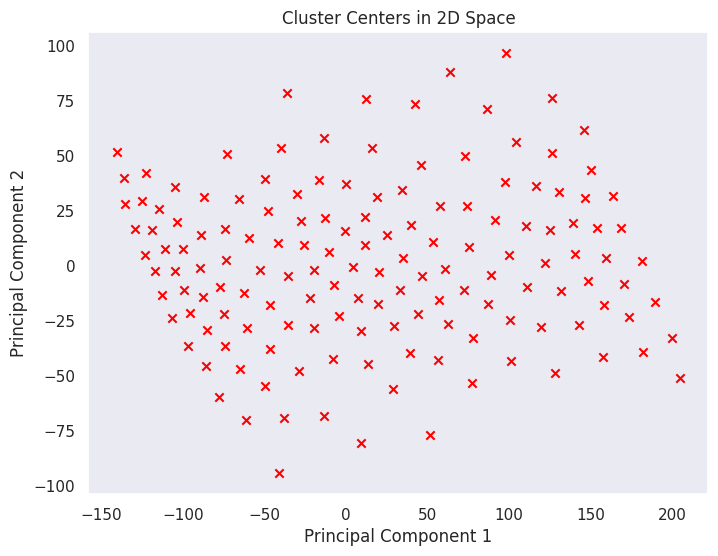

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of cluster centers in 2D
plt.figure(figsize=(8, 6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("Cluster Centers in 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [28]:
from PIL import Image
import numpy as np

def preprocess_image(image_path, pca, image_size=(224, 224)):
    """
    Preprocess a single image for K-Means prediction.
    Args:
        image_path (str): Path to the image file.
        pca (PCA): Trained PCA model.
        image_size (tuple): Target size for the image (width, height).

    Returns:
        np.array: PCA-transformed image data.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    
    # Resize to the expected size
    img = img.resize(image_size)
    
    # Flatten and normalize the image
    img_flat = np.array(img).reshape(-1) / 255.0  # Flatten and normalize to [0, 1]
    
    # Apply PCA transformation
    img_pca = pca.transform([img_flat])  # Transform as a single sample
    
    return img_pca

def predict_image(image_path, pca, kmeans):
    """
    Predict the cluster for a single image.
    Args:
        image_path (str): Path to the image file.
        pca (PCA): Trained PCA model.
        kmeans (KMeans): Trained KMeans model.

    Returns:
        int: Predicted cluster label.
    """
    # Preprocess the image
    img_pca = preprocess_image(image_path, pca)
    
    # Predict the cluster
    cluster_label = kmeans.predict(img_pca)
    
    return cluster_label[0]  # Return the cluster label


In [30]:
# Example usage:
image_path = "../../stratified-data/test/Abra/00000000.png"  # Replace with the path to your image
predicted_cluster = predict_image(image_path, pca, kmeans)  # Ensure 'pca' and 'kmeans' are trained models
print(f"The image belongs to cluster {predicted_cluster}")


The image belongs to cluster 104


In [31]:
# Example usage:
image_path = "../../stratified-data/test/Abra/00000052.png"  # Replace with the path to your image
predicted_cluster = predict_image(image_path, pca, kmeans)  # Ensure 'pca' and 'kmeans' are trained models
print(f"The image belongs to cluster {predicted_cluster}")


The image belongs to cluster 92
